In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings

import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
from tensorflow.keras.datasets import cifar10
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

#   Test 1

In [2]:
num_test = 10
num_layers_list = [0,2,4,6,7]


for i in range(num_test):
    for layer_index in range(5):
        globals()['t{}_L{}_accumulated_weight'.format(i, layer_index)] = []
        globals()['t{}_L{}_accumulated_bias'.format(i, layer_index)] = []

        globals()['t{}_L{}_changes_weight'.format(i, layer_index)] = []
        globals()['t{}_L{}_changes_bias'.format(i, layer_index)] = []
        
        globals()['t{}_L{}_dist'.format(i, layer_index)] = []  #바로 전 점이랑 현재 점 거리
        
        globals()['t{}_L{}_distanc'.format(i, layer_index)] = []  #바로 전 점이랑 현재 점 거리
        
    globals()['t{}_ACC'.format(i)] = []
    globals()['t{}_LOSS'.format(i)] = []


In [3]:
#Var Accumulate Weight
t0_L0_accumulated_weight = [1.2333235e-06, 1.0698564e-05, 0.00038010324, 0.0006333217, 0.00085782225, 0.0013410249, 0.0020412125, 0.0028407415, 0.0035555172, 0.0041081444, 0.0047249254, 0.005499599, 0.0061012125, 0.006718581, 0.0070948666, 0.0075305435, 0.008273421, 0.008759268, 0.009406994, 0.009856406]
t0_L1_accumulated_weight = [4.755996e-07, 5.708528e-06, 0.0006059579, 0.0009064472, 0.0010740726, 0.0011784486, 0.0013041144, 0.0014245798, 0.0015365161, 0.0016667413, 0.0017677465, 0.0018929369, 0.0019977577, 0.0021268947, 0.0022358873, 0.00234996, 0.0024877423, 0.0026118855, 0.0027445534, 0.002889419]
t0_L2_accumulated_weight = [3.0098784e-07, 2.8312513e-06, 0.0004797702, 0.0008250614, 0.001070478, 0.0012610566, 0.0014328508, 0.0015878475, 0.0017375536, 0.0018841781, 0.002023944, 0.0021654856, 0.0023002157, 0.0024331298, 0.0025455845, 0.0026622459, 0.0027705547, 0.0028685129, 0.002961355, 0.003055219]
t0_L3_accumulated_weight = [4.334394e-07, 1.7281919e-06, 8.340163e-05, 0.000180882, 0.00028437874, 0.00038863032, 0.0004756043, 0.00054982613, 0.0006194056, 0.00069331564, 0.00076464494, 0.0008433564, 0.0009252076, 0.0010112082, 0.0011000286, 0.0011911716, 0.0012830766, 0.0013759711, 0.0014687767, 0.0015611331]
t0_L4_accumulated_weight = [3.8817443e-06, 1.06679745e-05, 0.00026285564, 0.0008621324, 0.0020018532, 0.0035825172, 0.0052353083, 0.0069481805, 0.008674221, 0.010420432, 0.012349557, 0.014367601, 0.01649889, 0.018748011, 0.021106943, 0.023680683, 0.0261951, 0.028693995, 0.031361632, 0.034218173]

#Var Accumulate Bias
t0_L0_accumulated_bias = [5.3829304e-08, 1.9811437e-06, 9.429738e-06, 1.2318041e-05, 5.3615704e-06, 1.3711538e-06, 1.3376972e-06, 1.7602259e-06, 1.4843855e-06, 1.47914e-06, 1.5334383e-06, 1.5643838e-06, 2.1051665e-06, 2.437817e-06, 2.0345487e-06, 1.3974127e-06, 1.9338468e-06, 1.457709e-06, 1.4746915e-06, 1.2987127e-06]
t0_L1_accumulated_bias = [2.2213715e-08, 5.362833e-06, 9.962042e-05, 0.00013625491, 0.00016826356, 0.0001726113, 0.0003029544, 0.00058928225, 0.00090190675, 0.0012893094, 0.0016438919, 0.001996482, 0.0024053263, 0.0027945472, 0.003135966, 0.0034160856, 0.003693132, 0.0039530275, 0.004264294, 0.0045469394]
t0_L2_accumulated_bias = [2.234559e-08, 7.228031e-06, 0.00014347146, 0.0002680142, 0.0006320779, 0.0013493001, 0.0021763034, 0.0028273591, 0.0034056664, 0.0040390342, 0.004577171, 0.0050982605, 0.005621795, 0.0060278988, 0.006423818, 0.006817946, 0.0071648215, 0.00760891, 0.00805225, 0.008484445]
t0_L3_accumulated_bias = [2.1650571e-08, 5.5368964e-06, 0.00019266471, 0.00084468257, 0.0017785002, 0.0028640968, 0.00384713, 0.0045283753, 0.005129204, 0.0056816665, 0.006141539, 0.006564131, 0.006962089, 0.007318522, 0.007649286, 0.008070238, 0.008394947, 0.008783512, 0.009263286, 0.009670524]
t0_L4_accumulated_bias = [3.332498e-07, 1.2397842e-05, 0.0020215246, 0.006239605, 0.011442492, 0.016119549, 0.0194348, 0.022269607, 0.024352346, 0.02638129, 0.028305838, 0.03017362, 0.03212865, 0.033884767, 0.035638187, 0.037912033, 0.039592348, 0.04169615, 0.04387899, 0.0460818]


#Var Changes Weight
t0_L0_changes_weight = [1.2333235e-06, 1.0698564e-05, 0.00038010324, 0.0006333217, 0.00085782225, 0.0013410249, 0.0020412125, 0.0028407415, 0.0035555172, 0.0041081444, 0.0047249254, 0.005499599, 0.0061012125, 0.006718581, 0.0070948666, 0.0075305435, 0.008273421, 0.008759268, 0.009406994, 0.009856406]
t0_L1_changes_weight = [4.755996e-07, 5.708528e-06, 0.0006059579, 0.0009064472, 0.0010740726, 0.0011784486, 0.0013041144, 0.0014245798, 0.0015365161, 0.0016667413, 0.0017677465, 0.0018929369, 0.0019977577, 0.0021268947, 0.0022358873, 0.00234996, 0.0024877423, 0.0026118855, 0.0027445534, 0.002889419]
t0_L2_changes_weight = [3.0098784e-07, 2.8312513e-06, 0.0004797702, 0.0008250614, 0.001070478, 0.0012610566, 0.0014328508, 0.0015878475, 0.0017375536, 0.0018841781, 0.002023944, 0.0021654856, 0.0023002157, 0.0024331298, 0.0025455845, 0.0026622459, 0.0027705547, 0.0028685129, 0.002961355, 0.003055219]
t0_L3_changes_weight = [4.334394e-07, 1.7281919e-06, 8.340163e-05, 0.000180882, 0.00028437874, 0.00038863032, 0.0004756043, 0.00054982613, 0.0006194056, 0.00069331564, 0.00076464494, 0.0008433564, 0.0009252076, 0.0010112082, 0.0011000286, 0.0011911716, 0.0012830766, 0.0013759711, 0.0014687767, 0.0015611331]
t0_L4_changes_weight = [3.8817443e-06, 1.06679745e-05, 0.00026285564, 0.0008621324, 0.0020018532, 0.0035825172, 0.0052353083, 0.0069481805, 0.008674221, 0.010420432, 0.012349557, 0.014367601, 0.01649889, 0.018748011, 0.021106943, 0.023680683, 0.0261951, 0.028693995, 0.031361632, 0.034218173]

#Var Changes Bias
t0_L0_changes_bias = [1.9273143e-06, 7.4485947e-06, 2.8883023e-06, -6.9564703e-06, -3.9904166e-06, -3.345656e-08, 4.2252873e-07, -2.7584042e-07, -5.2455107e-09, 5.429831e-08, 3.0945444e-08, 5.407827e-07, 3.3265064e-07, -4.0326836e-07, -6.3713605e-07, 5.364341e-07, -4.7613776e-07, 1.698254e-08, -1.7597881e-07, -1.1805332e-07]
t0_L1_changes_bias = [5.3406193e-06, 9.4257586e-05, 3.663449e-05, 3.2008655e-05, 4.347734e-06, 0.0001303431, 0.00028632785, 0.0003126245, 0.0003874026, 0.00035458256, 0.0003525901, 0.00040884432, 0.0003892209, 0.00034141866, 0.0002801197, 0.00027704635, 0.00025989558, 0.00031126663, 0.00028264523, 0.0002682223]
t0_L2_changes_bias = [7.2056855e-06, 0.00013624344, 0.00012454274, 0.00036406372, 0.0007172222, 0.00082700327, 0.0006510557, 0.0005783073, 0.0006333678, 0.0005381368, 0.0005210894, 0.0005235346, 0.00040610367, 0.0003959192, 0.00039412826, 0.00034687528, 0.0004440886, 0.00044334028, 0.0004321942, 0.00039020274]
t0_L3_changes_bias = [5.515246e-06, 0.00018712781, 0.0006520179, 0.0009338176, 0.0010855966, 0.0009830333, 0.00068124523, 0.0006008288, 0.0005524624, 0.00045987265, 0.0004225918, 0.00039795786, 0.00035643298, 0.00033076433, 0.00042095175, 0.00032470934, 0.00038856454, 0.00047977455, 0.00040723756, 0.00040056836]
t0_L4_changes_bias = [1.2064592e-05, 0.0020091268, 0.0042180805, 0.0052028866, 0.0046770573, 0.0033152513, 0.0028348062, 0.002082739, 0.002028944, 0.0019245483, 0.0018677823, 0.0019550305, 0.0017561167, 0.0017534196, 0.0022738464, 0.0016803145, 0.0021038018, 0.0021828413, 0.0022028089, 0.0023621954]



#Distance Layer 0,2,4,6,7
t0_L0_dist = [0.005611114, 0.042967923, 0.017303824, 0.01720989, 0.01896346, 0.01351149, 0.0096499575, 0.0069990987, 0.005400979, 0.0054945317, 0.0073259985, 0.006747563, 0.0053852703, 0.0047407034, 0.0047081686, 0.0064230603, 0.0053105215, 0.0054931166, 0.0056717163, 0.0045811404]
t0_L1_dist = [0.0031743567, 0.03162592, 0.010306523, 0.011244524, 0.011601499, 0.01253931, 0.0120276725, 0.006661391, 0.005870655, 0.005485715, 0.0051207943, 0.0054882737, 0.0049211383, 0.0046310523, 0.004067338, 0.0044826376, 0.0037263753, 0.0038452996, 0.0037333742, 0.0039588977]
t0_L2_dist = [0.0033577927, 0.01518986, 0.012588766, 0.011249272, 0.011224035, 0.00876799, 0.0072336923, 0.0063277287, 0.0063257013, 0.005884612, 0.005918776, 0.005480109, 0.004734428, 0.0043614586, 0.004128578, 0.003590102, 0.0038601186, 0.0034724097, 0.003441401, 0.0033534477]
t0_L3_dist = [0.0024397576, 0.010112457, 0.011736002, 0.010138195, 0.008659252, 0.006527722, 0.004859547, 0.004198554, 0.0035888655, 0.0034143147, 0.0032807998, 0.0030027179, 0.0030549392, 0.0026758732, 0.0027233544, 0.0024217917, 0.0025793447, 0.002666976, 0.002396732, 0.0024776338]
t0_L4_dist = [0.0045372313, 0.035721008, 0.030713946, 0.029688412, 0.024667665, 0.017425818, 0.015449998, 0.014635412, 0.014071545, 0.01253745, 0.012884435, 0.012329487, 0.012418562, 0.011185604, 0.0117255235, 0.009644661, 0.010869192, 0.010049454, 0.010247635, 0.009434527] 



#Average Acc and Loss Layer 0,2,4,6,7
t0_ACC = [[0.8040000200271606, 0.7900000214576721, 0.8059999942779541, 0.7639999985694885, 0.7879999876022339, 0.7860000133514404, 0.75, 0.7400000095367432, 0.7960000038146973, 0.7639999985694885, 0.7860000133514404, 0.7620000243186951, 0.7839999794960022, 0.7820000052452087, 0.765999972820282, 0.8119999766349792, 0.7599999904632568, 0.777999997138977, 0.800000011920929, 0.7720000147819519], [0.09399999678134918, 0.10000000149011612, 0.09799999743700027, 0.09200000017881393, 0.09399999678134918, 0.0820000022649765, 0.09000000357627869, 0.12200000137090683, 0.11400000005960464, 0.10400000214576721, 0.5460000038146973, 0.09200000017881393, 0.10400000214576721, 0.1080000028014183, 0.0860000029206276, 0.6660000085830688, 0.11999999731779099, 0.09600000083446503, 0.09399999678134918, 0.12200000137090683], [0.6240000128746033, 0.6579999923706055, 0.6359999775886536, 0.6380000114440918, 0.6119999885559082, 0.5960000157356262, 0.5680000185966492, 0.6499999761581421, 0.6499999761581421, 0.6159999966621399, 0.6259999871253967, 0.6380000114440918, 0.5519999861717224, 0.550000011920929, 0.6399999856948853, 0.6200000047683716, 0.5759999752044678, 0.6140000224113464, 0.6240000128746033, 0.6119999885559082], [0.6700000166893005, 0.6539999842643738, 0.6620000004768372, 0.6380000114440918, 0.671999990940094, 0.6740000247955322, 0.671999990940094, 0.6779999732971191, 0.7120000123977661, 0.6919999718666077, 0.656000018119812, 0.6660000085830688, 0.699999988079071, 0.6880000233650208, 0.6859999895095825, 0.7059999704360962, 0.6340000033378601, 0.6919999718666077, 0.6740000247955322, 0.671999990940094], [0.7260000109672546, 0.7080000042915344, 0.6620000004768372, 0.7099999785423279, 0.7160000205039978, 0.6740000247955322, 0.7099999785423279, 0.656000018119812, 0.7239999771118164, 0.7080000042915344, 0.7179999947547913, 0.6840000152587891, 0.7120000123977661, 0.7099999785423279, 0.7360000014305115, 0.699999988079071, 0.7179999947547913, 0.7099999785423279, 0.6679999828338623, 0.699999988079071], [0.722000002861023, 0.7459999918937683, 0.7099999785423279, 0.7360000014305115, 0.7620000243186951, 0.7059999704360962, 0.7039999961853027, 0.7080000042915344, 0.7179999947547913, 0.7540000081062317, 0.7239999771118164, 0.7519999742507935, 0.7279999852180481, 0.7300000190734863, 0.7400000095367432, 0.7039999961853027, 0.7260000109672546, 0.7239999771118164, 0.7379999756813049, 0.7580000162124634], [0.7319999933242798, 0.7300000190734863, 0.734000027179718, 0.7599999904632568, 0.734000027179718, 0.7319999933242798, 0.765999972820282, 0.7940000295639038, 0.7239999771118164, 0.7459999918937683, 0.7379999756813049, 0.7519999742507935, 0.7979999780654907, 0.7459999918937683, 0.7540000081062317, 0.7459999918937683, 0.7440000176429749, 0.7440000176429749, 0.7699999809265137, 0.7639999985694885], [0.7739999890327454, 0.7400000095367432, 0.7120000123977661, 0.734000027179718, 0.7599999904632568, 0.734000027179718, 0.777999997138977, 0.7620000243186951, 0.7620000243186951, 0.7839999794960022, 0.7480000257492065, 0.7120000123977661, 0.7540000081062317, 0.7459999918937683, 0.8119999766349792, 0.7440000176429749, 0.7559999823570251, 0.7699999809265137, 0.7540000081062317, 0.7680000066757202], [0.7860000133514404, 0.7760000228881836, 0.7799999713897705, 0.7820000052452087, 0.7580000162124634, 0.7639999985694885, 0.7519999742507935, 0.7459999918937683, 0.7680000066757202, 0.7940000295639038, 0.7540000081062317, 0.7620000243186951, 0.7639999985694885, 0.7540000081062317, 0.7099999785423279, 0.7879999876022339, 0.7440000176429749, 0.7360000014305115, 0.7699999809265137, 0.7699999809265137], [0.7760000228881836, 0.777999997138977, 0.7940000295639038, 0.7739999890327454, 0.777999997138977, 0.7900000214576721, 0.7820000052452087, 0.7680000066757202, 0.7639999985694885, 0.7620000243186951, 0.7440000176429749, 0.7680000066757202, 0.7879999876022339, 0.7599999904632568, 0.7540000081062317, 0.7820000052452087, 0.7599999904632568, 0.7540000081062317, 0.7799999713897705, 0.7519999742507935], [0.8059999942779541, 0.7599999904632568, 0.7839999794960022, 0.7739999890327454, 0.7580000162124634, 0.7519999742507935, 0.7900000214576721, 0.7599999904632568, 0.7739999890327454, 0.7900000214576721, 0.8019999861717224, 0.7620000243186951, 0.7680000066757202, 0.8180000185966492, 0.7540000081062317, 0.7860000133514404, 0.8080000281333923, 0.7860000133514404, 0.7900000214576721, 0.7599999904632568], [0.8059999942779541, 0.7799999713897705, 0.7839999794960022, 0.7940000295639038, 0.7879999876022339, 0.7919999957084656, 0.7919999957084656, 0.8080000281333923, 0.7519999742507935, 0.8080000281333923, 0.8059999942779541, 0.7960000038146973, 0.7879999876022339, 0.765999972820282, 0.7760000228881836, 0.7739999890327454, 0.800000011920929, 0.7459999918937683, 0.7440000176429749, 0.7940000295639038], [0.8059999942779541, 0.7900000214576721, 0.8040000200271606, 0.7799999713897705, 0.7839999794960022, 0.8199999928474426, 0.800000011920929, 0.7879999876022339, 0.8140000104904175, 0.7839999794960022, 0.8180000185966492, 0.765999972820282, 0.7879999876022339, 0.7879999876022339, 0.8059999942779541, 0.7839999794960022, 0.8140000104904175, 0.7979999780654907, 0.8040000200271606, 0.8180000185966492], [0.800000011920929, 0.8180000185966492, 0.8159999847412109, 0.7960000038146973, 0.8119999766349792, 0.7879999876022339, 0.7919999957084656, 0.7960000038146973, 0.8100000023841858, 0.828000009059906, 0.8100000023841858, 0.7799999713897705, 0.8100000023841858, 0.8100000023841858, 0.7839999794960022, 0.7979999780654907, 0.765999972820282, 0.8119999766349792, 0.8220000267028809, 0.7919999957084656], [0.8199999928474426, 0.800000011920929, 0.8180000185966492, 0.8019999861717224, 0.8059999942779541, 0.8119999766349792, 0.8059999942779541, 0.8420000076293945, 0.800000011920929, 0.8299999833106995, 0.7799999713897705, 0.8140000104904175, 0.8080000281333923, 0.8080000281333923, 0.7860000133514404, 0.7720000147819519, 0.8220000267028809, 0.8080000281333923, 0.8019999861717224, 0.8040000200271606], [0.8080000281333923, 0.7699999809265137, 0.7879999876022339, 0.8220000267028809, 0.828000009059906, 0.7900000214576721, 0.7760000228881836, 0.7879999876022339, 0.7900000214576721, 0.7900000214576721, 0.7720000147819519, 0.7919999957084656, 0.8019999861717224, 0.8240000009536743, 0.7979999780654907, 0.8199999928474426, 0.8100000023841858, 0.800000011920929, 0.7720000147819519, 0.828000009059906], [0.8140000104904175, 0.7940000295639038, 0.8140000104904175, 0.800000011920929, 0.8059999942779541, 0.8379999995231628, 0.8180000185966492, 0.8259999752044678, 0.8059999942779541, 0.800000011920929, 0.8199999928474426, 0.8460000157356262, 0.8240000009536743, 0.8259999752044678, 0.8140000104904175, 0.8180000185966492, 0.8159999847412109, 0.8240000009536743, 0.7580000162124634, 0.7839999794960022], [0.8339999914169312, 0.7860000133514404, 0.8259999752044678, 0.8080000281333923, 0.8159999847412109, 0.8320000171661377, 0.7960000038146973, 0.8159999847412109, 0.7960000038146973, 0.8320000171661377, 0.7960000038146973, 0.8199999928474426, 0.8259999752044678, 0.8360000252723694, 0.7919999957084656, 0.7960000038146973, 0.8600000143051147, 0.7760000228881836, 0.8119999766349792, 0.8320000171661377], [0.8339999914169312, 0.8040000200271606, 0.8059999942779541, 0.8659999966621399, 0.8259999752044678, 0.7919999957084656, 0.8240000009536743, 0.8199999928474426, 0.8199999928474426, 0.8159999847412109, 0.7940000295639038, 0.8360000252723694, 0.8240000009536743, 0.8360000252723694, 0.7919999957084656, 0.7760000228881836, 0.8220000267028809, 0.8339999914169312, 0.8479999899864197, 0.7979999780654907], [0.8399999737739563, 0.8240000009536743, 0.8220000267028809, 0.8299999833106995, 0.8140000104904175, 0.8299999833106995, 0.8339999914169312, 0.828000009059906, 0.8119999766349792, 0.8220000267028809, 0.8019999861717224, 0.8199999928474426, 0.8059999942779541, 0.828000009059906, 0.8119999766349792, 0.8560000061988831, 0.8299999833106995, 0.8059999942779541, 0.8399999737739563, 0.7940000295639038], [0.8240000009536743, 0.7900000214576721, 0.8019999861717224, 0.8619999885559082, 0.8420000076293945, 0.8220000267028809, 0.828000009059906, 0.8539999723434448, 0.8460000157356262, 0.7900000214576721, 0.8159999847412109, 0.7979999780654907, 0.8220000267028809, 0.8199999928474426, 0.8159999847412109, 0.843999981880188, 0.8420000076293945, 0.8199999928474426, 0.7979999780654907, 0.843999981880188]]
t0_LOSS = [[0.5473254919052124, 0.5893622040748596, 0.5889999866485596, 0.5906729698181152, 0.6129767894744873, 0.6064313650131226, 0.6440137624740601, 0.6826164722442627, 0.5828786492347717, 0.6117221713066101, 0.5879441499710083, 0.618787944316864, 0.5785427093505859, 0.5715036988258362, 0.599136471748352, 0.5162836313247681, 0.6428312063217163, 0.5723714232444763, 0.5870222449302673, 0.6401937007904053], [2.3025624752044678, 2.3033320903778076, 2.3020308017730713, 2.304042339324951, 2.3034555912017822, 2.30416202545166, 2.302445888519287, 2.3025104999542236, 2.303687334060669, 2.3018290996551514, 1.1415117979049683, 2.303680419921875, 2.3045859336853027, 2.3022165298461914, 2.3037281036376953, 0.914360523223877, 2.3033974170684814, 2.3023204803466797, 2.2997641563415527, 2.3021154403686523], [1.005549669265747, 0.965418815612793, 1.0040602684020996, 0.9721296429634094, 0.9673110246658325, 0.9971559047698975, 1.0104385614395142, 0.8838254809379578, 1.0104608535766602, 1.0081969499588013, 1.0220977067947388, 0.9440011978149414, 1.0533925294876099, 1.0711175203323364, 1.0072652101516724, 1.102561354637146, 1.0642979145050049, 0.9859751462936401, 0.9564541578292847, 0.9578304290771484], [0.9570791125297546, 0.8081351518630981, 0.8649543523788452, 0.9664903283119202, 0.8766553997993469, 0.880131721496582, 0.8018378615379333, 0.8253795504570007, 0.7403654456138611, 0.8098608255386353, 0.8739026784896851, 0.8811911940574646, 0.7944607138633728, 0.8236550688743591, 0.8374505639076233, 0.8171468377113342, 0.840636134147644, 0.821892499923706, 0.8279286026954651, 0.818144679069519], [0.7826156616210938, 0.8528100848197937, 0.8104546070098877, 0.790264368057251, 0.786919116973877, 0.778140127658844, 0.77181476354599, 0.924104630947113, 0.7903636693954468, 0.7986710071563721, 0.7812072038650513, 0.812834620475769, 0.7517421841621399, 0.8092946410179138, 0.7649256587028503, 0.7893733978271484, 0.7254029512405396, 0.7546288371086121, 0.8684180974960327, 0.8129104375839233], [0.7338306307792664, 0.6732655167579651, 0.7433578968048096, 0.6856852769851685, 0.6293231844902039, 0.7579292058944702, 0.7188820838928223, 0.7437752485275269, 0.7838431000709534, 0.6876933574676514, 0.7351226806640625, 0.6757997870445251, 0.7026048302650452, 0.7481135725975037, 0.6609303951263428, 0.7318874001502991, 0.6875198483467102, 0.7420729994773865, 0.7012526392936707, 0.6784965991973877], [0.7522180080413818, 0.7053962349891663, 0.7268139719963074, 0.7012361288070679, 0.6924894452095032, 0.7243394255638123, 0.6388677954673767, 0.577663779258728, 0.7318194508552551, 0.6423903107643127, 0.6608640551567078, 0.6830317974090576, 0.5746949911117554, 0.632507860660553, 0.6558815836906433, 0.7067683339118958, 0.631718635559082, 0.7061110138893127, 0.5988142490386963, 0.6156119704246521], [0.5852762460708618, 0.6957988739013672, 0.727044939994812, 0.6923913955688477, 0.6441624164581299, 0.7015956044197083, 0.6708000302314758, 0.6157026290893555, 0.7050768136978149, 0.6331878900527954, 0.6797143220901489, 0.6952494978904724, 0.668266236782074, 0.6642480492591858, 0.5419395565986633, 0.7420011758804321, 0.6205809712409973, 0.6241982579231262, 0.6532285809516907, 0.6114900708198547], [0.6305601000785828, 0.7147152423858643, 0.7210001945495605, 0.5702276229858398, 0.6471291184425354, 0.5959770083427429, 0.6597103476524353, 0.6756435632705688, 0.5833743810653687, 0.5629051327705383, 0.6325796842575073, 0.6508587002754211, 0.6431298851966858, 0.6693989634513855, 0.7266809344291687, 0.595761239528656, 0.7377623319625854, 0.7542392611503601, 0.6480385065078735, 0.595284104347229], [0.5743507742881775, 0.6134911179542542, 0.5344144701957703, 0.6116700172424316, 0.6120752096176147, 0.5983279943466187, 0.6332849264144897, 0.6661860942840576, 0.5880289077758789, 0.5858309268951416, 0.6884235739707947, 0.6094778180122375, 0.5644372701644897, 0.6346468925476074, 0.6183677315711975, 0.6559597253799438, 0.6194028854370117, 0.6597782373428345, 0.578419029712677, 0.7465078234672546], [0.4944252669811249, 0.6198000907897949, 0.5789428353309631, 0.6029890775680542, 0.6059353351593018, 0.659268856048584, 0.5869953632354736, 0.6547434329986572, 0.6136324405670166, 0.5746129155158997, 0.5778477191925049, 0.6157737970352173, 0.6293011903762817, 0.5207366347312927, 0.637494683265686, 0.5660831928253174, 0.5319699048995972, 0.5845094323158264, 0.6086398959159851, 0.582747220993042], [0.5676173567771912, 0.6301804184913635, 0.6517108082771301, 0.5926676392555237, 0.5586804151535034, 0.6425021290779114, 0.5011654496192932, 0.5763527154922485, 0.6133163571357727, 0.56591796875, 0.5285695791244507, 0.5429551005363464, 0.5816725492477417, 0.6430638432502747, 0.6162262558937073, 0.5839270949363708, 0.5599618554115295, 0.6274763345718384, 0.6922461986541748, 0.54486083984375], [0.5296518206596375, 0.5549195408821106, 0.5592461228370667, 0.5932149291038513, 0.627148449420929, 0.538348913192749, 0.6284785270690918, 0.5358936786651611, 0.5216462016105652, 0.6535190343856812, 0.506652295589447, 0.6059502363204956, 0.6003671288490295, 0.5420520305633545, 0.5248887538909912, 0.5894349813461304, 0.5253139734268188, 0.5949316024780273, 0.5574188828468323, 0.4815294146537781], [0.5823820233345032, 0.5258864760398865, 0.5526509881019592, 0.5577991008758545, 0.47061240673065186, 0.6061195135116577, 0.6089195013046265, 0.5440996885299683, 0.5099451541900635, 0.5725175738334656, 0.5303342938423157, 0.5764301419258118, 0.5578051209449768, 0.5642985701560974, 0.5502324104309082, 0.5116875767707825, 0.6301016807556152, 0.514456033706665, 0.5197614431381226, 0.4963836371898651], [0.48433899879455566, 0.5454279780387878, 0.5099019408226013, 0.5651451349258423, 0.49197304248809814, 0.539851725101471, 0.5640429258346558, 0.4837415814399719, 0.5624557137489319, 0.4786205589771271, 0.5532801151275635, 0.5498350262641907, 0.49111294746398926, 0.6193000078201294, 0.525776743888855, 0.6485952734947205, 0.5080880522727966, 0.6139815449714661, 0.5291962027549744, 0.5208153128623962], [0.4944704473018646, 0.5572317242622375, 0.576450765132904, 0.4903310239315033, 0.4500139057636261, 0.5639063119888306, 0.5509935617446899, 0.593272864818573, 0.6119452714920044, 0.6160827875137329, 0.5988225936889648, 0.6192665696144104, 0.5219221711158752, 0.5277572870254517, 0.5615788698196411, 0.49931278824806213, 0.5530011057853699, 0.5104597806930542, 0.6093227863311768, 0.4623192250728607], [0.5056544542312622, 0.6672422885894775, 0.5363356471061707, 0.5731714963912964, 0.47907623648643494, 0.44045040011405945, 0.5015931129455566, 0.483950674533844, 0.5159838199615479, 0.5350395441055298, 0.4366093873977661, 0.4757411479949951, 0.48391634225845337, 0.4848926365375519, 0.5402852296829224, 0.5082271695137024, 0.4986262321472168, 0.4482106864452362, 0.629450261592865, 0.5697799324989319], [0.5195279121398926, 0.6248286366462708, 0.48304483294487, 0.5382027626037598, 0.5154268741607666, 0.506763756275177, 0.5029217004776001, 0.5023922920227051, 0.5543404221534729, 0.4901387393474579, 0.540164053440094, 0.6231675148010254, 0.44780397415161133, 0.4741593599319458, 0.6030316948890686, 0.5848312973976135, 0.42460522055625916, 0.5157132744789124, 0.5148405432701111, 0.4640355408191681], [0.5019692778587341, 0.5038639307022095, 0.5109468698501587, 0.43373316526412964, 0.444345623254776, 0.5439392924308777, 0.4986731708049774, 0.478606641292572, 0.48824700713157654, 0.4868175685405731, 0.5786605477333069, 0.44464126229286194, 0.49986138939857483, 0.45496535301208496, 0.5461440086364746, 0.5682931542396545, 0.5302188992500305, 0.44858554005622864, 0.45176032185554504, 0.5732974410057068], [0.4875775873661041, 0.5093665719032288, 0.48094308376312256, 0.48980602622032166, 0.5187159180641174, 0.5021681189537048, 0.47619134187698364, 0.4614221751689911, 0.6403024196624756, 0.44833704829216003, 0.524083137512207, 0.44768258929252625, 0.5124339461326599, 0.5243151187896729, 0.5153090357780457, 0.46545523405075073, 0.46318092942237854, 0.5290960073471069, 0.4565183222293854, 0.576220691204071], [0.4732431173324585, 0.5919156670570374, 0.5122114419937134, 0.43221959471702576, 0.5020633935928345, 0.46865418553352356, 0.48652178049087524, 0.42510107159614563, 0.45476987957954407, 0.5599814057350159, 0.5269067287445068, 0.52076256275177, 0.4850502610206604, 0.48949557542800903, 0.5531912446022034, 0.4412305951118469, 0.494040846824646, 0.44433775544166565, 0.581200361251831, 0.409963995218277]]

# test 2

In [4]:
#Var Accumulate Weight
t1_L0_accumulated_weight = [1.5513145e-06, 1.5583859e-05, 0.0003801642, 0.0007118492, 0.0012043251, 0.0017700216, 0.0021695076, 0.0025810925, 0.0028555226, 0.003172004, 0.0036797044, 0.004329536, 0.0052663703, 0.0061698537, 0.0069110147, 0.007767867, 0.008481315, 0.009259361, 0.009889502, 0.010491734]
t1_L1_accumulated_weight = [4.6772706e-07, 1.4859536e-05, 0.00054700335, 0.0009238192, 0.002477794, 0.0040125726, 0.0050912695, 0.005895918, 0.006451008, 0.006884067, 0.007397544, 0.007920585, 0.008502219, 0.008988063, 0.009434933, 0.009889107, 0.010283757, 0.0107061565, 0.011138639, 0.011555425]
t1_L2_accumulated_weight = [2.973979e-07, 3.0067458e-06, 0.00034665805, 0.00049412297, 0.00064108556, 0.0008338174, 0.0010601361, 0.0013040107, 0.0015463127, 0.0017801989, 0.0020124405, 0.0022513645, 0.002482854, 0.002706774, 0.00291465, 0.0031355913, 0.0033421994, 0.0035661145, 0.003781605, 0.0039965212]
t1_L3_accumulated_weight = [4.3571507e-07, 1.1694851e-06, 9.696046e-05, 0.00019770258, 0.00031009337, 0.00043300964, 0.0005581339, 0.0006885623, 0.0008188633, 0.0009318304, 0.0010471402, 0.0011594557, 0.0012747734, 0.0013872626, 0.0014884262, 0.0016005755, 0.0017093817, 0.0018144367, 0.0019226793, 0.0020260862]
t1_L4_accumulated_weight = [3.3511412e-06, 1.0939998e-05, 0.00032519636, 0.0010233443, 0.0024157262, 0.004441016, 0.0069003827, 0.00957795, 0.012712163, 0.015794765, 0.018726448, 0.021893034, 0.025031347, 0.028065179, 0.031030226, 0.034109082, 0.03723251, 0.04050496, 0.043704957, 0.04704832]

#Var Accumulate Bias
t1_L0_accumulated_bias = [8.5725176e-08, 2.6657801e-08, 2.3585342e-06, 8.084588e-07, 7.28156e-05, 0.00015071232, 0.0001942079, 0.0002054501, 0.00023035357, 0.00022516503, 0.00023251283, 0.00021915245, 0.0002649467, 0.00035864214, 0.00044837943, 0.000493662, 0.0005088592, 0.000489395, 0.0005239511, 0.00052331167]
t1_L1_accumulated_bias = [2.4901917e-08, 1.595844e-06, 1.1977704e-06, 4.9138653e-06, 2.437849e-05, 6.0775586e-05, 0.00010139584, 0.00018514619, 0.00044618914, 0.0006194997, 0.00076776627, 0.0009262059, 0.0010931849, 0.001374223, 0.0015337288, 0.0017154377, 0.0018966013, 0.0020078882, 0.0020107997, 0.0021368084]
t1_L2_accumulated_bias = [1.4548229e-08, 3.5804833e-06, 8.36681e-05, 0.00015691397, 0.0008116758, 0.0021589918, 0.004038089, 0.0060493336, 0.008013928, 0.009267152, 0.010153635, 0.0108091775, 0.011071717, 0.011357883, 0.011430264, 0.011697754, 0.011880432, 0.012196649, 0.01246562, 0.012616335]
t1_L3_accumulated_bias = [1.5885432e-08, 9.158024e-06, 0.0003143519, 0.0012814894, 0.0027713205, 0.0047214087, 0.0070546092, 0.009326732, 0.011397433, 0.012867824, 0.013691265, 0.014217269, 0.014341947, 0.0144642675, 0.014297467, 0.01421833, 0.014111128, 0.013947748, 0.013955221, 0.013960751]
t1_L4_accumulated_bias = [3.4496088e-07, 0.00013781963, 0.0025452639, 0.0068971487, 0.012163257, 0.0182911, 0.025306428, 0.031780336, 0.037451047, 0.04193651, 0.04466367, 0.046216093, 0.04674875, 0.0471309, 0.047185577, 0.04666376, 0.04696074, 0.04677254, 0.046812493, 0.04703747]


#Var Changes Weight
t1_L0_changes_weight = [1.5513145e-06, 1.5583859e-05, 0.0003801642, 0.0007118492, 0.0012043251, 0.0017700216, 0.0021695076, 0.0025810925, 0.0028555226, 0.003172004, 0.0036797044, 0.004329536, 0.0052663703, 0.0061698537, 0.0069110147, 0.007767867, 0.008481315, 0.009259361, 0.009889502, 0.010491734]
t1_L1_changes_weight = [4.6772706e-07, 1.4859536e-05, 0.00054700335, 0.0009238192, 0.002477794, 0.0040125726, 0.0050912695, 0.005895918, 0.006451008, 0.006884067, 0.007397544, 0.007920585, 0.008502219, 0.008988063, 0.009434933, 0.009889107, 0.010283757, 0.0107061565, 0.011138639, 0.011555425]
t1_L2_changes_weight = [2.973979e-07, 3.0067458e-06, 0.00034665805, 0.00049412297, 0.00064108556, 0.0008338174, 0.0010601361, 0.0013040107, 0.0015463127, 0.0017801989, 0.0020124405, 0.0022513645, 0.002482854, 0.002706774, 0.00291465, 0.0031355913, 0.0033421994, 0.0035661145, 0.003781605, 0.0039965212]
t1_L3_changes_weight = [4.3571507e-07, 1.1694851e-06, 9.696046e-05, 0.00019770258, 0.00031009337, 0.00043300964, 0.0005581339, 0.0006885623, 0.0008188633, 0.0009318304, 0.0010471402, 0.0011594557, 0.0012747734, 0.0013872626, 0.0014884262, 0.0016005755, 0.0017093817, 0.0018144367, 0.0019226793, 0.0020260862]
t1_L4_changes_weight = [3.3511412e-06, 1.0939998e-05, 0.00032519636, 0.0010233443, 0.0024157262, 0.004441016, 0.0069003827, 0.00957795, 0.012712163, 0.015794765, 0.018726448, 0.021893034, 0.025031347, 0.028065179, 0.031030226, 0.034109082, 0.03723251, 0.04050496, 0.043704957, 0.04704832]

#Var Changes Bias
t1_L0_changes_bias = [-5.9067375e-08, 2.3318764e-06, -1.5500754e-06, 7.200714e-05, 7.789672e-05, 4.3495573e-05, 1.12421985e-05, 2.4903478e-05, -5.1885436e-06, 7.3478004e-06, -1.3360375e-05, 4.5794237e-05, 9.3695446e-05, 8.9737296e-05, 4.528259e-05, 1.5197147e-05, -1.9464176e-05, 3.4556084e-05, -6.3941116e-07, 3.273593e-05]
t1_L1_changes_bias = [1.570942e-06, -3.9807355e-07, 3.7160949e-06, 1.9464625e-05, 3.6397098e-05, 4.0620253e-05, 8.375035e-05, 0.00026104297, 0.00017331057, 0.00014826655, 0.00015843962, 0.00016697904, 0.0002810381, 0.00015950575, 0.00018170895, 0.00018116354, 0.00011128688, 2.9115472e-06, 0.00012600864, 0.00011814851]
t1_L2_changes_bias = [3.565935e-06, 8.0087615e-05, 7.324587e-05, 0.0006547618, 0.001347316, 0.0018790972, 0.0020112447, 0.0019645947, 0.001253224, 0.0008864831, 0.0006555421, 0.00026253983, 0.00028616562, 7.238146e-05, 0.0002674898, 0.00018267799, 0.0003162166, 0.00026897155, 0.000150715, 5.4984353e-05]
t1_L3_changes_bias = [9.142139e-06, 0.00030519388, 0.0009671375, 0.0014898311, 0.0019500882, 0.0023332005, 0.0022721225, 0.0020707007, 0.0014703916, 0.00082344096, 0.00052600354, 0.00012467802, 0.00012232084, -0.0001668008, -7.913634e-05, -0.00010720268, -0.00016338006, 7.4729323e-06, 5.5301934e-06, -6.912835e-05]
t1_L4_changes_bias = [0.00013747466, 0.0024074442, 0.004351885, 0.0052661086, 0.0061278436, 0.007015327, 0.006473908, 0.0056707114, 0.004485462, 0.002727162, 0.0015524216, 0.0005326569, 0.00038215145, 5.4676086e-05, -0.0005218163, 0.00029698014, -0.00018820167, 3.995374e-05, 0.00022497773, 6.302446e-05]


#Distance Layer 0,2,4,6,7
t1_L0_dist = [0.009920403, 0.04040067, 0.010888239, 0.008858037, 0.010880984, 0.010024067, 0.01175167, 0.0074231178, 0.0068399343, 0.0068952795, 0.0074306447, 0.009556442, 0.009302508, 0.008331615, 0.008762758, 0.007365062, 0.006772546, 0.005945922, 0.0058716354, 0.0054417723]
t1_L1_dist = [0.0064837784, 0.033873163, 0.012082603, 0.011513939, 0.01071645, 0.0118315155, 0.013857292, 0.010806556, 0.010395206, 0.010579064, 0.010935486, 0.010730861, 0.010587912, 0.009518399, 0.008453068, 0.008321371, 0.007555686, 0.008990657, 0.0068496075, 0.0076244143]
t1_L2_dist = [0.004300566, 0.012936769, 0.012698586, 0.012105378, 0.014142771, 0.012916807, 0.0122320065, 0.010324832, 0.007249021, 0.0057177115, 0.0057954695, 0.0052991267, 0.0050060507, 0.004655717, 0.0042986036, 0.0039593633, 0.0038574296, 0.003977273, 0.0031862839, 0.0035290648]
t1_L3_dist = [0.002591264, 0.01335406, 0.0150830215, 0.013106544, 0.011787786, 0.011354957, 0.009549675, 0.008076761, 0.0057104593, 0.0044749305, 0.0039649345, 0.003791617, 0.003680969, 0.0037459077, 0.0035748163, 0.0035124263, 0.0033648538, 0.0031637521, 0.00316511, 0.00287626]
t1_L4_dist = [0.010063496, 0.037611723, 0.0331135, 0.03084891, 0.028826743, 0.027376007, 0.024251876, 0.021489877, 0.01714519, 0.014100504, 0.012586759, 0.013526914, 0.011587659, 0.011013244, 0.010828277, 0.0099109365, 0.010062304, 0.009792978, 0.009782262, 0.008121493] 

#Average Acc and Loss Layer 0,2,4,6,7
t1_ACC = [[0.7940000295639038, 0.7639999985694885, 0.7620000243186951, 0.777999997138977, 0.7639999985694885, 0.8019999861717224, 0.7440000176429749, 0.777999997138977, 0.777999997138977, 0.7960000038146973, 0.7940000295639038, 0.777999997138977, 0.777999997138977, 0.7639999985694885, 0.7300000190734863, 0.7739999890327454, 0.7699999809265137, 0.7960000038146973, 0.7480000257492065, 0.7519999742507935], [0.10599999874830246, 0.07400000095367432, 0.10199999809265137, 0.5860000252723694, 0.09399999678134918, 0.10000000149011612, 0.09200000017881393, 0.09399999678134918, 0.1120000034570694, 0.0820000022649765, 0.5440000295639038, 0.1120000034570694, 0.6359999775886536, 0.10400000214576721, 0.10000000149011612, 0.09200000017881393, 0.10400000214576721, 0.09200000017881393, 0.08799999952316284, 0.10599999874830246], [0.6480000019073486, 0.621999979019165, 0.628000020980835, 0.6420000195503235, 0.5879999995231628, 0.6480000019073486, 0.5979999899864197, 0.6460000276565552, 0.6119999885559082, 0.6620000004768372, 0.621999979019165, 0.621999979019165, 0.5879999995231628, 0.6579999923706055, 0.6880000233650208, 0.671999990940094, 0.5960000157356262, 0.6480000019073486, 0.5860000252723694, 0.6039999723434448], [0.6520000100135803, 0.6600000262260437, 0.6800000071525574, 0.5879999995231628, 0.6679999828338623, 0.699999988079071, 0.6240000128746033, 0.6420000195503235, 0.6700000166893005, 0.6740000247955322, 0.6539999842643738, 0.6740000247955322, 0.628000020980835, 0.6600000262260437, 0.6460000276565552, 0.5899999737739563, 0.7200000286102295, 0.6759999990463257, 0.6520000100135803, 0.6660000085830688], [0.6959999799728394, 0.6600000262260437, 0.7120000123977661, 0.7300000190734863, 0.7080000042915344, 0.6460000276565552, 0.6919999718666077, 0.6919999718666077, 0.7200000286102295, 0.7200000286102295, 0.656000018119812, 0.6600000262260437, 0.7139999866485596, 0.6859999895095825, 0.6980000138282776, 0.6840000152587891, 0.7599999904632568, 0.7179999947547913, 0.7080000042915344, 0.6779999732971191], [0.6880000233650208, 0.7020000219345093, 0.7039999961853027, 0.6940000057220459, 0.6859999895095825, 0.734000027179718, 0.734000027179718, 0.7139999866485596, 0.6840000152587891, 0.7020000219345093, 0.7480000257492065, 0.7160000205039978, 0.7120000123977661, 0.7379999756813049, 0.7139999866485596, 0.7120000123977661, 0.6980000138282776, 0.7599999904632568, 0.7480000257492065, 0.7580000162124634], [0.7080000042915344, 0.7200000286102295, 0.6940000057220459, 0.6880000233650208, 0.7179999947547913, 0.75, 0.7580000162124634, 0.7319999933242798, 0.7419999837875366, 0.699999988079071, 0.7120000123977661, 0.7179999947547913, 0.7139999866485596, 0.7120000123977661, 0.7419999837875366, 0.7099999785423279, 0.7620000243186951, 0.7039999961853027, 0.7279999852180481, 0.734000027179718], [0.7400000095367432, 0.7379999756813049, 0.7459999918937683, 0.7440000176429749, 0.7440000176429749, 0.7519999742507935, 0.7900000214576721, 0.7860000133514404, 0.7419999837875366, 0.722000002861023, 0.7239999771118164, 0.7279999852180481, 0.6880000233650208, 0.7120000123977661, 0.7080000042915344, 0.7099999785423279, 0.7139999866485596, 0.6919999718666077, 0.7120000123977661, 0.765999972820282], [0.7379999756813049, 0.7699999809265137, 0.777999997138977, 0.7459999918937683, 0.7519999742507935, 0.7139999866485596, 0.7559999823570251, 0.7680000066757202, 0.7440000176429749, 0.7160000205039978, 0.7319999933242798, 0.777999997138977, 0.7459999918937683, 0.75, 0.734000027179718, 0.7120000123977661, 0.7720000147819519, 0.7480000257492065, 0.7620000243186951, 0.7239999771118164], [0.7400000095367432, 0.7459999918937683, 0.7860000133514404, 0.7979999780654907, 0.7519999742507935, 0.7360000014305115, 0.7459999918937683, 0.7260000109672546, 0.7720000147819519, 0.7760000228881836, 0.7459999918937683, 0.7120000123977661, 0.777999997138977, 0.7979999780654907, 0.7419999837875366, 0.7900000214576721, 0.7739999890327454, 0.7540000081062317, 0.7799999713897705, 0.7720000147819519], [0.7540000081062317, 0.7580000162124634, 0.7639999985694885, 0.7760000228881836, 0.7720000147819519, 0.7179999947547913, 0.7680000066757202, 0.7979999780654907, 0.7540000081062317, 0.75, 0.7319999933242798, 0.7400000095367432, 0.7680000066757202, 0.777999997138977, 0.7620000243186951, 0.7639999985694885, 0.7879999876022339, 0.7739999890327454, 0.7799999713897705, 0.7879999876022339], [0.7799999713897705, 0.7559999823570251, 0.7860000133514404, 0.7839999794960022, 0.7200000286102295, 0.7540000081062317, 0.7839999794960022, 0.7540000081062317, 0.7879999876022339, 0.75, 0.7639999985694885, 0.7559999823570251, 0.7559999823570251, 0.7919999957084656, 0.7940000295639038, 0.777999997138977, 0.8159999847412109, 0.7860000133514404, 0.7720000147819519, 0.7940000295639038], [0.8119999766349792, 0.7699999809265137, 0.8159999847412109, 0.734000027179718, 0.8059999942779541, 0.7720000147819519, 0.7879999876022339, 0.7900000214576721, 0.8220000267028809, 0.8080000281333923, 0.765999972820282, 0.800000011920929, 0.7900000214576721, 0.7960000038146973, 0.7820000052452087, 0.7979999780654907, 0.7900000214576721, 0.7940000295639038, 0.8059999942779541, 0.8080000281333923], [0.843999981880188, 0.7839999794960022, 0.7820000052452087, 0.7799999713897705, 0.8040000200271606, 0.8159999847412109, 0.8240000009536743, 0.765999972820282, 0.7960000038146973, 0.7839999794960022, 0.8040000200271606, 0.7900000214576721, 0.7919999957084656, 0.8180000185966492, 0.800000011920929, 0.800000011920929, 0.7760000228881836, 0.7839999794960022, 0.7979999780654907, 0.7960000038146973], [0.8399999737739563, 0.7919999957084656, 0.8159999847412109, 0.8259999752044678, 0.7820000052452087, 0.8259999752044678, 0.8019999861717224, 0.8199999928474426, 0.8399999737739563, 0.8019999861717224, 0.8040000200271606, 0.8159999847412109, 0.8159999847412109, 0.8500000238418579, 0.7979999780654907, 0.7599999904632568, 0.8180000185966492, 0.8059999942779541, 0.8100000023841858, 0.8080000281333923], [0.8140000104904175, 0.8100000023841858, 0.8539999723434448, 0.8180000185966492, 0.8019999861717224, 0.7839999794960022, 0.8199999928474426, 0.7979999780654907, 0.8019999861717224, 0.8159999847412109, 0.843999981880188, 0.8420000076293945, 0.8159999847412109, 0.8420000076293945, 0.8320000171661377, 0.828000009059906, 0.8479999899864197, 0.8199999928474426, 0.8479999899864197, 0.7860000133514404], [0.7979999780654907, 0.800000011920929, 0.8199999928474426, 0.800000011920929, 0.7960000038146973, 0.8259999752044678, 0.8220000267028809, 0.8080000281333923, 0.8259999752044678, 0.8320000171661377, 0.8159999847412109, 0.8339999914169312, 0.8019999861717224, 0.8159999847412109, 0.8040000200271606, 0.8220000267028809, 0.7860000133514404, 0.8259999752044678, 0.8299999833106995, 0.8299999833106995], [0.8080000281333923, 0.8220000267028809, 0.8040000200271606, 0.8080000281333923, 0.8360000252723694, 0.8519999980926514, 0.7979999780654907, 0.8119999766349792, 0.8360000252723694, 0.8180000185966492, 0.828000009059906, 0.8159999847412109, 0.7879999876022339, 0.8100000023841858, 0.8379999995231628, 0.7940000295639038, 0.8519999980926514, 0.8119999766349792, 0.8299999833106995, 0.8539999723434448], [0.8339999914169312, 0.8159999847412109, 0.8339999914169312, 0.777999997138977, 0.8600000143051147, 0.8420000076293945, 0.8040000200271606, 0.8479999899864197, 0.8159999847412109, 0.8379999995231628, 0.8339999914169312, 0.8420000076293945, 0.8560000061988831, 0.8479999899864197, 0.7620000243186951, 0.8360000252723694, 0.8199999928474426, 0.8119999766349792, 0.8339999914169312, 0.8339999914169312], [0.8640000224113464, 0.8240000009536743, 0.7960000038146973, 0.8159999847412109, 0.8299999833106995, 0.7940000295639038, 0.7879999876022339, 0.8320000171661377, 0.8379999995231628, 0.8479999899864197, 0.8299999833106995, 0.8040000200271606, 0.8339999914169312, 0.8180000185966492, 0.8539999723434448, 0.8560000061988831, 0.8399999737739563, 0.8339999914169312, 0.8460000157356262, 0.8619999885559082], [0.8560000061988831, 0.8519999980926514, 0.8379999995231628, 0.8240000009536743, 0.8420000076293945, 0.8259999752044678, 0.8320000171661377, 0.8360000252723694, 0.843999981880188, 0.8320000171661377, 0.8360000252723694, 0.8460000157356262, 0.8560000061988831, 0.828000009059906, 0.8199999928474426, 0.843999981880188, 0.8679999709129333, 0.8199999928474426, 0.8240000009536743, 0.8339999914169312]]
t1_LOSS = [[0.54716956615448, 0.6918503642082214, 0.6129310727119446, 0.6160997748374939, 0.6347501873970032, 0.540358304977417, 0.6366943120956421, 0.6096278429031372, 0.5989387035369873, 0.5594732761383057, 0.5593020915985107, 0.53702712059021, 0.6337811946868896, 0.6404633522033691, 0.686684250831604, 0.5815210342407227, 0.6108464002609253, 0.6243448257446289, 0.6956486701965332, 0.6667370796203613], [2.3030738830566406, 2.3040080070495605, 2.302727699279785, 1.060591220855713, 2.302675485610962, 2.302053928375244, 2.3031821250915527, 2.304164171218872, 2.3025412559509277, 2.3053553104400635, 1.2437509298324585, 2.3017385005950928, 0.9583919644355774, 2.303982973098755, 2.306363582611084, 2.3043577671051025, 2.3028886318206787, 2.3037939071655273, 2.3040902614593506, 2.3029541969299316], [0.946313738822937, 0.9918928146362305, 0.9665420055389404, 0.9555527567863464, 1.0003324747085571, 0.9498250484466553, 0.9696587324142456, 0.954685389995575, 1.0000886917114258, 0.9845088720321655, 0.930689811706543, 1.0979846715927124, 1.010900616645813, 0.8201653957366943, 0.8879296183586121, 0.8926611542701721, 1.0266475677490234, 0.9068646430969238, 1.1319408416748047, 0.9849454760551453], [0.8825792074203491, 0.9312365651130676, 0.950236976146698, 1.0744102001190186, 0.8557870388031006, 0.8384113311767578, 0.9758373498916626, 0.9006169438362122, 0.8853605389595032, 0.8546519875526428, 0.9111599922180176, 0.8685455918312073, 0.8504460453987122, 0.8754121661186218, 0.8616769313812256, 0.9522496461868286, 0.8289464712142944, 0.9544566869735718, 0.9473113417625427, 0.8512504696846008], [0.7451951503753662, 0.8772935271263123, 0.8191480040550232, 0.710709273815155, 0.813119113445282, 0.8834711313247681, 0.7842252254486084, 0.9083665013313293, 0.7411860227584839, 0.813459038734436, 0.8264048099517822, 0.8239485025405884, 0.7365047335624695, 0.8188155293464661, 0.7929045557975769, 0.8525463342666626, 0.7015862464904785, 0.7750788927078247, 0.7784300446510315, 0.8302241563796997], [0.8139409422874451, 0.8293260335922241, 0.7650365233421326, 0.7331080436706543, 0.7574880123138428, 0.8017969727516174, 0.7480883002281189, 0.714634120464325, 0.8541135191917419, 0.7902221083641052, 0.6692102551460266, 0.7767666578292847, 0.7668101191520691, 0.7118301391601562, 0.8445905447006226, 0.7394672632217407, 0.7622097134590149, 0.680321216583252, 0.7257339358329773, 0.6417266726493835], [0.8465386033058167, 0.7518258094787598, 0.7536579966545105, 0.8179904818534851, 0.7721543908119202, 0.6865645051002502, 0.6444630026817322, 0.7212275862693787, 0.7151343822479248, 0.7821205854415894, 0.7433549761772156, 0.7130323052406311, 0.7750446200370789, 0.8122488856315613, 0.6700162887573242, 0.7128958702087402, 0.6364222168922424, 0.7774279117584229, 0.6352490782737732, 0.6800635457038879], [0.6325168013572693, 0.6676856875419617, 0.6722227931022644, 0.6790080666542053, 0.6989511847496033, 0.7156885862350464, 0.5610508322715759, 0.5694249272346497, 0.7111018896102905, 0.7105299830436707, 0.6688966155052185, 0.7653382420539856, 0.7900366187095642, 0.7013649940490723, 0.8110870122909546, 0.7127244472503662, 0.7283205389976501, 0.8679630160331726, 0.7986472845077515, 0.7302783131599426], [0.6529416441917419, 0.6322155594825745, 0.619105339050293, 0.6453076601028442, 0.7081874012947083, 0.691676139831543, 0.692484974861145, 0.6547731161117554, 0.7416495680809021, 0.7514219284057617, 0.6825649738311768, 0.6082333326339722, 0.6675970554351807, 0.6985681056976318, 0.6583768129348755, 0.7857511639595032, 0.5937734842300415, 0.6670439839363098, 0.6412085890769958, 0.6872108578681946], [0.6945697069168091, 0.6739785075187683, 0.5822798609733582, 0.6119542717933655, 0.6468934416770935, 0.6745457053184509, 0.7166656255722046, 0.6583538055419922, 0.6108087301254272, 0.6639339327812195, 0.6836215257644653, 0.7395288348197937, 0.5966673493385315, 0.5756428837776184, 0.6852538585662842, 0.6333968639373779, 0.6034981608390808, 0.642013669013977, 0.5726786851882935, 0.616149365901947], [0.6233338117599487, 0.6825131773948669, 0.6417236924171448, 0.5893242955207825, 0.6318668723106384, 0.746240496635437, 0.6707114577293396, 0.5792237520217896, 0.6879973411560059, 0.668549120426178, 0.7279592752456665, 0.6825017929077148, 0.6213383078575134, 0.6353827118873596, 0.690189003944397, 0.6190352439880371, 0.5798043608665466, 0.5646901726722717, 0.6575337052345276, 0.5762156844139099], [0.6369345188140869, 0.6697593331336975, 0.5689241886138916, 0.6012287139892578, 0.7203831672668457, 0.674797534942627, 0.594828724861145, 0.6680058836936951, 0.5812629461288452, 0.6935523748397827, 0.5889258980751038, 0.6063461899757385, 0.6251368522644043, 0.5630142688751221, 0.603605329990387, 0.5890961289405823, 0.48983630537986755, 0.587019145488739, 0.6038317084312439, 0.5264825224876404], [0.5478357076644897, 0.6026607155799866, 0.5394355058670044, 0.6820753216743469, 0.5678086876869202, 0.5782856941223145, 0.5794922113418579, 0.5456196665763855, 0.5305202007293701, 0.572609543800354, 0.6213183999061584, 0.5857428908348083, 0.5693569183349609, 0.581506609916687, 0.7123105525970459, 0.5870004892349243, 0.5656072497367859, 0.5946574211120605, 0.6049405336380005, 0.5286374688148499], [0.4380161464214325, 0.6696082949638367, 0.5833397507667542, 0.6436007022857666, 0.5251942276954651, 0.489515095949173, 0.48998039960861206, 0.7342666983604431, 0.5295969247817993, 0.5519648194313049, 0.49765753746032715, 0.5676948428153992, 0.6579379439353943, 0.5060471892356873, 0.5376687049865723, 0.5772696733474731, 0.6019394397735596, 0.5392907857894897, 0.5776351690292358, 0.5956193804740906], [0.4657585322856903, 0.5462027192115784, 0.4683510363101959, 0.4890071153640747, 0.5815033316612244, 0.49831250309944153, 0.5279141664505005, 0.4854797422885895, 0.47256627678871155, 0.5782290697097778, 0.5440512895584106, 0.527259111404419, 0.5210694670677185, 0.443023681640625, 0.5975226163864136, 0.714773952960968, 0.5438604354858398, 0.5282660722732544, 0.529761552810669, 0.6002017259597778], [0.5207604169845581, 0.5628495812416077, 0.46072065830230713, 0.5026170015335083, 0.5075673460960388, 0.5983355641365051, 0.5646126866340637, 0.5444138646125793, 0.5146392583847046, 0.5387164354324341, 0.5418391823768616, 0.47305604815483093, 0.48720037937164307, 0.4430871605873108, 0.5155077576637268, 0.4886230230331421, 0.4105086028575897, 0.49700063467025757, 0.4162869453430176, 0.5968009829521179], [0.5074896812438965, 0.5819528698921204, 0.4699176549911499, 0.5917176604270935, 0.5702434778213501, 0.45864808559417725, 0.5053455233573914, 0.5260947942733765, 0.49740564823150635, 0.4375518262386322, 0.5203160643577576, 0.5226507186889648, 0.510119616985321, 0.46820324659347534, 0.48461446166038513, 0.5046145915985107, 0.5776573419570923, 0.53699791431427, 0.4586312174797058, 0.47597736120224], [0.5154706239700317, 0.46265295147895813, 0.5868613719940186, 0.5410948395729065, 0.42774444818496704, 0.4236224293708801, 0.5469934344291687, 0.5230220556259155, 0.43018266558647156, 0.46549996733665466, 0.5097612142562866, 0.5286809802055359, 0.5593551993370056, 0.48103952407836914, 0.4915565550327301, 0.6513059139251709, 0.4124406576156616, 0.5134050846099854, 0.4531397521495819, 0.4186619818210602], [0.4601389169692993, 0.5103410482406616, 0.4838651418685913, 0.6252966523170471, 0.4142257571220398, 0.4245319962501526, 0.508472204208374, 0.4389219582080841, 0.4983074963092804, 0.5061372518539429, 0.4472634494304657, 0.4368973970413208, 0.4201679825782776, 0.4486048221588135, 0.6125175356864929, 0.4155977964401245, 0.504472553730011, 0.5049690008163452, 0.4926094710826874, 0.5650094747543335], [0.39214056730270386, 0.4689791798591614, 0.5427245497703552, 0.4618178904056549, 0.4527397155761719, 0.5826820135116577, 0.5438719987869263, 0.45554253458976746, 0.44401177763938904, 0.3796524703502655, 0.4910164773464203, 0.5084376335144043, 0.4740712642669678, 0.4728747606277466, 0.4054434895515442, 0.4676256477832794, 0.43520647287368774, 0.527041494846344, 0.38908758759498596, 0.41641825437545776], [0.3744417428970337, 0.42530304193496704, 0.46746644377708435, 0.574924886226654, 0.41784724593162537, 0.48764103651046753, 0.45310378074645996, 0.41260039806365967, 0.44144412875175476, 0.43971556425094604, 0.48256978392601013, 0.44630852341651917, 0.46856677532196045, 0.5367605686187744, 0.4506817162036896, 0.41459324955940247, 0.34327900409698486, 0.4381468892097473, 0.4545198380947113, 0.462077796459198]]


# test 3

In [5]:
#Var Accumulate Weight
t2_L0_accumulated_weight = [1.3077275e-06, 1.1561791e-05, 0.0002786369, 0.00046273792, 0.0007220755, 0.0008976317, 0.0010450314, 0.0012895078, 0.0018171093, 0.0024020746, 0.0030932538, 0.0038083817, 0.0046154764, 0.0052646524, 0.0058535244, 0.0063176537, 0.006863577, 0.0071398336, 0.0076181274, 0.007992171]
t2_L1_accumulated_weight = [4.694458e-07, 4.0129216e-06, 0.00035605664, 0.00053117407, 0.0007278877, 0.0009877317, 0.0013056762, 0.001800326, 0.002479128, 0.0032121937, 0.0039055469, 0.004465945, 0.004999758, 0.0054496597, 0.0058585024, 0.006207496, 0.006547508, 0.006906838, 0.007239316, 0.0075789774]
t2_L2_accumulated_weight = [3.0021872e-07, 4.382834e-06, 0.00045953097, 0.0007522346, 0.00092965574, 0.00113675, 0.0013528133, 0.0015819479, 0.0018380968, 0.0021362654, 0.0024860715, 0.0028512334, 0.0032150855, 0.003585247, 0.0039534103, 0.0042781155, 0.004596309, 0.0049229814, 0.0052218894, 0.0055460413]
t2_L3_accumulated_weight = [4.3529502e-07, 2.7115352e-06, 8.6677224e-05, 0.00017075852, 0.0002616121, 0.0003510558, 0.00043194005, 0.00051028596, 0.00059471413, 0.000684521, 0.0007849711, 0.0008907096, 0.0009990401, 0.0011050284, 0.0012085182, 0.001311217, 0.0014123796, 0.0015200134, 0.0016239273, 0.0017287141]
t2_L4_accumulated_weight = [3.434036e-06, 9.94927e-06, 0.00020040522, 0.0005585511, 0.0012023083, 0.0022027504, 0.0034429166, 0.004962099, 0.0068173567, 0.008935769, 0.011280084, 0.013862769, 0.016724093, 0.019809213, 0.022907529, 0.026113939, 0.02910403, 0.032127757, 0.035179924, 0.03816089]

#ar Accumulate Bias
t2_L0_accumulated_bias = [4.8727998e-08, 5.06723e-07, 6.91304e-06, 1.1170241e-06, 2.5593039e-08, 2.9067138e-08, 9.506701e-08, 4.5349907e-07, 6.606657e-05, 0.0002900086, 0.0006573424, 0.0011061338, 0.0015040282, 0.001786501, 0.001966644, 0.00210001, 0.002183135, 0.0022063113, 0.0021637802, 0.0022725349]
t2_L1_accumulated_bias = [2.9109968e-08, 6.3652055e-07, 5.493996e-07, 2.0791673e-05, 0.0002300002, 0.00091426756, 0.0018328633, 0.0030085659, 0.004352237, 0.004854114, 0.0052749626, 0.005402738, 0.0055940016, 0.0054550082, 0.0056640916, 0.005674318, 0.0058082324, 0.0059788725, 0.0060721906, 0.0064234035]
t2_L2_accumulated_bias = [1.4080344e-08, 3.9579772e-06, 9.27256e-05, 0.0001270683, 0.00043372787, 0.0010676831, 0.0018747285, 0.00279879, 0.0037996331, 0.0048704767, 0.006048151, 0.007191191, 0.007953381, 0.0085375225, 0.008894553, 0.009152772, 0.009500504, 0.009697796, 0.009692591, 0.009759422]
t2_L3_accumulated_bias = [2.6088241e-08, 9.740627e-06, 0.00013873292, 0.0008471576, 0.0017581494, 0.0029028892, 0.0039833533, 0.005063745, 0.006118372, 0.007063224, 0.0079055205, 0.008630968, 0.009137086, 0.009394219, 0.009510371, 0.0095632225, 0.009582536, 0.009560427, 0.0094913645, 0.009447977]
t2_L4_accumulated_bias = [3.334555e-07, 7.3076146e-05, 0.0025593445, 0.00799432, 0.014260736, 0.020200377, 0.025942778, 0.031204516, 0.037186418, 0.042227067, 0.04718595, 0.05087651, 0.053181462, 0.0543725, 0.05615235, 0.057777155, 0.059291303, 0.061275065, 0.063036986, 0.06488709]


#Var Changes Weight
t2_L0_changes_weight = [1.3077275e-06, 1.1561791e-05, 0.0002786369, 0.00046273792, 0.0007220755, 0.0008976317, 0.0010450314, 0.0012895078, 0.0018171093, 0.0024020746, 0.0030932538, 0.0038083817, 0.0046154764, 0.0052646524, 0.0058535244, 0.0063176537, 0.006863577, 0.0071398336, 0.0076181274, 0.007992171]
t2_L1_changes_weight = [4.694458e-07, 4.0129216e-06, 0.00035605664, 0.00053117407, 0.0007278877, 0.0009877317, 0.0013056762, 0.001800326, 0.002479128, 0.0032121937, 0.0039055469, 0.004465945, 0.004999758, 0.0054496597, 0.0058585024, 0.006207496, 0.006547508, 0.006906838, 0.007239316, 0.0075789774]
t2_L2_changes_weight = [3.0021872e-07, 4.382834e-06, 0.00045953097, 0.0007522346, 0.00092965574, 0.00113675, 0.0013528133, 0.0015819479, 0.0018380968, 0.0021362654, 0.0024860715, 0.0028512334, 0.0032150855, 0.003585247, 0.0039534103, 0.0042781155, 0.004596309, 0.0049229814, 0.0052218894, 0.0055460413]
t2_L3_changes_weight = [4.3529502e-07, 2.7115352e-06, 8.6677224e-05, 0.00017075852, 0.0002616121, 0.0003510558, 0.00043194005, 0.00051028596, 0.00059471413, 0.000684521, 0.0007849711, 0.0008907096, 0.0009990401, 0.0011050284, 0.0012085182, 0.001311217, 0.0014123796, 0.0015200134, 0.0016239273, 0.0017287141]
t2_L4_changes_weight = [3.434036e-06, 9.94927e-06, 0.00020040522, 0.0005585511, 0.0012023083, 0.0022027504, 0.0034429166, 0.004962099, 0.0068173567, 0.008935769, 0.011280084, 0.013862769, 0.016724093, 0.019809213, 0.022907529, 0.026113939, 0.02910403, 0.032127757, 0.035179924, 0.03816089]

#Var Changes Bias
t2_L0_changes_bias = [4.57995e-07, 6.406317e-06, -5.796016e-06, -1.091431e-06, 3.4740992e-09, 6.599987e-08, 3.5843206e-07, 6.561307e-05, 0.00022394204, 0.00036733376, 0.00044879143, 0.00039789442, 0.0002824728, 0.00018014305, 0.00013336586, 8.312496e-05, 2.3176428e-05, -4.2531174e-05, 0.00010875473, -2.099108e-05]
t2_L1_changes_bias = [6.074106e-07, -8.712095e-08, 2.0242273e-05, 0.00020920852, 0.0006842674, 0.00091859576, 0.0011757025, 0.0013436712, 0.0005018767, 0.00042084884, 0.0001277756, 0.00019126339, -0.00013899338, 0.00020908331, 1.02263875e-05, 0.00013391441, 0.00017064018, 9.3318056e-05, 0.00035121292, 0.00024533132]
t2_L2_changes_bias = [3.943897e-06, 8.876762e-05, 3.4342702e-05, 0.00030665955, 0.00063395523, 0.0008070454, 0.00092406163, 0.001000843, 0.0010708435, 0.0011776742, 0.0011430401, 0.0007621902, 0.00058414135, 0.0003570309, 0.0002582185, 0.00034773163, 0.0001972923, -5.205162e-06, 6.683171e-05, -2.3637898e-05]
t2_L3_changes_bias = [9.714539e-06, 0.0001289923, 0.0007084247, 0.00091099174, 0.0011447398, 0.0010804641, 0.0010803919, 0.0010546269, 0.0009448519, 0.0008422965, 0.0007254472, 0.00050611794, 0.0002571335, 0.00011615176, 5.2851625e-05, 1.9313768e-05, -2.2109598e-05, -6.9062226e-05, -4.3387525e-05, -1.7434359e-06]
t2_L4_changes_bias = [7.274269e-05, 0.0024862683, 0.005434976, 0.006266416, 0.005939641, 0.005742401, 0.005261738, 0.0059819017, 0.0050406493, 0.004958883, 0.0036905594, 0.0023049526, 0.0011910386, 0.0017798506, 0.001624804, 0.001514148, 0.0019837618, 0.0017619208, 0.0018501058, 0.0022218525]

In [6]:
#Distance Layer 0,2,4,6,7
t2_L0_dist = [0.0026806875, 0.039267696, 0.013043306, 0.008758408, 0.0057111373, 0.0045240466, 0.005908182, 0.007106377, 0.008843798, 0.009627514, 0.009156845, 0.009522179, 0.00805856, 0.006172374, 0.005286702, 0.0053927177, 0.004239597, 0.0044788504, 0.004043339, 0.003417429]
t2_L1_dist = [0.0023202887, 0.029102478, 0.012816598, 0.013747251, 0.024255946, 0.02000538, 0.019124163, 0.019283978, 0.01235096, 0.010811897, 0.008581465, 0.007411571, 0.007005537, 0.00668278, 0.0064910967, 0.0070733745, 0.006499684, 0.006981842, 0.006276776, 0.006041477]
t2_L2_dist = [0.0042423173, 0.01874075, 0.01572087, 0.014325778, 0.012744102, 0.011403936, 0.010538731, 0.010015737, 0.011331961, 0.012951756, 0.011468624, 0.00930237, 0.008212868, 0.0067926603, 0.0059090196, 0.006079629, 0.0056454367, 0.0053849476, 0.0049170665, 0.005133853]
t2_L3_dist = [0.0037371628, 0.009513147, 0.011582052, 0.008355025, 0.007273839, 0.0055786837, 0.0052836826, 0.004707238, 0.0040960805, 0.0039546546, 0.0035364432, 0.0030636902, 0.0025944556, 0.0025230309, 0.0023178603, 0.002374182, 0.0023678637, 0.0022502956, 0.002377388, 0.002380541]
t2_L4_dist = [0.008132418, 0.034594364, 0.032596115, 0.028382469, 0.023281045, 0.020093787, 0.017301474, 0.017595215, 0.015026351, 0.01467018, 0.012756197, 0.0123799415, 0.011799974, 0.0145774875, 0.012526864, 0.012357352, 0.01189171, 0.01240671, 0.011568981, 0.01119482] 

In [7]:
t2_ACC = [[0.7739999890327454, 0.8019999861717224, 0.7699999809265137, 0.7940000295639038, 0.75, 0.7599999904632568, 0.765999972820282, 0.7440000176429749, 0.7480000257492065, 0.7960000038146973, 0.7739999890327454, 0.7900000214576721, 0.7760000228881836, 0.7879999876022339, 0.7979999780654907, 0.800000011920929, 0.8059999942779541, 0.7979999780654907, 0.7839999794960022, 0.7760000228881836], [0.08799999952316284, 0.08799999952316284, 0.08399999886751175, 0.08799999952316284, 0.0860000029206276, 0.09200000017881393, 0.07400000095367432, 0.6140000224113464, 0.09399999678134918, 0.0860000029206276, 0.10400000214576721, 0.10599999874830246, 0.5640000104904175, 0.10400000214576721, 0.1080000028014183, 0.09200000017881393, 0.12999999523162842, 0.09600000083446503, 0.08799999952316284, 0.08399999886751175], [0.7039999961853027, 0.6019999980926514, 0.6320000290870667, 0.5979999899864197, 0.6259999871253967, 0.5559999942779541, 0.621999979019165, 0.6700000166893005, 0.6019999980926514, 0.5759999752044678, 0.5860000252723694, 0.6039999723434448, 0.6019999980926514, 0.6100000143051147, 0.6000000238418579, 0.593999981880188, 0.6859999895095825, 0.6039999723434448, 0.628000020980835, 0.5699999928474426], [0.6539999842643738, 0.6399999856948853, 0.6959999799728394, 0.6100000143051147, 0.7179999947547913, 0.6499999761581421, 0.6819999814033508, 0.6539999842643738, 0.6579999923706055, 0.6600000262260437, 0.6579999923706055, 0.6439999938011169, 0.6639999747276306, 0.6439999938011169, 0.6179999709129333, 0.6679999828338623, 0.6859999895095825, 0.6159999966621399, 0.6639999747276306, 0.6600000262260437], [0.6700000166893005, 0.6800000071525574, 0.6740000247955322, 0.6700000166893005, 0.7059999704360962, 0.6980000138282776, 0.6439999938011169, 0.6639999747276306, 0.6779999732971191, 0.6800000071525574, 0.656000018119812, 0.6679999828338623, 0.7279999852180481, 0.6980000138282776, 0.6859999895095825, 0.6800000071525574, 0.671999990940094, 0.6620000004768372, 0.6579999923706055, 0.6759999990463257], [0.7139999866485596, 0.7279999852180481, 0.6840000152587891, 0.6880000233650208, 0.6639999747276306, 0.6600000262260437, 0.7319999933242798, 0.734000027179718, 0.7239999771118164, 0.7200000286102295, 0.6919999718666077, 0.7059999704360962, 0.6940000057220459, 0.734000027179718, 0.7020000219345093, 0.7080000042915344, 0.6819999814033508, 0.7039999961853027, 0.6439999938011169, 0.6919999718666077], [0.7279999852180481, 0.7120000123977661, 0.7099999785423279, 0.6779999732971191, 0.6840000152587891, 0.7440000176429749, 0.6639999747276306, 0.734000027179718, 0.7519999742507935, 0.6940000057220459, 0.7099999785423279, 0.6959999799728394, 0.7139999866485596, 0.722000002861023, 0.7379999756813049, 0.7179999947547913, 0.7080000042915344, 0.7379999756813049, 0.7319999933242798, 0.7279999852180481], [0.7239999771118164, 0.7279999852180481, 0.7239999771118164, 0.7360000014305115, 0.6899999976158142, 0.7559999823570251, 0.7379999756813049, 0.7200000286102295, 0.7480000257492065, 0.7559999823570251, 0.7160000205039978, 0.7300000190734863, 0.7059999704360962, 0.7540000081062317, 0.699999988079071, 0.7379999756813049, 0.7260000109672546, 0.7099999785423279, 0.734000027179718, 0.6959999799728394], [0.7319999933242798, 0.7760000228881836, 0.765999972820282, 0.7540000081062317, 0.7620000243186951, 0.7139999866485596, 0.7400000095367432, 0.7260000109672546, 0.75, 0.7260000109672546, 0.7120000123977661, 0.7440000176429749, 0.7239999771118164, 0.7239999771118164, 0.7400000095367432, 0.722000002861023, 0.7360000014305115, 0.7440000176429749, 0.7179999947547913, 0.6899999976158142], [0.7360000014305115, 0.7680000066757202, 0.7639999985694885, 0.7900000214576721, 0.722000002861023, 0.7319999933242798, 0.7160000205039978, 0.7400000095367432, 0.7440000176429749, 0.7360000014305115, 0.7379999756813049, 0.75, 0.7459999918937683, 0.7440000176429749, 0.7400000095367432, 0.765999972820282, 0.7200000286102295, 0.7639999985694885, 0.7179999947547913, 0.7300000190734863], [0.7440000176429749, 0.7260000109672546, 0.7459999918937683, 0.7599999904632568, 0.7360000014305115, 0.7459999918937683, 0.7940000295639038, 0.7820000052452087, 0.7419999837875366, 0.7360000014305115, 0.7739999890327454, 0.7799999713897705, 0.7559999823570251, 0.6840000152587891, 0.7580000162124634, 0.7839999794960022, 0.7680000066757202, 0.8019999861717224, 0.7559999823570251, 0.7559999823570251], [0.7639999985694885, 0.7580000162124634, 0.7739999890327454, 0.7580000162124634, 0.800000011920929, 0.7620000243186951, 0.7799999713897705, 0.7699999809265137, 0.7820000052452087, 0.75, 0.7739999890327454, 0.7680000066757202, 0.7179999947547913, 0.7580000162124634, 0.7379999756813049, 0.7739999890327454, 0.777999997138977, 0.7720000147819519, 0.7519999742507935, 0.7879999876022339], [0.8019999861717224, 0.7620000243186951, 0.8059999942779541, 0.8019999861717224, 0.7580000162124634, 0.7820000052452087, 0.7820000052452087, 0.7680000066757202, 0.8220000267028809, 0.75, 0.7639999985694885, 0.8159999847412109, 0.777999997138977, 0.7799999713897705, 0.7919999957084656, 0.8180000185966492, 0.7860000133514404, 0.7799999713897705, 0.800000011920929, 0.765999972820282], [0.7979999780654907, 0.8100000023841858, 0.7839999794960022, 0.8399999737739563, 0.7900000214576721, 0.7480000257492065, 0.8040000200271606, 0.8059999942779541, 0.7739999890327454, 0.7879999876022339, 0.7799999713897705, 0.7720000147819519, 0.7839999794960022, 0.8080000281333923, 0.8259999752044678, 0.765999972820282, 0.7979999780654907, 0.7440000176429749, 0.7900000214576721, 0.8159999847412109], [0.8100000023841858, 0.7960000038146973, 0.7900000214576721, 0.8040000200271606, 0.7720000147819519, 0.7960000038146973, 0.8080000281333923, 0.7860000133514404, 0.8019999861717224, 0.8140000104904175, 0.7979999780654907, 0.7879999876022339, 0.8159999847412109, 0.7739999890327454, 0.7900000214576721, 0.8040000200271606, 0.8140000104904175, 0.7559999823570251, 0.765999972820282, 0.7900000214576721], [0.8140000104904175, 0.7919999957084656, 0.8180000185966492, 0.7860000133514404, 0.7940000295639038, 0.7960000038146973, 0.8080000281333923, 0.7919999957084656, 0.7879999876022339, 0.8159999847412109, 0.8159999847412109, 0.7760000228881836, 0.7820000052452087, 0.8379999995231628, 0.8159999847412109, 0.8220000267028809, 0.7919999957084656, 0.800000011920929, 0.777999997138977, 0.7900000214576721], [0.7979999780654907, 0.8040000200271606, 0.7900000214576721, 0.7900000214576721, 0.7919999957084656, 0.8080000281333923, 0.7739999890327454, 0.7979999780654907, 0.8299999833106995, 0.7860000133514404, 0.8100000023841858, 0.8080000281333923, 0.7940000295639038, 0.7900000214576721, 0.8080000281333923, 0.8080000281333923, 0.8180000185966492, 0.7720000147819519, 0.7879999876022339, 0.8100000023841858], [0.8320000171661377, 0.8240000009536743, 0.8159999847412109, 0.8740000128746033, 0.7979999780654907, 0.8100000023841858, 0.8059999942779541, 0.8100000023841858, 0.8379999995231628, 0.8299999833106995, 0.800000011920929, 0.8240000009536743, 0.7900000214576721, 0.8040000200271606, 0.8019999861717224, 0.8140000104904175, 0.8100000023841858, 0.8199999928474426, 0.8259999752044678, 0.8059999942779541], [0.8259999752044678, 0.8379999995231628, 0.8140000104904175, 0.8420000076293945, 0.8220000267028809, 0.7919999957084656, 0.8299999833106995, 0.8339999914169312, 0.8140000104904175, 0.843999981880188, 0.8240000009536743, 0.8059999942779541, 0.8460000157356262, 0.828000009059906, 0.8100000023841858, 0.8159999847412109, 0.8119999766349792, 0.8059999942779541, 0.8299999833106995, 0.8140000104904175], [0.8320000171661377, 0.8379999995231628, 0.8019999861717224, 0.8059999942779541, 0.8159999847412109, 0.8259999752044678, 0.8320000171661377, 0.8379999995231628, 0.8040000200271606, 0.8339999914169312, 0.8159999847412109, 0.8140000104904175, 0.8040000200271606, 0.800000011920929, 0.8100000023841858, 0.8080000281333923, 0.8180000185966492, 0.8019999861717224, 0.8240000009536743, 0.8180000185966492], [0.8360000252723694, 0.8339999914169312, 0.8240000009536743, 0.8299999833106995, 0.8360000252723694, 0.8019999861717224, 0.8320000171661377, 0.8339999914169312, 0.8019999861717224, 0.8240000009536743, 0.8259999752044678, 0.8360000252723694, 0.8159999847412109, 0.8180000185966492, 0.8019999861717224, 0.8220000267028809, 0.8220000267028809, 0.8479999899864197, 0.8579999804496765, 0.8259999752044678]]
t2_LOSS = [[0.613195538520813, 0.5492675304412842, 0.6409549117088318, 0.5782310962677002, 0.6135454177856445, 0.6030721068382263, 0.6133990287780762, 0.6244122385978699, 0.7184642553329468, 0.5478838682174683, 0.6003724932670593, 0.5699605941772461, 0.600793719291687, 0.5909993648529053, 0.5453078746795654, 0.6065149903297424, 0.55831378698349, 0.5670884251594543, 0.6442297697067261, 0.5893815755844116], [2.303642511367798, 2.3060648441314697, 2.3030431270599365, 2.3052256107330322, 2.3049559593200684, 2.303256034851074, 2.304011821746826, 1.0335736274719238, 2.2998249530792236, 2.3040952682495117, 2.3038389682769775, 2.30167555809021, 1.063332200050354, 2.3025975227355957, 2.3017313480377197, 2.3045427799224854, 2.3021152019500732, 2.3028481006622314, 2.304913282394409, 2.3024096488952637], [0.8643510937690735, 0.9285231828689575, 0.9888356924057007, 1.0419081449508667, 0.8894897103309631, 1.128670334815979, 1.08771812915802, 0.9184050559997559, 1.1603904962539673, 1.0351001024246216, 1.014528512954712, 1.0354281663894653, 1.07472825050354, 1.1165785789489746, 0.9285013675689697, 1.0070149898529053, 0.8942254185676575, 1.0008329153060913, 0.9448055028915405, 1.0037236213684082], [0.8623286485671997, 0.9594308733940125, 0.8344124555587769, 0.9781461954116821, 0.8005099296569824, 0.9298110604286194, 0.8946011066436768, 0.8388556838035583, 0.8352026343345642, 0.9383878111839294, 0.8663238286972046, 0.9645070433616638, 0.870278000831604, 0.9968960285186768, 0.9337102174758911, 0.8646553158760071, 0.8134615421295166, 0.9588785767555237, 0.9866205453872681, 0.928436279296875], [0.81186443567276, 0.8151404857635498, 0.8848718404769897, 0.8431157469749451, 0.7842485904693604, 0.8053443431854248, 0.9722238779067993, 0.9854770302772522, 0.8386160731315613, 0.8582278490066528, 0.7997164726257324, 0.8144632577896118, 0.8204586505889893, 0.7936263680458069, 0.8280655741691589, 0.845646858215332, 0.883204996585846, 0.8763178586959839, 0.9047433733940125, 0.8364256620407104], [0.7713547945022583, 0.7671725749969482, 0.8577378988265991, 0.8028197884559631, 0.9178708791732788, 0.9436566829681396, 0.7434200048446655, 0.7231330275535583, 0.7500768303871155, 0.7655234932899475, 0.7990708351135254, 0.8401013016700745, 0.7539730072021484, 0.744773805141449, 0.7769851684570312, 0.7832949161529541, 0.9399829506874084, 0.7697073221206665, 0.9100368022918701, 0.9134439826011658], [0.836553156375885, 0.7649053335189819, 0.77692049741745, 0.8136568069458008, 0.8338759541511536, 0.668466329574585, 0.8016695380210876, 0.7328523993492126, 0.6598107218742371, 0.8106428384780884, 0.7818344831466675, 0.7741503119468689, 0.7448338270187378, 0.8682327270507812, 0.768387496471405, 0.8151577115058899, 0.7567712664604187, 0.6619451642036438, 0.7342563271522522, 0.7027671337127686], [0.7420095205307007, 0.687624990940094, 0.7531644701957703, 0.7020529508590698, 0.783649742603302, 0.6883255839347839, 0.6867147088050842, 0.7926660180091858, 0.7238520383834839, 0.7198674082756042, 0.813495934009552, 0.702930212020874, 0.7528500556945801, 0.7017176747322083, 0.7284062504768372, 0.7603944540023804, 0.7717128992080688, 0.7239140272140503, 0.7208113074302673, 0.7751561403274536], [0.7040404677391052, 0.681553304195404, 0.6960959434509277, 0.655685305595398, 0.6422588229179382, 0.7061054706573486, 0.6700314879417419, 0.7198666334152222, 0.7018590569496155, 0.7041031718254089, 0.7428357601165771, 0.7408591508865356, 0.7772889137268066, 0.7473186254501343, 0.7313277125358582, 0.7686800360679626, 0.7712240219116211, 0.7804076671600342, 0.7253653407096863, 0.817977786064148], [0.6695449352264404, 0.6244897842407227, 0.6361591219902039, 0.5923038125038147, 0.7318528294563293, 0.68513423204422, 0.7296565175056458, 0.7191540002822876, 0.7126085162162781, 0.650097668170929, 0.6760815978050232, 0.6761621832847595, 0.7761362195014954, 0.6930319666862488, 0.679437518119812, 0.62673020362854, 0.7597489953041077, 0.6545762419700623, 0.7131127119064331, 0.6936445832252502], [0.6520984768867493, 0.6913885474205017, 0.7045907974243164, 0.6222701072692871, 0.7001932859420776, 0.7451812624931335, 0.5544243454933167, 0.5651463270187378, 0.7143102884292603, 0.6375191807746887, 0.7416970729827881, 0.6295539140701294, 0.6176788210868835, 0.7436607480049133, 0.6393957734107971, 0.5518719553947449, 0.6306931376457214, 0.5967926979064941, 0.6826845407485962, 0.6663540005683899], [0.651842474937439, 0.6779626607894897, 0.6198071837425232, 0.6634683012962341, 0.5657222270965576, 0.643413245677948, 0.654482364654541, 0.6716250777244568, 0.5683525800704956, 0.6680818200111389, 0.6060799956321716, 0.5997867584228516, 0.7458566427230835, 0.6846178770065308, 0.6541955471038818, 0.6114055514335632, 0.649113118648529, 0.6628584265708923, 0.6690823435783386, 0.6106753945350647], [0.5425481796264648, 0.6643712520599365, 0.5495120882987976, 0.5582653284072876, 0.6365081667900085, 0.6145647764205933, 0.5873627662658691, 0.5847880244255066, 0.49351465702056885, 0.6862888932228088, 0.5967017412185669, 0.5138061046600342, 0.6679893732070923, 0.6089004278182983, 0.6102535128593445, 0.543799638748169, 0.6471596956253052, 0.6045709252357483, 0.5372722148895264, 0.5678501725196838], [0.5640014410018921, 0.587645947933197, 0.6150633692741394, 0.4727630615234375, 0.5687925219535828, 0.6099348068237305, 0.6025577187538147, 0.5627182722091675, 0.6316838264465332, 0.5264115929603577, 0.6020345091819763, 0.5927220582962036, 0.5559718608856201, 0.5583344101905823, 0.5132193565368652, 0.5778254866600037, 0.6030899882316589, 0.6592197418212891, 0.6554885506629944, 0.5059457421302795], [0.5330206155776978, 0.5695104598999023, 0.5696795582771301, 0.5844228267669678, 0.6409243941307068, 0.6074967384338379, 0.5053730010986328, 0.5990138649940491, 0.529983639717102, 0.5298662781715393, 0.5793458223342896, 0.5422362685203552, 0.6110659241676331, 0.6173372864723206, 0.6209366917610168, 0.5409528613090515, 0.5052956342697144, 0.6328050494194031, 0.6397284865379333, 0.6261782050132751], [0.49383610486984253, 0.5508529543876648, 0.5196720957756042, 0.5853226184844971, 0.5516679286956787, 0.5561903119087219, 0.5219632387161255, 0.5137363076210022, 0.6486700773239136, 0.5532668828964233, 0.5252583622932434, 0.5307025909423828, 0.5622881054878235, 0.4409005641937256, 0.5082134008407593, 0.541092038154602, 0.5674057602882385, 0.5002796053886414, 0.631635308265686, 0.5561115145683289], [0.5175665020942688, 0.54071044921875, 0.5094643235206604, 0.5445460677146912, 0.5774401426315308, 0.593144953250885, 0.599189043045044, 0.5401037931442261, 0.4574567377567291, 0.5298388600349426, 0.5272454619407654, 0.5449155569076538, 0.5502894520759583, 0.5464152693748474, 0.5239845514297485, 0.49689027667045593, 0.5497609376907349, 0.6109505295753479, 0.5698961615562439, 0.5375882983207703], [0.5201371908187866, 0.5470857620239258, 0.49331560730934143, 0.3751555383205414, 0.530870258808136, 0.5605514049530029, 0.5814704298973083, 0.523374617099762, 0.44952234625816345, 0.4940028190612793, 0.5170818567276001, 0.4958500266075134, 0.5036185383796692, 0.525058388710022, 0.5355311632156372, 0.5684732794761658, 0.5148479342460632, 0.5440205931663513, 0.49983832240104675, 0.5051656365394592], [0.4643397331237793, 0.497079998254776, 0.5678345561027527, 0.41444632411003113, 0.4320210814476013, 0.5695139765739441, 0.4899134635925293, 0.4813040792942047, 0.5127705931663513, 0.46627432107925415, 0.483912855386734, 0.5287426114082336, 0.4437709152698517, 0.5010334253311157, 0.5055319666862488, 0.4809098243713379, 0.5142637491226196, 0.5471452474594116, 0.5016719698905945, 0.5066866874694824], [0.48008328676223755, 0.4619251489639282, 0.5437717437744141, 0.5415777564048767, 0.5695334076881409, 0.492829829454422, 0.45001691579818726, 0.3989627957344055, 0.543027400970459, 0.48397088050842285, 0.5366112589836121, 0.47804024815559387, 0.5571814179420471, 0.5345092415809631, 0.4835594594478607, 0.5495973229408264, 0.46743831038475037, 0.5577093958854675, 0.4521963596343994, 0.5250399708747864], [0.44948112964630127, 0.48914802074432373, 0.5210768580436707, 0.45052263140678406, 0.47394615411758423, 0.5506330132484436, 0.4694659113883972, 0.48198074102401733, 0.5033426284790039, 0.4832621216773987, 0.4444325566291809, 0.48968204855918884, 0.6163336038589478, 0.49089905619621277, 0.5528806447982788, 0.46501773595809937, 0.4941524565219879, 0.3951629400253296, 0.4179272949695587, 0.4899693429470062]]

# Test 4

In [8]:
#Var Accumulate Weight
t3_L0_accumulated_weight = [1.4672444e-06, 2.672146e-05, 0.0001472383, 0.00031223832, 0.00044894638, 0.000725405, 0.00094679516, 0.0010863367, 0.0012941425, 0.0014338163, 0.0015812829, 0.0017672005, 0.0021445085, 0.0027966106, 0.0037055025, 0.0047046975, 0.005595227, 0.006321393, 0.006859044, 0.0073454017]
t3_L1_accumulated_weight = [4.7334956e-07, 4.334204e-06, 0.00033125648, 0.0004490943, 0.00048242856, 0.0005465055, 0.0006377251, 0.00069075625, 0.0008252392, 0.0009679136, 0.001216525, 0.0015660829, 0.001986731, 0.0025953494, 0.0032371066, 0.0038471562, 0.0044069337, 0.004884964, 0.0052960603, 0.005591267]
t3_L2_accumulated_weight = [3.0021977e-07, 4.0114664e-06, 0.00034733827, 0.0005239978, 0.000641116, 0.0007822311, 0.00093709066, 0.0011093891, 0.0013015107, 0.0015178106, 0.001727127, 0.0019530454, 0.0021916113, 0.0024215374, 0.0026539129, 0.0028767555, 0.0031211402, 0.0033553685, 0.00357062, 0.003771239]
t3_L3_accumulated_weight = [4.3085097e-07, 4.4989406e-06, 9.8855635e-05, 0.00020146764, 0.00030505497, 0.0004043026, 0.00049529306, 0.0005809389, 0.0006710497, 0.0007608853, 0.00085325283, 0.0009542415, 0.0010548226, 0.0011636672, 0.0012733708, 0.0013885233, 0.0015055112, 0.0016241681, 0.0017487585, 0.0018817381]
t3_L4_accumulated_weight = [4.1309054e-06, 2.5326677e-05, 0.0003635167, 0.000990316, 0.0020889, 0.0033639185, 0.004864213, 0.006411425, 0.008283878, 0.010489464, 0.012725407, 0.015110838, 0.017711055, 0.020732842, 0.023781475, 0.027168375, 0.03070305, 0.0343336, 0.037944388, 0.04164178]

#Var Accumulate Bias
t3_L0_accumulated_bias = [5.0880605e-08, 2.2110594e-06, 3.5105725e-08, 5.8580003e-09, 1.3785961e-08, 1.7349127e-08, 3.270504e-08, 1.219052e-07, 4.4078586e-08, 4.3340343e-08, 1.7928596e-07, 9.383269e-07, 2.6432112e-06, 1.5952408e-05, 1.1643796e-05, 1.2956736e-05, 7.606312e-05, 0.00017510974, 0.0002617003, 0.0003448863]
t3_L1_accumulated_bias = [2.5752664e-08, 3.6390122e-07, 3.1072872e-07, 1.634584e-06, 5.7128154e-06, 2.2314958e-05, 9.508635e-05, 0.00028143823, 0.00068081846, 0.0011982227, 0.0017675249, 0.0024532413, 0.0028631613, 0.0032670205, 0.0034078527, 0.0034866459, 0.0033292975, 0.003133766, 0.0027803082, 0.002514991]
t3_L2_accumulated_bias = [2.2895428e-08, 3.1761901e-06, 0.00013155406, 0.0003974745, 0.0011560974, 0.0023015854, 0.003393837, 0.0045312163, 0.005772935, 0.006926873, 0.008061695, 0.009067086, 0.009832412, 0.010759541, 0.0114608295, 0.01217522, 0.012602907, 0.012804664, 0.0129151195, 0.013226857]
t3_L3_accumulated_bias = [2.6862466e-08, 1.6718664e-05, 0.00042526022, 0.0013754186, 0.0027802556, 0.0042727487, 0.005658846, 0.007086554, 0.008577365, 0.01000474, 0.011335412, 0.012615851, 0.013491688, 0.014464169, 0.015219244, 0.01577165, 0.016062774, 0.016229402, 0.01623043, 0.016308557]
t3_L4_accumulated_bias = [3.182146e-07, 8.7124834e-05, 0.002628162, 0.0071115554, 0.012220549, 0.017366722, 0.02195, 0.026978547, 0.03193081, 0.03670741, 0.041197103, 0.04567519, 0.049200326, 0.05264473, 0.05500256, 0.05722801, 0.0583001, 0.05920703, 0.059169948, 0.05960723]


#Var Changes Weight
t3_L0_changes_weight = [1.4672444e-06, 2.672146e-05, 0.0001472383, 0.00031223832, 0.00044894638, 0.000725405, 0.00094679516, 0.0010863367, 0.0012941425, 0.0014338163, 0.0015812829, 0.0017672005, 0.0021445085, 0.0027966106, 0.0037055025, 0.0047046975, 0.005595227, 0.006321393, 0.006859044, 0.0073454017]
t3_L1_changes_weight = [4.7334956e-07, 4.334204e-06, 0.00033125648, 0.0004490943, 0.00048242856, 0.0005465055, 0.0006377251, 0.00069075625, 0.0008252392, 0.0009679136, 0.001216525, 0.0015660829, 0.001986731, 0.0025953494, 0.0032371066, 0.0038471562, 0.0044069337, 0.004884964, 0.0052960603, 0.005591267]
t3_L2_changes_weight = [3.0021977e-07, 4.0114664e-06, 0.00034733827, 0.0005239978, 0.000641116, 0.0007822311, 0.00093709066, 0.0011093891, 0.0013015107, 0.0015178106, 0.001727127, 0.0019530454, 0.0021916113, 0.0024215374, 0.0026539129, 0.0028767555, 0.0031211402, 0.0033553685, 0.00357062, 0.003771239]
t3_L3_changes_weight = [4.3085097e-07, 4.4989406e-06, 9.8855635e-05, 0.00020146764, 0.00030505497, 0.0004043026, 0.00049529306, 0.0005809389, 0.0006710497, 0.0007608853, 0.00085325283, 0.0009542415, 0.0010548226, 0.0011636672, 0.0012733708, 0.0013885233, 0.0015055112, 0.0016241681, 0.0017487585, 0.0018817381]
t3_L4_changes_weight = [4.1309054e-06, 2.5326677e-05, 0.0003635167, 0.000990316, 0.0020889, 0.0033639185, 0.004864213, 0.006411425, 0.008283878, 0.010489464, 0.012725407, 0.015110838, 0.017711055, 0.020732842, 0.023781475, 0.027168375, 0.03070305, 0.0343336, 0.037944388, 0.04164178]

#ar Changes Bias
t3_L0_changes_bias = [2.1601788e-06, -2.1759536e-06, -2.9247724e-08, 7.9279605e-09, 3.5631658e-09, 1.5355912e-08, 8.9200164e-08, -7.782661e-08, -7.3824324e-10, 1.3594561e-07, 7.590409e-07, 1.7048844e-06, 1.3309196e-05, -4.308612e-06, 1.3129402e-06, 6.310639e-05, 9.904662e-05, 8.659056e-05, 8.3185994e-05, 0.00013367276]
t3_L1_changes_bias = [3.3814857e-07, -5.31725e-08, 1.3238553e-06, 4.0782315e-06, 1.6602142e-05, 7.277139e-05, 0.00018635188, 0.00039938022, 0.0005174043, 0.0005693021, 0.0006857164, 0.00040992, 0.0004038592, 0.00014083227, 7.879315e-05, -0.00015734835, -0.00019553164, -0.00035345764, -0.00026531727, -0.00023821322]
t3_L2_changes_bias = [3.1532948e-06, 0.00012837787, 0.00026592045, 0.0007586229, 0.001145488, 0.0010922516, 0.0011373793, 0.0012417189, 0.0011539375, 0.0011348221, 0.0010053907, 0.00076532643, 0.0009271288, 0.0007012887, 0.00071439054, 0.0004276866, 0.00020175707, 0.00011045579, 0.00031173788, 0.0002138149]
t3_L3_changes_bias = [1.6691802e-05, 0.00040854156, 0.0009501584, 0.001404837, 0.0014924931, 0.0013860972, 0.0014277082, 0.0014908114, 0.0014273748, 0.0013306718, 0.0012804391, 0.00087583717, 0.0009724805, 0.00075507537, 0.0005524056, 0.000291124, 0.00016662851, 1.0281801e-06, 7.812679e-05, -6.596744e-05]
t3_L4_changes_bias = [8.680662e-05, 0.0025410373, 0.0044833934, 0.005108994, 0.005146173, 0.0045832787, 0.005028546, 0.004952265, 0.004776597, 0.004489694, 0.004478086, 0.003525138, 0.0034444034, 0.0023578294, 0.0022254512, 0.0010720901, 0.0009069294, -3.708154e-05, 0.00043728203, -6.80089e-05]

In [9]:
#Distance Layer 0,2,4,6,7
t3_L0_dist = [0.007592655, 0.0401445, 0.00996294, 0.00441211, 0.005825397, 0.00563615, 0.004189117, 0.00487327, 0.004627391, 0.0050190887, 0.00492377, 0.0061370856, 0.0071563143, 0.007888351, 0.008282124, 0.008075286, 0.0080536455, 0.005875716, 0.005771164, 0.0054133264]
t3_L1_dist = [0.0035132568, 0.03306823, 0.013102328, 0.018012425, 0.024019472, 0.022188678, 0.023988007, 0.02599326, 0.023732947, 0.016365347, 0.015763344, 0.010158842, 0.011377837, 0.0096574, 0.010143801, 0.009481113, 0.010646167, 0.009982457, 0.009027135, 0.008959022]
t3_L2_dist = [0.0024534934, 0.014527947, 0.012543592, 0.011803806, 0.01065919, 0.008321432, 0.008121178, 0.008475016, 0.0077158744, 0.0070443163, 0.0077482727, 0.005606253, 0.0064084297, 0.005992706, 0.005607209, 0.005637068, 0.0052681523, 0.0051538902, 0.0050017, 0.0047675353]
t3_L3_dist = [0.0038160495, 0.016066583, 0.017714148, 0.014478397, 0.010757448, 0.008297296, 0.0077301883, 0.0072002974, 0.0065517356, 0.0056016953, 0.005244163, 0.0041185184, 0.004570457, 0.004295437, 0.0038900285, 0.0038591768, 0.0042339573, 0.004327578, 0.0043060803, 0.004332307]
t3_L4_dist = [0.009219921, 0.036914818, 0.03295318, 0.029666614, 0.02435581, 0.020003233, 0.018569602, 0.018073153, 0.017251212, 0.015407659, 0.015366522, 0.013381551, 0.013128078, 0.012741459, 0.012168798, 0.012659815, 0.011804523, 0.011062095, 0.012100116, 0.011629945] 

In [10]:
t3_ACC = [[0.7680000066757202, 0.7799999713897705, 0.8199999928474426, 0.7440000176429749, 0.8259999752044678, 0.7799999713897705, 0.7760000228881836, 0.7440000176429749, 0.7239999771118164, 0.777999997138977, 0.75, 0.8080000281333923, 0.8080000281333923, 0.777999997138977, 0.800000011920929, 0.7919999957084656, 0.8199999928474426, 0.7559999823570251, 0.7480000257492065, 0.7379999756813049], [0.09600000083446503, 0.10599999874830246, 0.09799999743700027, 0.08799999952316284, 0.11599999666213989, 0.6039999723434448, 0.12200000137090683, 0.11400000005960464, 0.10000000149011612, 0.5860000252723694, 0.09000000357627869, 0.09600000083446503, 0.08799999952316284, 0.07800000160932541, 0.09799999743700027, 0.11599999666213989, 0.5540000200271606, 0.11400000005960464, 0.10400000214576721, 0.09799999743700027], [0.6240000128746033, 0.621999979019165, 0.6000000238418579, 0.6259999871253967, 0.628000020980835, 0.6359999775886536, 0.6359999775886536, 0.6480000019073486, 0.5920000076293945, 0.6079999804496765, 0.5540000200271606, 0.578000009059906, 0.6480000019073486, 0.6579999923706055, 0.6600000262260437, 0.6159999966621399, 0.6039999723434448, 0.5619999766349792, 0.6520000100135803, 0.6179999709129333], [0.6460000276565552, 0.6840000152587891, 0.6520000100135803, 0.6840000152587891, 0.6660000085830688, 0.6520000100135803, 0.699999988079071, 0.6299999952316284, 0.6639999747276306, 0.6320000290870667, 0.671999990940094, 0.6899999976158142, 0.6959999799728394, 0.6539999842643738, 0.6140000224113464, 0.6759999990463257, 0.593999981880188, 0.6460000276565552, 0.6959999799728394, 0.6859999895095825], [0.6840000152587891, 0.7300000190734863, 0.6940000057220459, 0.699999988079071, 0.6899999976158142, 0.7379999756813049, 0.6980000138282776, 0.6759999990463257, 0.6620000004768372, 0.7120000123977661, 0.7020000219345093, 0.734000027179718, 0.6800000071525574, 0.6880000233650208, 0.6439999938011169, 0.6919999718666077, 0.6880000233650208, 0.7020000219345093, 0.6899999976158142, 0.7099999785423279], [0.699999988079071, 0.7319999933242798, 0.6980000138282776, 0.6940000057220459, 0.7179999947547913, 0.722000002861023, 0.7059999704360962, 0.671999990940094, 0.7179999947547913, 0.7260000109672546, 0.6940000057220459, 0.6959999799728394, 0.7179999947547913, 0.6660000085830688, 0.6859999895095825, 0.734000027179718, 0.7020000219345093, 0.6940000057220459, 0.7160000205039978, 0.7239999771118164], [0.7239999771118164, 0.7239999771118164, 0.7039999961853027, 0.7099999785423279, 0.7540000081062317, 0.7139999866485596, 0.7160000205039978, 0.7419999837875366, 0.6819999814033508, 0.7160000205039978, 0.7120000123977661, 0.7059999704360962, 0.7139999866485596, 0.7139999866485596, 0.7739999890327454, 0.7360000014305115, 0.6940000057220459, 0.7419999837875366, 0.7360000014305115, 0.7160000205039978], [0.6819999814033508, 0.7160000205039978, 0.7279999852180481, 0.7459999918937683, 0.7440000176429749, 0.7160000205039978, 0.7620000243186951, 0.7260000109672546, 0.7279999852180481, 0.7360000014305115, 0.7300000190734863, 0.7400000095367432, 0.699999988079071, 0.7279999852180481, 0.6700000166893005, 0.75, 0.7580000162124634, 0.6700000166893005, 0.722000002861023, 0.7160000205039978], [0.7279999852180481, 0.722000002861023, 0.7200000286102295, 0.7459999918937683, 0.6740000247955322, 0.75, 0.7400000095367432, 0.7080000042915344, 0.7300000190734863, 0.7319999933242798, 0.7400000095367432, 0.7059999704360962, 0.7419999837875366, 0.7559999823570251, 0.7400000095367432, 0.7319999933242798, 0.7580000162124634, 0.75, 0.7360000014305115, 0.6759999990463257], [0.7300000190734863, 0.7599999904632568, 0.7200000286102295, 0.7239999771118164, 0.7379999756813049, 0.7559999823570251, 0.777999997138977, 0.7020000219345093, 0.7459999918937683, 0.7599999904632568, 0.7459999918937683, 0.7239999771118164, 0.7379999756813049, 0.7039999961853027, 0.7699999809265137, 0.7620000243186951, 0.765999972820282, 0.722000002861023, 0.7620000243186951, 0.6959999799728394], [0.7440000176429749, 0.7440000176429749, 0.7519999742507935, 0.7440000176429749, 0.7559999823570251, 0.7540000081062317, 0.7519999742507935, 0.7760000228881836, 0.7039999961853027, 0.7279999852180481, 0.765999972820282, 0.6959999799728394, 0.7639999985694885, 0.7319999933242798, 0.7179999947547913, 0.7039999961853027, 0.7480000257492065, 0.7620000243186951, 0.7279999852180481, 0.7580000162124634], [0.7580000162124634, 0.765999972820282, 0.7360000014305115, 0.7879999876022339, 0.7680000066757202, 0.7400000095367432, 0.7519999742507935, 0.7620000243186951, 0.7540000081062317, 0.7379999756813049, 0.7760000228881836, 0.7319999933242798, 0.7400000095367432, 0.734000027179718, 0.7580000162124634, 0.7379999756813049, 0.7540000081062317, 0.7860000133514404, 0.7379999756813049, 0.7860000133514404], [0.7739999890327454, 0.75, 0.7519999742507935, 0.7599999904632568, 0.75, 0.7279999852180481, 0.7540000081062317, 0.7720000147819519, 0.7319999933242798, 0.7900000214576721, 0.7799999713897705, 0.7820000052452087, 0.7839999794960022, 0.734000027179718, 0.7979999780654907, 0.7559999823570251, 0.7459999918937683, 0.7319999933242798, 0.722000002861023, 0.7459999918937683], [0.7720000147819519, 0.7419999837875366, 0.8080000281333923, 0.7839999794960022, 0.7879999876022339, 0.765999972820282, 0.777999997138977, 0.7760000228881836, 0.7839999794960022, 0.777999997138977, 0.75, 0.7860000133514404, 0.7680000066757202, 0.7540000081062317, 0.7680000066757202, 0.7979999780654907, 0.7459999918937683, 0.734000027179718, 0.7419999837875366, 0.7960000038146973], [0.7799999713897705, 0.7599999904632568, 0.7739999890327454, 0.7620000243186951, 0.7799999713897705, 0.7919999957084656, 0.8040000200271606, 0.7580000162124634, 0.7720000147819519, 0.7519999742507935, 0.7940000295639038, 0.7160000205039978, 0.7799999713897705, 0.7839999794960022, 0.7979999780654907, 0.7820000052452087, 0.7559999823570251, 0.7820000052452087, 0.7519999742507935, 0.7979999780654907], [0.7580000162124634, 0.7680000066757202, 0.7839999794960022, 0.8100000023841858, 0.7940000295639038, 0.8159999847412109, 0.7960000038146973, 0.777999997138977, 0.7839999794960022, 0.734000027179718, 0.8119999766349792, 0.7720000147819519, 0.7820000052452087, 0.8100000023841858, 0.777999997138977, 0.7900000214576721, 0.7839999794960022, 0.8119999766349792, 0.800000011920929, 0.800000011920929], [0.7839999794960022, 0.8199999928474426, 0.7820000052452087, 0.8180000185966492, 0.8159999847412109, 0.7839999794960022, 0.7799999713897705, 0.8119999766349792, 0.8080000281333923, 0.7699999809265137, 0.7799999713897705, 0.7960000038146973, 0.7820000052452087, 0.7919999957084656, 0.7940000295639038, 0.7620000243186951, 0.7599999904632568, 0.7940000295639038, 0.828000009059906, 0.8159999847412109], [0.8019999861717224, 0.8579999804496765, 0.800000011920929, 0.800000011920929, 0.8159999847412109, 0.7799999713897705, 0.8040000200271606, 0.8220000267028809, 0.7260000109672546, 0.7919999957084656, 0.7879999876022339, 0.765999972820282, 0.800000011920929, 0.8199999928474426, 0.8040000200271606, 0.7620000243186951, 0.7879999876022339, 0.7960000038146973, 0.7739999890327454, 0.7879999876022339], [0.7860000133514404, 0.8059999942779541, 0.8220000267028809, 0.8040000200271606, 0.7940000295639038, 0.7820000052452087, 0.8059999942779541, 0.8040000200271606, 0.8119999766349792, 0.800000011920929, 0.8220000267028809, 0.7820000052452087, 0.8140000104904175, 0.7839999794960022, 0.7699999809265137, 0.800000011920929, 0.8220000267028809, 0.7960000038146973, 0.7979999780654907, 0.8080000281333923], [0.8259999752044678, 0.7960000038146973, 0.7979999780654907, 0.8159999847412109, 0.8019999861717224, 0.7860000133514404, 0.7680000066757202, 0.7979999780654907, 0.7900000214576721, 0.7979999780654907, 0.7919999957084656, 0.8339999914169312, 0.8220000267028809, 0.8140000104904175, 0.8180000185966492, 0.828000009059906, 0.800000011920929, 0.777999997138977, 0.8140000104904175, 0.7699999809265137], [0.8339999914169312, 0.8299999833106995, 0.8399999737739563, 0.8240000009536743, 0.8119999766349792, 0.8159999847412109, 0.8140000104904175, 0.8240000009536743, 0.7919999957084656, 0.8240000009536743, 0.7900000214576721, 0.7979999780654907, 0.8339999914169312, 0.8100000023841858, 0.8240000009536743, 0.8040000200271606, 0.800000011920929, 0.8100000023841858, 0.8180000185966492, 0.800000011920929]]
t3_LOSS = [[0.6456865072250366, 0.565311074256897, 0.5174054503440857, 0.6898406147956848, 0.5543489456176758, 0.6187614798545837, 0.6430788040161133, 0.7278123497962952, 0.687629222869873, 0.5515255331993103, 0.6521856188774109, 0.5494967103004456, 0.5215663909912109, 0.5746397972106934, 0.5101809501647949, 0.5488788485527039, 0.5035867094993591, 0.6199278235435486, 0.6353238821029663, 0.6696503162384033], [2.30328106880188, 2.3029892444610596, 2.303201675415039, 2.3026206493377686, 2.299987554550171, 0.992351233959198, 2.2997448444366455, 2.3041226863861084, 2.30336594581604, 1.0622594356536865, 2.3039722442626953, 2.303818464279175, 2.3058884143829346, 2.3039169311523438, 2.3031744956970215, 2.3023970127105713, 1.1185438632965088, 2.301886558532715, 2.304316520690918, 2.301774501800537], [0.9505960941314697, 0.960274875164032, 0.9755282402038574, 1.0628125667572021, 0.9535841345787048, 0.9744554162025452, 0.9198703765869141, 0.965538501739502, 1.0444544553756714, 0.989479124546051, 1.0725892782211304, 1.017694115638733, 0.9267170429229736, 0.9417129158973694, 0.9630513191223145, 0.9210867881774902, 0.9194523692131042, 1.0314085483551025, 0.9125667810440063, 0.9302307367324829], [0.8552139401435852, 0.7716813683509827, 0.8916932940483093, 0.8045220971107483, 0.8956925868988037, 0.8494282364845276, 0.8741427659988403, 0.8849968314170837, 0.8740232586860657, 0.8619691729545593, 0.8475863933563232, 0.9175953269004822, 0.7854357361793518, 0.9069153666496277, 0.9159191846847534, 0.8127828240394592, 0.9671109914779663, 0.9568512439727783, 0.8736999034881592, 0.8701415061950684], [0.8787810206413269, 0.7729033827781677, 0.8283384442329407, 0.8397291898727417, 0.7898417115211487, 0.7533729076385498, 0.8474273085594177, 0.8081870079040527, 0.9371964335441589, 0.7916927337646484, 0.8283301591873169, 0.8315395712852478, 0.805544912815094, 0.7769989371299744, 0.9015612006187439, 0.8040368556976318, 0.7691758871078491, 0.8197812438011169, 0.761958122253418, 0.7594544887542725], [0.7736263275146484, 0.7422041893005371, 0.8785228729248047, 0.8836615085601807, 0.7157737612724304, 0.7068092823028564, 0.8280622363090515, 0.8107562065124512, 0.7248836159706116, 0.7769862413406372, 0.8006868958473206, 0.7293029427528381, 0.7910103797912598, 0.9231675267219543, 0.8849190473556519, 0.7119169235229492, 0.7598229646682739, 0.8326757550239563, 0.7871940732002258, 0.7234692573547363], [0.7224197387695312, 0.741515576839447, 0.8015073537826538, 0.7660470008850098, 0.7023771405220032, 0.7570288777351379, 0.7562621235847473, 0.6688650846481323, 0.8153339624404907, 0.7008137106895447, 0.7103967666625977, 0.791483998298645, 0.7469744086265564, 0.7585711479187012, 0.6221187710762024, 0.7083941102027893, 0.8405306339263916, 0.6764944791793823, 0.6943938732147217, 0.7931158542633057], [0.7777209281921387, 0.75080406665802, 0.735694944858551, 0.7080509066581726, 0.7430167198181152, 0.7035589218139648, 0.7739559412002563, 0.7314760088920593, 0.7573398351669312, 0.7233946323394775, 0.6980202794075012, 0.6692299842834473, 0.8132205009460449, 0.8217235803604126, 0.8210975527763367, 0.6774203777313232, 0.6643681526184082, 0.927879273891449, 0.7669541835784912, 0.7503982186317444], [0.7195876836776733, 0.7236830592155457, 0.7303408980369568, 0.6712552309036255, 0.7462725043296814, 0.681007444858551, 0.7116298079490662, 0.8139230608940125, 0.7162918448448181, 0.6866231560707092, 0.7071325778961182, 0.7586774826049805, 0.7251232862472534, 0.6907021999359131, 0.6996182799339294, 0.7590031623840332, 0.6622399687767029, 0.6937901973724365, 0.7077897191047668, 0.7751341462135315], [0.7136194109916687, 0.650823712348938, 0.7564882636070251, 0.7043987512588501, 0.7120773196220398, 0.7035974264144897, 0.6754996180534363, 0.8112486004829407, 0.6754411458969116, 0.7238621711730957, 0.7594320178031921, 0.7878254055976868, 0.7224844694137573, 0.7723517417907715, 0.5756396055221558, 0.6495285630226135, 0.634085476398468, 0.7526265978813171, 0.7061123847961426, 0.7318959832191467], [0.7085615992546082, 0.6649559736251831, 0.7013980150222778, 0.7185919880867004, 0.66587233543396, 0.6492939591407776, 0.641584038734436, 0.6606137752532959, 0.7872925400733948, 0.7270272970199585, 0.6924185156822205, 0.7011270523071289, 0.6448075175285339, 0.7838594913482666, 0.7152624130249023, 0.7111201286315918, 0.7608111500740051, 0.6782406568527222, 0.7164316177368164, 0.6398040652275085], [0.6211730241775513, 0.6981687545776367, 0.7544397115707397, 0.5971354246139526, 0.6255286335945129, 0.6891162991523743, 0.7251178026199341, 0.659269392490387, 0.6140806078910828, 0.7014161348342896, 0.6579345464706421, 0.695098876953125, 0.7464973330497742, 0.6319774389266968, 0.6877575516700745, 0.6673206090927124, 0.6817572116851807, 0.5904706716537476, 0.7156004309654236, 0.629941463470459], [0.6640617251396179, 0.6583703756332397, 0.6885903477668762, 0.6481546759605408, 0.596501350402832, 0.748812735080719, 0.6741273403167725, 0.690648078918457, 0.6928604245185852, 0.6017640233039856, 0.6243606209754944, 0.5883288383483887, 0.6582714915275574, 0.7190202474594116, 0.5495044589042664, 0.6681991815567017, 0.7156988382339478, 0.8125495314598083, 0.7539728283882141, 0.7280011773109436], [0.6113914847373962, 0.658787190914154, 0.5589413642883301, 0.6107146143913269, 0.6117513179779053, 0.6194394826889038, 0.583278238773346, 0.6033607721328735, 0.604025661945343, 0.6170916557312012, 0.7275519371032715, 0.6540042757987976, 0.6323652267456055, 0.6755280494689941, 0.6307856440544128, 0.6112098097801208, 0.6552296280860901, 0.6795039772987366, 0.7652784585952759, 0.6034806966781616], [0.6400634050369263, 0.6290783882141113, 0.6201224327087402, 0.6561301946640015, 0.598270058631897, 0.605758547782898, 0.5808125138282776, 0.62139892578125, 0.6310096383094788, 0.620647668838501, 0.5431156754493713, 0.7158624529838562, 0.5640445947647095, 0.5866058468818665, 0.5832168459892273, 0.6476507782936096, 0.6291455626487732, 0.5717016458511353, 0.641512930393219, 0.7062157988548279], [0.6884071826934814, 0.6416246891021729, 0.6206693649291992, 0.552863597869873, 0.5890123248100281, 0.5678874254226685, 0.6157591342926025, 0.6036257147789001, 0.5371120572090149, 0.6370686292648315, 0.5476778745651245, 0.5916483998298645, 0.6032620668411255, 0.6034151315689087, 0.6269378066062927, 0.5643864274024963, 0.6072324514389038, 0.5306799411773682, 0.6476680636405945, 0.5372455716133118], [0.5868437886238098, 0.48807433247566223, 0.6014222502708435, 0.5109267234802246, 0.5593253970146179, 0.553038477897644, 0.6027799844741821, 0.5253387689590454, 0.5765174627304077, 0.5595299005508423, 0.6023697853088379, 0.6324055790901184, 0.6012122631072998, 0.5307943820953369, 0.5345240235328674, 0.6054407954216003, 0.5677971243858337, 0.5669231414794922, 0.46113547682762146, 0.576908528804779], [0.5774221420288086, 0.47101840376853943, 0.5574643611907959, 0.505574643611908, 0.4893016219139099, 0.6133734583854675, 0.5189931392669678, 0.5228628516197205, 0.7269461154937744, 0.5950347781181335, 0.5590027570724487, 0.6338361501693726, 0.5470042824745178, 0.5078122019767761, 0.547732949256897, 0.673123836517334, 0.6423584818840027, 0.5637545585632324, 0.6370434761047363, 0.5645498633384705], [0.5631721615791321, 0.563642680644989, 0.5866506099700928, 0.5586932301521301, 0.572856068611145, 0.5582972168922424, 0.5980727076530457, 0.5310018062591553, 0.46447116136550903, 0.533652663230896, 0.5380958914756775, 0.5767718553543091, 0.5211312174797058, 0.538419783115387, 0.6437989473342896, 0.5631937980651855, 0.51877361536026, 0.5848608016967773, 0.5428467988967896, 0.5426976084709167], [0.5395368337631226, 0.5638049840927124, 0.5786188840866089, 0.49176889657974243, 0.5156610012054443, 0.6303719282150269, 0.5674089193344116, 0.5550407767295837, 0.6132019758224487, 0.5718604326248169, 0.5911820530891418, 0.5010709166526794, 0.48612576723098755, 0.547454297542572, 0.5327426195144653, 0.5267821550369263, 0.5853002071380615, 0.5484247207641602, 0.5469374060630798, 0.6287621259689331], [0.4626597762107849, 0.44245415925979614, 0.4722388982772827, 0.5171947479248047, 0.5188316702842712, 0.48078951239585876, 0.5650117993354797, 0.5302768349647522, 0.556076169013977, 0.4776362180709839, 0.6174360513687134, 0.4995679259300232, 0.4279857277870178, 0.6400777101516724, 0.48582687973976135, 0.5688570141792297, 0.5225328207015991, 0.528450071811676, 0.5198501944541931, 0.49839943647384644]]

# Test 5

In [11]:
#Var Accumulate Weight
t4_L0_accumulated_weight = [1.2161029e-06, 9.220685e-06, 0.00015696423, 0.00028485514, 0.00048321878, 0.0007278341, 0.0009967495, 0.0011728236, 0.001335558, 0.0014392945, 0.0017282928, 0.0019183761, 0.0022921497, 0.002648635, 0.0032349941, 0.0038107932, 0.004410349, 0.005093683, 0.0059059826, 0.0066411835]
t4_L1_accumulated_weight = [4.847882e-07, 9.0284175e-06, 0.00036134763, 0.0006306971, 0.0007128699, 0.00069521274, 0.00066634384, 0.00068406464, 0.0007659665, 0.00094427937, 0.0012444229, 0.0014899218, 0.0017980277, 0.0021818643, 0.0026887, 0.0032098799, 0.0037543757, 0.0043559438, 0.005099202, 0.0056938934]
t4_L2_accumulated_weight = [3.032579e-07, 5.386847e-06, 0.0005320944, 0.00081280316, 0.0010164058, 0.0012579933, 0.0015707348, 0.0019308169, 0.0022898295, 0.0026328927, 0.0029960806, 0.0033579594, 0.0037506567, 0.0041394182, 0.0045526754, 0.005017059, 0.005478242, 0.005950585, 0.0064225183, 0.0068727448]
t4_L3_accumulated_weight = [4.3260206e-07, 2.7357075e-06, 6.609077e-05, 0.00012791167, 0.00019296657, 0.0002625776, 0.0003276246, 0.00039149, 0.00045372665, 0.00051256554, 0.00057356054, 0.0006352172, 0.00069932896, 0.0007669923, 0.00083665707, 0.00091237813, 0.0009917518, 0.001077257, 0.001175257, 0.0012715762]
t4_L4_accumulated_weight = [3.825507e-06, 1.463936e-05, 0.00015446395, 0.0004163832, 0.000876241, 0.0014550153, 0.002068438, 0.0026304808, 0.0032265447, 0.003870959, 0.0045500225, 0.005341408, 0.0062249736, 0.007224159, 0.008320354, 0.009477553, 0.0106565915, 0.011806565, 0.013109848, 0.014355603]

#Var Accumulate Bias
t4_L0_accumulated_bias = [3.576124e-08, 6.2903604e-07, 2.9727076e-07, 3.1535393e-07, 1.3436363e-07, 2.5736009e-08, 3.1428783e-08, 6.514839e-08, 8.862435e-08, 1.2589008e-07, 2.062014e-07, 5.8967123e-07, 1.6882387e-07, 6.1432706e-07, 1.3723019e-06, 7.812542e-06, 6.604892e-05, 0.00020337845, 0.00030954927, 0.0003596256]
t4_L1_accumulated_bias = [2.4608457e-08, 2.1375592e-07, 1.8262733e-07, 2.6211974e-06, 1.5053618e-05, 5.9995906e-05, 0.00016088833, 0.0002956143, 0.000523174, 0.00074073405, 0.00084954844, 0.00092779513, 0.0010613545, 0.001287428, 0.0016728111, 0.0018955476, 0.002263305, 0.0028081182, 0.0035354635, 0.004253297]
t4_L2_accumulated_bias = [1.2878701e-08, 3.839777e-06, 0.00017731744, 0.00031541655, 0.000845409, 0.0018350133, 0.0030380154, 0.0042833993, 0.005832491, 0.0074023996, 0.0089652045, 0.010335501, 0.011611259, 0.012792319, 0.0140791815, 0.015258139, 0.016315585, 0.017336955, 0.018399457, 0.019086134]
t4_L3_accumulated_bias = [2.0617051e-08, 1.5352649e-05, 0.00014939831, 0.000650092, 0.0014915983, 0.0024908006, 0.0035189644, 0.004316218, 0.0050983336, 0.0059228353, 0.006697284, 0.0074699977, 0.008159727, 0.008944406, 0.009752956, 0.010394776, 0.011094302, 0.011636749, 0.01205975, 0.012260078]
t4_L4_accumulated_bias = [2.9503605e-07, 6.895091e-05, 0.0021811784, 0.006700337, 0.011968261, 0.017713983, 0.02366222, 0.029417023, 0.035793018, 0.04233524, 0.048738338, 0.05476942, 0.060602732, 0.06709319, 0.07275389, 0.07748906, 0.08238955, 0.0867846, 0.090489544, 0.09272456]


#Var Changes Weight
t4_L0_changes_weight = [1.2161029e-06, 9.220685e-06, 0.00015696423, 0.00028485514, 0.00048321878, 0.0007278341, 0.0009967495, 0.0011728236, 0.001335558, 0.0014392945, 0.0017282928, 0.0019183761, 0.0022921497, 0.002648635, 0.0032349941, 0.0038107932, 0.004410349, 0.005093683, 0.0059059826, 0.0066411835]
t4_L1_changes_weight = [4.847882e-07, 9.0284175e-06, 0.00036134763, 0.0006306971, 0.0007128699, 0.00069521274, 0.00066634384, 0.00068406464, 0.0007659665, 0.00094427937, 0.0012444229, 0.0014899218, 0.0017980277, 0.0021818643, 0.0026887, 0.0032098799, 0.0037543757, 0.0043559438, 0.005099202, 0.0056938934]
t4_L2_changes_weight = [3.032579e-07, 5.386847e-06, 0.0005320944, 0.00081280316, 0.0010164058, 0.0012579933, 0.0015707348, 0.0019308169, 0.0022898295, 0.0026328927, 0.0029960806, 0.0033579594, 0.0037506567, 0.0041394182, 0.0045526754, 0.005017059, 0.005478242, 0.005950585, 0.0064225183, 0.0068727448]
t4_L3_changes_weight = [4.3260206e-07, 2.7357075e-06, 6.609077e-05, 0.00012791167, 0.00019296657, 0.0002625776, 0.0003276246, 0.00039149, 0.00045372665, 0.00051256554, 0.00057356054, 0.0006352172, 0.00069932896, 0.0007669923, 0.00083665707, 0.00091237813, 0.0009917518, 0.001077257, 0.001175257, 0.0012715762]
t4_L4_changes_weight = [3.825507e-06, 1.463936e-05, 0.00015446395, 0.0004163832, 0.000876241, 0.0014550153, 0.002068438, 0.0026304808, 0.0032265447, 0.003870959, 0.0045500225, 0.005341408, 0.0062249736, 0.007224159, 0.008320354, 0.009477553, 0.0106565915, 0.011806565, 0.013109848, 0.014355603]

#Var Changes Bias
t4_L0_changes_bias = [5.932748e-07, -3.3176528e-07, 1.808317e-08, -1.809903e-07, -1.08627624e-07, 5.6927743e-09, 3.371961e-08, 2.3475955e-08, 3.7265735e-08, 8.0311324e-08, 3.8346982e-07, -4.2084736e-07, 4.455032e-07, 7.579748e-07, 6.44024e-06, 5.8236375e-05, 0.00013732954, 0.00010617082, 5.007634e-05, 5.011112e-05]
t4_L1_changes_bias = [1.8914747e-07, -3.1128593e-08, 2.43857e-06, 1.2432421e-05, 4.4942288e-05, 0.00010089243, 0.00013472597, 0.0002275597, 0.00021756004, 0.00010881439, 7.8246696e-05, 0.0001335594, 0.00022607343, 0.00038538314, 0.0002227365, 0.0003677574, 0.0005448132, 0.00072734524, 0.00071783364, 0.00066163717]
t4_L2_changes_bias = [3.826898e-06, 0.00017347767, 0.0001380991, 0.00052999245, 0.0009896043, 0.0012030022, 0.0012453839, 0.0015490917, 0.0015699086, 0.0015628049, 0.0013702968, 0.0012757573, 0.0011810604, 0.0012868624, 0.0011789575, 0.001057446, 0.0010213703, 0.0010625012, 0.0006866772, 0.00040419772]
t4_L3_changes_bias = [1.5332032e-05, 0.00013404567, 0.0005006937, 0.0008415063, 0.0009992023, 0.0010281638, 0.0007972538, 0.0007821154, 0.00082450174, 0.00077444874, 0.0007727137, 0.0006897291, 0.0007846793, 0.00080855004, 0.00064182, 0.0006995257, 0.000542447, 0.00042300113, 0.00020032842, 0.00024987105]
t4_L4_changes_bias = [6.865588e-05, 0.0021122275, 0.0045191585, 0.0052679237, 0.005745722, 0.005948238, 0.0057548024, 0.0063759945, 0.0065422207, 0.0064030997, 0.006031081, 0.005833313, 0.0064904615, 0.005660698, 0.004735172, 0.0049004853, 0.004395053, 0.0037049428, 0.0022350177, 0.0020481572]

In [12]:
#Distance Layer 0,2,4,6,7
t4_L0_dist = [0.0028580795, 0.042974405, 0.01214302, 0.01263774, 0.0078045554, 0.0051496527, 0.0043601873, 0.004711448, 0.0050134696, 0.00473629, 0.005000022, 0.0046599526, 0.0041437917, 0.006382529, 0.0058778226, 0.006319191, 0.006438016, 0.0063891686, 0.006255584, 0.0065637943]
t4_L1_dist = [0.006519776, 0.0343412, 0.010697882, 0.011151604, 0.023202285, 0.035140086, 0.024188498, 0.020931298, 0.010399733, 0.005713225, 0.006270308, 0.005509999, 0.008348998, 0.010100882, 0.009510339, 0.009779979, 0.010986447, 0.012536977, 0.010338993, 0.010733447]
t4_L2_dist = [0.0047259443, 0.020430239, 0.017723734, 0.014679666, 0.0152506335, 0.014837136, 0.013673754, 0.012982585, 0.01153709, 0.01058693, 0.009906128, 0.009196015, 0.010259488, 0.008483524, 0.008856904, 0.009127683, 0.0080947485, 0.007912819, 0.007443595, 0.0072341617]
t4_L3_dist = [0.0038743839, 0.0062210276, 0.0073745823, 0.0069716806, 0.0057526436, 0.0051204413, 0.004108812, 0.0036471896, 0.003569184, 0.003187188, 0.0029052324, 0.0027315086, 0.0027202223, 0.002700505, 0.0023726476, 0.0024455672, 0.0021266846, 0.0019626229, 0.0018979585, 0.0017454483]
t4_L4_dist = [0.008000207, 0.032930147, 0.030028787, 0.0254089, 0.022338074, 0.019048626, 0.017549679, 0.016504858, 0.015886422, 0.014156627, 0.013476076, 0.012939717, 0.013222878, 0.01114444, 0.010318607, 0.011309149, 0.009184511, 0.009724455, 0.010129353, 0.009415732] 

In [13]:
t4_ACC = [[0.765999972820282, 0.7379999756813049, 0.7919999957084656, 0.7260000109672546, 0.8220000267028809, 0.7239999771118164, 0.8180000185966492, 0.7580000162124634, 0.7900000214576721, 0.7400000095367432, 0.7979999780654907, 0.7720000147819519, 0.8159999847412109, 0.7760000228881836, 0.7720000147819519, 0.7799999713897705, 0.7620000243186951, 0.7919999957084656, 0.8080000281333923, 0.8019999861717224], [0.10999999940395355, 0.09600000083446503, 0.5460000038146973, 0.10199999809265137, 0.09000000357627869, 0.1120000034570694, 0.12200000137090683, 0.10199999809265137, 0.09799999743700027, 0.09200000017881393, 0.09399999678134918, 0.09399999678134918, 0.09799999743700027, 0.09200000017881393, 0.09799999743700027, 0.6940000057220459, 0.10599999874830246, 0.1080000028014183, 0.5659999847412109, 0.10999999940395355], [0.5920000076293945, 0.656000018119812, 0.6779999732971191, 0.5960000157356262, 0.6320000290870667, 0.6340000033378601, 0.6340000033378601, 0.5720000267028809, 0.628000020980835, 0.5680000185966492, 0.6620000004768372, 0.6420000195503235, 0.08399999886751175, 0.6359999775886536, 0.6399999856948853, 0.621999979019165, 0.6460000276565552, 0.5640000104904175, 0.6000000238418579, 0.6359999775886536], [0.6119999885559082, 0.6819999814033508, 0.6759999990463257, 0.6320000290870667, 0.6380000114440918, 0.6899999976158142, 0.6940000057220459, 0.6859999895095825, 0.6620000004768372, 0.6240000128746033, 0.6759999990463257, 0.6980000138282776, 0.6700000166893005, 0.6660000085830688, 0.6639999747276306, 0.671999990940094, 0.6499999761581421, 0.5960000157356262, 0.7020000219345093, 0.6539999842643738], [0.6679999828338623, 0.7080000042915344, 0.6980000138282776, 0.6880000233650208, 0.6759999990463257, 0.6660000085830688, 0.6880000233650208, 0.7039999961853027, 0.6940000057220459, 0.699999988079071, 0.7080000042915344, 0.6439999938011169, 0.7239999771118164, 0.6380000114440918, 0.6620000004768372, 0.6819999814033508, 0.6859999895095825, 0.6919999718666077, 0.6880000233650208, 0.6679999828338623], [0.6959999799728394, 0.7099999785423279, 0.6880000233650208, 0.6539999842643738, 0.6819999814033508, 0.671999990940094, 0.6980000138282776, 0.7239999771118164, 0.6660000085830688, 0.6919999718666077, 0.7120000123977661, 0.6299999952316284, 0.6779999732971191, 0.6759999990463257, 0.7260000109672546, 0.6759999990463257, 0.6740000247955322, 0.7039999961853027, 0.671999990940094, 0.7300000190734863], [0.7540000081062317, 0.7580000162124634, 0.7440000176429749, 0.7160000205039978, 0.6919999718666077, 0.722000002861023, 0.6859999895095825, 0.6380000114440918, 0.75, 0.7300000190734863, 0.7200000286102295, 0.6819999814033508, 0.7300000190734863, 0.7080000042915344, 0.7099999785423279, 0.699999988079071, 0.7020000219345093, 0.7160000205039978, 0.7459999918937683, 0.722000002861023], [0.722000002861023, 0.7559999823570251, 0.7160000205039978, 0.7279999852180481, 0.7160000205039978, 0.7360000014305115, 0.7120000123977661, 0.7379999756813049, 0.7459999918937683, 0.6940000057220459, 0.7059999704360962, 0.722000002861023, 0.734000027179718, 0.7559999823570251, 0.7279999852180481, 0.7319999933242798, 0.7360000014305115, 0.7200000286102295, 0.7379999756813049, 0.734000027179718], [0.6940000057220459, 0.7139999866485596, 0.7440000176429749, 0.7020000219345093, 0.7099999785423279, 0.765999972820282, 0.7039999961853027, 0.6840000152587891, 0.7379999756813049, 0.7580000162124634, 0.7139999866485596, 0.699999988079071, 0.7179999947547913, 0.6959999799728394, 0.6759999990463257, 0.7200000286102295, 0.7139999866485596, 0.7200000286102295, 0.734000027179718, 0.7200000286102295], [0.7279999852180481, 0.7379999756813049, 0.7559999823570251, 0.7059999704360962, 0.7120000123977661, 0.7480000257492065, 0.7519999742507935, 0.7080000042915344, 0.7300000190734863, 0.7200000286102295, 0.7319999933242798, 0.7260000109672546, 0.7239999771118164, 0.7279999852180481, 0.7419999837875366, 0.7620000243186951, 0.7319999933242798, 0.7099999785423279, 0.7379999756813049, 0.7279999852180481], [0.7279999852180481, 0.7599999904632568, 0.7480000257492065, 0.7599999904632568, 0.7400000095367432, 0.7519999742507935, 0.7319999933242798, 0.7319999933242798, 0.7080000042915344, 0.6940000057220459, 0.7400000095367432, 0.7620000243186951, 0.7260000109672546, 0.7360000014305115, 0.7440000176429749, 0.7739999890327454, 0.7440000176429749, 0.7120000123977661, 0.7139999866485596, 0.7680000066757202], [0.7400000095367432, 0.7279999852180481, 0.7559999823570251, 0.7519999742507935, 0.7879999876022339, 0.7620000243186951, 0.7580000162124634, 0.75, 0.7599999904632568, 0.734000027179718, 0.7379999756813049, 0.7799999713897705, 0.75, 0.7379999756813049, 0.75, 0.6959999799728394, 0.7360000014305115, 0.7400000095367432, 0.7419999837875366, 0.7799999713897705], [0.7699999809265137, 0.7400000095367432, 0.7599999904632568, 0.734000027179718, 0.7900000214576721, 0.7519999742507935, 0.7839999794960022, 0.7760000228881836, 0.7820000052452087, 0.7400000095367432, 0.7160000205039978, 0.7680000066757202, 0.7540000081062317, 0.7639999985694885, 0.7300000190734863, 0.734000027179718, 0.7279999852180481, 0.7559999823570251, 0.7599999904632568, 0.7639999985694885], [0.7540000081062317, 0.7680000066757202, 0.7919999957084656, 0.7540000081062317, 0.7699999809265137, 0.7720000147819519, 0.734000027179718, 0.7200000286102295, 0.7720000147819519, 0.7599999904632568, 0.7580000162124634, 0.7639999985694885, 0.7419999837875366, 0.7440000176429749, 0.7400000095367432, 0.7239999771118164, 0.7699999809265137, 0.734000027179718, 0.6859999895095825, 0.7480000257492065], [0.7860000133514404, 0.7860000133514404, 0.7559999823570251, 0.7519999742507935, 0.7940000295639038, 0.7480000257492065, 0.7739999890327454, 0.7440000176429749, 0.7400000095367432, 0.7440000176429749, 0.7620000243186951, 0.7400000095367432, 0.7940000295639038, 0.7580000162124634, 0.7239999771118164, 0.7519999742507935, 0.7680000066757202, 0.765999972820282, 0.7540000081062317, 0.7239999771118164], [0.7419999837875366, 0.7680000066757202, 0.7879999876022339, 0.7720000147819519, 0.7519999742507935, 0.8080000281333923, 0.7680000066757202, 0.7839999794960022, 0.7699999809265137, 0.7620000243186951, 0.75, 0.7979999780654907, 0.765999972820282, 0.7680000066757202, 0.777999997138977, 0.7639999985694885, 0.7639999985694885, 0.7279999852180481, 0.7620000243186951, 0.7480000257492065], [0.8119999766349792, 0.765999972820282, 0.765999972820282, 0.7820000052452087, 0.7900000214576721, 0.7540000081062317, 0.7319999933242798, 0.7820000052452087, 0.7760000228881836, 0.7699999809265137, 0.7799999713897705, 0.8019999861717224, 0.7739999890327454, 0.7519999742507935, 0.7639999985694885, 0.7580000162124634, 0.7720000147819519, 0.765999972820282, 0.7860000133514404, 0.765999972820282], [0.7860000133514404, 0.7720000147819519, 0.7620000243186951, 0.7879999876022339, 0.7480000257492065, 0.7799999713897705, 0.7419999837875366, 0.7680000066757202, 0.8140000104904175, 0.7799999713897705, 0.777999997138977, 0.7480000257492065, 0.777999997138977, 0.7680000066757202, 0.7599999904632568, 0.7839999794960022, 0.7699999809265137, 0.734000027179718, 0.765999972820282, 0.7639999985694885], [0.7720000147819519, 0.7839999794960022, 0.8140000104904175, 0.7839999794960022, 0.7680000066757202, 0.800000011920929, 0.7799999713897705, 0.7419999837875366, 0.7940000295639038, 0.7839999794960022, 0.777999997138977, 0.765999972820282, 0.7820000052452087, 0.7940000295639038, 0.8100000023841858, 0.777999997138977, 0.7540000081062317, 0.7680000066757202, 0.765999972820282, 0.7879999876022339], [0.7599999904632568, 0.7720000147819519, 0.800000011920929, 0.777999997138977, 0.8199999928474426, 0.7940000295639038, 0.7940000295639038, 0.7940000295639038, 0.7739999890327454, 0.8019999861717224, 0.7960000038146973, 0.8040000200271606, 0.7639999985694885, 0.7900000214576721, 0.7739999890327454, 0.7940000295639038, 0.8080000281333923, 0.8019999861717224, 0.7839999794960022, 0.7839999794960022], [0.8100000023841858, 0.7919999957084656, 0.8059999942779541, 0.8080000281333923, 0.7940000295639038, 0.8119999766349792, 0.7739999890327454, 0.7760000228881836, 0.8240000009536743, 0.765999972820282, 0.7839999794960022, 0.800000011920929, 0.7760000228881836, 0.8339999914169312, 0.7839999794960022, 0.7799999713897705, 0.75, 0.7979999780654907, 0.7559999823570251, 0.8019999861717224]]
t4_LOSS = [[0.6303566694259644, 0.697077214717865, 0.5421341061592102, 0.6308296322822571, 0.5223954916000366, 0.6795470118522644, 0.4794577956199646, 0.6172505021095276, 0.5274335145950317, 0.6274561882019043, 0.5495334267616272, 0.5578716397285461, 0.517379641532898, 0.5941862463951111, 0.6033583879470825, 0.6041262745857239, 0.6029673218727112, 0.5672351121902466, 0.5358502864837646, 0.528334379196167], [2.302119255065918, 2.302859306335449, 1.043205738067627, 2.3028929233551025, 2.3042993545532227, 2.302642822265625, 2.3006904125213623, 2.303266763687134, 2.3035173416137695, 2.3042094707489014, 2.303222179412842, 2.302873373031616, 2.3070974349975586, 2.3030707836151123, 2.3025145530700684, 0.8844449520111084, 2.305370807647705, 2.3031389713287354, 1.019903302192688, 2.3016653060913086], [0.9614126086235046, 0.853460431098938, 0.9266402721405029, 0.9675870537757874, 0.9454171657562256, 0.9213273525238037, 0.9187425374984741, 1.0463371276855469, 0.9797512292861938, 1.0037668943405151, 0.8783015608787537, 0.9526327848434448, 2.3054628372192383, 0.9440329074859619, 0.9433696866035461, 0.9591551423072815, 0.9273378849029541, 1.0120670795440674, 1.0746197700500488, 0.9659165143966675], [0.9216821193695068, 0.8223978281021118, 0.8751669526100159, 0.868328332901001, 0.8467486500740051, 0.9686779379844666, 0.8803248405456543, 0.8337442278862, 0.8880876898765564, 0.8688328862190247, 0.8756256103515625, 0.7867687344551086, 0.8556510210037231, 0.9281050562858582, 0.9028499722480774, 0.8502919673919678, 0.877426028251648, 0.9729383587837219, 0.8502680063247681, 0.8402992486953735], [0.8602319359779358, 0.7888283729553223, 0.9088244438171387, 0.8357260823249817, 0.8990722894668579, 0.9409158229827881, 0.8350275158882141, 0.896064043045044, 0.8182485699653625, 0.8367728590965271, 0.7402148246765137, 0.8948924541473389, 0.7752069234848022, 0.8906503915786743, 0.8592167496681213, 0.8099830746650696, 0.7550795674324036, 0.8052945733070374, 0.8447334170341492, 0.8532614707946777], [0.7506995797157288, 0.8381667137145996, 0.7892281413078308, 0.8934786319732666, 0.8363194465637207, 0.8650521039962769, 0.8349371552467346, 0.7732044458389282, 0.83179771900177, 0.8614377975463867, 0.7990514039993286, 0.9210066199302673, 0.917072594165802, 0.8240023851394653, 0.7866464853286743, 0.8314849734306335, 0.86223304271698, 0.7336192727088928, 0.7497792840003967, 0.6884804964065552], [0.7218364477157593, 0.7171334624290466, 0.787277102470398, 0.7008760571479797, 0.7831563353538513, 0.7526208162307739, 0.7709175944328308, 0.895385205745697, 0.7416967153549194, 0.7698090076446533, 0.7649821043014526, 0.8312146067619324, 0.7619699835777283, 0.7721999287605286, 0.7259793281555176, 0.7538666129112244, 0.7480854988098145, 0.8766052722930908, 0.6917203664779663, 0.7419485449790955], [0.8328554630279541, 0.6599991321563721, 0.7401789426803589, 0.875801146030426, 0.777122974395752, 0.7273393869400024, 0.7698954343795776, 0.7534085512161255, 0.6525024771690369, 0.7739695906639099, 0.7708922028541565, 0.7678713798522949, 0.73028963804245, 0.6612534523010254, 0.7204405069351196, 0.8286749124526978, 0.747057318687439, 0.8913273811340332, 0.6858633160591125, 0.7228823900222778], [0.8158800601959229, 0.7673824429512024, 0.7700027823448181, 0.7179769277572632, 0.8032418489456177, 0.6462084054946899, 0.7284510135650635, 0.8510180711746216, 0.7380948662757874, 0.6931341290473938, 0.7407963275909424, 0.8025935292243958, 0.8588445782661438, 0.7477290630340576, 0.7531601190567017, 0.8066162467002869, 0.8743295669555664, 0.7324431538581848, 0.714085578918457, 0.721990168094635], [0.7753278017044067, 0.7440860867500305, 0.6612296104431152, 0.7131036520004272, 0.7564384341239929, 0.6891825795173645, 0.7182142734527588, 0.8585723638534546, 0.6957391500473022, 0.7481076717376709, 0.718288242816925, 0.733674943447113, 0.7423988580703735, 0.8048410415649414, 0.6965568661689758, 0.6346666812896729, 0.6914160251617432, 0.7075536251068115, 0.7165125012397766, 0.7373220324516296], [0.7079407572746277, 0.6503602266311646, 0.7443056702613831, 0.6744353771209717, 0.7021418213844299, 0.6709855794906616, 0.7338313460350037, 0.7170069813728333, 0.697603166103363, 0.7034783363342285, 0.6508539319038391, 0.6379227638244629, 0.6946417689323425, 0.7832127809524536, 0.7394576668739319, 0.6558945775032043, 0.6326339244842529, 0.7537083029747009, 0.7517700791358948, 0.6411553025245667], [0.7376613616943359, 0.7130638957023621, 0.6496846675872803, 0.6119682192802429, 0.5890986323356628, 0.6654696464538574, 0.6343509554862976, 0.6499858498573303, 0.7020447254180908, 0.8230096697807312, 0.682795524597168, 0.6901997327804565, 0.677977979183197, 0.6744535565376282, 0.6267126798629761, 0.7424410581588745, 0.7345855236053467, 0.7112823128700256, 0.6508579850196838, 0.6152269244194031], [0.6685234904289246, 0.746045708656311, 0.66114342212677, 0.7287197113037109, 0.5966277122497559, 0.6476523876190186, 0.6219949722290039, 0.6821093559265137, 0.7660298943519592, 0.6414503455162048, 0.7576617002487183, 0.6484521627426147, 0.653756320476532, 0.6552416086196899, 0.7332703471183777, 0.708560049533844, 0.7146030068397522, 0.630713939666748, 0.6853066682815552, 0.6491849422454834], [0.704751193523407, 0.621005117893219, 0.5852034091949463, 0.6305782794952393, 0.5550351142883301, 0.6458415389060974, 0.7037960886955261, 0.8519770503044128, 0.6268944144248962, 0.6588574051856995, 0.6395881772041321, 0.6625518798828125, 0.702335000038147, 0.6553536057472229, 0.7788792252540588, 0.7592699527740479, 0.6208065748214722, 0.7239270806312561, 0.8122478127479553, 0.7123937606811523], [0.6509680151939392, 0.6380179524421692, 0.612637460231781, 0.6668664813041687, 0.5928601026535034, 0.6536247134208679, 0.6247579455375671, 0.6360031962394714, 0.6672276854515076, 0.7637768387794495, 0.626371443271637, 0.692081868648529, 0.5361488461494446, 0.6352859139442444, 0.703743040561676, 0.6266360282897949, 0.6655848622322083, 0.6501697301864624, 0.7249172329902649, 0.8159670233726501], [0.6738322377204895, 0.563387393951416, 0.5656358003616333, 0.6046032905578613, 0.6805356740951538, 0.6076809763908386, 0.6079550981521606, 0.586209237575531, 0.6380389332771301, 0.6042279601097107, 0.6728182435035706, 0.594014585018158, 0.6136489510536194, 0.618777871131897, 0.6383171677589417, 0.6787207126617432, 0.6363548636436462, 0.6632024049758911, 0.6356627345085144, 0.6493474841117859], [0.5400826334953308, 0.6282665729522705, 0.6490224599838257, 0.6304782629013062, 0.556081235408783, 0.6354387998580933, 0.6934810280799866, 0.5970873832702637, 0.58759605884552, 0.6430734992027283, 0.596541166305542, 0.5707541704177856, 0.6168659329414368, 0.6200910210609436, 0.6813533902168274, 0.6527174711227417, 0.6403295397758484, 0.6781218647956848, 0.5521813035011292, 0.6865123510360718], [0.5540430545806885, 0.6274074912071228, 0.6232472658157349, 0.6125949025154114, 0.7033891677856445, 0.6148382425308228, 0.729824423789978, 0.5994564890861511, 0.5466921925544739, 0.5674237608909607, 0.623494029045105, 0.6227039098739624, 0.6041056513786316, 0.5964860320091248, 0.6160694360733032, 0.5925325155258179, 0.6472843289375305, 0.7342116832733154, 0.5954175591468811, 0.6654664874076843], [0.6577815413475037, 0.597866415977478, 0.5261833667755127, 0.5979259610176086, 0.6064486503601074, 0.5182549357414246, 0.5407885313034058, 0.6333824992179871, 0.5328304767608643, 0.6940882205963135, 0.6145001649856567, 0.6150684952735901, 0.5985003113746643, 0.49837419390678406, 0.5459079146385193, 0.5909634828567505, 0.6506782174110413, 0.6582658886909485, 0.69612056016922, 0.6191959381103516], [0.6863665580749512, 0.5911945700645447, 0.5500146746635437, 0.6341897249221802, 0.5249409079551697, 0.6479176878929138, 0.6213529109954834, 0.6515042781829834, 0.6378120183944702, 0.5761880278587341, 0.5302615165710449, 0.5180413722991943, 0.6556839346885681, 0.5690490007400513, 0.5738200545310974, 0.5327692031860352, 0.5481269955635071, 0.5550292730331421, 0.5997472405433655, 0.6085139513015747], [0.5339614748954773, 0.5406596660614014, 0.5818279385566711, 0.5632838606834412, 0.5708339810371399, 0.5422871708869934, 0.6117860078811646, 0.6103256940841675, 0.5487713813781738, 0.61928790807724, 0.576205313205719, 0.578313946723938, 0.5857730507850647, 0.5318613648414612, 0.5793727040290833, 0.5556652545928955, 0.6449480652809143, 0.5805926322937012, 0.6360734105110168, 0.5321070551872253]]


# Test 6

In [14]:
#Var Accumulate Weight
t5_L0_accumulated_weight = [1.3256387e-06, 9.36587e-06, 0.003762597, 0.007937365, 0.011137133, 0.014006472, 0.016756983, 0.019873414, 0.02296594, 0.026154129, 0.029337922, 0.03251274, 0.035444677, 0.03833805, 0.04076726, 0.043592367, 0.04639756, 0.04865107, 0.05113398, 0.0538774]
t5_L1_accumulated_weight = [4.7029667e-07, 5.439135e-06, 0.0017694781, 0.0031115601, 0.0037557296, 0.004270042, 0.0047169523, 0.0051617725, 0.0056306873, 0.0060652206, 0.006443399, 0.006844484, 0.0071961572, 0.007500308, 0.007804426, 0.008096251, 0.008421851, 0.00871044, 0.0090010585, 0.009296262]
t5_L2_accumulated_weight = [3.0369822e-07, 1.5855196e-06, 0.00052746857, 0.0011934517, 0.001562324, 0.0018139138, 0.0020564348, 0.002277327, 0.0025125137, 0.0027339146, 0.0029300717, 0.0031470598, 0.0033391288, 0.0035114354, 0.0036793207, 0.003846887, 0.004010275, 0.0041611213, 0.0043087993, 0.004456601]
t5_L3_accumulated_weight = [4.3456006e-07, 1.1617926e-06, 8.368932e-05, 0.00017383392, 0.00028129522, 0.00037847433, 0.0004767939, 0.00056854443, 0.00065955945, 0.00074736576, 0.0008324418, 0.00091944344, 0.0010035257, 0.0010889055, 0.0011715898, 0.0012565854, 0.0013402519, 0.0014218127, 0.0015040773, 0.0015850798]
t5_L4_accumulated_weight = [3.873697e-06, 8.649278e-06, 0.0002843781, 0.0007714097, 0.0013740503, 0.0021087294, 0.002996827, 0.0040997383, 0.005330895, 0.006697192, 0.008156752, 0.0097281905, 0.011469309, 0.013227975, 0.0150396135, 0.01698201, 0.019050082, 0.02127386, 0.023501223, 0.02589636]

#Var Accumulate Bias
t5_L0_accumulated_bias = [3.530667e-08, 2.1254148e-06, 0.00029673555, 0.00021369636, 0.00020838802, 0.00018673555, 0.00022420913, 0.00035008823, 0.0005375886, 0.0009169751, 0.0013047996, 0.0016831184, 0.0018312277, 0.0020188058, 0.0023546794, 0.0023537027, 0.0025021227, 0.002699289, 0.0028146438, 0.0028632886]
t5_L1_accumulated_bias = [1.9779636e-08, 1.1734721e-06, 0.00034519317, 0.00093051814, 0.0017797684, 0.0028578062, 0.004138047, 0.0054964907, 0.0068233446, 0.008281406, 0.009474508, 0.010500444, 0.011506973, 0.012796715, 0.013782733, 0.0154340975, 0.016588204, 0.017933114, 0.019629613, 0.021174558]
t5_L2_accumulated_bias = [1.5558772e-08, 9.760038e-07, 0.000100646655, 0.000531037, 0.00088132947, 0.0012424885, 0.0017236604, 0.0022403249, 0.0027612024, 0.0032173274, 0.0036581946, 0.0040918123, 0.004477293, 0.0048963027, 0.005243591, 0.0056296303, 0.005963344, 0.006289103, 0.0065729674, 0.0068635447]
t5_L3_accumulated_bias = [1.8084158e-08, 5.484042e-06, 0.00022646147, 0.0005729882, 0.000729879, 0.0009135084, 0.0012029319, 0.0015086201, 0.0018386045, 0.0021721418, 0.0024861014, 0.0028201398, 0.003126807, 0.0033981698, 0.0036551221, 0.0038465187, 0.0041005854, 0.004333808, 0.004536415, 0.004731453]
t5_L4_accumulated_bias = [3.1082516e-07, 1.8535642e-05, 0.0022900896, 0.004331707, 0.0049816584, 0.0055845217, 0.0064564794, 0.0074766516, 0.008622892, 0.009806734, 0.0110392, 0.012211716, 0.013267314, 0.014345715, 0.01532645, 0.01624513, 0.017062563, 0.017768545, 0.018513918, 0.019227298]

#Var Changes Weight
t5_L0_changes_weight = [1.3256387e-06, 9.36587e-06, 0.003762597, 0.007937365, 0.011137133, 0.014006472, 0.016756983, 0.019873414, 0.02296594, 0.026154129, 0.029337922, 0.03251274, 0.035444677, 0.03833805, 0.04076726, 0.043592367, 0.04639756, 0.04865107, 0.05113398, 0.0538774]
t5_L1_changes_weight = [4.7029667e-07, 5.439135e-06, 0.0017694781, 0.0031115601, 0.0037557296, 0.004270042, 0.0047169523, 0.0051617725, 0.0056306873, 0.0060652206, 0.006443399, 0.006844484, 0.0071961572, 0.007500308, 0.007804426, 0.008096251, 0.008421851, 0.00871044, 0.0090010585, 0.009296262]
t5_L2_changes_weight = [3.0369822e-07, 1.5855196e-06, 0.00052746857, 0.0011934517, 0.001562324, 0.0018139138, 0.0020564348, 0.002277327, 0.0025125137, 0.0027339146, 0.0029300717, 0.0031470598, 0.0033391288, 0.0035114354, 0.0036793207, 0.003846887, 0.004010275, 0.0041611213, 0.0043087993, 0.004456601]
t5_L3_changes_weight = [4.3456006e-07, 1.1617926e-06, 8.368932e-05, 0.00017383392, 0.00028129522, 0.00037847433, 0.0004767939, 0.00056854443, 0.00065955945, 0.00074736576, 0.0008324418, 0.00091944344, 0.0010035257, 0.0010889055, 0.0011715898, 0.0012565854, 0.0013402519, 0.0014218127, 0.0015040773, 0.0015850798]
t5_L4_changes_weight = [3.873697e-06, 8.649278e-06, 0.0002843781, 0.0007714097, 0.0013740503, 0.0021087294, 0.002996827, 0.0040997383, 0.005330895, 0.006697192, 0.008156752, 0.0097281905, 0.011469309, 0.013227975, 0.0150396135, 0.01698201, 0.019050082, 0.02127386, 0.023501223, 0.02589636]

#Var Changes Bias
t5_L0_changes_bias = [2.0901082e-06, 0.00029461013, -8.3039195e-05, -5.308335e-06, -2.1652479e-05, 3.7473583e-05, 0.0001258791, 0.00018750038, 0.00037938647, 0.0003878245, 0.00037831883, 0.00014810928, 0.00018757815, 0.00033587357, -9.767246e-07, 0.00014841999, 0.00019716634, 0.00011535478, 4.864484e-05, 0.0002592043]
t5_L1_changes_bias = [1.1536924e-06, 0.0003440197, 0.00058532495, 0.00084925024, 0.0010780378, 0.0012802407, 0.0013584439, 0.0013268539, 0.0014580614, 0.0011931024, 0.0010259356, 0.0010065287, 0.0012897421, 0.0009860182, 0.0016513644, 0.0011541061, 0.0013449099, 0.0016964991, 0.001544945, 0.0015582293]
t5_L2_changes_bias = [9.60445e-07, 9.967065e-05, 0.00043039033, 0.00035029248, 0.00036115904, 0.00048117188, 0.00051666447, 0.00052087754, 0.000456125, 0.00044086715, 0.00043361774, 0.00038548093, 0.00041900948, 0.00034728833, 0.00038603926, 0.00033371383, 0.00032575894, 0.00028386433, 0.0002905773, 0.00023265695]
t5_L3_changes_bias = [5.465958e-06, 0.00022097744, 0.0003465267, 0.00015689083, 0.0001836294, 0.00028942345, 0.00030568824, 0.00032998435, 0.00033353735, 0.00031395955, 0.0003340384, 0.0003066673, 0.00027136272, 0.00025695236, 0.00019139657, 0.00025406666, 0.00023322273, 0.0002026069, 0.00019503804, 0.00016178843]
t5_L4_changes_bias = [1.8224817e-05, 0.002271554, 0.0020416174, 0.0006499514, 0.00060286326, 0.00087195775, 0.0010201721, 0.0011462406, 0.0011838414, 0.0012324667, 0.0011725156, 0.0010555983, 0.0010784008, 0.0009807348, 0.0009186808, 0.000817433, 0.0007059816, 0.00074537285, 0.00071338005, 0.00081293285]

In [15]:
#Distance Layer 0,2,4,6,7
t5_L0_dist = [0.00321166, 0.08012754, 0.034385376, 0.01946753, 0.009618171, 0.011270826, 0.01417722, 0.016217507, 0.016670277, 0.015780432, 0.011027878, 0.006230514, 0.0072236923, 0.0070302286, 0.006653688, 0.005480652, 0.00614782, 0.005705211, 0.005802067, 0.0061673317]
t5_L1_dist = [0.0024131287, 0.036670096, 0.027129725, 0.018456904, 0.015481989, 0.014328058, 0.012839107, 0.010677759, 0.010269754, 0.007771438, 0.0065718642, 0.005889397, 0.0068209264, 0.0053702313, 0.007291549, 0.005398249, 0.0059359674, 0.0065319096, 0.0060592834, 0.005807165]
t5_L2_dist = [0.0031977864, 0.014958125, 0.020931194, 0.012569328, 0.008725245, 0.008018726, 0.006991774, 0.0062159975, 0.005469929, 0.0047448915, 0.004691691, 0.0042352206, 0.0040653558, 0.0035991254, 0.0038300948, 0.003646082, 0.003488933, 0.003197472, 0.0031923528, 0.0029099134]
t5_L3_dist = [0.0020398833, 0.008572776, 0.008108411, 0.0057656723, 0.0042980756, 0.004252959, 0.0035801828, 0.0032955285, 0.0030332527, 0.0026078438, 0.0026530232, 0.0024369974, 0.0022241564, 0.002062253, 0.001837479, 0.002071577, 0.0018689005, 0.0017505495, 0.001662233, 0.0015782531]
t5_L4_dist = [0.0048774136, 0.036505915, 0.021344412, 0.016672537, 0.012739256, 0.013013611, 0.012565656, 0.0115365265, 0.010333178, 0.010189785, 0.008922848, 0.008151646, 0.008046083, 0.0073157265, 0.0073599652, 0.0073099337, 0.0069834394, 0.0065098843, 0.0067147734, 0.0069945813] 

In [16]:
#Average Acc and Loss Layer 0,2,4,6,7
t5_ACC = [[0.7699999809265137, 0.7919999957084656, 0.7879999876022339, 0.7639999985694885, 0.7760000228881836, 0.7919999957084656, 0.7900000214576721, 0.7580000162124634, 0.7960000038146973, 0.7820000052452087, 0.777999997138977, 0.7720000147819519, 0.7599999904632568, 0.7879999876022339, 0.8220000267028809, 0.7760000228881836, 0.7720000147819519, 0.7540000081062317, 0.7940000295639038, 0.777999997138977], [0.10199999809265137, 0.12399999797344208, 0.12200000137090683, 0.10199999809265137, 0.09399999678134918, 0.10999999940395355, 0.09000000357627869, 0.09200000017881393, 0.09200000017881393, 0.08799999952316284, 0.09600000083446503, 0.09799999743700027, 0.6460000276565552, 0.12999999523162842, 0.12200000137090683, 0.09799999743700027, 0.11400000005960464, 0.09600000083446503, 0.09200000017881393, 0.10199999809265137], [0.6600000262260437, 0.6940000057220459, 0.6499999761581421, 0.6100000143051147, 0.6740000247955322, 0.6420000195503235, 0.6759999990463257, 0.6439999938011169, 0.6859999895095825, 0.5920000076293945, 0.6159999966621399, 0.6800000071525574, 0.628000020980835, 0.6439999938011169, 0.6840000152587891, 0.6899999976158142, 0.6940000057220459, 0.6600000262260437, 0.6380000114440918, 0.6600000262260437], [0.7239999771118164, 0.7379999756813049, 0.7020000219345093, 0.7620000243186951, 0.7200000286102295, 0.6940000057220459, 0.7379999756813049, 0.7080000042915344, 0.6959999799728394, 0.7160000205039978, 0.7160000205039978, 0.7239999771118164, 0.6600000262260437, 0.7680000066757202, 0.6579999923706055, 0.6859999895095825, 0.6919999718666077, 0.6959999799728394, 0.7639999985694885, 0.6759999990463257], [0.7580000162124634, 0.7720000147819519, 0.7620000243186951, 0.7440000176429749, 0.7699999809265137, 0.7540000081062317, 0.7480000257492065, 0.7680000066757202, 0.765999972820282, 0.7519999742507935, 0.6800000071525574, 0.7120000123977661, 0.7639999985694885, 0.7400000095367432, 0.75, 0.765999972820282, 0.7419999837875366, 0.7639999985694885, 0.7300000190734863, 0.7319999933242798], [0.7860000133514404, 0.7379999756813049, 0.7919999957084656, 0.7540000081062317, 0.7480000257492065, 0.777999997138977, 0.75, 0.7960000038146973, 0.7599999904632568, 0.7760000228881836, 0.7599999904632568, 0.7839999794960022, 0.7680000066757202, 0.7440000176429749, 0.7379999756813049, 0.7020000219345093, 0.7799999713897705, 0.7979999780654907, 0.7699999809265137, 0.7379999756813049], [0.7720000147819519, 0.7720000147819519, 0.8119999766349792, 0.7680000066757202, 0.8399999737739563, 0.7739999890327454, 0.777999997138977, 0.7839999794960022, 0.777999997138977, 0.7979999780654907, 0.8019999861717224, 0.7480000257492065, 0.7699999809265137, 0.7459999918937683, 0.7839999794960022, 0.7820000052452087, 0.8140000104904175, 0.7699999809265137, 0.7860000133514404, 0.8080000281333923], [0.7620000243186951, 0.7820000052452087, 0.7900000214576721, 0.7760000228881836, 0.7960000038146973, 0.7739999890327454, 0.7540000081062317, 0.7620000243186951, 0.7839999794960022, 0.8140000104904175, 0.7799999713897705, 0.777999997138977, 0.7919999957084656, 0.800000011920929, 0.7720000147819519, 0.7599999904632568, 0.7979999780654907, 0.7940000295639038, 0.7979999780654907, 0.7820000052452087], [0.8080000281333923, 0.8019999861717224, 0.7940000295639038, 0.7940000295639038, 0.7940000295639038, 0.8220000267028809, 0.800000011920929, 0.8259999752044678, 0.7540000081062317, 0.7680000066757202, 0.8040000200271606, 0.7839999794960022, 0.8019999861717224, 0.8119999766349792, 0.7940000295639038, 0.7760000228881836, 0.7680000066757202, 0.8100000023841858, 0.8159999847412109, 0.7799999713897705], [0.8220000267028809, 0.8180000185966492, 0.8059999942779541, 0.7979999780654907, 0.8040000200271606, 0.8080000281333923, 0.7540000081062317, 0.8080000281333923, 0.8019999861717224, 0.7960000038146973, 0.8240000009536743, 0.8379999995231628, 0.7960000038146973, 0.8259999752044678, 0.8080000281333923, 0.7940000295639038, 0.8240000009536743, 0.8180000185966492, 0.8299999833106995, 0.8080000281333923], [0.8100000023841858, 0.8040000200271606, 0.8339999914169312, 0.8019999861717224, 0.8379999995231628, 0.8259999752044678, 0.8320000171661377, 0.7960000038146973, 0.8040000200271606, 0.7979999780654907, 0.843999981880188, 0.800000011920929, 0.800000011920929, 0.7919999957084656, 0.8299999833106995, 0.8100000023841858, 0.843999981880188, 0.8199999928474426, 0.8379999995231628, 0.8100000023841858], [0.8040000200271606, 0.8100000023841858, 0.8159999847412109, 0.7940000295639038, 0.8220000267028809, 0.800000011920929, 0.8199999928474426, 0.7960000038146973, 0.8379999995231628, 0.8159999847412109, 0.7960000038146973, 0.8019999861717224, 0.7940000295639038, 0.7739999890327454, 0.8040000200271606, 0.843999981880188, 0.8199999928474426, 0.8159999847412109, 0.7900000214576721, 0.8040000200271606], [0.8080000281333923, 0.8299999833106995, 0.7979999780654907, 0.8640000224113464, 0.8600000143051147, 0.7799999713897705, 0.843999981880188, 0.8420000076293945, 0.8100000023841858, 0.8360000252723694, 0.8399999737739563, 0.8379999995231628, 0.8399999737739563, 0.8460000157356262, 0.8560000061988831, 0.8119999766349792, 0.8220000267028809, 0.8299999833106995, 0.7940000295639038, 0.8119999766349792], [0.8100000023841858, 0.8360000252723694, 0.8420000076293945, 0.8500000238418579, 0.828000009059906, 0.8240000009536743, 0.8040000200271606, 0.8100000023841858, 0.8339999914169312, 0.8119999766349792, 0.8360000252723694, 0.8460000157356262, 0.8259999752044678, 0.8339999914169312, 0.8519999980926514, 0.8519999980926514, 0.8579999804496765, 0.843999981880188, 0.8619999885559082, 0.8659999966621399], [0.8199999928474426, 0.8220000267028809, 0.8560000061988831, 0.8299999833106995, 0.8399999737739563, 0.8299999833106995, 0.8399999737739563, 0.8339999914169312, 0.7919999957084656, 0.8460000157356262, 0.8259999752044678, 0.8360000252723694, 0.843999981880188, 0.8420000076293945, 0.8500000238418579, 0.8199999928474426, 0.828000009059906, 0.8420000076293945, 0.8159999847412109, 0.8299999833106995], [0.8420000076293945, 0.8600000143051147, 0.8180000185966492, 0.8460000157356262, 0.843999981880188, 0.8159999847412109, 0.8519999980926514, 0.8240000009536743, 0.8299999833106995, 0.8420000076293945, 0.8679999709129333, 0.8119999766349792, 0.8500000238418579, 0.8379999995231628, 0.843999981880188, 0.8140000104904175, 0.8560000061988831, 0.843999981880188, 0.843999981880188, 0.8420000076293945], [0.8320000171661377, 0.843999981880188, 0.8299999833106995, 0.8500000238418579, 0.8560000061988831, 0.8379999995231628, 0.8399999737739563, 0.8320000171661377, 0.8259999752044678, 0.828000009059906, 0.8659999966621399, 0.8259999752044678, 0.828000009059906, 0.8379999995231628, 0.8460000157356262, 0.843999981880188, 0.828000009059906, 0.8339999914169312, 0.8479999899864197, 0.8399999737739563], [0.8420000076293945, 0.8519999980926514, 0.8579999804496765, 0.8460000157356262, 0.8420000076293945, 0.8519999980926514, 0.8119999766349792, 0.8640000224113464, 0.8539999723434448, 0.828000009059906, 0.8080000281333923, 0.8240000009536743, 0.8299999833106995, 0.8259999752044678, 0.8399999737739563, 0.8460000157356262, 0.8500000238418579, 0.8519999980926514, 0.8339999914169312, 0.8140000104904175], [0.8579999804496765, 0.8579999804496765, 0.8700000047683716, 0.8360000252723694, 0.8659999966621399, 0.8379999995231628, 0.878000020980835, 0.8539999723434448, 0.871999979019165, 0.8100000023841858, 0.8180000185966492, 0.8479999899864197, 0.8539999723434448, 0.8339999914169312, 0.8479999899864197, 0.8619999885559082, 0.878000020980835, 0.8420000076293945, 0.8740000128746033, 0.8320000171661377], [0.8519999980926514, 0.8420000076293945, 0.8820000290870667, 0.878000020980835, 0.8420000076293945, 0.8199999928474426, 0.8659999966621399, 0.843999981880188, 0.8500000238418579, 0.8600000143051147, 0.8460000157356262, 0.8700000047683716, 0.8500000238418579, 0.8700000047683716, 0.8560000061988831, 0.8259999752044678, 0.8500000238418579, 0.8339999914169312, 0.8539999723434448, 0.8379999995231628], [0.8579999804496765, 0.8399999737739563, 0.8399999737739563, 0.8519999980926514, 0.8299999833106995, 0.8460000157356262, 0.8420000076293945, 0.8379999995231628, 0.828000009059906, 0.8479999899864197, 0.8560000061988831, 0.8420000076293945, 0.8339999914169312, 0.8460000157356262, 0.8600000143051147, 0.8880000114440918, 0.8539999723434448, 0.8600000143051147, 0.8420000076293945, 0.8500000238418579]]
t5_LOSS = [[0.5582705736160278, 0.5499647855758667, 0.6060887575149536, 0.6330517530441284, 0.5644392371177673, 0.5440149307250977, 0.5661923885345459, 0.6202980875968933, 0.5746764540672302, 0.5988372564315796, 0.5678468942642212, 0.6063545942306519, 0.661815881729126, 0.5742078423500061, 0.543668806552887, 0.5645868182182312, 0.6162296533584595, 0.6546228528022766, 0.5674334764480591, 0.6030480265617371], [2.3018343448638916, 2.301882028579712, 2.3026318550109863, 2.3022773265838623, 2.303232192993164, 2.3046159744262695, 2.303360939025879, 2.3028955459594727, 2.3019020557403564, 2.3039379119873047, 2.303415536880493, 2.3024179935455322, 0.8930171132087708, 2.3007020950317383, 2.3037965297698975, 2.3057126998901367, 2.3029003143310547, 2.3014581203460693, 2.303131341934204, 2.302229881286621], [0.9121088981628418, 0.8698431253433228, 0.9832017421722412, 0.9406347274780273, 0.9355412125587463, 0.976506769657135, 0.9670367240905762, 0.9183826446533203, 0.8690221309661865, 0.9895676970481873, 1.0336813926696777, 0.9324727654457092, 0.9452168941497803, 0.9352104663848877, 0.9215338826179504, 0.8877145648002625, 0.829774022102356, 0.9374973177909851, 0.9385209679603577, 0.9061784148216248], [0.7287212610244751, 0.7316063046455383, 0.8040491938591003, 0.6568816900253296, 0.7684404850006104, 0.7366178631782532, 0.6860840916633606, 0.7310876250267029, 0.8198316693305969, 0.7247766852378845, 0.7382568717002869, 0.7919805645942688, 0.8459544777870178, 0.6293178796768188, 0.8474937677383423, 0.7992280125617981, 0.7469732761383057, 0.7994015216827393, 0.6590044498443604, 0.8328244686126709], [0.6664527058601379, 0.669739305973053, 0.6670680642127991, 0.6792498230934143, 0.6523348093032837, 0.6316879987716675, 0.6361038684844971, 0.675739049911499, 0.6312118768692017, 0.6165243983268738, 0.809034526348114, 0.8094615340232849, 0.6647399663925171, 0.6903046369552612, 0.66913902759552, 0.5833417773246765, 0.6516143679618835, 0.6350754499435425, 0.7059339284896851, 0.6676121354103088], [0.6117585897445679, 0.6508688926696777, 0.5906431078910828, 0.6401768326759338, 0.6427562236785889, 0.6286426186561584, 0.6314876079559326, 0.5236243009567261, 0.6798856854438782, 0.6214184761047363, 0.5722188949584961, 0.5928827524185181, 0.5990704298019409, 0.6410456299781799, 0.6573287844657898, 0.7802196145057678, 0.5758510828018188, 0.5634990334510803, 0.6906331777572632, 0.6751382946968079], [0.6538589000701904, 0.6249902248382568, 0.532414972782135, 0.5627022981643677, 0.5228685140609741, 0.5873558521270752, 0.6108388900756836, 0.673783540725708, 0.5888767242431641, 0.5108173489570618, 0.5412825345993042, 0.7036653757095337, 0.6146584749221802, 0.6810227632522583, 0.6361320614814758, 0.6491222381591797, 0.48790058493614197, 0.6960958242416382, 0.615139365196228, 0.5030124187469482], [0.6506569385528564, 0.5334969162940979, 0.5374413728713989, 0.6416938900947571, 0.5170251727104187, 0.6655451059341431, 0.6068600416183472, 0.5791542530059814, 0.5672910809516907, 0.5473852157592773, 0.5989294648170471, 0.5835870504379272, 0.5578873157501221, 0.5067068934440613, 0.6165300011634827, 0.6326353549957275, 0.5441105365753174, 0.5481257438659668, 0.5199288725852966, 0.6011876463890076], [0.4793452322483063, 0.5368254780769348, 0.5403703451156616, 0.5562443137168884, 0.5772714018821716, 0.4930466413497925, 0.5333529710769653, 0.48640939593315125, 0.6516019105911255, 0.6760820746421814, 0.5228127837181091, 0.5621910691261292, 0.5107095837593079, 0.4591405689716339, 0.6431772708892822, 0.5496401786804199, 0.5877351760864258, 0.5028491020202637, 0.4661363363265991, 0.5526439547538757], [0.509783148765564, 0.49197015166282654, 0.5502524971961975, 0.5068135857582092, 0.4879823923110962, 0.48356783390045166, 0.6009478569030762, 0.5780971646308899, 0.55507892370224, 0.5590032935142517, 0.45847102999687195, 0.4449654519557953, 0.6359624862670898, 0.5188367962837219, 0.5518712997436523, 0.5260238647460938, 0.49643832445144653, 0.505503237247467, 0.4877326190471649, 0.5181640982627869], [0.5119597911834717, 0.5525116324424744, 0.49546393752098083, 0.4877614676952362, 0.47432056069374084, 0.45218440890312195, 0.4715268313884735, 0.5213562846183777, 0.5260898470878601, 0.5217747092247009, 0.4227074086666107, 0.538800060749054, 0.5507420897483826, 0.5405458807945251, 0.4742233455181122, 0.5023232102394104, 0.4926721453666687, 0.4660993218421936, 0.5127683877944946, 0.5221939086914062], [0.5422987937927246, 0.5188471078872681, 0.5067831873893738, 0.5584241151809692, 0.4519466459751129, 0.5376210808753967, 0.4837813973426819, 0.5723209977149963, 0.46665826439857483, 0.47773709893226624, 0.4883182942867279, 0.5316305756568909, 0.4833344519138336, 0.5337462425231934, 0.4940779209136963, 0.4290022850036621, 0.4995480179786682, 0.47908779978752136, 0.5924868583679199, 0.4866711497306824], [0.5159165859222412, 0.43642520904541016, 0.5445355772972107, 0.3936741054058075, 0.41218844056129456, 0.5382126569747925, 0.39740073680877686, 0.4359321594238281, 0.4705186188220978, 0.4595494866371155, 0.5179805159568787, 0.4248937666416168, 0.45077288150787354, 0.44468921422958374, 0.38488414883613586, 0.565579891204834, 0.5028529167175293, 0.4650287330150604, 0.5998510718345642, 0.5316885113716125], [0.4933682680130005, 0.5065067410469055, 0.5128049850463867, 0.39075034856796265, 0.4440668821334839, 0.4861331582069397, 0.5572982430458069, 0.49339836835861206, 0.44134706258773804, 0.476299524307251, 0.4947686195373535, 0.4114185869693756, 0.44072964787483215, 0.43735072016716003, 0.4279729425907135, 0.4142090976238251, 0.45013269782066345, 0.43965786695480347, 0.42208147048950195, 0.36421865224838257], [0.5037016272544861, 0.452260822057724, 0.3924439251422882, 0.47418835759162903, 0.4079482853412628, 0.5177070498466492, 0.47676709294319153, 0.4834863245487213, 0.5279409289360046, 0.4522794485092163, 0.46194782853126526, 0.42898520827293396, 0.4530523717403412, 0.4386439621448517, 0.41742080450057983, 0.4557620882987976, 0.5022024512290955, 0.43660372495651245, 0.49891310930252075, 0.4544372856616974], [0.43439364433288574, 0.4127734899520874, 0.5047267079353333, 0.4334716796875, 0.4680458605289459, 0.4534553289413452, 0.44151294231414795, 0.48249462246894836, 0.4726058840751648, 0.4645896553993225, 0.3511873483657837, 0.5163503289222717, 0.4549601376056671, 0.4451344311237335, 0.4384474456310272, 0.4965084195137024, 0.4116347134113312, 0.40765783190727234, 0.41741329431533813, 0.45335206389427185], [0.465877890586853, 0.420624315738678, 0.45192134380340576, 0.40966862440109253, 0.49735575914382935, 0.46080172061920166, 0.40827998518943787, 0.44492417573928833, 0.5046286582946777, 0.4323822855949402, 0.3608872592449188, 0.48691338300704956, 0.49443700909614563, 0.45539483428001404, 0.4159364402294159, 0.44157689809799194, 0.46990010142326355, 0.45402824878692627, 0.4340397119522095, 0.46996089816093445], [0.47880029678344727, 0.4610677659511566, 0.4334278404712677, 0.45593979954719543, 0.44721588492393494, 0.44712626934051514, 0.48069024085998535, 0.3694308400154114, 0.42084723711013794, 0.4867495894432068, 0.47127673029899597, 0.49876025319099426, 0.5304585099220276, 0.5634374618530273, 0.3824457824230194, 0.451776385307312, 0.4030430018901825, 0.3882235586643219, 0.47332537174224854, 0.4779667556285858], [0.4413398206233978, 0.4651019275188446, 0.37829267978668213, 0.4412745237350464, 0.36617839336395264, 0.40630537271499634, 0.34180814027786255, 0.3952356278896332, 0.38764646649360657, 0.5219525098800659, 0.5139502286911011, 0.40673619508743286, 0.38148441910743713, 0.4902403652667999, 0.4187241196632385, 0.45015230774879456, 0.406002938747406, 0.4326244294643402, 0.351914644241333, 0.5183854103088379], [0.5552176833152771, 0.4346412718296051, 0.3879530429840088, 0.3106551766395569, 0.42734575271606445, 0.5505016446113586, 0.3884254992008209, 0.41547590494155884, 0.4844069480895996, 0.4155503511428833, 0.39163243770599365, 0.4436212182044983, 0.3964848518371582, 0.3827061653137207, 0.3856694996356964, 0.44714322686195374, 0.45906862616539, 0.4562569856643677, 0.3841005265712738, 0.40407538414001465], [0.4009527862071991, 0.43614909052848816, 0.41148751974105835, 0.4700831472873688, 0.523758590221405, 0.39274314045906067, 0.5072011351585388, 0.4874923527240753, 0.4505387544631958, 0.4549097716808319, 0.38258370757102966, 0.4524792730808258, 0.44325289130210876, 0.4157901704311371, 0.4114528000354767, 0.4043976366519928, 0.43661388754844666, 0.35562989115715027, 0.4073711335659027, 0.42084258794784546]]


# Test7

In [17]:
#Var Accumulate Weight
t6_L0_accumulated_weight = [1.4897631e-06, 1.126761e-05, 0.0002532636, 0.00039946847, 0.00046045525, 0.00058681576, 0.0008010159, 0.0010001463, 0.0009755695, 0.0009667127, 0.0010563978, 0.0013241055, 0.001561264, 0.001970917, 0.0024285065, 0.0031071294, 0.004035327, 0.005004268, 0.005714891, 0.0064704525]
t6_L1_accumulated_weight = [4.783104e-07, 6.2049658e-06, 0.0005773097, 0.00050604757, 0.00048321174, 0.0005456165, 0.00067997375, 0.0007986118, 0.0009923221, 0.0011665496, 0.0013574326, 0.001641596, 0.0019420253, 0.0023278766, 0.0027048842, 0.0031476002, 0.003756232, 0.004531091, 0.0051819277, 0.005758555]
t6_L2_accumulated_weight = [3.0103172e-07, 6.2471754e-06, 0.0005918647, 0.00086229923, 0.0010058717, 0.0011663687, 0.0013546912, 0.0015498506, 0.0017705866, 0.0019997815, 0.002241032, 0.0024795583, 0.0027279102, 0.0029793163, 0.0032310458, 0.0035016325, 0.0037751058, 0.004068927, 0.004353445, 0.004636014]
t6_L3_accumulated_weight = [4.3393342e-07, 1.98152e-06, 6.8966794e-05, 0.00013390539, 0.00020874757, 0.0002860156, 0.00035997338, 0.00042887806, 0.0004988954, 0.0005618164, 0.00062940223, 0.0006950509, 0.0007620051, 0.0008302637, 0.00089715887, 0.0009691444, 0.0010444139, 0.0011250817, 0.0012113823, 0.0012922202]
t6_L4_accumulated_weight = [3.8077255e-06, 1.2791543e-05, 0.00016932256, 0.00053565495, 0.0011812435, 0.0020627622, 0.003219319, 0.0045297695, 0.0060349023, 0.0077051544, 0.009497717, 0.011555868, 0.013709754, 0.016085815, 0.018507142, 0.021252641, 0.024086475, 0.027246606, 0.03028592, 0.03333023]

#Var Accumulate Bias
t6_L0_accumulated_bias = [2.955732e-08, 1.0490174e-07, 1.0800822e-08, 5.423157e-09, 3.4129526e-09, 1.9863247e-08, 2.3039942e-08, 5.8286975e-08, 3.7323435e-08, 1.3272995e-07, 1.7557872e-07, 3.5251512e-07, 1.60701e-06, 7.4790923e-06, 9.1197135e-06, 3.695117e-06, 6.915684e-05, 0.00017867655, 0.0002755034, 0.0003794662]
t6_L1_accumulated_bias = [1.7219293e-08, 4.843302e-06, 1.24880755e-08, 4.6438743e-07, 9.97968e-06, 5.655482e-05, 0.00014319007, 0.00032729536, 0.0005847531, 0.0008342799, 0.0012089829, 0.0017092424, 0.0022540889, 0.002930426, 0.0034885376, 0.004005914, 0.004538467, 0.0049667866, 0.005080512, 0.0050297044]
t6_L2_accumulated_bias = [1.9097834e-08, 3.4606912e-06, 0.00013877342, 0.0005075412, 0.00067227584, 0.0010466443, 0.0016929291, 0.0024857135, 0.003371067, 0.0043057087, 0.0052261828, 0.0062648766, 0.007270013, 0.0083045345, 0.00922326, 0.010005061, 0.010739503, 0.011489693, 0.012005885, 0.012321038]
t6_L3_accumulated_bias = [2.463145e-08, 1.0247012e-05, 0.00017078854, 0.00070784456, 0.0014360768, 0.0023346539, 0.0033174644, 0.0043085767, 0.0051556425, 0.0060759373, 0.0069666784, 0.007922554, 0.008808525, 0.009611142, 0.010348518, 0.0111307865, 0.011893585, 0.012539264, 0.013204083, 0.01372873]
t6_L4_accumulated_bias = [3.5866339e-07, 1.3988165e-05, 0.0025217878, 0.007763474, 0.01397828, 0.02028421, 0.026482325, 0.032924283, 0.03918957, 0.04560165, 0.051924944, 0.05824373, 0.06437372, 0.07002178, 0.07522154, 0.08026658, 0.084413245, 0.08841602, 0.09116365, 0.09294526]


#Var Changes Weight
t6_L0_changes_weight = [1.4897631e-06, 1.126761e-05, 0.0002532636, 0.00039946847, 0.00046045525, 0.00058681576, 0.0008010159, 0.0010001463, 0.0009755695, 0.0009667127, 0.0010563978, 0.0013241055, 0.001561264, 0.001970917, 0.0024285065, 0.0031071294, 0.004035327, 0.005004268, 0.005714891, 0.0064704525]
t6_L1_changes_weight = [4.783104e-07, 6.2049658e-06, 0.0005773097, 0.00050604757, 0.00048321174, 0.0005456165, 0.00067997375, 0.0007986118, 0.0009923221, 0.0011665496, 0.0013574326, 0.001641596, 0.0019420253, 0.0023278766, 0.0027048842, 0.0031476002, 0.003756232, 0.004531091, 0.0051819277, 0.005758555]
t6_L2_changes_weight = [3.0103172e-07, 6.2471754e-06, 0.0005918647, 0.00086229923, 0.0010058717, 0.0011663687, 0.0013546912, 0.0015498506, 0.0017705866, 0.0019997815, 0.002241032, 0.0024795583, 0.0027279102, 0.0029793163, 0.0032310458, 0.0035016325, 0.0037751058, 0.004068927, 0.004353445, 0.004636014]
t6_L3_changes_weight = [4.3393342e-07, 1.98152e-06, 6.8966794e-05, 0.00013390539, 0.00020874757, 0.0002860156, 0.00035997338, 0.00042887806, 0.0004988954, 0.0005618164, 0.00062940223, 0.0006950509, 0.0007620051, 0.0008302637, 0.00089715887, 0.0009691444, 0.0010444139, 0.0011250817, 0.0012113823, 0.0012922202]
t6_L4_changes_weight = [3.8077255e-06, 1.2791543e-05, 0.00016932256, 0.00053565495, 0.0011812435, 0.0020627622, 0.003219319, 0.0045297695, 0.0060349023, 0.0077051544, 0.009497717, 0.011555868, 0.013709754, 0.016085815, 0.018507142, 0.021252641, 0.024086475, 0.027246606, 0.03028592, 0.03333023]

#Var Changes Bias
t6_L0_changes_bias = [7.534442e-08, -9.410091e-08, -5.3776645e-09, -2.0102044e-09, 1.6450294e-08, 3.1766945e-09, 3.5247034e-08, -2.096354e-08, 9.540652e-08, 4.2848768e-08, 1.769364e-07, 1.2544948e-06, 5.8720825e-06, 1.6406211e-06, -5.4245966e-06, 6.5461725e-05, 0.00010951971, 9.682686e-05, 0.00010396278, 3.7017628e-05]
t6_L1_changes_bias = [4.8260827e-06, -4.830814e-06, 4.5189935e-07, 9.515293e-06, 4.6575144e-05, 8.663525e-05, 0.00018410529, 0.00025745775, 0.0002495268, 0.00037470297, 0.00050025946, 0.0005448465, 0.00067633716, 0.0005581116, 0.00051737647, 0.00053255307, 0.00042831944, 0.0001137252, -5.080737e-05, -6.5939035e-05]
t6_L2_changes_bias = [3.4415934e-06, 0.00013531273, 0.00036876777, 0.00016473467, 0.00037436845, 0.0006462848, 0.0007927844, 0.00088535366, 0.0009346416, 0.00092047406, 0.0010386938, 0.0010051364, 0.0010345215, 0.0009187255, 0.0007818006, 0.00073444284, 0.00075018965, 0.00051619206, 0.00031515304, 0.00025538728]
t6_L3_changes_bias = [1.022238e-05, 0.00016054153, 0.000537056, 0.00072823226, 0.00089857704, 0.0009828105, 0.0009911123, 0.0008470658, 0.0009202948, 0.0008907411, 0.00095587596, 0.0008859709, 0.0008026166, 0.0007373765, 0.0007822681, 0.0007627988, 0.0006456785, 0.00066481903, 0.00052464753, 0.00048321858]
t6_L4_changes_bias = [1.3629501e-05, 0.0025077995, 0.005241686, 0.0062148063, 0.0063059293, 0.0061981156, 0.0064419582, 0.0062652864, 0.0064120814, 0.006323293, 0.0063187853, 0.0061299875, 0.0056480616, 0.00519976, 0.0050450414, 0.0041466653, 0.0040027723, 0.0027476326, 0.0017816126, 0.0013277084]

In [18]:
#Distance Layer 0,2,4,6,7
t6_L0_dist = [0.005901657, 0.042068906, 0.008950048, 0.007177314, 0.0060425857, 0.004378374, 0.0041740034, 0.0031496282, 0.004336489, 0.004688562, 0.005273694, 0.0061526736, 0.0058907093, 0.005579422, 0.007017819, 0.009868171, 0.00897329, 0.0068720463, 0.006979322, 0.0065236446]
t6_L1_dist = [0.0047920104, 0.035472307, 0.011496885, 0.0071395286, 0.019007243, 0.020602606, 0.017740853, 0.016911417, 0.013595771, 0.012997617, 0.010284608, 0.009261508, 0.009009952, 0.00888473, 0.008283704, 0.010671971, 0.012217453, 0.010108773, 0.010265395, 0.008528288]
t6_L2_dist = [0.0040887687, 0.020048909, 0.013185718, 0.011385987, 0.012240583, 0.011805622, 0.011142503, 0.010006864, 0.00828211, 0.00785243, 0.008147325, 0.00741247, 0.0067435754, 0.0062544765, 0.0061252275, 0.005665829, 0.00588164, 0.0054290933, 0.0058525675, 0.0051695546]
t6_L3_dist = [0.0034011123, 0.0077062855, 0.008218888, 0.007176554, 0.00631602, 0.0053213914, 0.004607001, 0.0038108272, 0.0035320586, 0.003259617, 0.0031229565, 0.002797632, 0.00252082, 0.0025573042, 0.0022710266, 0.0024702884, 0.0022997963, 0.0022288254, 0.0023494912, 0.0022318684]
t6_L4_dist = [0.004455243, 0.038545787, 0.032280855, 0.028724706, 0.023558408, 0.02087706, 0.018942129, 0.016971242, 0.016252374, 0.015499493, 0.014412385, 0.014354658, 0.013064394, 0.012824772, 0.011109142, 0.010713726, 0.011688772, 0.009653089, 0.010417342, 0.009848436] 

In [19]:
t6_ACC = [[0.7639999985694885, 0.7860000133514404, 0.7599999904632568, 0.7900000214576721, 0.7699999809265137, 0.8019999861717224, 0.8159999847412109, 0.7599999904632568, 0.7799999713897705, 0.7879999876022339, 0.7459999918937683, 0.7680000066757202, 0.7900000214576721, 0.7799999713897705, 0.7839999794960022, 0.765999972820282, 0.7960000038146973, 0.7699999809265137, 0.7639999985694885, 0.8040000200271606], [0.6119999885559082, 0.09600000083446503, 0.10999999940395355, 0.09799999743700027, 0.4519999921321869, 0.08399999886751175, 0.10999999940395355, 0.09600000083446503, 0.10000000149011612, 0.10400000214576721, 0.11400000005960464, 0.0860000029206276, 0.09200000017881393, 0.1120000034570694, 0.6019999980926514, 0.14399999380111694, 0.10999999940395355, 0.09200000017881393, 0.08799999952316284, 0.10999999940395355], [0.6399999856948853, 0.6000000238418579, 0.5600000023841858, 0.6320000290870667, 0.5759999752044678, 0.5879999995231628, 0.621999979019165, 0.5400000214576721, 0.6340000033378601, 0.5440000295639038, 0.5360000133514404, 0.5960000157356262, 0.5720000267028809, 0.5740000009536743, 0.6240000128746033, 0.5659999847412109, 0.6259999871253967, 0.5419999957084656, 0.5920000076293945, 0.6039999723434448], [0.6959999799728394, 0.6600000262260437, 0.6840000152587891, 0.6880000233650208, 0.6980000138282776, 0.6439999938011169, 0.6499999761581421, 0.6259999871253967, 0.6679999828338623, 0.6380000114440918, 0.6320000290870667, 0.6859999895095825, 0.6800000071525574, 0.6579999923706055, 0.6420000195503235, 0.6779999732971191, 0.656000018119812, 0.656000018119812, 0.6779999732971191, 0.6119999885559082], [0.671999990940094, 0.6700000166893005, 0.7139999866485596, 0.6679999828338623, 0.7020000219345093, 0.6660000085830688, 0.6859999895095825, 0.6899999976158142, 0.6899999976158142, 0.6340000033378601, 0.6380000114440918, 0.7020000219345093, 0.6840000152587891, 0.6620000004768372, 0.7080000042915344, 0.6579999923706055, 0.6899999976158142, 0.6840000152587891, 0.656000018119812, 0.6460000276565552], [0.6539999842643738, 0.6639999747276306, 0.6840000152587891, 0.7160000205039978, 0.6940000057220459, 0.7319999933242798, 0.722000002861023, 0.6639999747276306, 0.7020000219345093, 0.6639999747276306, 0.6800000071525574, 0.6919999718666077, 0.6980000138282776, 0.7020000219345093, 0.7260000109672546, 0.6600000262260437, 0.7120000123977661, 0.6679999828338623, 0.7059999704360962, 0.7200000286102295], [0.6959999799728394, 0.7440000176429749, 0.7179999947547913, 0.6919999718666077, 0.7200000286102295, 0.699999988079071, 0.6859999895095825, 0.7039999961853027, 0.734000027179718, 0.7639999985694885, 0.7200000286102295, 0.6980000138282776, 0.671999990940094, 0.7039999961853027, 0.7020000219345093, 0.7139999866485596, 0.7239999771118164, 0.6800000071525574, 0.75, 0.7139999866485596], [0.7519999742507935, 0.7099999785423279, 0.7300000190734863, 0.7540000081062317, 0.7179999947547913, 0.7239999771118164, 0.7139999866485596, 0.7279999852180481, 0.7080000042915344, 0.7139999866485596, 0.7279999852180481, 0.7039999961853027, 0.7300000190734863, 0.7020000219345093, 0.7099999785423279, 0.6859999895095825, 0.6940000057220459, 0.7139999866485596, 0.7540000081062317, 0.7459999918937683], [0.7379999756813049, 0.7580000162124634, 0.7279999852180481, 0.7440000176429749, 0.734000027179718, 0.6919999718666077, 0.6940000057220459, 0.6840000152587891, 0.7440000176429749, 0.7300000190734863, 0.7379999756813049, 0.7599999904632568, 0.7179999947547913, 0.7200000286102295, 0.7620000243186951, 0.7519999742507935, 0.75, 0.6959999799728394, 0.7260000109672546, 0.7379999756813049], [0.75, 0.7319999933242798, 0.7160000205039978, 0.7139999866485596, 0.7580000162124634, 0.7360000014305115, 0.7120000123977661, 0.7540000081062317, 0.7680000066757202, 0.7319999933242798, 0.734000027179718, 0.7139999866485596, 0.7459999918937683, 0.7239999771118164, 0.699999988079071, 0.7039999961853027, 0.7599999904632568, 0.7419999837875366, 0.7319999933242798, 0.7360000014305115], [0.7580000162124634, 0.7260000109672546, 0.7300000190734863, 0.7020000219345093, 0.7639999985694885, 0.7239999771118164, 0.7540000081062317, 0.7419999837875366, 0.7239999771118164, 0.722000002861023, 0.7459999918937683, 0.7540000081062317, 0.7459999918937683, 0.7400000095367432, 0.75, 0.7039999961853027, 0.765999972820282, 0.7059999704360962, 0.765999972820282, 0.7440000176429749], [0.7080000042915344, 0.7160000205039978, 0.7260000109672546, 0.7699999809265137, 0.7459999918937683, 0.7179999947547913, 0.7360000014305115, 0.7360000014305115, 0.7300000190734863, 0.6759999990463257, 0.7480000257492065, 0.7680000066757202, 0.7120000123977661, 0.7260000109672546, 0.7319999933242798, 0.7179999947547913, 0.734000027179718, 0.7419999837875366, 0.7799999713897705, 0.7580000162124634], [0.7440000176429749, 0.7400000095367432, 0.722000002861023, 0.7200000286102295, 0.7139999866485596, 0.7319999933242798, 0.7440000176429749, 0.777999997138977, 0.7480000257492065, 0.7480000257492065, 0.7760000228881836, 0.7419999837875366, 0.7319999933242798, 0.7680000066757202, 0.7580000162124634, 0.7419999837875366, 0.7739999890327454, 0.7260000109672546, 0.7200000286102295, 0.7559999823570251], [0.7739999890327454, 0.7699999809265137, 0.765999972820282, 0.8100000023841858, 0.734000027179718, 0.7580000162124634, 0.7440000176429749, 0.7379999756813049, 0.7559999823570251, 0.7580000162124634, 0.7279999852180481, 0.7480000257492065, 0.765999972820282, 0.7580000162124634, 0.7559999823570251, 0.7580000162124634, 0.7279999852180481, 0.7440000176429749, 0.734000027179718, 0.7200000286102295], [0.7559999823570251, 0.7580000162124634, 0.75, 0.7599999904632568, 0.7639999985694885, 0.7059999704360962, 0.7599999904632568, 0.7480000257492065, 0.7919999957084656, 0.7599999904632568, 0.7519999742507935, 0.7860000133514404, 0.7799999713897705, 0.7480000257492065, 0.7480000257492065, 0.7559999823570251, 0.7599999904632568, 0.7639999985694885, 0.7540000081062317, 0.7820000052452087], [0.7799999713897705, 0.7620000243186951, 0.7519999742507935, 0.765999972820282, 0.7919999957084656, 0.7720000147819519, 0.7279999852180481, 0.7639999985694885, 0.7580000162124634, 0.7559999823570251, 0.7599999904632568, 0.765999972820282, 0.7699999809265137, 0.7319999933242798, 0.7639999985694885, 0.7680000066757202, 0.7580000162124634, 0.7860000133514404, 0.7519999742507935, 0.7519999742507935], [0.7820000052452087, 0.7540000081062317, 0.777999997138977, 0.7639999985694885, 0.7559999823570251, 0.777999997138977, 0.8119999766349792, 0.7820000052452087, 0.7419999837875366, 0.75, 0.7519999742507935, 0.7699999809265137, 0.7739999890327454, 0.7580000162124634, 0.7360000014305115, 0.7239999771118164, 0.765999972820282, 0.7720000147819519, 0.7739999890327454, 0.7820000052452087], [0.7900000214576721, 0.7879999876022339, 0.7960000038146973, 0.7820000052452087, 0.7559999823570251, 0.7419999837875366, 0.7979999780654907, 0.7699999809265137, 0.8059999942779541, 0.7739999890327454, 0.7419999837875366, 0.7919999957084656, 0.7540000081062317, 0.7860000133514404, 0.7919999957084656, 0.777999997138977, 0.7580000162124634, 0.7900000214576721, 0.7480000257492065, 0.7739999890327454], [0.7480000257492065, 0.7820000052452087, 0.8379999995231628, 0.7639999985694885, 0.7739999890327454, 0.8180000185966492, 0.765999972820282, 0.7839999794960022, 0.7799999713897705, 0.7820000052452087, 0.7739999890327454, 0.7559999823570251, 0.7979999780654907, 0.8299999833106995, 0.7699999809265137, 0.7599999904632568, 0.8059999942779541, 0.7599999904632568, 0.7680000066757202, 0.8080000281333923], [0.800000011920929, 0.8180000185966492, 0.7860000133514404, 0.777999997138977, 0.8080000281333923, 0.777999997138977, 0.7799999713897705, 0.8119999766349792, 0.8240000009536743, 0.8059999942779541, 0.8019999861717224, 0.7979999780654907, 0.8180000185966492, 0.7940000295639038, 0.8019999861717224, 0.7540000081062317, 0.7979999780654907, 0.7739999890327454, 0.8220000267028809, 0.7960000038146973], [0.7979999780654907, 0.7900000214576721, 0.7900000214576721, 0.7680000066757202, 0.7720000147819519, 0.7960000038146973, 0.8259999752044678, 0.7960000038146973, 0.7860000133514404, 0.7900000214576721, 0.777999997138977, 0.777999997138977, 0.8019999861717224, 0.7879999876022339, 0.8080000281333923, 0.8220000267028809, 0.8040000200271606, 0.8220000267028809, 0.8019999861717224, 0.7799999713897705]]
t6_LOSS = [[0.6507924795150757, 0.5728488564491272, 0.6999871134757996, 0.5276147723197937, 0.5797354578971863, 0.5006831884384155, 0.5361843705177307, 0.6426211595535278, 0.6155134439468384, 0.6399521827697754, 0.6233711838722229, 0.5979171991348267, 0.5561009645462036, 0.6065881848335266, 0.5689928531646729, 0.5898647308349609, 0.5347626805305481, 0.566443681716919, 0.5918530821800232, 0.5226421356201172], [1.0161900520324707, 2.3020267486572266, 2.303549289703369, 2.303316116333008, 1.2428497076034546, 2.3053340911865234, 2.3019683361053467, 2.302781581878662, 2.30245041847229, 2.3027749061584473, 2.30167293548584, 2.3037469387054443, 2.302943468093872, 2.3016161918640137, 1.0585734844207764, 2.3001341819763184, 2.3031108379364014, 2.302800178527832, 2.303818464279175, 2.302309036254883], [0.953312337398529, 1.0377691984176636, 1.1028244495391846, 1.075217366218567, 1.039604902267456, 1.003940463066101, 1.0444835424423218, 1.2141889333724976, 1.00313138961792, 1.162689447402954, 1.1296395063400269, 1.0304679870605469, 1.145113229751587, 1.048414707183838, 0.9911571741104126, 1.0719537734985352, 1.0578371286392212, 1.124232292175293, 1.0275846719741821, 1.0120261907577515], [0.7834668755531311, 0.9044779539108276, 0.7923418283462524, 0.865176260471344, 0.7821195125579834, 0.8909863233566284, 0.8941210508346558, 0.9188981652259827, 0.9237945675849915, 0.9105201363563538, 0.856642484664917, 0.8525545597076416, 0.8616457581520081, 0.8937695026397705, 0.9055090546607971, 0.8595548272132874, 0.911666750907898, 0.8859210014343262, 0.8625360131263733, 0.9590900540351868], [0.8368219137191772, 0.8668539524078369, 0.7490151524543762, 0.8492141962051392, 0.7791493535041809, 0.8806284666061401, 0.8152005076408386, 0.8258471488952637, 0.8520680069923401, 0.8881629705429077, 0.8973309993743896, 0.8206228017807007, 0.8790486454963684, 0.8801365494728088, 0.7996523380279541, 0.8398780226707458, 0.774529218673706, 0.8870629668235779, 0.954555094242096, 0.8831550478935242], [0.9444588422775269, 0.8532208204269409, 0.7912302017211914, 0.7475490570068359, 0.9104074239730835, 0.7028390169143677, 0.7278448343276978, 0.8110541701316833, 0.7949857115745544, 0.9092430472373962, 0.7702711820602417, 0.8010423183441162, 0.8294681310653687, 0.7843262553215027, 0.7532100081443787, 0.8763576745986938, 0.7257529497146606, 0.8119984269142151, 0.7483148574829102, 0.7497227191925049], [0.780491828918457, 0.7270511388778687, 0.7357711791992188, 0.772984504699707, 0.7605997323989868, 0.7644447684288025, 0.7975935339927673, 0.7461119890213013, 0.6725917458534241, 0.6844913959503174, 0.7784678339958191, 0.7930262088775635, 0.8690735101699829, 0.8191770315170288, 0.7990447282791138, 0.7348957657814026, 0.7244492769241333, 0.8437827229499817, 0.6329529285430908, 0.7309426069259644], [0.6899350881576538, 0.7614710927009583, 0.7478352189064026, 0.7005257606506348, 0.7564147710800171, 0.7124513387680054, 0.7885161638259888, 0.805368185043335, 0.790662944316864, 0.765979528427124, 0.7287703156471252, 0.7765247821807861, 0.7619349360466003, 0.7842437624931335, 0.8223220109939575, 0.8754772543907166, 0.7769555449485779, 0.8138112425804138, 0.6824837327003479, 0.6656202673912048], [0.7704112529754639, 0.6753435134887695, 0.7519512176513672, 0.6975125074386597, 0.7171408534049988, 0.7721055150032043, 0.7934969663619995, 0.8145890831947327, 0.6734854578971863, 0.7343457937240601, 0.7595308423042297, 0.6588969230651855, 0.7338735461235046, 0.7650889754295349, 0.7091400623321533, 0.6746739745140076, 0.7004931569099426, 0.8113184571266174, 0.7253165245056152, 0.6779049038887024], [0.67788165807724, 0.7138113975524902, 0.7804591059684753, 0.7329972386360168, 0.6884774565696716, 0.6788991689682007, 0.6916539072990417, 0.7066211700439453, 0.6569910645484924, 0.6887753009796143, 0.7354303598403931, 0.7917766571044922, 0.7711201310157776, 0.7375528216362, 0.8014814257621765, 0.7887338399887085, 0.6459878087043762, 0.7071630954742432, 0.6593199968338013, 0.7399139404296875], [0.6890205144882202, 0.7357677817344666, 0.6974257826805115, 0.8656727075576782, 0.6601291298866272, 0.7473540306091309, 0.7689681649208069, 0.7005513310432434, 0.6838164925575256, 0.774278461933136, 0.6452864408493042, 0.6717165112495422, 0.7200087904930115, 0.6658459901809692, 0.7278216481208801, 0.7238048911094666, 0.5783648490905762, 0.7557133436203003, 0.7024012207984924, 0.7177581787109375], [0.6881494522094727, 0.7346937656402588, 0.6899620890617371, 0.6445866823196411, 0.6614528894424438, 0.8063355088233948, 0.7015462517738342, 0.7061106562614441, 0.7272734642028809, 0.795748233795166, 0.7107813954353333, 0.6289388537406921, 0.7278286814689636, 0.7466945052146912, 0.7023374438285828, 0.767695426940918, 0.7475622296333313, 0.7392551302909851, 0.6206997036933899, 0.6955444812774658], [0.7641083002090454, 0.6981436610221863, 0.7809415459632874, 0.6973231434822083, 0.7320916056632996, 0.7662914991378784, 0.6765302419662476, 0.5915942192077637, 0.6867718696594238, 0.6612486839294434, 0.6700685620307922, 0.7302098274230957, 0.7199898362159729, 0.6451694369316101, 0.6826630234718323, 0.7098983526229858, 0.5927457809448242, 0.7446915507316589, 0.6999920606613159, 0.6849706172943115], [0.6134771108627319, 0.6406984925270081, 0.6869004368782043, 0.5439648032188416, 0.7399378418922424, 0.6728708744049072, 0.7027055621147156, 0.619398832321167, 0.6730836629867554, 0.6185503005981445, 0.7614798545837402, 0.7261248230934143, 0.6444482803344727, 0.7178062796592712, 0.6630244851112366, 0.6847844123840332, 0.7061802744865417, 0.6807733774185181, 0.7768957018852234, 0.7433831095695496], [0.6983765959739685, 0.6867351531982422, 0.6532319188117981, 0.6786616444587708, 0.617235004901886, 0.7931825518608093, 0.6236465573310852, 0.7089949250221252, 0.5326694250106812, 0.729397714138031, 0.7288738489151001, 0.6385489106178284, 0.6458526253700256, 0.6167892813682556, 0.6415600776672363, 0.7006981372833252, 0.6447345614433289, 0.7142464518547058, 0.7250058054924011, 0.5975810885429382], [0.6388100981712341, 0.650008499622345, 0.6315439343452454, 0.6216110587120056, 0.5955146551132202, 0.6299472451210022, 0.6674568057060242, 0.6506406664848328, 0.6190827488899231, 0.6595476269721985, 0.7276099920272827, 0.6421862840652466, 0.6130191087722778, 0.8158046007156372, 0.6225552558898926, 0.6767599582672119, 0.6588410139083862, 0.5970343351364136, 0.7410845756530762, 0.7530432343482971], [0.6099055409431458, 0.6197766065597534, 0.5919540524482727, 0.629840075969696, 0.6984304189682007, 0.6643686890602112, 0.5815571546554565, 0.5714981555938721, 0.6535680890083313, 0.6754589080810547, 0.6587139964103699, 0.6280003786087036, 0.6351717114448547, 0.6689699292182922, 0.6878621578216553, 0.7203482985496521, 0.6015951633453369, 0.6228379607200623, 0.6737639904022217, 0.5965608954429626], [0.6166096329689026, 0.5918324589729309, 0.5711666345596313, 0.5672098994255066, 0.6662169098854065, 0.6616079211235046, 0.5535805821418762, 0.6416195631027222, 0.6183844804763794, 0.6732125282287598, 0.7316132187843323, 0.6713550090789795, 0.6038430333137512, 0.5864297747612, 0.5776686668395996, 0.5759212970733643, 0.6615855097770691, 0.5564115047454834, 0.6394559144973755, 0.6135402917861938], [0.731735348701477, 0.6290237903594971, 0.5067340135574341, 0.6167956590652466, 0.6277096271514893, 0.5075576901435852, 0.6346253752708435, 0.5579373240470886, 0.5992157459259033, 0.5688701868057251, 0.6492659449577332, 0.6582218408584595, 0.6299213171005249, 0.5235947966575623, 0.6805083751678467, 0.5777330994606018, 0.5046597719192505, 0.6400436162948608, 0.6256819367408752, 0.550007700920105], [0.5517880916595459, 0.5388326644897461, 0.573340892791748, 0.6452268362045288, 0.5633867979049683, 0.571028470993042, 0.6411948204040527, 0.5022352337837219, 0.510230302810669, 0.622135579586029, 0.5219311714172363, 0.5952844023704529, 0.48691555857658386, 0.5408101677894592, 0.583358645439148, 0.674163818359375, 0.5812398791313171, 0.6949530243873596, 0.45875757932662964, 0.6000282764434814], [0.5298848152160645, 0.5942925214767456, 0.5641789436340332, 0.6587514877319336, 0.5837371945381165, 0.5795153975486755, 0.557368814945221, 0.6040856242179871, 0.6068013906478882, 0.5660805702209473, 0.6744186878204346, 0.6511598229408264, 0.6212230324745178, 0.5252218246459961, 0.5356562733650208, 0.4818848967552185, 0.5433686971664429, 0.52572101354599, 0.5345515012741089, 0.5533294677734375]]

#  Test 8

In [20]:
#Var Accumulate Weight
t7_L0_accumulated_weight = [1.210465e-06, 6.061311e-06, 0.00026725014, 0.00048710985, 0.0005217876, 0.0006377132, 0.0008837382, 0.0011831, 0.0014362254, 0.0018061285, 0.0024907663, 0.0029742597, 0.0035675983, 0.004284818, 0.005134345, 0.0060157143, 0.0070157773, 0.007896004, 0.008689703, 0.009649035]
t7_L1_accumulated_weight = [4.6027753e-07, 8.012703e-06, 0.00062501413, 0.0006538072, 0.0006146066, 0.0005699706, 0.00057958416, 0.0006575417, 0.0007784234, 0.0009045199, 0.0010731526, 0.0012738066, 0.001464406, 0.0016597919, 0.001835352, 0.002030484, 0.0022189235, 0.0024028278, 0.0026017285, 0.0027974378]
t7_L2_accumulated_weight = [3.0121805e-07, 3.920476e-06, 0.0006469543, 0.0009496843, 0.0011529244, 0.0013577637, 0.0015457951, 0.0017277928, 0.0019094135, 0.0020944222, 0.0022818414, 0.0024696481, 0.002645937, 0.0028185132, 0.0029685595, 0.00311415, 0.0032401613, 0.0033660776, 0.0034955065, 0.0036332002]
t7_L3_accumulated_weight = [4.308332e-07, 9.2242277e-07, 7.069568e-05, 0.0001417915, 0.00022503783, 0.0003108504, 0.00038666624, 0.0004616652, 0.0005316392, 0.0006007882, 0.0006705818, 0.00074226846, 0.0008143869, 0.00088875287, 0.00095679733, 0.0010259321, 0.001096235, 0.0011624026, 0.0012388323, 0.0013104413]
t7_L4_accumulated_weight = [3.5752928e-06, 7.974213e-06, 0.00017863195, 0.00065889535, 0.0014603252, 0.0027191471, 0.004200532, 0.005815369, 0.0075958623, 0.009575496, 0.011722255, 0.014166993, 0.016666736, 0.019505668, 0.022417793, 0.025610382, 0.028756559, 0.03212806, 0.035728972, 0.039345883]

#Var Accumulate Bias
t7_L0_accumulated_bias = [3.0957928e-08, 1.7036704e-08, 3.3829148e-09, 6.6664243e-09, 9.632849e-09, 1.8572493e-08, 2.38016e-08, 5.4171476e-08, 3.0467763e-08, 2.527083e-07, 4.3622496e-08, 2.688867e-07, 2.4333794e-06, 4.84772e-05, 0.0001856952, 0.0003331092, 0.00045654018, 0.00052342156, 0.0005869161, 0.0005793454]
t7_L1_accumulated_bias = [2.37426e-08, 1.273982e-06, 5.6134606e-05, 5.770126e-05, 6.828175e-05, 0.000118875076, 0.0002127339, 0.00036260288, 0.00054561015, 0.0007860332, 0.0009792426, 0.0012642313, 0.0014236703, 0.0015107708, 0.0015209143, 0.001622066, 0.0017478687, 0.001868618, 0.002011314, 0.0021270714]
t7_L2_accumulated_bias = [1.8021005e-08, 2.5283423e-06, 0.000100817444, 0.00016286263, 0.00044323324, 0.0009057353, 0.001529858, 0.0024000437, 0.0033837538, 0.0044318987, 0.0053613745, 0.006243249, 0.006865546, 0.007391071, 0.0077006277, 0.008078094, 0.008480331, 0.008856041, 0.009347912, 0.00962244]
t7_L3_accumulated_bias = [1.9639126e-08, 5.473308e-06, 0.0001691025, 0.00072653405, 0.0015188903, 0.0025104377, 0.0035842797, 0.004699805, 0.00560461, 0.0064863423, 0.0070793713, 0.0076031648, 0.0079920925, 0.008248528, 0.008579199, 0.008827621, 0.00912945, 0.009380876, 0.009653499, 0.009901132]
t7_L4_accumulated_bias = [3.3391524e-07, 3.2102827e-05, 0.0026602105, 0.007303735, 0.013174742, 0.018549372, 0.023925029, 0.028884416, 0.03281839, 0.036700945, 0.039464753, 0.04158484, 0.043394547, 0.044596545, 0.045637965, 0.04617119, 0.047308903, 0.04799176, 0.049659576, 0.05145266]


#Var Changes Weight
t7_L0_changes_weight = [1.210465e-06, 6.061311e-06, 0.00026725014, 0.00048710985, 0.0005217876, 0.0006377132, 0.0008837382, 0.0011831, 0.0014362254, 0.0018061285, 0.0024907663, 0.0029742597, 0.0035675983, 0.004284818, 0.005134345, 0.0060157143, 0.0070157773, 0.007896004, 0.008689703, 0.009649035]
t7_L1_changes_weight = [4.6027753e-07, 8.012703e-06, 0.00062501413, 0.0006538072, 0.0006146066, 0.0005699706, 0.00057958416, 0.0006575417, 0.0007784234, 0.0009045199, 0.0010731526, 0.0012738066, 0.001464406, 0.0016597919, 0.001835352, 0.002030484, 0.0022189235, 0.0024028278, 0.0026017285, 0.0027974378]
t7_L2_changes_weight = [3.0121805e-07, 3.920476e-06, 0.0006469543, 0.0009496843, 0.0011529244, 0.0013577637, 0.0015457951, 0.0017277928, 0.0019094135, 0.0020944222, 0.0022818414, 0.0024696481, 0.002645937, 0.0028185132, 0.0029685595, 0.00311415, 0.0032401613, 0.0033660776, 0.0034955065, 0.0036332002]
t7_L3_changes_weight = [4.308332e-07, 9.2242277e-07, 7.069568e-05, 0.0001417915, 0.00022503783, 0.0003108504, 0.00038666624, 0.0004616652, 0.0005316392, 0.0006007882, 0.0006705818, 0.00074226846, 0.0008143869, 0.00088875287, 0.00095679733, 0.0010259321, 0.001096235, 0.0011624026, 0.0012388323, 0.0013104413]
t7_L4_changes_weight = [3.5752928e-06, 7.974213e-06, 0.00017863195, 0.00065889535, 0.0014603252, 0.0027191471, 0.004200532, 0.005815369, 0.0075958623, 0.009575496, 0.011722255, 0.014166993, 0.016666736, 0.019505668, 0.022417793, 0.025610382, 0.028756559, 0.03212806, 0.035728972, 0.039345883]

#Var Changes Bias
t7_L0_changes_bias = [-1.3921223e-08, -1.3653789e-08, 3.2835095e-09, 2.9664249e-09, 8.939644e-09, 5.229108e-09, 3.0369876e-08, -2.3703713e-08, 2.2224054e-07, -2.0908581e-07, 2.2526422e-07, 2.1644928e-06, 4.604382e-05, 0.000137218, 0.000147414, 0.00012343097, 6.688139e-05, 6.3494546e-05, -7.570721e-06, 2.1727465e-05]
t7_L1_changes_bias = [1.2502394e-06, 5.4860626e-05, 1.5666556e-06, 1.0580487e-05, 5.0593328e-05, 9.385882e-05, 0.00014986898, 0.00018300727, 0.00024042308, 0.00019320939, 0.00028498867, 0.00015943905, 8.710043e-05, 1.01435e-05, 0.00010115176, 0.0001258027, 0.00012074923, 0.00014269608, 0.00011575734, 0.00022627274]
t7_L2_changes_bias = [2.5103213e-06, 9.82891e-05, 6.204519e-05, 0.0002803706, 0.00046250207, 0.0006241227, 0.0008701857, 0.0009837102, 0.0010481449, 0.00092947576, 0.00088187447, 0.0006222972, 0.00052552484, 0.00030955672, 0.00037746597, 0.0004022373, 0.00037571043, 0.00049187057, 0.00027452782, 0.0004488621]
t7_L3_changes_bias = [5.453669e-06, 0.00016362919, 0.00055743154, 0.0007923562, 0.0009915475, 0.0010738419, 0.0011155251, 0.000904805, 0.00088173244, 0.00059302896, 0.0005237935, 0.00038892776, 0.00025643595, 0.00033067074, 0.00024842191, 0.0003018286, 0.00025142636, 0.00027262326, 0.00024763308, 0.00018244982]
t7_L4_changes_bias = [3.1768912e-05, 0.0026281076, 0.004643524, 0.0058710077, 0.005374629, 0.005375657, 0.0049593877, 0.0039339717, 0.0038825572, 0.0027638078, 0.002120085, 0.0018097088, 0.0012019984, 0.0010414198, 0.00053322315, 0.0011377148, 0.0006828569, 0.0016678162, 0.0017930828, 0.0012162812]

In [21]:
t7_L0_dist = [0.0055268514, 0.043649096, 0.01107122, 0.008718479, 0.0050170217, 0.005900422, 0.006973257, 0.006143405, 0.0064441003, 0.0078681065, 0.006146739, 0.006118531, 0.0074561387, 0.0077462015, 0.006332853, 0.007211282, 0.0059125554, 0.0060447687, 0.0063338205, 0.0064532664]
t7_L1_dist = [0.0035933692, 0.03374517, 0.009478533, 0.011617426, 0.014228027, 0.016100898, 0.014862822, 0.010187296, 0.008746659, 0.005537435, 0.006305718, 0.0049886634, 0.0062266947, 0.0060494756, 0.0042918194, 0.004101647, 0.0045417347, 0.005142683, 0.0050134514, 0.0046960926]
t7_L2_dist = [0.0036014009, 0.018316278, 0.013151793, 0.0116787255, 0.008797807, 0.009556974, 0.009657285, 0.009669751, 0.008237535, 0.0073940805, 0.006443295, 0.006027273, 0.0061131143, 0.005640703, 0.0053797495, 0.005259449, 0.004589559, 0.0051204343, 0.0045692422, 0.0046350327]
t7_L3_dist = [0.002351589, 0.0076839253, 0.009976534, 0.009041933, 0.00753935, 0.006274271, 0.0054766163, 0.004318904, 0.0039239354, 0.0031664658, 0.0030977807, 0.0027972679, 0.002743743, 0.0027612455, 0.0024395953, 0.002464735, 0.002442098, 0.002246092, 0.0021262176, 0.001974883]
t7_L4_dist = [0.0054157763, 0.036614485, 0.030035997, 0.028850963, 0.023081632, 0.019726228, 0.017912272, 0.015173522, 0.014186725, 0.011970941, 0.012586208, 0.012622911, 0.013272425, 0.013713372, 0.011560731, 0.01216745, 0.010518082, 0.011167855, 0.011326531, 0.010152185] 

In [22]:
t7_ACC = [[0.8399999737739563, 0.8180000185966492, 0.7839999794960022, 0.7699999809265137, 0.7919999957084656, 0.777999997138977, 0.7860000133514404, 0.7940000295639038, 0.7739999890327454, 0.7200000286102295, 0.7639999985694885, 0.7519999742507935, 0.7459999918937683, 0.7720000147819519, 0.7940000295639038, 0.7900000214576721, 0.7699999809265137, 0.7860000133514404, 0.8199999928474426, 0.7559999823570251], [0.12200000137090683, 0.10400000214576721, 0.10000000149011612, 0.578000009059906, 0.10199999809265137, 0.10599999874830246, 0.5759999752044678, 0.08399999886751175, 0.09600000083446503, 0.08799999952316284, 0.09200000017881393, 0.09399999678134918, 0.09600000083446503, 0.07999999821186066, 0.09200000017881393, 0.11400000005960464, 0.12800000607967377, 0.1080000028014183, 0.11999999731779099, 0.11999999731779099], [0.5960000157356262, 0.5680000185966492, 0.527999997138977, 0.5920000076293945, 0.6639999747276306, 0.578000009059906, 0.6240000128746033, 0.5400000214576721, 0.6159999966621399, 0.6320000290870667, 0.5680000185966492, 0.621999979019165, 0.6439999938011169, 0.5559999942779541, 0.621999979019165, 0.621999979019165, 0.5740000009536743, 0.6159999966621399, 0.5899999737739563, 0.6420000195503235], [0.6660000085830688, 0.6399999856948853, 0.6579999923706055, 0.6600000262260437, 0.6679999828338623, 0.6639999747276306, 0.6399999856948853, 0.6119999885559082, 0.6700000166893005, 0.6779999732971191, 0.6359999775886536, 0.6840000152587891, 0.6579999923706055, 0.656000018119812, 0.6359999775886536, 0.6759999990463257, 0.6179999709129333, 0.6800000071525574, 0.656000018119812, 0.6299999952316284], [0.6359999775886536, 0.6819999814033508, 0.7080000042915344, 0.6859999895095825, 0.6800000071525574, 0.7260000109672546, 0.7059999704360962, 0.7080000042915344, 0.7120000123977661, 0.6579999923706055, 0.6880000233650208, 0.7120000123977661, 0.6620000004768372, 0.6880000233650208, 0.6859999895095825, 0.722000002861023, 0.7039999961853027, 0.6899999976158142, 0.7179999947547913, 0.6740000247955322], [0.7120000123977661, 0.7099999785423279, 0.6759999990463257, 0.7179999947547913, 0.7020000219345093, 0.7020000219345093, 0.7120000123977661, 0.699999988079071, 0.6899999976158142, 0.7039999961853027, 0.7139999866485596, 0.7020000219345093, 0.7319999933242798, 0.6899999976158142, 0.7139999866485596, 0.699999988079071, 0.6800000071525574, 0.7720000147819519, 0.7059999704360962, 0.7080000042915344], [0.7160000205039978, 0.7120000123977661, 0.7120000123977661, 0.6959999799728394, 0.7620000243186951, 0.7239999771118164, 0.7440000176429749, 0.7459999918937683, 0.7540000081062317, 0.7200000286102295, 0.7440000176429749, 0.7160000205039978, 0.7260000109672546, 0.7519999742507935, 0.6959999799728394, 0.7319999933242798, 0.7139999866485596, 0.6840000152587891, 0.7039999961853027, 0.6800000071525574], [0.7440000176429749, 0.7699999809265137, 0.7540000081062317, 0.7400000095367432, 0.7239999771118164, 0.7239999771118164, 0.722000002861023, 0.7300000190734863, 0.7419999837875366, 0.7319999933242798, 0.7279999852180481, 0.6940000057220459, 0.7519999742507935, 0.7680000066757202, 0.7179999947547913, 0.7319999933242798, 0.7379999756813049, 0.7300000190734863, 0.7139999866485596, 0.7419999837875366], [0.7379999756813049, 0.75, 0.7279999852180481, 0.7300000190734863, 0.7319999933242798, 0.7440000176429749, 0.765999972820282, 0.7860000133514404, 0.7300000190734863, 0.7379999756813049, 0.7559999823570251, 0.7260000109672546, 0.7400000095367432, 0.7599999904632568, 0.7599999904632568, 0.7739999890327454, 0.777999997138977, 0.7260000109672546, 0.7300000190734863, 0.7279999852180481], [0.7400000095367432, 0.7300000190734863, 0.75, 0.765999972820282, 0.7319999933242798, 0.7540000081062317, 0.7260000109672546, 0.7680000066757202, 0.7680000066757202, 0.7300000190734863, 0.7459999918937683, 0.7620000243186951, 0.7620000243186951, 0.7360000014305115, 0.7179999947547913, 0.7360000014305115, 0.7279999852180481, 0.7620000243186951, 0.7379999756813049, 0.7279999852180481], [0.7519999742507935, 0.7459999918937683, 0.7680000066757202, 0.7260000109672546, 0.7599999904632568, 0.7680000066757202, 0.7519999742507935, 0.7839999794960022, 0.7620000243186951, 0.7919999957084656, 0.7680000066757202, 0.7379999756813049, 0.765999972820282, 0.734000027179718, 0.7459999918937683, 0.7279999852180481, 0.7400000095367432, 0.7799999713897705, 0.7440000176429749, 0.7440000176429749], [0.8080000281333923, 0.7519999742507935, 0.7720000147819519, 0.7379999756813049, 0.7519999742507935, 0.7519999742507935, 0.7839999794960022, 0.7639999985694885, 0.7839999794960022, 0.7620000243186951, 0.7639999985694885, 0.7699999809265137, 0.7820000052452087, 0.7440000176429749, 0.777999997138977, 0.7540000081062317, 0.7919999957084656, 0.7699999809265137, 0.7519999742507935, 0.7620000243186951], [0.8100000023841858, 0.7599999904632568, 0.7720000147819519, 0.7879999876022339, 0.7760000228881836, 0.7480000257492065, 0.7820000052452087, 0.7720000147819519, 0.777999997138977, 0.777999997138977, 0.7919999957084656, 0.7900000214576721, 0.7760000228881836, 0.765999972820282, 0.7459999918937683, 0.765999972820282, 0.7960000038146973, 0.7699999809265137, 0.800000011920929, 0.7360000014305115], [0.7599999904632568, 0.7739999890327454, 0.7860000133514404, 0.777999997138977, 0.7519999742507935, 0.7480000257492065, 0.7519999742507935, 0.7799999713897705, 0.7900000214576721, 0.7360000014305115, 0.7820000052452087, 0.7860000133514404, 0.7940000295639038, 0.777999997138977, 0.7879999876022339, 0.8019999861717224, 0.7820000052452087, 0.7720000147819519, 0.7879999876022339, 0.8159999847412109], [0.7919999957084656, 0.7820000052452087, 0.800000011920929, 0.7860000133514404, 0.7580000162124634, 0.777999997138977, 0.7860000133514404, 0.8180000185966492, 0.7879999876022339, 0.7839999794960022, 0.800000011920929, 0.7760000228881836, 0.7739999890327454, 0.7760000228881836, 0.7979999780654907, 0.7820000052452087, 0.8339999914169312, 0.8019999861717224, 0.7979999780654907, 0.7680000066757202], [0.7739999890327454, 0.7639999985694885, 0.7940000295639038, 0.8019999861717224, 0.8059999942779541, 0.8119999766349792, 0.7900000214576721, 0.8240000009536743, 0.7680000066757202, 0.7820000052452087, 0.8180000185966492, 0.7839999794960022, 0.7820000052452087, 0.734000027179718, 0.7900000214576721, 0.7940000295639038, 0.7860000133514404, 0.7680000066757202, 0.7860000133514404, 0.7860000133514404], [0.7839999794960022, 0.7680000066757202, 0.7879999876022339, 0.8199999928474426, 0.8019999861717224, 0.8379999995231628, 0.7620000243186951, 0.8100000023841858, 0.7979999780654907, 0.7940000295639038, 0.8119999766349792, 0.777999997138977, 0.7839999794960022, 0.7940000295639038, 0.7879999876022339, 0.7919999957084656, 0.8240000009536743, 0.7799999713897705, 0.7820000052452087, 0.7799999713897705], [0.7900000214576721, 0.8140000104904175, 0.7979999780654907, 0.8059999942779541, 0.7760000228881836, 0.765999972820282, 0.8180000185966492, 0.8240000009536743, 0.7760000228881836, 0.8180000185966492, 0.8100000023841858, 0.8360000252723694, 0.800000011920929, 0.8259999752044678, 0.7900000214576721, 0.7599999904632568, 0.8040000200271606, 0.8040000200271606, 0.828000009059906, 0.7940000295639038], [0.8140000104904175, 0.8460000157356262, 0.8019999861717224, 0.800000011920929, 0.7900000214576721, 0.8199999928474426, 0.8299999833106995, 0.8240000009536743, 0.8059999942779541, 0.8180000185966492, 0.8360000252723694, 0.8159999847412109, 0.8100000023841858, 0.800000011920929, 0.8259999752044678, 0.8560000061988831, 0.8159999847412109, 0.7860000133514404, 0.7940000295639038, 0.8100000023841858], [0.8240000009536743, 0.8220000267028809, 0.8220000267028809, 0.8119999766349792, 0.8119999766349792, 0.8159999847412109, 0.7900000214576721, 0.828000009059906, 0.7879999876022339, 0.7900000214576721, 0.8080000281333923, 0.8080000281333923, 0.8100000023841858, 0.8059999942779541, 0.8019999861717224, 0.7760000228881836, 0.8199999928474426, 0.8100000023841858, 0.7919999957084656, 0.8299999833106995], [0.7860000133514404, 0.8159999847412109, 0.8100000023841858, 0.8299999833106995, 0.8240000009536743, 0.8159999847412109, 0.8059999942779541, 0.8040000200271606, 0.8140000104904175, 0.8220000267028809, 0.8259999752044678, 0.8299999833106995, 0.8100000023841858, 0.800000011920929, 0.8180000185966492, 0.8399999737739563, 0.8259999752044678, 0.8100000023841858, 0.7979999780654907, 0.8119999766349792]]
t7_LOSS = [[0.48841118812561035, 0.5745046734809875, 0.5767923593521118, 0.6224596500396729, 0.6191554665565491, 0.5389389991760254, 0.5784081220626831, 0.5220351219177246, 0.6419163346290588, 0.6730953454971313, 0.6183355450630188, 0.5846807956695557, 0.612800121307373, 0.6764142513275146, 0.5888376832008362, 0.5441138744354248, 0.5824852585792542, 0.5740230679512024, 0.5591339468955994, 0.6346148252487183], [2.3029870986938477, 2.3033721446990967, 2.302089214324951, 0.9922662377357483, 2.3020787239074707, 2.304042100906372, 1.0437496900558472, 2.3029520511627197, 2.3025002479553223, 2.3032889366149902, 2.302765369415283, 2.3025448322296143, 2.3039021492004395, 2.3039188385009766, 2.3035900592803955, 2.3014822006225586, 2.302072048187256, 2.301980495452881, 2.302837610244751, 2.303521156311035], [0.991526186466217, 1.0886187553405762, 1.1553696393966675, 1.038067102432251, 0.8976501226425171, 1.045525312423706, 1.0476946830749512, 1.0724643468856812, 1.0083284378051758, 1.0039663314819336, 1.1144347190856934, 1.0068609714508057, 0.9803767800331116, 1.0830127000808716, 0.9790574908256531, 0.9632847905158997, 1.0862784385681152, 0.960800290107727, 1.0684988498687744, 0.9923035502433777], [0.8715046644210815, 0.8364325165748596, 0.934569239616394, 0.8794662356376648, 0.937027096748352, 0.9501121640205383, 0.9906723499298096, 0.9364437460899353, 0.8618553280830383, 0.8750990033149719, 0.9186931252479553, 0.8764643669128418, 0.8955196738243103, 0.8284931778907776, 0.9069089889526367, 0.8021553158760071, 0.8728344440460205, 0.8568657040596008, 0.8760495185852051, 0.9283397197723389], [0.8919922709465027, 0.829126238822937, 0.8047361373901367, 0.8368244171142578, 0.8589242696762085, 0.7246198058128357, 0.7634373903274536, 0.7598124146461487, 0.7863873839378357, 0.8975523114204407, 0.8370380997657776, 0.7435938715934753, 0.888816773891449, 0.7749289870262146, 0.8496378660202026, 0.8231009840965271, 0.8726603984832764, 0.7561999559402466, 0.7303566336631775, 0.8849067091941833], [0.7239179015159607, 0.7709537148475647, 0.8075375556945801, 0.752646803855896, 0.7529736757278442, 0.7948940396308899, 0.8061618208885193, 0.7862809300422668, 0.9615392684936523, 0.8478246927261353, 0.7231980562210083, 0.7583123445510864, 0.739725649356842, 0.7904453277587891, 0.8508853912353516, 0.7760220766067505, 0.7882152199745178, 0.6313502788543701, 0.7935478091239929, 0.7020294070243835], [0.7285346388816833, 0.7134203314781189, 0.7311508655548096, 0.8360263109207153, 0.6357486844062805, 0.6560682058334351, 0.7102901935577393, 0.6922088861465454, 0.6554259657859802, 0.7364799976348877, 0.8028796315193176, 0.785261332988739, 0.7918073534965515, 0.6707002520561218, 0.7567586898803711, 0.7478917241096497, 0.6801260709762573, 0.8465312719345093, 0.764988362789154, 0.8076078295707703], [0.7109354734420776, 0.635963499546051, 0.6936815977096558, 0.7762385010719299, 0.7261362075805664, 0.7904726266860962, 0.7449408769607544, 0.7287310361862183, 0.7347277998924255, 0.7132731080055237, 0.7251094579696655, 0.8179361820220947, 0.6931161880493164, 0.6600013375282288, 0.7793024182319641, 0.7010532021522522, 0.7329344153404236, 0.7036784887313843, 0.7327725887298584, 0.7115904092788696], [0.7409284710884094, 0.6817947626113892, 0.7075456380844116, 0.7751043438911438, 0.705299973487854, 0.683211624622345, 0.6601030230522156, 0.6128911972045898, 0.6999471187591553, 0.6779037117958069, 0.6641241908073425, 0.7564635276794434, 0.7330295443534851, 0.6151196956634521, 0.7232643961906433, 0.6397894620895386, 0.5956341624259949, 0.741327166557312, 0.6954960823059082, 0.7317561507225037], [0.7302301526069641, 0.7418684363365173, 0.6589293479919434, 0.702714204788208, 0.7087351679801941, 0.709083616733551, 0.7112982869148254, 0.6510818004608154, 0.6875892877578735, 0.8005595207214355, 0.7140794992446899, 0.7030700445175171, 0.6445711255073547, 0.6809421181678772, 0.752469003200531, 0.6867833733558655, 0.754528284072876, 0.6460123062133789, 0.689322292804718, 0.6704281568527222], [0.6901677250862122, 0.7471396923065186, 0.6018871068954468, 0.733291745185852, 0.635093092918396, 0.6685877442359924, 0.7215383052825928, 0.5965328812599182, 0.62837815284729, 0.6388524174690247, 0.5572762489318848, 0.6495887637138367, 0.6385747790336609, 0.7222028374671936, 0.6560982465744019, 0.7218878269195557, 0.7332271337509155, 0.6213901042938232, 0.651702880859375, 0.63763427734375], [0.5193981528282166, 0.7454323768615723, 0.6602433323860168, 0.6992998123168945, 0.6456903219223022, 0.6513974666595459, 0.5947118997573853, 0.6201931834220886, 0.5850674510002136, 0.6536861658096313, 0.5935760736465454, 0.6482776403427124, 0.6009173393249512, 0.6727261543273926, 0.643333375453949, 0.7003002166748047, 0.6321839690208435, 0.6689171195030212, 0.6139125227928162, 0.5925507545471191], [0.5268579721450806, 0.7264537215232849, 0.6105291843414307, 0.6326165795326233, 0.6540179252624512, 0.6267183423042297, 0.6790900230407715, 0.5996385812759399, 0.6131834983825684, 0.5679622292518616, 0.6154090166091919, 0.5467732548713684, 0.6390008926391602, 0.6445318460464478, 0.7164566516876221, 0.624919593334198, 0.5713261961936951, 0.6372207999229431, 0.5774157047271729, 0.6573875546455383], [0.6266310811042786, 0.6158334612846375, 0.5985637903213501, 0.6532290577888489, 0.6748653054237366, 0.6423639059066772, 0.6436324715614319, 0.5787284970283508, 0.5476791262626648, 0.6301446557044983, 0.5522843599319458, 0.5610401034355164, 0.5412552356719971, 0.6229292750358582, 0.5948869585990906, 0.5258492231369019, 0.6613401770591736, 0.5992199182510376, 0.6287728548049927, 0.5755335688591003], [0.5872493386268616, 0.6086878180503845, 0.5475515723228455, 0.6193686127662659, 0.6174601316452026, 0.6099486947059631, 0.5486227869987488, 0.5281635522842407, 0.5480120182037354, 0.5333345532417297, 0.5559172630310059, 0.6021119952201843, 0.5878219604492188, 0.6050926446914673, 0.5212603807449341, 0.5323032736778259, 0.4979378581047058, 0.5765717625617981, 0.512239933013916, 0.6928750276565552], [0.5969977378845215, 0.6106089949607849, 0.6222507357597351, 0.5062666535377502, 0.5387861728668213, 0.5486512184143066, 0.6102884411811829, 0.4677848517894745, 0.6280931234359741, 0.586937427520752, 0.4956035315990448, 0.5858837962150574, 0.592208981513977, 0.6704912781715393, 0.5453755259513855, 0.5648080110549927, 0.6135956048965454, 0.6837608218193054, 0.5691027641296387, 0.5813710689544678], [0.6338234543800354, 0.6211036443710327, 0.5875860452651978, 0.5094915628433228, 0.6018837094306946, 0.4785636067390442, 0.6413004398345947, 0.514110267162323, 0.5988738536834717, 0.5894723534584045, 0.5142204761505127, 0.6057307124137878, 0.5381869673728943, 0.5896852016448975, 0.6105387806892395, 0.5411320328712463, 0.49874147772789, 0.6079476475715637, 0.5757642388343811, 0.6333631277084351], [0.5691433548927307, 0.5118329524993896, 0.5707395672798157, 0.5730674266815186, 0.6690539717674255, 0.6374433040618896, 0.52031010389328, 0.5369629263877869, 0.5829273462295532, 0.5287419557571411, 0.5067278146743774, 0.4656147360801697, 0.5530017018318176, 0.5003625154495239, 0.5140069127082825, 0.5941004157066345, 0.5065503120422363, 0.5474280714988708, 0.48002681136131287, 0.627275288105011], [0.5373366475105286, 0.4617823362350464, 0.5953329205513, 0.5912732481956482, 0.6050592064857483, 0.5021185278892517, 0.48291724920272827, 0.5127274394035339, 0.5255645513534546, 0.5415186882019043, 0.4530823230743408, 0.5548058748245239, 0.5325481295585632, 0.5385138988494873, 0.445261687040329, 0.42055556178092957, 0.52156001329422, 0.6364485025405884, 0.5857256650924683, 0.48534104228019714], [0.5142096281051636, 0.4743010699748993, 0.48247382044792175, 0.5230414867401123, 0.5061817169189453, 0.5616477131843567, 0.5670974850654602, 0.49950432777404785, 0.5561376214027405, 0.5754634737968445, 0.5140128135681152, 0.49637532234191895, 0.4637015461921692, 0.47982048988342285, 0.49970659613609314, 0.5646800398826599, 0.5492145419120789, 0.5309512615203857, 0.539296567440033, 0.5308229923248291], [0.5626757144927979, 0.5054968595504761, 0.5366920232772827, 0.5056753158569336, 0.4703357517719269, 0.48725274205207825, 0.5732168555259705, 0.5004624128341675, 0.47447314858436584, 0.5219119191169739, 0.4931907057762146, 0.4659430980682373, 0.5756598711013794, 0.5417893528938293, 0.5123172998428345, 0.5016375780105591, 0.4926491379737854, 0.4861384928226471, 0.5537525415420532, 0.5135982632637024]]

# Test 9

In [23]:
#Var Accumulate Weight
t8_L0_accumulated_weight = [1.4508588e-06, 1.3543614e-05, 0.00035387283, 0.00096195034, 0.001638577, 0.0023832782, 0.0030778307, 0.0037528798, 0.0045635295, 0.0053261127, 0.0060659177, 0.0069326605, 0.007870872, 0.008890668, 0.009897636, 0.010924081, 0.011957493, 0.012805048, 0.013595143, 0.014369865]
t8_L1_accumulated_weight = [4.709242e-07, 1.1699655e-05, 0.0006233864, 0.0015345843, 0.0026043716, 0.00357755, 0.0043721367, 0.005078102, 0.005695723, 0.006291123, 0.006849324, 0.007431638, 0.007997777, 0.008614611, 0.009215651, 0.0097739855, 0.010309009, 0.010773871, 0.011223335, 0.0116275]
t8_L2_accumulated_weight = [3.0368273e-07, 2.724223e-06, 0.0005429503, 0.0008204058, 0.0010525327, 0.0013451548, 0.0016694326, 0.0019970734, 0.002307191, 0.0026082017, 0.00290895, 0.0032097613, 0.0035266823, 0.0038580261, 0.0042004725, 0.0045569334, 0.004877659, 0.0052077845, 0.0055197496, 0.00582818]
t8_L3_accumulated_weight = [4.2879608e-07, 1.3279287e-06, 0.00010013832, 0.00019439358, 0.0002992352, 0.00042071586, 0.0005465346, 0.00067026675, 0.00078437245, 0.00089197577, 0.0009971836, 0.0010952414, 0.0011946529, 0.001305078, 0.0014097677, 0.0015224719, 0.0016285894, 0.0017368423, 0.0018462618, 0.0019510047]
t8_L4_accumulated_weight = [3.3846493e-06, 1.0488863e-05, 0.0002303633, 0.00077574764, 0.0017866831, 0.003179683, 0.0049752155, 0.00683475, 0.008707749, 0.010534465, 0.012598488, 0.014646435, 0.016869083, 0.019386273, 0.022108931, 0.02460031, 0.027304089, 0.030194711, 0.0329001, 0.035762396]

#Var Accumulate Bias
t8_L0_accumulated_bias = [4.1710084e-08, 9.472372e-08, 1.0194726e-05, 0.00014403622, 0.00022811406, 0.00028865665, 0.0003191876, 0.00040455218, 0.00043723837, 0.00044795472, 0.00048223842, 0.00052157603, 0.00057227607, 0.00067553634, 0.00075293065, 0.00084705756, 0.0009596413, 0.0011221933, 0.0011868288, 0.0012953714]
t8_L1_accumulated_bias = [1.9617218e-08, 7.0283676e-07, 2.8130933e-07, 1.5726778e-06, 1.6548647e-05, 4.389706e-05, 0.00030116376, 0.0010864292, 0.0018632369, 0.0026201722, 0.0032390626, 0.0037677852, 0.0043919627, 0.0052436404, 0.0060744304, 0.0066726645, 0.007360616, 0.008286835, 0.008868442, 0.009531349]
t8_L2_accumulated_bias = [1.8875191e-08, 2.3273233e-06, 0.00014350304, 0.00022430465, 0.000600284, 0.0018897391, 0.004259766, 0.0073763304, 0.009461163, 0.010680357, 0.011250627, 0.011454192, 0.011460433, 0.0115570035, 0.011588107, 0.011574736, 0.011679918, 0.01185297, 0.012010582, 0.012123988]
t8_L3_accumulated_bias = [2.0013708e-08, 7.771369e-06, 0.0002185585, 0.000883976, 0.0020881738, 0.0037527464, 0.005827681, 0.007881612, 0.009207927, 0.0100065395, 0.010470498, 0.0106675215, 0.010779304, 0.010861788, 0.010818215, 0.010816969, 0.010868538, 0.010844536, 0.01079982, 0.010773458]
t8_L4_accumulated_bias = [3.6646003e-07, 5.034582e-05, 0.0026600654, 0.00747989, 0.013710996, 0.021385495, 0.029384965, 0.036875375, 0.04148691, 0.044496156, 0.04605943, 0.047127217, 0.047936957, 0.047770865, 0.047530666, 0.04718686, 0.047174968, 0.047055703, 0.046990056, 0.046801053]

#Var Changes Weight
t8_L0_changes_weight = [1.4508588e-06, 1.3543614e-05, 0.00035387283, 0.00096195034, 0.001638577, 0.0023832782, 0.0030778307, 0.0037528798, 0.0045635295, 0.0053261127, 0.0060659177, 0.0069326605, 0.007870872, 0.008890668, 0.009897636, 0.010924081, 0.011957493, 0.012805048, 0.013595143, 0.014369865]
t8_L1_changes_weight = [4.709242e-07, 1.1699655e-05, 0.0006233864, 0.0015345843, 0.0026043716, 0.00357755, 0.0043721367, 0.005078102, 0.005695723, 0.006291123, 0.006849324, 0.007431638, 0.007997777, 0.008614611, 0.009215651, 0.0097739855, 0.010309009, 0.010773871, 0.011223335, 0.0116275]
t8_L2_changes_weight = [3.0368273e-07, 2.724223e-06, 0.0005429503, 0.0008204058, 0.0010525327, 0.0013451548, 0.0016694326, 0.0019970734, 0.002307191, 0.0026082017, 0.00290895, 0.0032097613, 0.0035266823, 0.0038580261, 0.0042004725, 0.0045569334, 0.004877659, 0.0052077845, 0.0055197496, 0.00582818]
t8_L3_changes_weight = [4.2879608e-07, 1.3279287e-06, 0.00010013832, 0.00019439358, 0.0002992352, 0.00042071586, 0.0005465346, 0.00067026675, 0.00078437245, 0.00089197577, 0.0009971836, 0.0010952414, 0.0011946529, 0.001305078, 0.0014097677, 0.0015224719, 0.0016285894, 0.0017368423, 0.0018462618, 0.0019510047]
t8_L4_changes_weight = [3.3846493e-06, 1.0488863e-05, 0.0002303633, 0.00077574764, 0.0017866831, 0.003179683, 0.0049752155, 0.00683475, 0.008707749, 0.010534465, 0.012598488, 0.014646435, 0.016869083, 0.019386273, 0.022108931, 0.02460031, 0.027304089, 0.030194711, 0.0329001, 0.035762396]

#Var Changes Bias
t8_L0_changes_bias = [5.3013633e-08, 1.0100002e-05, 0.0001338415, 8.407784e-05, 6.054259e-05, 3.0530937e-05, 8.536459e-05, 3.2686192e-05, 1.07163505e-05, 3.42837e-05, 3.933761e-05, 5.0700037e-05, 0.000103260274, 7.73943e-05, 9.412691e-05, 0.000112583744, 0.000162552, 6.463553e-05, 0.00010854262, 2.073124e-06]
t8_L1_changes_bias = [6.832195e-07, -4.2152743e-07, 1.2913684e-06, 1.4975969e-05, 2.7348413e-05, 0.00025726669, 0.00078526547, 0.00077680766, 0.00075693533, 0.0006188904, 0.00052872254, 0.0006241775, 0.00085167773, 0.00083079, 0.0005982341, 0.0006879512, 0.0009262189, 0.0005816072, 0.000662907, 0.0005365964]
t8_L2_changes_bias = [2.308448e-06, 0.00014117573, 8.0801605e-05, 0.00037597938, 0.001289455, 0.002370027, 0.0031165644, 0.0020848322, 0.0012191944, 0.00057027023, 0.00020356476, 6.2407926e-06, 9.65707e-05, 3.110338e-05, -1.3370998e-05, 0.00010518171, 0.00017305277, 0.00015761144, 0.00011340622, 8.495897e-05]
t8_L3_changes_bias = [7.751356e-06, 0.00021078714, 0.0006654175, 0.0012041978, 0.0016645726, 0.0020749348, 0.0020539304, 0.0013263151, 0.00079861283, 0.00046395883, 0.00019702315, 0.00011178292, 8.2483515e-05, -4.3572858e-05, -1.2461096e-06, 5.1569194e-05, -2.4002045e-05, -4.4716522e-05, -2.6362017e-05, -2.3366883e-06]
t8_L4_changes_bias = [4.997936e-05, 0.0026097195, 0.0048198244, 0.0062311064, 0.0076744985, 0.00799947, 0.0074904095, 0.004611537, 0.0030092448, 0.0015632734, 0.0010677874, 0.0008097403, -0.00016609207, -0.00024019927, -0.00034380704, -1.1891127e-05, -0.00011926517, -6.5647066e-05, -0.0001890026, 7.3097646e-05]

In [24]:
t8_L0_dist = [0.0070583853, 0.03821118, 0.009853662, 0.010409085, 0.012379952, 0.013609136, 0.011076723, 0.009741366, 0.0070051486, 0.00765622, 0.007564457, 0.007719598, 0.007850632, 0.0077508963, 0.008175085, 0.0070112296, 0.0071852487, 0.005998024, 0.005021949, 0.0046969154]
t8_L1_dist = [0.005863699, 0.030407747, 0.0121771805, 0.0110784, 0.013176218, 0.017268257, 0.017706165, 0.015760247, 0.013979226, 0.012117632, 0.011208973, 0.012084652, 0.012420906, 0.012608988, 0.009876529, 0.010152283, 0.009843389, 0.007330214, 0.007487658, 0.0074297497]
t8_L2_dist = [0.0036015457, 0.020164419, 0.012543732, 0.016006546, 0.0204958, 0.019775966, 0.017913848, 0.010936676, 0.007939201, 0.0073217195, 0.0068321014, 0.0058748075, 0.0057783457, 0.0060230247, 0.006204809, 0.004923517, 0.005216139, 0.004301121, 0.004254932, 0.004254179]
t8_L3_dist = [0.0024359303, 0.010330472, 0.011235237, 0.011436997, 0.010483751, 0.009914748, 0.008326263, 0.005281716, 0.0036289974, 0.003053629, 0.0027188389, 0.0026688322, 0.0027148423, 0.0024746726, 0.0023072034, 0.002270692, 0.0021796757, 0.0020836566, 0.002026147, 0.0019846442]
t8_L4_dist = [0.006387764, 0.03581226, 0.030892294, 0.030621538, 0.029152412, 0.02596299, 0.02171155, 0.01551075, 0.01248226, 0.01189089, 0.010679299, 0.01082702, 0.010122183, 0.0096047, 0.008505374, 0.009149636, 0.00863103, 0.008185779, 0.0071342564, 0.007107649] 

In [25]:
t8_ACC = [[0.7419999837875366, 0.765999972820282, 0.7820000052452087, 0.7720000147819519, 0.7979999780654907, 0.7400000095367432, 0.7760000228881836, 0.8100000023841858, 0.7599999904632568, 0.7919999957084656, 0.7900000214576721, 0.7979999780654907, 0.7300000190734863, 0.8019999861717224, 0.7580000162124634, 0.800000011920929, 0.7799999713897705, 0.7799999713897705, 0.7979999780654907, 0.8100000023841858], [0.09200000017881393, 0.5519999861717224, 0.07599999755620956, 0.11599999666213989, 0.11800000071525574, 0.6340000033378601, 0.09200000017881393, 0.5680000185966492, 0.11999999731779099, 0.11400000005960464, 0.09799999743700027, 0.09399999678134918, 0.10999999940395355, 0.1080000028014183, 0.1120000034570694, 0.10199999809265137, 0.12600000202655792, 0.12200000137090683, 0.09000000357627869, 0.09600000083446503], [0.6039999723434448, 0.6039999723434448, 0.5799999833106995, 0.6140000224113464, 0.6700000166893005, 0.5899999737739563, 0.6299999952316284, 0.593999981880188, 0.5799999833106995, 0.6499999761581421, 0.6159999966621399, 0.5619999766349792, 0.6200000047683716, 0.6200000047683716, 0.6380000114440918, 0.6320000290870667, 0.5860000252723694, 0.5820000171661377, 0.5419999957084656, 0.6320000290870667], [0.6399999856948853, 0.6159999966621399, 0.6700000166893005, 0.6700000166893005, 0.6700000166893005, 0.6579999923706055, 0.656000018119812, 0.6480000019073486, 0.6800000071525574, 0.7360000014305115, 0.6499999761581421, 0.6899999976158142, 0.7039999961853027, 0.6340000033378601, 0.6100000143051147, 0.656000018119812, 0.6639999747276306, 0.6800000071525574, 0.6600000262260437, 0.699999988079071], [0.6660000085830688, 0.7080000042915344, 0.6759999990463257, 0.6899999976158142, 0.6959999799728394, 0.7239999771118164, 0.6940000057220459, 0.6899999976158142, 0.7080000042915344, 0.7239999771118164, 0.6919999718666077, 0.7120000123977661, 0.6620000004768372, 0.6819999814033508, 0.7200000286102295, 0.7279999852180481, 0.7260000109672546, 0.7059999704360962, 0.6779999732971191, 0.6880000233650208], [0.7080000042915344, 0.7260000109672546, 0.7400000095367432, 0.7059999704360962, 0.7319999933242798, 0.7020000219345093, 0.7160000205039978, 0.7200000286102295, 0.6980000138282776, 0.6959999799728394, 0.7039999961853027, 0.7139999866485596, 0.7059999704360962, 0.6899999976158142, 0.7200000286102295, 0.7379999756813049, 0.7319999933242798, 0.7039999961853027, 0.7459999918937683, 0.722000002861023], [0.722000002861023, 0.7200000286102295, 0.7559999823570251, 0.7540000081062317, 0.7319999933242798, 0.7599999904632568, 0.7360000014305115, 0.7139999866485596, 0.7459999918937683, 0.6880000233650208, 0.7720000147819519, 0.7879999876022339, 0.6819999814033508, 0.722000002861023, 0.7279999852180481, 0.7200000286102295, 0.7279999852180481, 0.7239999771118164, 0.7599999904632568, 0.722000002861023], [0.7580000162124634, 0.7319999933242798, 0.7200000286102295, 0.7519999742507935, 0.75, 0.7440000176429749, 0.7440000176429749, 0.734000027179718, 0.7279999852180481, 0.7540000081062317, 0.6660000085830688, 0.7480000257492065, 0.7580000162124634, 0.7379999756813049, 0.777999997138977, 0.7360000014305115, 0.7020000219345093, 0.7559999823570251, 0.7440000176429749, 0.7440000176429749], [0.7519999742507935, 0.7300000190734863, 0.7239999771118164, 0.7699999809265137, 0.7239999771118164, 0.7480000257492065, 0.7680000066757202, 0.7559999823570251, 0.734000027179718, 0.7680000066757202, 0.734000027179718, 0.7540000081062317, 0.765999972820282, 0.7559999823570251, 0.7059999704360962, 0.765999972820282, 0.765999972820282, 0.7680000066757202, 0.7720000147819519, 0.765999972820282], [0.7639999985694885, 0.7580000162124634, 0.7739999890327454, 0.7580000162124634, 0.7639999985694885, 0.7319999933242798, 0.765999972820282, 0.7879999876022339, 0.7580000162124634, 0.7940000295639038, 0.7559999823570251, 0.7739999890327454, 0.765999972820282, 0.7820000052452087, 0.7720000147819519, 0.7960000038146973, 0.7480000257492065, 0.7459999918937683, 0.7480000257492065, 0.75], [0.7400000095367432, 0.7760000228881836, 0.7639999985694885, 0.8059999942779541, 0.7279999852180481, 0.7820000052452087, 0.8019999861717224, 0.7459999918937683, 0.765999972820282, 0.7559999823570251, 0.7900000214576721, 0.7820000052452087, 0.8059999942779541, 0.7400000095367432, 0.7860000133514404, 0.7459999918937683, 0.7720000147819519, 0.7699999809265137, 0.800000011920929, 0.7760000228881836], [0.7900000214576721, 0.7459999918937683, 0.8019999861717224, 0.7559999823570251, 0.734000027179718, 0.765999972820282, 0.8040000200271606, 0.777999997138977, 0.777999997138977, 0.7599999904632568, 0.7699999809265137, 0.8040000200271606, 0.777999997138977, 0.7559999823570251, 0.7979999780654907, 0.7860000133514404, 0.7900000214576721, 0.7699999809265137, 0.7639999985694885, 0.7879999876022339], [0.7960000038146973, 0.8360000252723694, 0.828000009059906, 0.8119999766349792, 0.7739999890327454, 0.7820000052452087, 0.7639999985694885, 0.8220000267028809, 0.7839999794960022, 0.800000011920929, 0.7860000133514404, 0.7860000133514404, 0.7960000038146973, 0.800000011920929, 0.8040000200271606, 0.7680000066757202, 0.7820000052452087, 0.7960000038146973, 0.8019999861717224, 0.7900000214576721], [0.8220000267028809, 0.800000011920929, 0.7739999890327454, 0.8140000104904175, 0.800000011920929, 0.7860000133514404, 0.8019999861717224, 0.8059999942779541, 0.8059999942779541, 0.8119999766349792, 0.7680000066757202, 0.7799999713897705, 0.7839999794960022, 0.8360000252723694, 0.8140000104904175, 0.7979999780654907, 0.8080000281333923, 0.7900000214576721, 0.8080000281333923, 0.7820000052452087], [0.8040000200271606, 0.8220000267028809, 0.7900000214576721, 0.8059999942779541, 0.7680000066757202, 0.777999997138977, 0.8339999914169312, 0.8019999861717224, 0.7979999780654907, 0.7860000133514404, 0.8259999752044678, 0.7799999713897705, 0.8199999928474426, 0.7720000147819519, 0.7940000295639038, 0.8059999942779541, 0.7820000052452087, 0.8180000185966492, 0.800000011920929, 0.8040000200271606], [0.7940000295639038, 0.8420000076293945, 0.8059999942779541, 0.8220000267028809, 0.828000009059906, 0.8180000185966492, 0.8379999995231628, 0.7839999794960022, 0.7900000214576721, 0.8040000200271606, 0.8040000200271606, 0.777999997138977, 0.8399999737739563, 0.8220000267028809, 0.8040000200271606, 0.7960000038146973, 0.8159999847412109, 0.8059999942779541, 0.8040000200271606, 0.8100000023841858], [0.8460000157356262, 0.7739999890327454, 0.8220000267028809, 0.828000009059906, 0.8059999942779541, 0.7879999876022339, 0.8100000023841858, 0.7940000295639038, 0.8339999914169312, 0.8180000185966492, 0.8100000023841858, 0.8100000023841858, 0.8259999752044678, 0.8140000104904175, 0.8100000023841858, 0.8259999752044678, 0.8040000200271606, 0.8460000157356262, 0.8040000200271606, 0.800000011920929], [0.800000011920929, 0.8479999899864197, 0.8320000171661377, 0.7960000038146973, 0.8019999861717224, 0.7940000295639038, 0.8339999914169312, 0.8420000076293945, 0.8159999847412109, 0.8140000104904175, 0.8460000157356262, 0.8299999833106995, 0.8220000267028809, 0.8539999723434448, 0.8460000157356262, 0.8240000009536743, 0.8539999723434448, 0.8379999995231628, 0.7919999957084656, 0.8140000104904175], [0.8220000267028809, 0.8180000185966492, 0.828000009059906, 0.8479999899864197, 0.8140000104904175, 0.8059999942779541, 0.8199999928474426, 0.8059999942779541, 0.8100000023841858, 0.8339999914169312, 0.8320000171661377, 0.7979999780654907, 0.8299999833106995, 0.8339999914169312, 0.8500000238418579, 0.8320000171661377, 0.8479999899864197, 0.8360000252723694, 0.8379999995231628, 0.8320000171661377], [0.8320000171661377, 0.8500000238418579, 0.8560000061988831, 0.8199999928474426, 0.8399999737739563, 0.8080000281333923, 0.8320000171661377, 0.8379999995231628, 0.800000011920929, 0.8420000076293945, 0.828000009059906, 0.8420000076293945, 0.8100000023841858, 0.8360000252723694, 0.8140000104904175, 0.8339999914169312, 0.8679999709129333, 0.8479999899864197, 0.828000009059906, 0.8519999980926514], [0.8460000157356262, 0.8619999885559082, 0.8460000157356262, 0.8259999752044678, 0.8360000252723694, 0.8399999737739563, 0.8560000061988831, 0.8420000076293945, 0.8100000023841858, 0.8420000076293945, 0.8600000143051147, 0.8399999737739563, 0.8240000009536743, 0.8259999752044678, 0.8519999980926514, 0.8640000224113464, 0.843999981880188, 0.8560000061988831, 0.8659999966621399, 0.8199999928474426]]
t8_LOSS = [[0.6820904016494751, 0.6078070998191833, 0.64090895652771, 0.5698240995407104, 0.5839122533798218, 0.6442766189575195, 0.6072856783866882, 0.5760731101036072, 0.6000217199325562, 0.5690198540687561, 0.5757970213890076, 0.5734182596206665, 0.6520870327949524, 0.5219148397445679, 0.5966696739196777, 0.5745337009429932, 0.6169686317443848, 0.6198850274085999, 0.5583257675170898, 0.55122971534729], [2.3027467727661133, 1.096351146697998, 2.3047094345092773, 2.300823211669922, 2.3001298904418945, 1.0020880699157715, 2.3036489486694336, 1.069679856300354, 2.301900625228882, 2.3018112182617188, 2.302868604660034, 2.302858829498291, 2.3023247718811035, 2.302255153656006, 2.30128812789917, 2.302886486053467, 2.300971508026123, 2.302372694015503, 2.305807590484619, 2.3053929805755615], [0.9218789935112, 1.0401926040649414, 0.9710778594017029, 1.0857746601104736, 0.9353618621826172, 1.05646812915802, 0.9500986337661743, 1.00904381275177, 1.0889616012573242, 0.9406965374946594, 1.013216257095337, 1.0813254117965698, 1.0205988883972168, 1.003049612045288, 0.9595919251441956, 1.0073459148406982, 1.0083205699920654, 1.1112473011016846, 1.160217046737671, 0.9346742630004883], [0.9043302536010742, 0.9497895836830139, 0.8087887167930603, 0.8600184917449951, 0.9557285308837891, 0.85366290807724, 0.8746315240859985, 0.8426311016082764, 0.8539491295814514, 0.7419840097427368, 0.9449178576469421, 0.8329108357429504, 0.7896906733512878, 0.9573167562484741, 0.9907701015472412, 0.9048668146133423, 0.8889912962913513, 1.0193040370941162, 0.8581329584121704, 0.7917117476463318], [0.7815061807632446, 0.8020339608192444, 0.8619260787963867, 0.782464861869812, 0.7701674103736877, 0.7471178770065308, 0.768383800983429, 0.8058223128318787, 0.7553571462631226, 0.7648796439170837, 0.8067043423652649, 0.730156421661377, 0.8675889372825623, 0.8118579983711243, 0.7845258712768555, 0.7289699912071228, 0.7327514886856079, 0.8131450414657593, 0.8239632248878479, 0.8386306166648865], [0.7676324844360352, 0.775297999382019, 0.687021017074585, 0.7482531070709229, 0.7209581136703491, 0.8044238090515137, 0.7510858774185181, 0.7191078662872314, 0.856081485748291, 0.8501805663108826, 0.7774197459220886, 0.7537114024162292, 0.7180472612380981, 0.8337040543556213, 0.7574990391731262, 0.6446754932403564, 0.7603761553764343, 0.8231273293495178, 0.6492254137992859, 0.8247892260551453], [0.7205871343612671, 0.7255800366401672, 0.656977117061615, 0.6962324976921082, 0.7132276892662048, 0.7416790723800659, 0.7103590369224548, 0.7571923136711121, 0.7820413708686829, 0.7923176288604736, 0.6325969696044922, 0.653896152973175, 0.7629462480545044, 0.8763758540153503, 0.7059392929077148, 0.7843974828720093, 0.7300066947937012, 0.7524231672286987, 0.6599345207214355, 0.6599078178405762], [0.8077185153961182, 0.7429061532020569, 0.7242236733436584, 0.6557925939559937, 0.6626976132392883, 0.6566615700721741, 0.6595416069030762, 0.6897215843200684, 0.7177190780639648, 0.6678726673126221, 0.7917592525482178, 0.6456382274627686, 0.6532086730003357, 0.7254273295402527, 0.6431068181991577, 0.8510664701461792, 0.7245208621025085, 0.6792604923248291, 0.7103266716003418, 0.71599280834198], [0.7338672280311584, 0.6878724694252014, 0.7727379202842712, 0.6345120668411255, 0.7491067051887512, 0.6907041072845459, 0.7127683758735657, 0.6506253480911255, 0.7042431235313416, 0.6255975365638733, 0.7441765069961548, 0.7741522789001465, 0.7148725390434265, 0.6727529168128967, 0.7297542691230774, 0.6394842267036438, 0.6255571842193604, 0.6266728043556213, 0.6276460886001587, 0.5960253477096558], [0.5968201160430908, 0.659810483455658, 0.6235690116882324, 0.6461305618286133, 0.6362084150314331, 0.6947296261787415, 0.6544283628463745, 0.5854015350341797, 0.6549105644226074, 0.5489054322242737, 0.6652607321739197, 0.6196947693824768, 0.5978107452392578, 0.6408156752586365, 0.6063939929008484, 0.5505661368370056, 0.7477880120277405, 0.6908353567123413, 0.8184431791305542, 0.6693530082702637], [0.6653544902801514, 0.5933914184570312, 0.5929144620895386, 0.5877339243888855, 0.7162426710128784, 0.5891255140304565, 0.5846609473228455, 0.6713182330131531, 0.6132851839065552, 0.6188327074050903, 0.5938352942466736, 0.6115039587020874, 0.5767569541931152, 0.6994485855102539, 0.6919848918914795, 0.6925110220909119, 0.6051803231239319, 0.6501644849777222, 0.5712259411811829, 0.6612106561660767], [0.543752133846283, 0.6950528025627136, 0.5446925163269043, 0.6430840492248535, 0.6759041547775269, 0.6431322693824768, 0.576507568359375, 0.5913757085800171, 0.620567262172699, 0.5860387086868286, 0.6244909763336182, 0.567031979560852, 0.590631902217865, 0.7243695259094238, 0.5771517157554626, 0.5637027621269226, 0.5717756748199463, 0.6435739994049072, 0.6183642148971558, 0.5279111266136169], [0.5801876783370972, 0.5301622748374939, 0.5187954902648926, 0.53645920753479, 0.6437803506851196, 0.5755434632301331, 0.6319706439971924, 0.5978254079818726, 0.5949112772941589, 0.5389035940170288, 0.57121342420578, 0.5785786509513855, 0.6319714784622192, 0.6745997667312622, 0.5682455897331238, 0.6148485541343689, 0.5822780728340149, 0.5455971956253052, 0.5783167481422424, 0.6320019960403442], [0.5422536730766296, 0.5330396890640259, 0.696554958820343, 0.5014247894287109, 0.5164692401885986, 0.5692110657691956, 0.5427166819572449, 0.5221219062805176, 0.5389305949211121, 0.556986927986145, 0.6292281150817871, 0.6305719614028931, 0.61346834897995, 0.47486740350723267, 0.5009166598320007, 0.5238651633262634, 0.563328742980957, 0.669840395450592, 0.5324369668960571, 0.598331093788147], [0.5582238435745239, 0.4948071539402008, 0.5542219281196594, 0.5447168350219727, 0.5712935924530029, 0.6096057295799255, 0.4741085171699524, 0.532454788684845, 0.5536051392555237, 0.5554433465003967, 0.5112712383270264, 0.5788041949272156, 0.5122087597846985, 0.5979354381561279, 0.5809209942817688, 0.5464500188827515, 0.5949496030807495, 0.4912433326244354, 0.5673050880432129, 0.5568559169769287], [0.5910501480102539, 0.4865151643753052, 0.5169337391853333, 0.4877277910709381, 0.5033347606658936, 0.511965811252594, 0.5101664066314697, 0.6095074415206909, 0.5710535049438477, 0.5296294093132019, 0.504228413105011, 0.6104824542999268, 0.45601755380630493, 0.5217717289924622, 0.559105634689331, 0.5622706413269043, 0.47042009234428406, 0.5407821536064148, 0.5884813070297241, 0.508415937423706], [0.4595514237880707, 0.6021031737327576, 0.5221957564353943, 0.4688735902309418, 0.5502017736434937, 0.5668326020240784, 0.49231523275375366, 0.5515196919441223, 0.4654689133167267, 0.48312658071517944, 0.5843070149421692, 0.5165499448776245, 0.44351160526275635, 0.5629703998565674, 0.5047562718391418, 0.5139654874801636, 0.6373860836029053, 0.4447373151779175, 0.5556570291519165, 0.5707682371139526], [0.4574029743671417, 0.47402095794677734, 0.4373663365840912, 0.5130688548088074, 0.4971206784248352, 0.5428354740142822, 0.47941213846206665, 0.4431465268135071, 0.5381239652633667, 0.45110422372817993, 0.40861642360687256, 0.5046347975730896, 0.5160956978797913, 0.43129652738571167, 0.3908707797527313, 0.4527421295642853, 0.3730972707271576, 0.47139519453048706, 0.49905651807785034, 0.5366291999816895], [0.49961620569229126, 0.4935629665851593, 0.49046042561531067, 0.4202805161476135, 0.5053941607475281, 0.5389754772186279, 0.4820720851421356, 0.5049802660942078, 0.4955514669418335, 0.5823672413825989, 0.46772006154060364, 0.567892849445343, 0.4675384759902954, 0.47869718074798584, 0.4383160173892975, 0.4634764790534973, 0.45121508836746216, 0.48922187089920044, 0.448277086019516, 0.4605819284915924], [0.4504863917827606, 0.4301913380622864, 0.40428054332733154, 0.5300139784812927, 0.4273781180381775, 0.5180151462554932, 0.44396570324897766, 0.4506189525127411, 0.558181643486023, 0.4110347628593445, 0.45385757088661194, 0.47402021288871765, 0.5372650027275085, 0.4511566758155823, 0.4332736134529114, 0.4452793002128601, 0.3998236656188965, 0.5226487517356873, 0.5429443120956421, 0.42269274592399597], [0.4082772433757782, 0.4039766192436218, 0.4578937590122223, 0.4839855134487152, 0.504524827003479, 0.41495656967163086, 0.38334551453590393, 0.5177529454231262, 0.5189092755317688, 0.4915545880794525, 0.432356059551239, 0.4299955368041992, 0.5317589044570923, 0.5686712861061096, 0.41478773951530457, 0.40183281898498535, 0.473501980304718, 0.3898850977420807, 0.4261391758918762, 0.5186614990234375]]

# Test 10

In [26]:
#Var Accumulate Weight
t9_L0_accumulated_weight = [1.4897622e-06, 7.341542e-06, 0.00018321947, 0.00043706808, 0.0005741283, 0.0007542332, 0.0009517475, 0.0011597495, 0.0014409793, 0.0020489215, 0.0027482556, 0.0035296595, 0.0041948715, 0.004748719, 0.005455659, 0.0060373284, 0.0069087297, 0.0075742286, 0.008233505, 0.008898722]
t9_L1_accumulated_weight = [4.6669388e-07, 6.4605365e-06, 0.0004515224, 0.000657676, 0.00072182796, 0.00075188524, 0.00082843995, 0.0008991548, 0.0009982651, 0.0011366087, 0.0012684987, 0.0014009371, 0.00152016, 0.0016555284, 0.0017982746, 0.0019226423, 0.0020506019, 0.0021814131, 0.0023220833, 0.0024521025]
t9_L2_accumulated_weight = [3.0298378e-07, 2.5211386e-06, 0.0003976098, 0.0005695649, 0.00072845514, 0.0008963955, 0.0010756345, 0.0012531726, 0.0014209296, 0.0015863744, 0.0017657048, 0.0019455539, 0.0021072575, 0.0022634054, 0.0024055475, 0.0025339173, 0.0026573841, 0.0027802507, 0.0028860664, 0.0029826893]
t9_L3_accumulated_weight = [4.370977e-07, 8.302889e-07, 8.94778e-05, 0.000188844, 0.00029468935, 0.00039673658, 0.0004971076, 0.000589465, 0.0006792767, 0.00077257416, 0.0008632637, 0.00095261366, 0.0010425798, 0.0011331857, 0.0012259609, 0.00130974, 0.0014001882, 0.0014880366, 0.0015769905, 0.0016649929]
t9_L4_accumulated_weight = [3.9047936e-06, 1.0301623e-05, 0.0002452492, 0.00082612707, 0.0020359652, 0.003644542, 0.00568056, 0.008147997, 0.011047173, 0.014260298, 0.017456025, 0.021039438, 0.024612341, 0.028277576, 0.0320903, 0.036013145, 0.039931376, 0.044112463, 0.048212416, 0.052536894]

#Var Accumulate Bias
t9_L0_accumulated_bias = [4.889693e-08, 1.1648866e-07, 9.792682e-09, 7.988889e-09, 1.4974553e-08, 2.7653792e-08, 2.1646407e-08, 4.17033e-08, 2.4254323e-08, 3.2134736e-08, 7.0323225e-08, 7.2959864e-08, 5.5504984e-08, 3.0346257e-07, 5.4539373e-07, 3.3296377e-07, 8.5314554e-07, 4.367787e-06, 5.537874e-06, 7.5007583e-06]
t9_L1_accumulated_bias = [2.928671e-08, 2.9015015e-07, 1.5173198e-06, 1.7830687e-05, 9.099354e-05, 0.0002243891, 0.0003535403, 0.00049991533, 0.000688844, 0.0008089127, 0.00087257463, 0.00090072403, 0.0011037592, 0.0013661411, 0.0016294376, 0.0019528936, 0.0021903615, 0.0022891783, 0.002537473, 0.0027859858]
t9_L2_accumulated_bias = [1.7297019e-08, 3.2818255e-06, 7.403149e-05, 0.00013830668, 0.00052660797, 0.0011932484, 0.001989646, 0.0029125772, 0.0038914916, 0.0049365573, 0.005935684, 0.0067536514, 0.007450168, 0.008073236, 0.0085779065, 0.008935183, 0.009386586, 0.009615277, 0.009814175, 0.0100809615]
t9_L3_accumulated_bias = [1.7301407e-08, 9.784853e-06, 0.00022047198, 0.0010466429, 0.0022826386, 0.0037717682, 0.0051994687, 0.0067565385, 0.008072544, 0.009380389, 0.01062935, 0.011589494, 0.01249553, 0.01330768, 0.013944445, 0.014312317, 0.014797937, 0.015139148, 0.015551779, 0.015998363]
t9_L4_accumulated_bias = [3.4069762e-07, 2.9499255e-05, 0.002549803, 0.0070359893, 0.012125675, 0.017345017, 0.022446828, 0.027857896, 0.03245323, 0.03748141, 0.041571945, 0.044812538, 0.048233055, 0.05043199, 0.052382898, 0.05388964, 0.05547422, 0.05706917, 0.05913301, 0.060977448]


#Var Changes Weight
t9_L0_changes_weight = [1.4897622e-06, 7.341542e-06, 0.00018321947, 0.00043706808, 0.0005741283, 0.0007542332, 0.0009517475, 0.0011597495, 0.0014409793, 0.0020489215, 0.0027482556, 0.0035296595, 0.0041948715, 0.004748719, 0.005455659, 0.0060373284, 0.0069087297, 0.0075742286, 0.008233505, 0.008898722]
t9_L1_changes_weight = [4.6669388e-07, 6.4605365e-06, 0.0004515224, 0.000657676, 0.00072182796, 0.00075188524, 0.00082843995, 0.0008991548, 0.0009982651, 0.0011366087, 0.0012684987, 0.0014009371, 0.00152016, 0.0016555284, 0.0017982746, 0.0019226423, 0.0020506019, 0.0021814131, 0.0023220833, 0.0024521025]
t9_L2_changes_weight = [3.0298378e-07, 2.5211386e-06, 0.0003976098, 0.0005695649, 0.00072845514, 0.0008963955, 0.0010756345, 0.0012531726, 0.0014209296, 0.0015863744, 0.0017657048, 0.0019455539, 0.0021072575, 0.0022634054, 0.0024055475, 0.0025339173, 0.0026573841, 0.0027802507, 0.0028860664, 0.0029826893]
t9_L3_changes_weight = [4.370977e-07, 8.302889e-07, 8.94778e-05, 0.000188844, 0.00029468935, 0.00039673658, 0.0004971076, 0.000589465, 0.0006792767, 0.00077257416, 0.0008632637, 0.00095261366, 0.0010425798, 0.0011331857, 0.0012259609, 0.00130974, 0.0014001882, 0.0014880366, 0.0015769905, 0.0016649929]
t9_L4_changes_weight = [3.9047936e-06, 1.0301623e-05, 0.0002452492, 0.00082612707, 0.0020359652, 0.003644542, 0.00568056, 0.008147997, 0.011047173, 0.014260298, 0.017456025, 0.021039438, 0.024612341, 0.028277576, 0.0320903, 0.036013145, 0.039931376, 0.044112463, 0.048212416, 0.052536894]

#Var Changes Bias
t9_L0_changes_bias = [6.759173e-08, -1.0669598e-07, -1.8037936e-09, 6.9856645e-09, 1.2679239e-08, -6.007385e-09, 2.0056891e-08, -1.7448976e-08, 7.880413e-09, 3.818849e-08, 2.6366394e-09, -1.745488e-08, 2.479576e-07, 2.4193116e-07, -2.1242997e-07, 5.2018174e-07, 3.5146413e-06, 1.1700872e-06, 1.9628842e-06, 1.5745527e-06]
t9_L1_changes_bias = [2.6086343e-07, 1.2271696e-06, 1.6313368e-05, 7.316285e-05, 0.00013339557, 0.00012915119, 0.00014637504, 0.00018892868, 0.00012006867, 6.366195e-05, 2.81494e-05, 0.00020303513, 0.00026238197, 0.00026329642, 0.000323456, 0.00023746793, 9.881682e-05, 0.0002482948, 0.00024851272, 0.0002912283]
t9_L2_changes_bias = [3.2645285e-06, 7.0749666e-05, 6.427519e-05, 0.00038830127, 0.00066664047, 0.0007963977, 0.0009229311, 0.0009789143, 0.0010450657, 0.0009991266, 0.0008179676, 0.0006965166, 0.00062306784, 0.00050467066, 0.00035727676, 0.00045140274, 0.00022869091, 0.0001988979, 0.00026678666, 0.0002879463]
t9_L3_changes_bias = [9.767552e-06, 0.00021068713, 0.0008261709, 0.0012359957, 0.0014891296, 0.0014277005, 0.0015570698, 0.0013160054, 0.0013078451, 0.0012489613, 0.0009601433, 0.00090603624, 0.00081215054, 0.0006367648, 0.0003678715, 0.00048562046, 0.0003412105, 0.00041263178, 0.00044658408, 0.00038497895]
t9_L4_changes_bias = [2.9158557e-05, 0.0025203037, 0.0044861864, 0.0050896853, 0.005219342, 0.005101811, 0.005411068, 0.0045953356, 0.005028177, 0.0040905364, 0.0032405928, 0.0034205168, 0.0021989346, 0.0019509085, 0.0015067421, 0.001584582, 0.0015949495, 0.0020638406, 0.0018444359, 0.0012861006]

In [27]:
t9_L0_dist = [0.0053659943, 0.044672854, 0.010800143, 0.007845408, 0.0048434306, 0.0047890297, 0.007792955, 0.008050765, 0.0101990085, 0.008489606, 0.007968043, 0.006831581, 0.0058726245, 0.005799468, 0.005559052, 0.0062288963, 0.00569462, 0.005935741, 0.0054030903, 0.0052987537]
t9_L1_dist = [0.004167987, 0.035064068, 0.012044928, 0.011524246, 0.017279511, 0.017067235, 0.014027404, 0.011438657, 0.0071772095, 0.0048431302, 0.0053764815, 0.0082026245, 0.008505187, 0.008736008, 0.0062545505, 0.004782659, 0.00741612, 0.0064290403, 0.006088632, 0.0049964422]
t9_L2_dist = [0.004124672, 0.013829883, 0.012942345, 0.011221751, 0.010305939, 0.009031895, 0.008705112, 0.008260112, 0.00827963, 0.00697582, 0.0062828874, 0.0060481424, 0.005716541, 0.005194094, 0.004675088, 0.0048720827, 0.004266765, 0.003892541, 0.0037267646, 0.003790021]
t9_L3_dist = [0.002535521, 0.010827103, 0.013951836, 0.011749104, 0.010102187, 0.008005816, 0.0073319683, 0.0058768946, 0.0057378835, 0.005207784, 0.004298111, 0.00410242, 0.004001975, 0.0037976475, 0.0034660737, 0.0032944477, 0.003004611, 0.0031897775, 0.003156807, 0.003256114]
t9_L4_dist = [0.005298064, 0.03802698, 0.031427924, 0.030175373, 0.025266176, 0.022668714, 0.021065295, 0.01865055, 0.018162735, 0.015945265, 0.014660088, 0.013489666, 0.0130593125, 0.011568311, 0.012123054, 0.01219634, 0.011253633, 0.011558588, 0.012039986, 0.010172815] 

In [28]:
t9_ACC = [[0.7680000066757202, 0.8059999942779541, 0.7900000214576721, 0.7459999918937683, 0.7699999809265137, 0.7839999794960022, 0.8259999752044678, 0.7820000052452087, 0.7820000052452087, 0.7879999876022339, 0.7559999823570251, 0.7940000295639038, 0.8040000200271606, 0.7760000228881836, 0.7799999713897705, 0.7879999876022339, 0.8080000281333923, 0.7599999904632568, 0.7820000052452087, 0.7839999794960022], [0.0860000029206276, 0.1080000028014183, 0.1120000034570694, 0.09000000357627869, 0.07999999821186066, 0.10199999809265137, 0.10199999809265137, 0.11599999666213989, 0.09200000017881393, 0.10199999809265137, 0.09000000357627869, 0.10199999809265137, 0.10199999809265137, 0.06599999964237213, 0.11599999666213989, 0.10000000149011612, 0.6060000061988831, 0.10400000214576721, 0.10400000214576721, 0.5440000295639038], [0.6100000143051147, 0.6439999938011169, 0.6480000019073486, 0.6639999747276306, 0.6039999723434448, 0.6439999938011169, 0.6079999804496765, 0.6200000047683716, 0.6399999856948853, 0.5979999899864197, 0.6399999856948853, 0.5799999833106995, 0.6520000100135803, 0.6100000143051147, 0.5379999876022339, 0.6119999885559082, 0.6039999723434448, 0.6620000004768372, 0.6299999952316284, 0.6140000224113464], [0.6819999814033508, 0.6460000276565552, 0.6779999732971191, 0.6639999747276306, 0.7179999947547913, 0.6959999799728394, 0.6539999842643738, 0.6520000100135803, 0.6740000247955322, 0.6779999732971191, 0.6600000262260437, 0.6819999814033508, 0.6959999799728394, 0.6660000085830688, 0.6460000276565552, 0.6859999895095825, 0.7099999785423279, 0.6660000085830688, 0.6819999814033508, 0.6700000166893005], [0.7179999947547913, 0.6980000138282776, 0.6779999732971191, 0.6940000057220459, 0.7020000219345093, 0.6639999747276306, 0.699999988079071, 0.6980000138282776, 0.7120000123977661, 0.6700000166893005, 0.7260000109672546, 0.699999988079071, 0.6620000004768372, 0.7080000042915344, 0.7379999756813049, 0.6520000100135803, 0.7020000219345093, 0.6740000247955322, 0.6620000004768372, 0.6880000233650208], [0.7059999704360962, 0.6980000138282776, 0.7179999947547913, 0.6819999814033508, 0.7319999933242798, 0.6819999814033508, 0.699999988079071, 0.7200000286102295, 0.6980000138282776, 0.7239999771118164, 0.699999988079071, 0.7379999756813049, 0.6539999842643738, 0.6759999990463257, 0.7080000042915344, 0.6940000057220459, 0.6340000033378601, 0.7020000219345093, 0.7139999866485596, 0.7099999785423279], [0.7120000123977661, 0.6880000233650208, 0.7599999904632568, 0.6959999799728394, 0.7239999771118164, 0.7279999852180481, 0.6919999718666077, 0.6880000233650208, 0.7139999866485596, 0.7419999837875366, 0.6959999799728394, 0.6919999718666077, 0.6779999732971191, 0.6980000138282776, 0.734000027179718, 0.7039999961853027, 0.699999988079071, 0.7400000095367432, 0.7419999837875366, 0.75], [0.7200000286102295, 0.7120000123977661, 0.7239999771118164, 0.7179999947547913, 0.7099999785423279, 0.7559999823570251, 0.7440000176429749, 0.7360000014305115, 0.7239999771118164, 0.722000002861023, 0.7139999866485596, 0.7020000219345093, 0.7279999852180481, 0.7739999890327454, 0.7300000190734863, 0.7400000095367432, 0.7720000147819519, 0.734000027179718, 0.7139999866485596, 0.7720000147819519], [0.7379999756813049, 0.671999990940094, 0.7039999961853027, 0.7480000257492065, 0.7419999837875366, 0.7699999809265137, 0.7279999852180481, 0.7360000014305115, 0.7540000081062317, 0.7680000066757202, 0.7459999918937683, 0.7400000095367432, 0.7440000176429749, 0.7400000095367432, 0.7239999771118164, 0.7200000286102295, 0.7720000147819519, 0.7580000162124634, 0.765999972820282, 0.7300000190734863], [0.7300000190734863, 0.7379999756813049, 0.7300000190734863, 0.7620000243186951, 0.7480000257492065, 0.7480000257492065, 0.7279999852180481, 0.7739999890327454, 0.7559999823570251, 0.7540000081062317, 0.7680000066757202, 0.7699999809265137, 0.75, 0.7400000095367432, 0.7260000109672546, 0.7739999890327454, 0.7580000162124634, 0.7760000228881836, 0.7279999852180481, 0.7200000286102295], [0.7580000162124634, 0.7279999852180481, 0.7639999985694885, 0.8019999861717224, 0.7680000066757202, 0.7699999809265137, 0.7820000052452087, 0.75, 0.7820000052452087, 0.7839999794960022, 0.7620000243186951, 0.7120000123977661, 0.7279999852180481, 0.7940000295639038, 0.7799999713897705, 0.734000027179718, 0.7400000095367432, 0.7799999713897705, 0.7419999837875366, 0.7400000095367432], [0.6959999799728394, 0.7699999809265137, 0.765999972820282, 0.7820000052452087, 0.7720000147819519, 0.777999997138977, 0.7820000052452087, 0.8040000200271606, 0.7440000176429749, 0.7599999904632568, 0.777999997138977, 0.7580000162124634, 0.7599999904632568, 0.765999972820282, 0.75, 0.7720000147819519, 0.7540000081062317, 0.7400000095367432, 0.7699999809265137, 0.734000027179718], [0.7739999890327454, 0.8119999766349792, 0.7820000052452087, 0.7860000133514404, 0.7639999985694885, 0.7739999890327454, 0.7599999904632568, 0.8299999833106995, 0.777999997138977, 0.75, 0.7559999823570251, 0.7580000162124634, 0.7699999809265137, 0.7820000052452087, 0.7979999780654907, 0.8259999752044678, 0.800000011920929, 0.8100000023841858, 0.7940000295639038, 0.7739999890327454], [0.7699999809265137, 0.7680000066757202, 0.7900000214576721, 0.7879999876022339, 0.7680000066757202, 0.777999997138977, 0.7900000214576721, 0.765999972820282, 0.7879999876022339, 0.8100000023841858, 0.7919999957084656, 0.7839999794960022, 0.765999972820282, 0.7919999957084656, 0.7820000052452087, 0.7799999713897705, 0.8140000104904175, 0.7639999985694885, 0.777999997138977, 0.7799999713897705], [0.7940000295639038, 0.800000011920929, 0.7739999890327454, 0.7799999713897705, 0.777999997138977, 0.8119999766349792, 0.7739999890327454, 0.8320000171661377, 0.7839999794960022, 0.7860000133514404, 0.7979999780654907, 0.8059999942779541, 0.7680000066757202, 0.7900000214576721, 0.828000009059906, 0.7839999794960022, 0.7940000295639038, 0.8040000200271606, 0.7820000052452087, 0.7940000295639038], [0.7300000190734863, 0.7919999957084656, 0.8040000200271606, 0.777999997138977, 0.8119999766349792, 0.734000027179718, 0.7820000052452087, 0.8019999861717224, 0.7919999957084656, 0.8299999833106995, 0.8080000281333923, 0.7639999985694885, 0.8059999942779541, 0.7739999890327454, 0.7919999957084656, 0.8140000104904175, 0.7960000038146973, 0.8059999942779541, 0.7820000052452087, 0.8159999847412109], [0.8080000281333923, 0.7699999809265137, 0.8140000104904175, 0.7699999809265137, 0.7879999876022339, 0.7860000133514404, 0.7620000243186951, 0.7860000133514404, 0.8180000185966492, 0.7979999780654907, 0.7960000038146973, 0.7979999780654907, 0.7699999809265137, 0.7760000228881836, 0.7979999780654907, 0.8140000104904175, 0.8220000267028809, 0.7879999876022339, 0.7680000066757202, 0.7760000228881836], [0.7680000066757202, 0.7919999957084656, 0.8100000023841858, 0.8019999861717224, 0.7720000147819519, 0.8159999847412109, 0.7879999876022339, 0.8059999942779541, 0.7879999876022339, 0.8040000200271606, 0.7799999713897705, 0.7860000133514404, 0.8180000185966492, 0.8320000171661377, 0.7919999957084656, 0.7919999957084656, 0.7940000295639038, 0.7979999780654907, 0.7900000214576721, 0.8199999928474426], [0.8320000171661377, 0.7860000133514404, 0.8080000281333923, 0.7860000133514404, 0.8019999861717224, 0.7860000133514404, 0.8220000267028809, 0.8119999766349792, 0.8059999942779541, 0.7820000052452087, 0.7960000038146973, 0.8159999847412109, 0.8100000023841858, 0.7839999794960022, 0.8180000185966492, 0.8100000023841858, 0.7919999957084656, 0.7979999780654907, 0.7820000052452087, 0.8040000200271606], [0.7820000052452087, 0.7820000052452087, 0.8199999928474426, 0.7979999780654907, 0.8080000281333923, 0.8259999752044678, 0.7979999780654907, 0.8180000185966492, 0.8320000171661377, 0.8140000104904175, 0.8019999861717224, 0.7860000133514404, 0.8159999847412109, 0.8159999847412109, 0.828000009059906, 0.8199999928474426, 0.8259999752044678, 0.8220000267028809, 0.7900000214576721, 0.8080000281333923], [0.7979999780654907, 0.8059999942779541, 0.7979999780654907, 0.800000011920929, 0.8080000281333923, 0.8040000200271606, 0.8320000171661377, 0.8100000023841858, 0.8479999899864197, 0.7879999876022339, 0.8339999914169312, 0.8379999995231628, 0.8299999833106995, 0.8240000009536743, 0.800000011920929, 0.8339999914169312, 0.8140000104904175, 0.7839999794960022, 0.8519999980926514, 0.8180000185966492]]
t9_LOSS = [[0.6200032830238342, 0.5663052797317505, 0.5291247367858887, 0.6325907111167908, 0.6073645353317261, 0.5763192176818848, 0.4864007234573364, 0.5679512619972229, 0.5838188529014587, 0.5297497510910034, 0.6680927872657776, 0.5438313484191895, 0.49734562635421753, 0.6202566027641296, 0.5698796510696411, 0.6321023106575012, 0.5585663914680481, 0.6225345134735107, 0.6052613854408264, 0.5561460852622986], [2.3036210536956787, 2.3027656078338623, 2.3024206161499023, 2.304020643234253, 2.3039021492004395, 2.302206516265869, 2.3040292263031006, 2.3036420345306396, 2.303922414779663, 2.302744150161743, 2.3026022911071777, 2.3057291507720947, 2.303872585296631, 2.3027892112731934, 2.3016738891601562, 2.3021373748779297, 1.0197676420211792, 2.302096128463745, 2.305269956588745, 1.1600805521011353], [1.069039225578308, 0.9246211647987366, 0.9342077970504761, 0.9233214855194092, 1.0492918491363525, 1.0123894214630127, 0.9728608131408691, 1.0256023406982422, 0.894067645072937, 1.0411866903305054, 0.8848130106925964, 1.0523707866668701, 0.884368896484375, 1.0157021284103394, 1.13694167137146, 0.9960570335388184, 1.0477149486541748, 0.9053030014038086, 0.9483824968338013, 0.9806802868843079], [0.8387378454208374, 0.8942352533340454, 0.8798079490661621, 0.8809943795204163, 0.7742429375648499, 0.7647849917411804, 0.9501256942749023, 0.8984598517417908, 0.8690168261528015, 0.8772268891334534, 0.8071919679641724, 0.8459292650222778, 0.7835009098052979, 0.8909561038017273, 0.8849666118621826, 0.8020310997962952, 0.7554032206535339, 0.8567107915878296, 0.8511718511581421, 0.8364978432655334], [0.7646868824958801, 0.8069693446159363, 0.8242185711860657, 0.7968413233757019, 0.8008289933204651, 0.8474637866020203, 0.8040990233421326, 0.8709753155708313, 0.7412915229797363, 0.8127499222755432, 0.715377688407898, 0.7648495435714722, 0.8135921955108643, 0.7901204824447632, 0.6915870308876038, 0.8883786797523499, 0.8353015184402466, 0.8338770270347595, 0.8510079979896545, 0.7173529267311096], [0.7376841902732849, 0.7794468402862549, 0.75542151927948, 0.8287156224250793, 0.6944698095321655, 0.8018592596054077, 0.7828140258789062, 0.8032379746437073, 0.7629263997077942, 0.8118336200714111, 0.7471281886100769, 0.7251207232475281, 0.8917858004570007, 0.8450930118560791, 0.7732198238372803, 0.8552311062812805, 0.9111431241035461, 0.7348724603652954, 0.826416015625, 0.7804540395736694], [0.7515479922294617, 0.802017331123352, 0.6905730366706848, 0.7837457060813904, 0.7555959820747375, 0.7209122180938721, 0.7546676993370056, 0.775985836982727, 0.809765636920929, 0.6917496919631958, 0.7685441970825195, 0.771940290927887, 0.9077393412590027, 0.7512599229812622, 0.788844883441925, 0.7714605927467346, 0.8030511140823364, 0.7738043665885925, 0.6668874621391296, 0.6736266613006592], [0.7838797569274902, 0.7501010894775391, 0.7142046093940735, 0.761093258857727, 0.7714614272117615, 0.6087661385536194, 0.6909960508346558, 0.7366801500320435, 0.7142944931983948, 0.6990794539451599, 0.7155045866966248, 0.7601149082183838, 0.7129849791526794, 0.6876242756843567, 0.7468123435974121, 0.6945688128471375, 0.6794138550758362, 0.6983740329742432, 0.7231512069702148, 0.6577926874160767], [0.7144105434417725, 0.8771709203720093, 0.7657953500747681, 0.7175078392028809, 0.6740475296974182, 0.6294893622398376, 0.6971285343170166, 0.6893641352653503, 0.6755649447441101, 0.7204740047454834, 0.7405562996864319, 0.6942135691642761, 0.6728363037109375, 0.6268746852874756, 0.758568286895752, 0.731422483921051, 0.6473709940910339, 0.6272951364517212, 0.7074703574180603, 0.6877250075340271], [0.7351035475730896, 0.7329275012016296, 0.7321575284004211, 0.6571786999702454, 0.6714403033256531, 0.7734077572822571, 0.7724703550338745, 0.6553158164024353, 0.6773629188537598, 0.6573351621627808, 0.6607874631881714, 0.6433896422386169, 0.7031901478767395, 0.6712419390678406, 0.7614632844924927, 0.6350346207618713, 0.7183712124824524, 0.5803509950637817, 0.6747653484344482, 0.809727668762207], [0.609902024269104, 0.6934062242507935, 0.6923490762710571, 0.5552929639816284, 0.604206919670105, 0.6719304919242859, 0.6347737312316895, 0.6930762529373169, 0.5941322445869446, 0.6668806076049805, 0.6763986945152283, 0.7519565224647522, 0.749614953994751, 0.6051247715950012, 0.6147526502609253, 0.7065963745117188, 0.6894485950469971, 0.6099126935005188, 0.6807464361190796, 0.6688236594200134], [0.7522369623184204, 0.6175413727760315, 0.6210132241249084, 0.6842942833900452, 0.6640817523002625, 0.5937272310256958, 0.6077842116355896, 0.6147266030311584, 0.6662185788154602, 0.5868651270866394, 0.6490075588226318, 0.6311275959014893, 0.625718891620636, 0.6994067430496216, 0.6955296397209167, 0.6401185989379883, 0.6134501099586487, 0.6941883563995361, 0.6128388047218323, 0.7233580946922302], [0.6265981793403625, 0.5104910135269165, 0.6129733324050903, 0.570999801158905, 0.6183815598487854, 0.666054904460907, 0.6085013151168823, 0.5124002695083618, 0.5907940864562988, 0.6772224307060242, 0.6609957218170166, 0.7279775142669678, 0.6445308923721313, 0.6530118584632874, 0.5525475740432739, 0.49906423687934875, 0.6018153429031372, 0.5746163725852966, 0.5981251001358032, 0.6104326248168945], [0.6130183935165405, 0.6130997538566589, 0.5534307956695557, 0.5974956750869751, 0.7190271615982056, 0.6153666377067566, 0.578334391117096, 0.6220047473907471, 0.5791874527931213, 0.5908715724945068, 0.5695013403892517, 0.5906116366386414, 0.6754568219184875, 0.5604721307754517, 0.5686199069023132, 0.6284576654434204, 0.497283011674881, 0.6232489943504333, 0.5490741729736328, 0.6415335536003113], [0.5574508905410767, 0.5606613159179688, 0.5526963472366333, 0.6129127144813538, 0.581760048866272, 0.4742296040058136, 0.6465703248977661, 0.5132554769515991, 0.5522949695587158, 0.5477039217948914, 0.5770918130874634, 0.5876050591468811, 0.6385905742645264, 0.5943874716758728, 0.532014012336731, 0.6005421876907349, 0.6117787957191467, 0.5641718506813049, 0.5914356708526611, 0.5629544258117676], [0.7299469113349915, 0.5486876368522644, 0.5767592191696167, 0.6510772705078125, 0.5284521579742432, 0.694776177406311, 0.6267086863517761, 0.562096357345581, 0.5609011054039001, 0.48198404908180237, 0.5133225321769714, 0.6354403495788574, 0.5204313397407532, 0.630116879940033, 0.5313621759414673, 0.5394140481948853, 0.5837271809577942, 0.5314639806747437, 0.5563755035400391, 0.530646562576294], [0.5436197519302368, 0.6173793077468872, 0.46884340047836304, 0.6046181321144104, 0.535889744758606, 0.533247172832489, 0.59673672914505, 0.7085519433021545, 0.5083636045455933, 0.5612277388572693, 0.6068552136421204, 0.5752191543579102, 0.6146090030670166, 0.5994798541069031, 0.6090554594993591, 0.6130655407905579, 0.5185815691947937, 0.5802271366119385, 0.5660980939865112, 0.5719215869903564], [0.6959294080734253, 0.5672508478164673, 0.5278524160385132, 0.5910829305648804, 0.6007019877433777, 0.5690503120422363, 0.5672970414161682, 0.5460538864135742, 0.5465265512466431, 0.5819701552391052, 0.6294694542884827, 0.6419200897216797, 0.5671156644821167, 0.4474732279777527, 0.5697389841079712, 0.5617375373840332, 0.5719704627990723, 0.5729038119316101, 0.6123400330543518, 0.4802282154560089], [0.4667886793613434, 0.5379872918128967, 0.4943307042121887, 0.6115719676017761, 0.5975985527038574, 0.5683809518814087, 0.49423515796661377, 0.5615003108978271, 0.4990256726741791, 0.5479997396469116, 0.6623151302337646, 0.5159142017364502, 0.5240629315376282, 0.5984023213386536, 0.5106813311576843, 0.5435084104537964, 0.5606746673583984, 0.5866725444793701, 0.6669033169746399, 0.5242781043052673], [0.5298290848731995, 0.5648955702781677, 0.5220613479614258, 0.5313903093338013, 0.5117543339729309, 0.5325013399124146, 0.5619470477104187, 0.49997344613075256, 0.5072245001792908, 0.5663321614265442, 0.5451380014419556, 0.6059248447418213, 0.5053869485855103, 0.46093225479125977, 0.4864999055862427, 0.5184864401817322, 0.5033683180809021, 0.5527983903884888, 0.5478717088699341, 0.4791773855686188], [0.5811424851417542, 0.5805953145027161, 0.6165246367454529, 0.5218566060066223, 0.5917905569076538, 0.542634129524231, 0.5152667164802551, 0.48658913373947144, 0.44823920726776123, 0.6068488955497742, 0.5045851469039917, 0.5287436246871948, 0.4663299322128296, 0.5169779062271118, 0.5546644926071167, 0.4639682471752167, 0.5213913917541504, 0.5711821913719177, 0.4822659194469452, 0.5758475661277771]]

# Test11

In [29]:
t10_L0_accumulated_weight = [1.423088e-06, 3.761142e-05, 0.00035401597, 0.00047487946, 0.00064745825, 0.0008948469, 0.0014025271, 0.0019415373, 0.0024914737, 0.0031698826, 0.0037980424, 0.0043133185, 0.005008965, 0.0055734697, 0.0061403564, 0.0066001993, 0.006970955, 0.0072879875, 0.00754092, 0.0077939536]
t10_L1_accumulated_weight = [4.7146224e-07, 8.900186e-06, 0.0005201727, 0.00072236516, 0.0010305853, 0.0013793188, 0.0020582085, 0.0028040884, 0.0033714578, 0.0037894845, 0.0041393647, 0.004485637, 0.0048098145, 0.005101746, 0.0053913933, 0.005688361, 0.0059780586, 0.006284603, 0.006599717, 0.006920881]
t10_L2_accumulated_weight = [3.0126594e-07, 3.235641e-06, 0.00061450794, 0.0008820455, 0.0010536644, 0.0012729109, 0.0015118553, 0.0017954697, 0.0020946038, 0.0023930036, 0.0027045873, 0.0030388616, 0.003343721, 0.003621758, 0.0038925505, 0.00416378, 0.004432511, 0.004689792, 0.0049505495, 0.0052112127]
t10_L3_accumulated_weight = [4.3803806e-07, 1.5751698e-06, 9.139998e-05, 0.00017769987, 0.00027875634, 0.00039092868, 0.0005081553, 0.0006312476, 0.00075370463, 0.0008725412, 0.0009781934, 0.0010884901, 0.001195595, 0.001298457, 0.0014057053, 0.001513829, 0.00162309, 0.0017349819, 0.0018525138, 0.0019595588]
t10_L4_accumulated_weight = [3.915681e-06, 1.1590024e-05, 0.00019809278, 0.0006329628, 0.0014192474, 0.0025953762, 0.004117362, 0.005880497, 0.007971696, 0.010061288, 0.012374016, 0.014714776, 0.017020414, 0.019301731, 0.021591447, 0.023968857, 0.026157355, 0.028431218, 0.030673627, 0.03293379]

#Var Accumulate Bias
t10_L0_accumulated_bias = [4.9728e-08, 2.9649048e-06, 3.6671304e-07, 3.0305776e-07, 1.0302058e-08, 1.4464228e-05, 9.1672395e-05, 0.00019026514, 0.00030915937, 0.00036011997, 0.00035778823, 0.00037200507, 0.0003454615, 0.00034812206, 0.00032744466, 0.00030217748, 0.00029429153, 0.00027679006, 0.00026870077, 0.0002547007]
t10_L1_accumulated_bias = [2.0253049e-08, 1.6173518e-06, 4.03619e-06, 9.4561335e-07, 3.3952096e-05, 0.00011244836, 0.00026888066, 0.0005324679, 0.0008576874, 0.0011228285, 0.001351048, 0.0014278037, 0.0015517266, 0.0016077937, 0.0016599505, 0.0017761022, 0.0018555364, 0.0018646336, 0.0020008578, 0.0020217486]
t10_L2_accumulated_bias = [1.5743332e-08, 1.9883862e-06, 0.00014684659, 0.0002553932, 0.00041003947, 0.0010829753, 0.0023274631, 0.004123877, 0.0059882794, 0.00720573, 0.008009732, 0.008328882, 0.008449531, 0.0085697975, 0.00850459, 0.008451648, 0.0084454315, 0.0082452595, 0.008266767, 0.008189357]
t10_L3_accumulated_bias = [1.8288878e-08, 1.0437076e-05, 0.0002749351, 0.0010885561, 0.0020720814, 0.003298718, 0.0047320276, 0.0061872383, 0.0075494777, 0.00844731, 0.009013727, 0.009245245, 0.009479292, 0.00961149, 0.009652096, 0.00976924, 0.009938331, 0.009967312, 0.010091124, 0.0102016805]
t10_L4_accumulated_bias = [2.355301e-07, 2.241223e-05, 0.002515875, 0.007071899, 0.012448647, 0.018562626, 0.024399426, 0.030280035, 0.035033666, 0.038308017, 0.04040872, 0.041592397, 0.042596977, 0.04296904, 0.043439403, 0.0438898, 0.044616874, 0.044796742, 0.04562346, 0.045987558]


#Var Changes Weight
t10_L0_changes_weight = [1.423088e-06, 3.761142e-05, 0.00035401597, 0.00047487946, 0.00064745825, 0.0008948469, 0.0014025271, 0.0019415373, 0.0024914737, 0.0031698826, 0.0037980424, 0.0043133185, 0.005008965, 0.0055734697, 0.0061403564, 0.0066001993, 0.006970955, 0.0072879875, 0.00754092, 0.0077939536]
t10_L1_changes_weight = [4.7146224e-07, 8.900186e-06, 0.0005201727, 0.00072236516, 0.0010305853, 0.0013793188, 0.0020582085, 0.0028040884, 0.0033714578, 0.0037894845, 0.0041393647, 0.004485637, 0.0048098145, 0.005101746, 0.0053913933, 0.005688361, 0.0059780586, 0.006284603, 0.006599717, 0.006920881]
t10_L2_changes_weight = [3.0126594e-07, 3.235641e-06, 0.00061450794, 0.0008820455, 0.0010536644, 0.0012729109, 0.0015118553, 0.0017954697, 0.0020946038, 0.0023930036, 0.0027045873, 0.0030388616, 0.003343721, 0.003621758, 0.0038925505, 0.00416378, 0.004432511, 0.004689792, 0.0049505495, 0.0052112127]
t10_L3_changes_weight = [4.3803806e-07, 1.5751698e-06, 9.139998e-05, 0.00017769987, 0.00027875634, 0.00039092868, 0.0005081553, 0.0006312476, 0.00075370463, 0.0008725412, 0.0009781934, 0.0010884901, 0.001195595, 0.001298457, 0.0014057053, 0.001513829, 0.00162309, 0.0017349819, 0.0018525138, 0.0019595588]
t10_L4_changes_weight = [3.915681e-06, 1.1590024e-05, 0.00019809278, 0.0006329628, 0.0014192474, 0.0025953762, 0.004117362, 0.005880497, 0.007971696, 0.010061288, 0.012374016, 0.014714776, 0.017020414, 0.019301731, 0.021591447, 0.023968857, 0.026157355, 0.028431218, 0.030673627, 0.03293379]

#Var Changes Bias
t10_L0_changes_bias = [2.9151768e-06, -2.5981917e-06, -6.365528e-08, -2.9275571e-07, 1.4453926e-05, 7.720817e-05, 9.859275e-05, 0.000118894226, 5.0960603e-05, -2.3317407e-06, 1.4216843e-05, -2.6543566e-05, 2.6605558e-06, -2.0677398e-05, -2.5267189e-05, -7.885945e-06, -1.7501472e-05, -8.089293e-06, -1.40000775e-05, -2.2143664e-05]
t10_L1_changes_bias = [1.5970987e-06, 2.4188384e-06, -3.0905767e-06, 3.3006483e-05, 7.849626e-05, 0.0001564323, 0.00026358725, 0.00032521947, 0.00026514108, 0.00022821955, 7.675565e-05, 0.00012392295, 5.6067132e-05, 5.215674e-05, 0.00011615176, 7.943413e-05, 9.097275e-06, 0.0001362242, 2.089073e-05, 0.00012136297]
t10_L2_changes_bias = [1.9726428e-06, 0.0001448582, 0.00010854662, 0.00015464626, 0.00067293586, 0.0012444878, 0.0017964137, 0.0018644026, 0.0012174505, 0.00080400193, 0.00031915028, 0.000120649114, 0.00012026634, -6.520748e-05, -5.2941963e-05, -6.216578e-06, -0.00020017195, 2.1507032e-05, -7.740967e-05, -2.6226975e-05]
t10_L3_changes_bias = [1.0418787e-05, 0.00026449803, 0.00081362104, 0.0009835253, 0.0012266366, 0.0014333096, 0.0014552106, 0.0013622395, 0.0008978322, 0.00056641735, 0.00023151748, 0.00023404695, 0.00013219845, 4.0605664e-05, 0.00011714455, 0.00016909093, 2.8980896e-05, 0.00012381189, 0.00011055637, 5.5301003e-05]
t10_L4_changes_bias = [2.21767e-05, 0.0024934628, 0.0045560235, 0.0053767483, 0.006113979, 0.0058367997, 0.005880609, 0.0047536306, 0.0032743514, 0.0021007024, 0.0011836775, 0.0010045804, 0.00037206337, 0.0004703626, 0.00045039505, 0.0007270761, 0.00017986819, 0.0008267164, 0.0003640987, 0.0005191043]

In [30]:
t10_L0_dist = [0.0067214295, 0.038612492, 0.009856741, 0.0061004227, 0.0053390223, 0.006825429, 0.008802614, 0.0075610164, 0.0070402804, 0.0063081468, 0.0059682727, 0.007050413, 0.005559919, 0.005703184, 0.004588932, 0.0045849234, 0.0044864235, 0.0044635735, 0.004160693, 0.0039652023]
t10_L1_dist = [0.0038305235, 0.032310415, 0.011275406, 0.008637055, 0.012352497, 0.014591979, 0.012841407, 0.010834578, 0.007180891, 0.006182697, 0.0077460953, 0.0058088056, 0.004999333, 0.0051356573, 0.0047718305, 0.0050120377, 0.004558271, 0.004613101, 0.004100456, 0.004556906]
t10_L2_dist = [0.0040418487, 0.024509536, 0.010946924, 0.013320078, 0.015100779, 0.018888697, 0.019645754, 0.018613152, 0.013829004, 0.010835182, 0.009485568, 0.0070296642, 0.006209463, 0.00629386, 0.0058790925, 0.0060164556, 0.0058740815, 0.0059135715, 0.005183778, 0.0053622145]
t10_L3_dist = [0.0031466326, 0.01069458, 0.011936562, 0.009128505, 0.008444872, 0.007855688, 0.0070491945, 0.006180071, 0.0047708843, 0.0041587963, 0.003637481, 0.003172064, 0.0031969314, 0.002887833, 0.002758152, 0.00265307, 0.0029288575, 0.0025607804, 0.0025260327, 0.0023507816]
t10_L4_dist = [0.00475192, 0.036628306, 0.030539244, 0.028773582, 0.026214462, 0.021982588, 0.020114038, 0.01685101, 0.013739625, 0.012675178, 0.012374505, 0.011943392, 0.013105335, 0.011031197, 0.010715391, 0.009956925, 0.008865222, 0.009276941, 0.009138762, 0.009495454] 

In [31]:
t10_ACC = [[0.7900000214576721, 0.7440000176429749, 0.7919999957084656, 0.777999997138977, 0.7739999890327454, 0.7680000066757202, 0.8019999861717224, 0.722000002861023, 0.7699999809265137, 0.7919999957084656, 0.7799999713897705, 0.7879999876022339, 0.7699999809265137, 0.7820000052452087, 0.7799999713897705, 0.7839999794960022, 0.8240000009536743, 0.765999972820282, 0.777999997138977, 0.765999972820282], [0.1080000028014183, 0.10000000149011612, 0.1080000028014183, 0.12999999523162842, 0.12600000202655792, 0.10199999809265137, 0.10400000214576721, 0.08399999886751175, 0.10999999940395355, 0.09200000017881393, 0.10199999809265137, 0.11400000005960464, 0.6159999966621399, 0.6520000100135803, 0.1080000028014183, 0.10000000149011612, 0.11599999666213989, 0.09600000083446503, 0.10599999874830246, 0.5640000104904175], [0.6399999856948853, 0.6000000238418579, 0.5879999995231628, 0.5839999914169312, 0.621999979019165, 0.6620000004768372, 0.5680000185966492, 0.6159999966621399, 0.5860000252723694, 0.6299999952316284, 0.5839999914169312, 0.6259999871253967, 0.5920000076293945, 0.5839999914169312, 0.5860000252723694, 0.6520000100135803, 0.6140000224113464, 0.5899999737739563, 0.628000020980835, 0.5860000252723694], [0.6779999732971191, 0.6880000233650208, 0.6600000262260437, 0.6800000071525574, 0.6919999718666077, 0.6359999775886536, 0.6600000262260437, 0.6700000166893005, 0.6320000290870667, 0.6819999814033508, 0.6700000166893005, 0.628000020980835, 0.6740000247955322, 0.6359999775886536, 0.5740000009536743, 0.6140000224113464, 0.6420000195503235, 0.6859999895095825, 0.671999990940094, 0.6579999923706055], [0.6579999923706055, 0.6520000100135803, 0.7099999785423279, 0.6620000004768372, 0.671999990940094, 0.7239999771118164, 0.6759999990463257, 0.6759999990463257, 0.7080000042915344, 0.6340000033378601, 0.7020000219345093, 0.6940000057220459, 0.6639999747276306, 0.671999990940094, 0.7260000109672546, 0.6899999976158142, 0.6940000057220459, 0.7059999704360962, 0.7039999961853027, 0.7020000219345093], [0.699999988079071, 0.7260000109672546, 0.6980000138282776, 0.7139999866485596, 0.6520000100135803, 0.6880000233650208, 0.6759999990463257, 0.6959999799728394, 0.6499999761581421, 0.6740000247955322, 0.6480000019073486, 0.7200000286102295, 0.6980000138282776, 0.7120000123977661, 0.6959999799728394, 0.671999990940094, 0.6940000057220459, 0.6740000247955322, 0.7440000176429749, 0.7160000205039978], [0.7379999756813049, 0.6800000071525574, 0.7300000190734863, 0.671999990940094, 0.7279999852180481, 0.7179999947547913, 0.6819999814033508, 0.6800000071525574, 0.6940000057220459, 0.7039999961853027, 0.7080000042915344, 0.7120000123977661, 0.6759999990463257, 0.6779999732971191, 0.7039999961853027, 0.6819999814033508, 0.7319999933242798, 0.7059999704360962, 0.7020000219345093, 0.7020000219345093], [0.7400000095367432, 0.7200000286102295, 0.7200000286102295, 0.7540000081062317, 0.7419999837875366, 0.7239999771118164, 0.7379999756813049, 0.734000027179718, 0.7599999904632568, 0.7160000205039978, 0.7519999742507935, 0.7120000123977661, 0.7459999918937683, 0.75, 0.7379999756813049, 0.7120000123977661, 0.765999972820282, 0.7120000123977661, 0.7200000286102295, 0.7200000286102295], [0.7559999823570251, 0.7360000014305115, 0.7580000162124634, 0.7379999756813049, 0.75, 0.7519999742507935, 0.7559999823570251, 0.7620000243186951, 0.7720000147819519, 0.7419999837875366, 0.75, 0.7739999890327454, 0.7699999809265137, 0.7419999837875366, 0.7680000066757202, 0.75, 0.7760000228881836, 0.765999972820282, 0.7360000014305115, 0.7860000133514404], [0.7580000162124634, 0.7360000014305115, 0.7599999904632568, 0.7279999852180481, 0.7820000052452087, 0.7559999823570251, 0.7879999876022339, 0.7620000243186951, 0.7440000176429749, 0.7319999933242798, 0.75, 0.7400000095367432, 0.7680000066757202, 0.7400000095367432, 0.7459999918937683, 0.7639999985694885, 0.7620000243186951, 0.7239999771118164, 0.7940000295639038, 0.7480000257492065], [0.8180000185966492, 0.8080000281333923, 0.7639999985694885, 0.8019999861717224, 0.7720000147819519, 0.7919999957084656, 0.7699999809265137, 0.7860000133514404, 0.7739999890327454, 0.7879999876022339, 0.734000027179718, 0.75, 0.7760000228881836, 0.7699999809265137, 0.828000009059906, 0.7720000147819519, 0.7720000147819519, 0.7860000133514404, 0.7680000066757202, 0.7799999713897705], [0.7919999957084656, 0.765999972820282, 0.7900000214576721, 0.7739999890327454, 0.7360000014305115, 0.777999997138977, 0.7440000176429749, 0.7480000257492065, 0.8399999737739563, 0.7720000147819519, 0.7839999794960022, 0.7839999794960022, 0.7799999713897705, 0.7860000133514404, 0.7979999780654907, 0.7620000243186951, 0.7639999985694885, 0.7960000038146973, 0.8080000281333923, 0.7559999823570251], [0.7820000052452087, 0.777999997138977, 0.7860000133514404, 0.8100000023841858, 0.8159999847412109, 0.7300000190734863, 0.7680000066757202, 0.8019999861717224, 0.7960000038146973, 0.8159999847412109, 0.7699999809265137, 0.8100000023841858, 0.7820000052452087, 0.8220000267028809, 0.8159999847412109, 0.8159999847412109, 0.8140000104904175, 0.8040000200271606, 0.7799999713897705, 0.7940000295639038], [0.7839999794960022, 0.8019999861717224, 0.8100000023841858, 0.7799999713897705, 0.7919999957084656, 0.7979999780654907, 0.800000011920929, 0.7739999890327454, 0.7879999876022339, 0.7839999794960022, 0.8059999942779541, 0.8040000200271606, 0.8220000267028809, 0.8299999833106995, 0.7919999957084656, 0.8199999928474426, 0.8140000104904175, 0.8199999928474426, 0.765999972820282, 0.7919999957084656], [0.8500000238418579, 0.8159999847412109, 0.7799999713897705, 0.8199999928474426, 0.8360000252723694, 0.7839999794960022, 0.8059999942779541, 0.8180000185966492, 0.7940000295639038, 0.8040000200271606, 0.7979999780654907, 0.8140000104904175, 0.7559999823570251, 0.7960000038146973, 0.8259999752044678, 0.8019999861717224, 0.8059999942779541, 0.8100000023841858, 0.7979999780654907, 0.8240000009536743], [0.8299999833106995, 0.7860000133514404, 0.8140000104904175, 0.7940000295639038, 0.8080000281333923, 0.7979999780654907, 0.7979999780654907, 0.8320000171661377, 0.8379999995231628, 0.8040000200271606, 0.8159999847412109, 0.8019999861717224, 0.8140000104904175, 0.7979999780654907, 0.8420000076293945, 0.8080000281333923, 0.8059999942779541, 0.8059999942779541, 0.8240000009536743, 0.8140000104904175], [0.7979999780654907, 0.8180000185966492, 0.8019999861717224, 0.8199999928474426, 0.8180000185966492, 0.7900000214576721, 0.8299999833106995, 0.8420000076293945, 0.8320000171661377, 0.8240000009536743, 0.828000009059906, 0.8259999752044678, 0.7940000295639038, 0.8080000281333923, 0.7919999957084656, 0.8360000252723694, 0.8560000061988831, 0.828000009059906, 0.843999981880188, 0.8080000281333923], [0.8159999847412109, 0.8320000171661377, 0.8460000157356262, 0.8100000023841858, 0.8399999737739563, 0.8479999899864197, 0.8320000171661377, 0.8180000185966492, 0.8140000104904175, 0.7919999957084656, 0.8460000157356262, 0.8159999847412109, 0.8140000104904175, 0.8320000171661377, 0.8240000009536743, 0.8500000238418579, 0.8199999928474426, 0.8299999833106995, 0.8259999752044678, 0.7979999780654907], [0.8500000238418579, 0.7879999876022339, 0.8500000238418579, 0.8199999928474426, 0.8560000061988831, 0.8100000023841858, 0.8659999966621399, 0.8240000009536743, 0.8220000267028809, 0.8659999966621399, 0.8339999914169312, 0.8399999737739563, 0.8140000104904175, 0.843999981880188, 0.8320000171661377, 0.8339999914169312, 0.8420000076293945, 0.8159999847412109, 0.8180000185966492, 0.8519999980926514], [0.8320000171661377, 0.8659999966621399, 0.8180000185966492, 0.8360000252723694, 0.8220000267028809, 0.8339999914169312, 0.8199999928474426, 0.8320000171661377, 0.8420000076293945, 0.8159999847412109, 0.8199999928474426, 0.8379999995231628, 0.8119999766349792, 0.8199999928474426, 0.8360000252723694, 0.8220000267028809, 0.8600000143051147, 0.8700000047683716, 0.8360000252723694, 0.8379999995231628], [0.8420000076293945, 0.8299999833106995, 0.8119999766349792, 0.8220000267028809, 0.8379999995231628, 0.828000009059906, 0.8360000252723694, 0.8299999833106995, 0.8339999914169312, 0.8140000104904175, 0.8519999980926514, 0.8579999804496765, 0.8399999737739563, 0.8420000076293945, 0.8119999766349792, 0.8539999723434448, 0.8479999899864197, 0.8539999723434448, 0.8159999847412109, 0.8560000061988831]]
t10_LOSS = [[0.6479914784431458, 0.7150976061820984, 0.5641584396362305, 0.6309662461280823, 0.6831164360046387, 0.6018465161323547, 0.566943347454071, 0.7155341506004333, 0.639295220375061, 0.5963597297668457, 0.5551868677139282, 0.5590783953666687, 0.5951672196388245, 0.5658575892448425, 0.5865151882171631, 0.5344703197479248, 0.5383049249649048, 0.594255268573761, 0.566027045249939, 0.5983529686927795], [2.3024439811706543, 2.3026387691497803, 2.302177667617798, 2.301736354827881, 2.304100275039673, 2.302617073059082, 2.3025059700012207, 2.300403594970703, 2.304126024246216, 2.3030312061309814, 2.3025500774383545, 2.3031208515167236, 0.9730026721954346, 0.9976028800010681, 2.3028533458709717, 2.303652286529541, 2.3028011322021484, 2.3024744987487793, 2.303741455078125, 1.0356359481811523], [0.9469801783561707, 1.0238113403320312, 1.0389153957366943, 1.0093472003936768, 0.9547137022018433, 0.9781768918037415, 1.008531928062439, 0.9678236842155457, 1.072678565979004, 1.0080758333206177, 1.0508711338043213, 0.9570071697235107, 1.092112421989441, 1.1223878860473633, 1.06931734085083, 0.902500331401825, 1.0878496170043945, 1.091444730758667, 0.9897266626358032, 1.027370810508728], [0.8747219443321228, 0.8668358325958252, 0.8514224886894226, 0.898159384727478, 0.8640047311782837, 0.8859779238700867, 0.8503115177154541, 0.8108797073364258, 0.9187939167022705, 0.8575233221054077, 0.8278595209121704, 0.8794814944267273, 0.8278049230575562, 0.8733962774276733, 1.0198969841003418, 1.0103211402893066, 0.9636630415916443, 0.8995099067687988, 0.8903286457061768, 0.9380686283111572], [0.8761666417121887, 0.9173902273178101, 0.7624569535255432, 0.818150520324707, 0.8068752884864807, 0.8324095010757446, 0.8272045254707336, 0.8315625190734863, 0.801280677318573, 0.9157887697219849, 0.8093041181564331, 0.8419156074523926, 0.8173186182975769, 0.8663644790649414, 0.746937096118927, 0.7936006784439087, 0.8009698390960693, 0.8746834993362427, 0.794456958770752, 0.7970428466796875], [0.8281540274620056, 0.7767004370689392, 0.8107908964157104, 0.735332727432251, 0.9694478511810303, 0.8603532910346985, 0.7912713289260864, 0.7402836680412292, 0.7844586968421936, 0.8006429672241211, 0.8785911202430725, 0.7431586980819702, 0.9359501004219055, 0.7653140425682068, 0.7425198554992676, 0.8819511532783508, 0.7852200865745544, 0.8717475533485413, 0.7002865076065063, 0.7725934386253357], [0.8251796960830688, 0.8636357188224792, 0.7293097376823425, 0.8775734901428223, 0.713650643825531, 0.7676302194595337, 0.7972822785377502, 0.8849757313728333, 0.742887556552887, 0.8711732029914856, 0.8145595788955688, 0.7285467982292175, 0.8302559852600098, 0.8528579473495483, 0.6973613500595093, 0.7872443199157715, 0.7058678865432739, 0.7214915156364441, 0.8099008798599243, 0.7699217200279236], [0.7555686831474304, 0.7700180411338806, 0.7160666584968567, 0.6750075221061707, 0.7041111588478088, 0.7499819397926331, 0.7642912268638611, 0.6916149258613586, 0.6548638939857483, 0.7933589220046997, 0.674194872379303, 0.8902348875999451, 0.679231584072113, 0.671125054359436, 0.700924277305603, 0.7753697037696838, 0.7041488289833069, 0.719702959060669, 0.7954255938529968, 0.767885148525238], [0.6738460063934326, 0.695257306098938, 0.6571412682533264, 0.6999764442443848, 0.6461102366447449, 0.7354617118835449, 0.6281722784042358, 0.5981499552726746, 0.5935729742050171, 0.6678057312965393, 0.6370376944541931, 0.6702123880386353, 0.6391711235046387, 0.6775188446044922, 0.6532828211784363, 0.6695103645324707, 0.603973925113678, 0.6284613013267517, 0.7016362547874451, 0.6014201641082764], [0.679489254951477, 0.6485413908958435, 0.7268227934837341, 0.7689355611801147, 0.6201228499412537, 0.7198635935783386, 0.6265137195587158, 0.690363347530365, 0.6312216520309448, 0.7938700914382935, 0.6356135010719299, 0.7712267637252808, 0.6156029105186462, 0.6881566643714905, 0.6793320178985596, 0.6749117970466614, 0.614182710647583, 0.6986078023910522, 0.5948443412780762, 0.6974630355834961], [0.5167381167411804, 0.5160149931907654, 0.5389407873153687, 0.5703049898147583, 0.6715337038040161, 0.5666511654853821, 0.5954499840736389, 0.5971971750259399, 0.5925159454345703, 0.5737631320953369, 0.7000031471252441, 0.6557236313819885, 0.5859704613685608, 0.6257215142250061, 0.5334441065788269, 0.6623653769493103, 0.6305199861526489, 0.6189590096473694, 0.5837668776512146, 0.5853071808815002], [0.5844664573669434, 0.6401951909065247, 0.5704266428947449, 0.613527238368988, 0.6274427175521851, 0.5856929421424866, 0.653034508228302, 0.6689730286598206, 0.5374653935432434, 0.5996993184089661, 0.5755538940429688, 0.5799300074577332, 0.5840572714805603, 0.6065970659255981, 0.5143986344337463, 0.6305986642837524, 0.5763382315635681, 0.617583692073822, 0.5419671535491943, 0.5908417105674744], [0.5341445803642273, 0.6057987213134766, 0.608517587184906, 0.5387006998062134, 0.5345549583435059, 0.6731880307197571, 0.5919181108474731, 0.5383347868919373, 0.5947629809379578, 0.5698172450065613, 0.5589140057563782, 0.5799570679664612, 0.6298776268959045, 0.4634116590023041, 0.48450934886932373, 0.5060444474220276, 0.5688185095787048, 0.5388110280036926, 0.6085633039474487, 0.526568591594696], [0.6012022495269775, 0.5645131468772888, 0.5409992337226868, 0.6129153370857239, 0.5674620866775513, 0.49143317341804504, 0.5535055994987488, 0.5654698610305786, 0.542560875415802, 0.584779679775238, 0.4779863655567169, 0.4859502911567688, 0.5397182106971741, 0.4731445610523224, 0.5600530505180359, 0.4671635925769806, 0.5239705443382263, 0.524419903755188, 0.6084148287773132, 0.5272233486175537], [0.4609683156013489, 0.48821595311164856, 0.6095242500305176, 0.5359886288642883, 0.5212597846984863, 0.5856565237045288, 0.5543110966682434, 0.513489842414856, 0.5182200074195862, 0.5141477584838867, 0.5842307806015015, 0.5213145613670349, 0.6143867373466492, 0.5981026887893677, 0.47115379571914673, 0.570197582244873, 0.49650561809539795, 0.5044636726379395, 0.5648136138916016, 0.42702728509902954], [0.48795780539512634, 0.5343056917190552, 0.5498666763305664, 0.5886718034744263, 0.5495880246162415, 0.4899772107601166, 0.511486291885376, 0.49184855818748474, 0.5259780287742615, 0.6070706248283386, 0.4897933304309845, 0.5468440055847168, 0.49047496914863586, 0.5430095791816711, 0.4565882980823517, 0.5590644478797913, 0.47649917006492615, 0.5452768206596375, 0.4560534358024597, 0.521694540977478], [0.5539060235023499, 0.4755662679672241, 0.5317178964614868, 0.49059417843818665, 0.5306764841079712, 0.5784309506416321, 0.48681509494781494, 0.39863377809524536, 0.47181645035743713, 0.4798095226287842, 0.4997027516365051, 0.5059916973114014, 0.5498599410057068, 0.5023317933082581, 0.5522333383560181, 0.477186381816864, 0.4232114553451538, 0.5083047151565552, 0.46961644291877747, 0.5528096556663513], [0.5190881490707397, 0.5019702911376953, 0.4849185645580292, 0.4878968596458435, 0.4686587154865265, 0.4127153158187866, 0.45539072155952454, 0.4857669174671173, 0.5201106071472168, 0.5584871768951416, 0.4657983183860779, 0.5010923147201538, 0.5110828280448914, 0.489643931388855, 0.45674723386764526, 0.40851154923439026, 0.5092922449111938, 0.5329185128211975, 0.53099125623703, 0.5482868552207947], [0.4038231670856476, 0.5216180086135864, 0.3835221529006958, 0.5260869860649109, 0.43267136812210083, 0.5457965135574341, 0.4280025362968445, 0.5152648687362671, 0.45629817247390747, 0.4232187271118164, 0.513428270816803, 0.46948373317718506, 0.47988390922546387, 0.49219372868537903, 0.496930330991745, 0.5178569555282593, 0.4798636734485626, 0.5260448455810547, 0.5148727893829346, 0.40598264336586], [0.46292638778686523, 0.3679068684577942, 0.5033746957778931, 0.4365123212337494, 0.5064287781715393, 0.4124006927013397, 0.4830440580844879, 0.45178693532943726, 0.44391733407974243, 0.43733498454093933, 0.5226625800132751, 0.4802221953868866, 0.48019349575042725, 0.5202479958534241, 0.43846142292022705, 0.5120984315872192, 0.42261064052581787, 0.37363946437835693, 0.4198463559150696, 0.4259049594402313], [0.4533013701438904, 0.5065945982933044, 0.5167028903961182, 0.49346891045570374, 0.43972277641296387, 0.5015293955802917, 0.42442944645881653, 0.48320436477661133, 0.435927152633667, 0.613181471824646, 0.38979867100715637, 0.4163576662540436, 0.4781872630119324, 0.42228683829307556, 0.4512057602405548, 0.39879611134529114, 0.46263787150382996, 0.4433002173900604, 0.5213550925254822, 0.39059361815452576]]

# Test 12

In [32]:
#Var Accumulate Weight
t11_L0_accumulated_weight = [1.3928413e-06, 1.23815325e-05, 0.00023151681, 0.00035533353, 0.00040689667, 0.0005435335, 0.0007162436, 0.00071632816, 0.0007620661, 0.000812359, 0.0009460204, 0.0011380413, 0.0014727501, 0.001815269, 0.0023327714, 0.0029489216, 0.003521288, 0.004210953, 0.004961269, 0.005871937]
t11_L1_accumulated_weight = [4.68038e-07, 1.9557961e-05, 0.0005948327, 0.0006773764, 0.00070200156, 0.0007123604, 0.0007569867, 0.0007845874, 0.00087665365, 0.0009499481, 0.0011594282, 0.0013722109, 0.0017289028, 0.0021436822, 0.0026755647, 0.00322899, 0.0037951535, 0.00430209, 0.0048086, 0.005411688]
t11_L2_accumulated_weight = [2.992707e-07, 7.763456e-06, 0.0006446806, 0.00092812895, 0.0011381167, 0.00135282, 0.0015946722, 0.0018473098, 0.002108789, 0.002397875, 0.002696812, 0.0030056417, 0.003360374, 0.0037231292, 0.00408124, 0.0044580307, 0.0048050033, 0.005161673, 0.0055251713, 0.0058825905]
t11_L3_accumulated_weight = [4.3546282e-07, 2.666362e-06, 5.1910287e-05, 0.00011977956, 0.00019242126, 0.00026842242, 0.00034514026, 0.00041784157, 0.0004893615, 0.00055843056, 0.0006300676, 0.00070394995, 0.0007813262, 0.0008604586, 0.00093949836, 0.0010194902, 0.0011155128, 0.0012010711, 0.0012938677, 0.0014005663]
t11_L4_accumulated_weight = [3.868658e-06, 1.5385584e-05, 0.00012294427, 0.0003735895, 0.0008350021, 0.001507311, 0.002475147, 0.0034095845, 0.004543972, 0.0057837116, 0.0070739565, 0.008545649, 0.009985544, 0.011616403, 0.013291111, 0.014996571, 0.016960498, 0.019149546, 0.02133466, 0.023678347]

#Var Accumulate Bias
t11_L0_accumulated_bias = [2.6391277e-08, 2.3130525e-07, 1.9696143e-08, 1.227396e-08, 1.1375163e-08, 2.2435795e-08, 5.5878715e-08, 3.1175343e-08, 3.063954e-08, 6.494712e-08, 1.9126898e-07, 1.9599412e-07, 4.893693e-07, 3.501379e-07, 1.0632591e-06, 1.6737661e-06, 3.8669723e-06, 2.460985e-06, 2.184564e-05, 0.00010238761]
t11_L1_accumulated_bias = [2.3257961e-08, 4.773737e-07, 1.5358935e-07, 3.3963363e-07, 3.5809824e-06, 2.0030177e-05, 9.4228206e-05, 0.0002584604, 0.000526674, 0.00092913496, 0.0015739771, 0.0023255507, 0.0030389926, 0.0036381301, 0.004227367, 0.0044809007, 0.004693999, 0.005168359, 0.0055705616, 0.006214352]
t11_L2_accumulated_bias = [1.7397635e-08, 5.2085406e-06, 0.00030800368, 0.00056543364, 0.0010762766, 0.0019675836, 0.0031642932, 0.0043545133, 0.005534712, 0.0066459817, 0.007883939, 0.009044551, 0.009960186, 0.0108257355, 0.011670988, 0.012519974, 0.013392812, 0.013955699, 0.014350923, 0.0145886205]
t11_L3_accumulated_bias = [2.0499673e-08, 1.9605162e-05, 0.0001429746, 0.0006718624, 0.0014332548, 0.0022565029, 0.0032667215, 0.0043052845, 0.005244002, 0.0061111683, 0.00712258, 0.008113554, 0.00906602, 0.009936955, 0.01078157, 0.011643391, 0.012470697, 0.0130981095, 0.013668766, 0.01408924]
t11_L4_accumulated_bias = [3.6003522e-07, 6.6825814e-05, 0.0027146693, 0.0071282377, 0.0127784135, 0.017892577, 0.02319267, 0.028772041, 0.03378204, 0.038845588, 0.044513807, 0.050158758, 0.055895686, 0.06065123, 0.06530471, 0.070277974, 0.07458312, 0.078061365, 0.08049469, 0.08266072]


#Var Changes Weight
t11_L0_changes_weight = [1.3928413e-06, 1.23815325e-05, 0.00023151681, 0.00035533353, 0.00040689667, 0.0005435335, 0.0007162436, 0.00071632816, 0.0007620661, 0.000812359, 0.0009460204, 0.0011380413, 0.0014727501, 0.001815269, 0.0023327714, 0.0029489216, 0.003521288, 0.004210953, 0.004961269, 0.005871937]
t11_L1_changes_weight = [4.68038e-07, 1.9557961e-05, 0.0005948327, 0.0006773764, 0.00070200156, 0.0007123604, 0.0007569867, 0.0007845874, 0.00087665365, 0.0009499481, 0.0011594282, 0.0013722109, 0.0017289028, 0.0021436822, 0.0026755647, 0.00322899, 0.0037951535, 0.00430209, 0.0048086, 0.005411688]
t11_L2_changes_weight = [2.992707e-07, 7.763456e-06, 0.0006446806, 0.00092812895, 0.0011381167, 0.00135282, 0.0015946722, 0.0018473098, 0.002108789, 0.002397875, 0.002696812, 0.0030056417, 0.003360374, 0.0037231292, 0.00408124, 0.0044580307, 0.0048050033, 0.005161673, 0.0055251713, 0.0058825905]
t11_L3_changes_weight = [4.3546282e-07, 2.666362e-06, 5.1910287e-05, 0.00011977956, 0.00019242126, 0.00026842242, 0.00034514026, 0.00041784157, 0.0004893615, 0.00055843056, 0.0006300676, 0.00070394995, 0.0007813262, 0.0008604586, 0.00093949836, 0.0010194902, 0.0011155128, 0.0012010711, 0.0012938677, 0.0014005663]
t11_L4_changes_weight = [3.868658e-06, 1.5385584e-05, 0.00012294427, 0.0003735895, 0.0008350021, 0.001507311, 0.002475147, 0.0034095845, 0.004543972, 0.0057837116, 0.0070739565, 0.008545649, 0.009985544, 0.011616403, 0.013291111, 0.014996571, 0.016960498, 0.019149546, 0.02133466, 0.023678347]

#Var Changes Bias
t11_L0_changes_bias = [2.0491397e-07, -2.116091e-07, -7.4221838e-09, -8.987966e-10, 1.1060632e-08, 3.344292e-08, -2.4703372e-08, -5.358025e-10, 3.4307583e-08, 1.2632185e-07, 4.7251376e-09, 2.933752e-07, -1.3923142e-07, 7.131212e-07, 6.1050696e-07, 2.1932062e-06, -1.4059874e-06, 1.9384655e-05, 8.054197e-05, 8.4197396e-05]
t11_L1_changes_bias = [4.5411574e-07, -3.2378435e-07, 1.8604428e-07, 3.2413486e-06, 1.6449194e-05, 7.419803e-05, 0.0001642322, 0.00026821357, 0.00040246098, 0.0006448421, 0.0007515736, 0.000713442, 0.0005991375, 0.0005892371, 0.00025353348, 0.00021309825, 0.00047435984, 0.00040220283, 0.00064379023, 0.00042205676]
t11_L2_changes_bias = [5.191143e-06, 0.00030279515, 0.00025742996, 0.000510843, 0.0008913069, 0.0011967097, 0.00119022, 0.001180199, 0.0011112695, 0.0012379573, 0.0011606123, 0.00091563445, 0.0008655498, 0.00084525254, 0.0008489862, 0.0008728374, 0.00056288764, 0.0003952235, 0.00023769774, 0.0001726374]
t11_L3_changes_bias = [1.9584662e-05, 0.00012336945, 0.0005288878, 0.0007613924, 0.00082324806, 0.0010102186, 0.001038563, 0.00093871774, 0.0008671661, 0.0010114117, 0.0009909738, 0.0009524664, 0.0008709347, 0.0008446155, 0.00086182076, 0.00082730595, 0.00062741246, 0.00057065673, 0.00042047352, 0.00035135727]
t11_L4_changes_bias = [6.646578e-05, 0.0026478434, 0.0044135684, 0.0056501757, 0.0051141633, 0.0053000934, 0.005579371, 0.0050099976, 0.0050635487, 0.005668219, 0.005644951, 0.0057369284, 0.0047555454, 0.00465348, 0.0049732625, 0.0043051466, 0.003478244, 0.0024333224, 0.0021660328, 0.001759693]


In [33]:
t11_L0_dist = [0.005395936, 0.04326376, 0.00837282, 0.007442259, 0.004310207, 0.0037402904, 0.003962435, 0.0030986767, 0.0053713717, 0.004764819, 0.00530113, 0.0054636467, 0.0058289166, 0.006248193, 0.0064862627, 0.00561888, 0.00610774, 0.007199059, 0.008260123, 0.007443296]
t11_L1_dist = [0.008425859, 0.035096887, 0.010564923, 0.01454024, 0.017513625, 0.030049767, 0.029472329, 0.03217588, 0.024979629, 0.027287632, 0.019509366, 0.018682871, 0.010990064, 0.012143693, 0.008767777, 0.008061927, 0.008814286, 0.009766994, 0.009770514, 0.009472669]
t11_L2_dist = [0.005610665, 0.026529826, 0.016743395, 0.01628039, 0.015625555, 0.014886592, 0.013325359, 0.011885388, 0.010055407, 0.010220417, 0.008307539, 0.00787723, 0.008046625, 0.006866098, 0.007923659, 0.007429025, 0.006572311, 0.006806957, 0.0065417564, 0.0067243883]
t11_L3_dist = [0.0039324276, 0.006628184, 0.009328101, 0.0068641817, 0.005738469, 0.005432131, 0.004868322, 0.004152717, 0.0034015109, 0.0037806546, 0.0032844422, 0.003078072, 0.002725327, 0.002610142, 0.00256831, 0.0026274037, 0.0022113123, 0.0021688761, 0.0019090248, 0.0020339768]
t11_L4_dist = [0.008256498, 0.036353957, 0.029167458, 0.027673185, 0.021378836, 0.019708725, 0.018000305, 0.016053436, 0.015876185, 0.015829638, 0.014675851, 0.014016718, 0.012371235, 0.012349341, 0.011540986, 0.010694498, 0.0103031285, 0.01039746, 0.009793418, 0.010195983] 

In [34]:
t11_ACC = [[0.75, 0.8100000023841858, 0.7919999957084656, 0.800000011920929, 0.7720000147819519, 0.7739999890327454, 0.7860000133514404, 0.7900000214576721, 0.8080000281333923, 0.8100000023841858, 0.7900000214576721, 0.7139999866485596, 0.7680000066757202, 0.765999972820282, 0.7900000214576721, 0.7839999794960022, 0.7580000162124634, 0.7940000295639038, 0.7400000095367432, 0.777999997138977], [0.6919999718666077, 0.09399999678134918, 0.10400000214576721, 0.09399999678134918, 0.09200000017881393, 0.10599999874830246, 0.5839999914169312, 0.10999999940395355, 0.07999999821186066, 0.09200000017881393, 0.578000009059906, 0.09399999678134918, 0.11599999666213989, 0.08799999952316284, 0.11400000005960464, 0.6060000061988831, 0.06599999964237213, 0.10999999940395355, 0.10999999940395355, 0.09200000017881393], [0.6119999885559082, 0.5899999737739563, 0.6039999723434448, 0.6119999885559082, 0.5879999995231628, 0.6079999804496765, 0.6259999871253967, 0.5640000104904175, 0.6460000276565552, 0.515999972820282, 0.6399999856948853, 0.5680000185966492, 0.6159999966621399, 0.6439999938011169, 0.6159999966621399, 0.6079999804496765, 0.5960000157356262, 0.5619999766349792, 0.656000018119812, 0.6200000047683716], [0.6340000033378601, 0.6579999923706055, 0.6499999761581421, 0.6740000247955322, 0.6499999761581421, 0.6299999952316284, 0.6579999923706055, 0.656000018119812, 0.7059999704360962, 0.6600000262260437, 0.6460000276565552, 0.6299999952316284, 0.6740000247955322, 0.6079999804496765, 0.6800000071525574, 0.6539999842643738, 0.6899999976158142, 0.6520000100135803, 0.6420000195503235, 0.671999990940094], [0.6859999895095825, 0.6779999732971191, 0.7059999704360962, 0.6779999732971191, 0.6700000166893005, 0.6579999923706055, 0.6800000071525574, 0.6579999923706055, 0.6940000057220459, 0.6439999938011169, 0.7099999785423279, 0.6460000276565552, 0.6819999814033508, 0.6880000233650208, 0.6840000152587891, 0.6800000071525574, 0.7239999771118164, 0.6539999842643738, 0.6779999732971191, 0.6840000152587891], [0.6880000233650208, 0.7279999852180481, 0.6859999895095825, 0.7039999961853027, 0.6679999828338623, 0.6940000057220459, 0.6620000004768372, 0.7160000205039978, 0.6600000262260437, 0.6840000152587891, 0.6499999761581421, 0.6800000071525574, 0.7080000042915344, 0.7239999771118164, 0.6940000057220459, 0.6420000195503235, 0.6880000233650208, 0.7080000042915344, 0.7440000176429749, 0.7120000123977661], [0.7059999704360962, 0.7300000190734863, 0.699999988079071, 0.7419999837875366, 0.7200000286102295, 0.7120000123977661, 0.6980000138282776, 0.7080000042915344, 0.6679999828338623, 0.7200000286102295, 0.7200000286102295, 0.7120000123977661, 0.7179999947547913, 0.7059999704360962, 0.7160000205039978, 0.7200000286102295, 0.6919999718666077, 0.6880000233650208, 0.6959999799728394, 0.7059999704360962], [0.6660000085830688, 0.7059999704360962, 0.7059999704360962, 0.6759999990463257, 0.7099999785423279, 0.7379999756813049, 0.6819999814033508, 0.6899999976158142, 0.7459999918937683, 0.7260000109672546, 0.7080000042915344, 0.7160000205039978, 0.7580000162124634, 0.7200000286102295, 0.6859999895095825, 0.7160000205039978, 0.7319999933242798, 0.6980000138282776, 0.6919999718666077, 0.7620000243186951], [0.6980000138282776, 0.7179999947547913, 0.7139999866485596, 0.765999972820282, 0.7160000205039978, 0.7160000205039978, 0.7739999890327454, 0.7319999933242798, 0.7459999918937683, 0.7200000286102295, 0.7120000123977661, 0.7459999918937683, 0.7179999947547913, 0.6779999732971191, 0.6639999747276306, 0.6700000166893005, 0.7239999771118164, 0.7160000205039978, 0.722000002861023, 0.765999972820282], [0.7179999947547913, 0.7120000123977661, 0.7319999933242798, 0.722000002861023, 0.7680000066757202, 0.7480000257492065, 0.7480000257492065, 0.7260000109672546, 0.7099999785423279, 0.722000002861023, 0.734000027179718, 0.6940000057220459, 0.7360000014305115, 0.7580000162124634, 0.7200000286102295, 0.7379999756813049, 0.7599999904632568, 0.7639999985694885, 0.722000002861023, 0.7059999704360962], [0.7519999742507935, 0.7400000095367432, 0.7260000109672546, 0.7440000176429749, 0.7160000205039978, 0.7120000123977661, 0.7580000162124634, 0.6940000057220459, 0.7400000095367432, 0.7799999713897705, 0.7540000081062317, 0.7300000190734863, 0.734000027179718, 0.7540000081062317, 0.7319999933242798, 0.7440000176429749, 0.7519999742507935, 0.7419999837875366, 0.7279999852180481, 0.722000002861023], [0.6800000071525574, 0.7279999852180481, 0.7580000162124634, 0.7400000095367432, 0.7279999852180481, 0.734000027179718, 0.7440000176429749, 0.7400000095367432, 0.7540000081062317, 0.7459999918937683, 0.7260000109672546, 0.7960000038146973, 0.7200000286102295, 0.7179999947547913, 0.7480000257492065, 0.75, 0.7279999852180481, 0.7400000095367432, 0.7480000257492065, 0.7480000257492065], [0.7039999961853027, 0.7799999713897705, 0.7440000176429749, 0.7260000109672546, 0.7919999957084656, 0.7760000228881836, 0.7639999985694885, 0.7820000052452087, 0.7360000014305115, 0.7440000176429749, 0.7680000066757202, 0.7599999904632568, 0.7639999985694885, 0.7440000176429749, 0.777999997138977, 0.75, 0.7160000205039978, 0.722000002861023, 0.765999972820282, 0.75], [0.7580000162124634, 0.734000027179718, 0.7760000228881836, 0.7459999918937683, 0.7760000228881836, 0.7459999918937683, 0.7400000095367432, 0.75, 0.765999972820282, 0.7360000014305115, 0.7480000257492065, 0.7300000190734863, 0.7440000176429749, 0.7400000095367432, 0.7319999933242798, 0.7440000176429749, 0.75, 0.7599999904632568, 0.734000027179718, 0.7319999933242798], [0.7639999985694885, 0.75, 0.722000002861023, 0.7480000257492065, 0.7860000133514404, 0.7519999742507935, 0.7699999809265137, 0.777999997138977, 0.7580000162124634, 0.722000002861023, 0.7459999918937683, 0.765999972820282, 0.734000027179718, 0.7680000066757202, 0.765999972820282, 0.7720000147819519, 0.7239999771118164, 0.7620000243186951, 0.7419999837875366, 0.7440000176429749], [0.7540000081062317, 0.8100000023841858, 0.7699999809265137, 0.7839999794960022, 0.7699999809265137, 0.7799999713897705, 0.7559999823570251, 0.7760000228881836, 0.7720000147819519, 0.7820000052452087, 0.7760000228881836, 0.7699999809265137, 0.7739999890327454, 0.7580000162124634, 0.7699999809265137, 0.7900000214576721, 0.7680000066757202, 0.7239999771118164, 0.7360000014305115, 0.7760000228881836], [0.777999997138977, 0.8059999942779541, 0.7979999780654907, 0.7839999794960022, 0.7820000052452087, 0.7820000052452087, 0.7699999809265137, 0.7620000243186951, 0.7900000214576721, 0.765999972820282, 0.7940000295639038, 0.7799999713897705, 0.7919999957084656, 0.7639999985694885, 0.7720000147819519, 0.777999997138977, 0.7799999713897705, 0.7760000228881836, 0.7540000081062317, 0.777999997138977], [0.7559999823570251, 0.7639999985694885, 0.7519999742507935, 0.7760000228881836, 0.7540000081062317, 0.7360000014305115, 0.7979999780654907, 0.7720000147819519, 0.7940000295639038, 0.8100000023841858, 0.8040000200271606, 0.75, 0.7839999794960022, 0.7979999780654907, 0.7839999794960022, 0.7720000147819519, 0.7620000243186951, 0.7360000014305115, 0.7699999809265137, 0.7540000081062317], [0.7879999876022339, 0.7720000147819519, 0.7739999890327454, 0.7580000162124634, 0.7900000214576721, 0.7839999794960022, 0.7699999809265137, 0.8180000185966492, 0.765999972820282, 0.7860000133514404, 0.7580000162124634, 0.7860000133514404, 0.7639999985694885, 0.8059999942779541, 0.7799999713897705, 0.7639999985694885, 0.7760000228881836, 0.8019999861717224, 0.7919999957084656, 0.7860000133514404], [0.7720000147819519, 0.7879999876022339, 0.8119999766349792, 0.7960000038146973, 0.75, 0.777999997138977, 0.7680000066757202, 0.777999997138977, 0.7839999794960022, 0.7860000133514404, 0.7839999794960022, 0.8119999766349792, 0.7580000162124634, 0.800000011920929, 0.7760000228881836, 0.7620000243186951, 0.7820000052452087, 0.7680000066757202, 0.8059999942779541, 0.8040000200271606], [0.7440000176429749, 0.7879999876022339, 0.8059999942779541, 0.8040000200271606, 0.8159999847412109, 0.8100000023841858, 0.7639999985694885, 0.7900000214576721, 0.8080000281333923, 0.8019999861717224, 0.8059999942779541, 0.7820000052452087, 0.7760000228881836, 0.8019999861717224, 0.8199999928474426, 0.8159999847412109, 0.8259999752044678, 0.8240000009536743, 0.8180000185966492, 0.7699999809265137]]
t11_LOSS = [[0.6532947421073914, 0.5590074062347412, 0.6179391741752625, 0.5463155508041382, 0.6315509676933289, 0.5831637382507324, 0.5804721713066101, 0.5536043643951416, 0.5441184639930725, 0.4949401319026947, 0.6323353052139282, 0.7510713934898376, 0.6005630493164062, 0.6433215141296387, 0.5554276704788208, 0.586553692817688, 0.6319695115089417, 0.520082950592041, 0.6502408385276794, 0.6303455233573914], [0.79058837890625, 2.3040049076080322, 2.302041530609131, 2.303954601287842, 2.301764965057373, 2.3025519847869873, 1.0394117832183838, 2.3006317615509033, 2.304985284805298, 2.3051860332489014, 1.078149437904358, 2.3024821281433105, 2.301096200942993, 2.3046457767486572, 2.3016843795776367, 1.0076191425323486, 2.304889678955078, 2.3028502464294434, 2.3071014881134033, 2.303378105163574], [1.0325692892074585, 1.0238440036773682, 0.9763317704200745, 1.0284020900726318, 1.1371829509735107, 0.9661750197410583, 1.0482990741729736, 1.0826598405838013, 0.938167154788971, 1.1853077411651611, 0.9284676909446716, 1.0556159019470215, 0.9555448293685913, 0.9305132627487183, 0.9715521931648254, 1.0052847862243652, 0.9611589312553406, 1.0330631732940674, 0.9844458699226379, 0.9987200498580933], [0.9494555592536926, 0.8998091816902161, 0.9152047634124756, 0.8010218739509583, 0.8992799520492554, 0.8585910201072693, 0.8485450148582458, 0.9250266551971436, 0.8319716453552246, 0.8934355974197388, 0.8616469502449036, 0.8881380558013916, 0.8022332191467285, 0.9383848905563354, 0.801889181137085, 0.9138179421424866, 0.8059866428375244, 0.8735412955284119, 0.9222202301025391, 0.8481294512748718], [0.8371782302856445, 0.8480388522148132, 0.8155694007873535, 0.8896448016166687, 0.794930636882782, 0.9944904446601868, 0.8620259761810303, 0.8196272850036621, 0.7955504655838013, 0.8693446516990662, 0.896848738193512, 0.9430385828018188, 0.803392767906189, 0.822735607624054, 0.8246179819107056, 0.845635175704956, 0.7777789831161499, 0.938276469707489, 0.8157018423080444, 0.8378337025642395], [0.8651893734931946, 0.811782717704773, 0.8475643992424011, 0.7559764385223389, 0.9008720517158508, 0.7935808897018433, 0.8384793996810913, 0.7810595631599426, 0.9101895689964294, 0.8319605588912964, 0.8433672189712524, 0.857700526714325, 0.7731286883354187, 0.7561852931976318, 0.7754203081130981, 0.9099481105804443, 0.7932502031326294, 0.7839778065681458, 0.7301403284072876, 0.7349828481674194], [0.7352027297019958, 0.8113900423049927, 0.7841674089431763, 0.7746680378913879, 0.7659430503845215, 0.866125226020813, 0.8198744058609009, 0.789132833480835, 0.82164466381073, 0.8018500804901123, 0.7440458536148071, 0.7915896773338318, 0.7604869604110718, 0.8064592480659485, 0.7256749272346497, 0.7584758400917053, 0.7911361455917358, 0.8124920725822449, 0.8255191445350647, 0.7656413912773132], [0.8640733957290649, 0.8032181262969971, 0.8259844779968262, 0.8639114499092102, 0.7853923439979553, 0.7161790728569031, 0.7613421082496643, 0.8574554920196533, 0.7113282084465027, 0.7266967296600342, 0.6943839192390442, 0.7723762392997742, 0.7365338206291199, 0.7476857900619507, 0.7603786587715149, 0.776888906955719, 0.7385203838348389, 0.8776142597198486, 0.7854435443878174, 0.7387958765029907], [0.7969646453857422, 0.7052028775215149, 0.7627767324447632, 0.6285917162895203, 0.8186649680137634, 0.7989518642425537, 0.6544332504272461, 0.7718777656555176, 0.7567787766456604, 0.7379981279373169, 0.7306349277496338, 0.696306049823761, 0.8366024494171143, 0.8036317825317383, 0.9017326235771179, 0.8823816180229187, 0.7155934572219849, 0.7657006978988647, 0.69884192943573, 0.6704678535461426], [0.7920938730239868, 0.771061897277832, 0.7205252647399902, 0.7493091225624084, 0.6434725522994995, 0.7138679027557373, 0.7690397500991821, 0.8036941289901733, 0.8247169852256775, 0.7576419115066528, 0.7903977632522583, 0.7870672345161438, 0.7016615271568298, 0.7617356777191162, 0.7378647327423096, 0.8180999159812927, 0.6323752999305725, 0.6970692276954651, 0.7100240588188171, 0.7541210651397705], [0.6745631098747253, 0.7366620898246765, 0.7600370645523071, 0.7765148282051086, 0.7434310913085938, 0.7656368017196655, 0.6914494037628174, 0.9229145050048828, 0.8205471038818359, 0.5812758207321167, 0.6736733913421631, 0.7120965719223022, 0.7085567116737366, 0.6987174153327942, 0.6605684161186218, 0.6792119741439819, 0.6649848222732544, 0.7612888216972351, 0.7012947797775269, 0.7144587635993958], [0.9941657185554504, 0.7398633360862732, 0.6352245211601257, 0.6762822866439819, 0.7054757475852966, 0.7223119139671326, 0.6861914396286011, 0.693425714969635, 0.6936666965484619, 0.7256055474281311, 0.7975245714187622, 0.6057654023170471, 0.7472319006919861, 0.7616652846336365, 0.6685917377471924, 0.6487513184547424, 0.7167951464653015, 0.6262388825416565, 0.6911853551864624, 0.7029456496238708], [0.7332415580749512, 0.6096164584159851, 0.7184988856315613, 0.7432999014854431, 0.6319887638092041, 0.5834540128707886, 0.6596221923828125, 0.6554149389266968, 0.7260745167732239, 0.656745970249176, 0.6178383231163025, 0.6263282299041748, 0.7029968500137329, 0.6547240018844604, 0.5996845364570618, 0.702078104019165, 0.8586152195930481, 0.6561840772628784, 0.65046626329422, 0.6851509809494019], [0.681959867477417, 0.6969726085662842, 0.63142329454422, 0.6382322907447815, 0.6163309216499329, 0.6654361486434937, 0.6858130693435669, 0.6832261085510254, 0.5960983037948608, 0.7608736753463745, 0.6680779457092285, 0.6874158978462219, 0.7343268990516663, 0.6865563988685608, 0.6915612816810608, 0.6887978911399841, 0.7337425351142883, 0.7212637066841125, 0.7213358283042908, 0.7352069616317749], [0.708117663860321, 0.6341536641120911, 0.6965810656547546, 0.7092503309249878, 0.5971126556396484, 0.6300257444381714, 0.6738621592521667, 0.6247221231460571, 0.6487329006195068, 0.7578981518745422, 0.699174165725708, 0.6750422120094299, 0.67707759141922, 0.6710328459739685, 0.7228805422782898, 0.5612779259681702, 0.7087388038635254, 0.5990745425224304, 0.6775351166725159, 0.6872639656066895], [0.610721230506897, 0.5477703213691711, 0.5885337591171265, 0.6069285869598389, 0.6576617956161499, 0.6438696980476379, 0.7153971791267395, 0.6488544940948486, 0.6220018267631531, 0.6528194546699524, 0.6706456542015076, 0.6053305864334106, 0.5736011266708374, 0.6083288192749023, 0.6523990035057068, 0.5584303140640259, 0.6154767870903015, 0.7734165191650391, 0.6887238621711731, 0.6514822840690613], [0.6092551946640015, 0.5706378817558289, 0.5579659342765808, 0.6464088559150696, 0.5600194334983826, 0.5821114778518677, 0.6061757802963257, 0.6674695611000061, 0.6207294464111328, 0.6204936504364014, 0.5472124218940735, 0.6367199420928955, 0.5650442838668823, 0.6127575039863586, 0.6335886716842651, 0.6047819256782532, 0.5594815611839294, 0.608232319355011, 0.6925247311592102, 0.5868035554885864], [0.6802098751068115, 0.603691041469574, 0.7029902935028076, 0.571754515171051, 0.6569371223449707, 0.6810760498046875, 0.5871350169181824, 0.6510909795761108, 0.591950535774231, 0.5124770402908325, 0.6271619200706482, 0.6874808669090271, 0.5898822546005249, 0.5684696435928345, 0.5689682960510254, 0.6374816298484802, 0.6736962795257568, 0.746791660785675, 0.6459534168243408, 0.6576275825500488], [0.6080793738365173, 0.6044834852218628, 0.629936695098877, 0.6117750406265259, 0.6023493409156799, 0.5623363256454468, 0.5990855097770691, 0.5782845616340637, 0.5815613865852356, 0.5493851900100708, 0.6947888731956482, 0.5616355538368225, 0.5807982683181763, 0.5324217081069946, 0.566481351852417, 0.6108012795448303, 0.6712328195571899, 0.6171550154685974, 0.5589579939842224, 0.5909695625305176], [0.6029673218727112, 0.5491054654121399, 0.6214802265167236, 0.5948484539985657, 0.6964993476867676, 0.6524312496185303, 0.6638884544372559, 0.6234742403030396, 0.5854455232620239, 0.5604284405708313, 0.6190417408943176, 0.5750210285186768, 0.7004261016845703, 0.5754434466362, 0.5988212823867798, 0.5973304510116577, 0.6144707202911377, 0.621845006942749, 0.5876858234405518, 0.575122058391571], [0.6769710183143616, 0.5475080013275146, 0.5412359833717346, 0.5174831748008728, 0.5278604626655579, 0.5207868218421936, 0.6295084357261658, 0.5302031636238098, 0.5565795302391052, 0.5783818960189819, 0.5468705296516418, 0.703156590461731, 0.6142998337745667, 0.5210391283035278, 0.48940497636795044, 0.5055740475654602, 0.5225110650062561, 0.51170814037323, 0.4981822371482849, 0.6586958169937134]]

# Test 13

In [35]:
t12_L0_accumulated_weight = [1.3381286e-06, 1.8358001e-05, 0.00022587177, 0.00036374934, 0.00053505437, 0.0006776986, 0.00082857336, 0.00097356096, 0.0011635385, 0.001308589, 0.0015417146, 0.001894821, 0.0024461641, 0.0032526848, 0.004156313, 0.0050317356, 0.005915696, 0.00664613, 0.0073774373, 0.008045505]
t12_L1_accumulated_weight = [4.6497402e-07, 1.950036e-05, 0.00050874177, 0.00053691823, 0.0006167321, 0.0006548502, 0.00071769743, 0.0008436101, 0.0010038846, 0.0012246037, 0.0014997423, 0.0017845886, 0.0022673393, 0.0029084934, 0.0034834913, 0.0039709425, 0.0043977676, 0.004787637, 0.005144189, 0.0054424736]
t12_L2_accumulated_weight = [2.9643718e-07, 4.4802714e-06, 0.0004951864, 0.00067396375, 0.0008446092, 0.001020192, 0.0012351028, 0.001494926, 0.0017665697, 0.0020622832, 0.0023643645, 0.0026595, 0.0029644435, 0.0032601529, 0.0035700016, 0.0038854592, 0.004190091, 0.004493829, 0.0047912374, 0.005068246]
t12_L3_accumulated_weight = [4.3445127e-07, 2.1495575e-06, 0.00012219262, 0.00021614738, 0.0003202504, 0.00042195737, 0.0005229154, 0.00062122446, 0.00071094756, 0.0007978022, 0.0008762934, 0.00095870584, 0.0010415307, 0.0011276993, 0.0012081243, 0.001288782, 0.001372204, 0.0014604903, 0.0015400803, 0.0016262307]
t12_L4_accumulated_weight = [3.420854e-06, 1.1153388e-05, 0.0002391116, 0.0007325009, 0.0016855648, 0.0029830318, 0.0043562097, 0.0060574245, 0.0077876793, 0.009556765, 0.011502912, 0.013585883, 0.015883043, 0.018394878, 0.020748362, 0.023288991, 0.025733877, 0.028399196, 0.030969512, 0.033578694]

t12_L0_accumulated_bias = [3.5810952e-08, 6.5003366e-07, 1.4916079e-08, 4.4461146e-09, 1.3260351e-08, 1.1747147e-08, 3.5516194e-08, 2.4447242e-08, 1.3161343e-07, 1.1361181e-07, 4.5429215e-07, 1.8077333e-06, 6.919776e-06, 1.9863364e-05, 1.2384935e-05, 6.7942765e-06, 5.195086e-05, 0.00012990179, 0.00016123982, 0.00018907843]
t12_L1_accumulated_bias = [2.5724987e-08, 9.98223e-07, 1.7514964e-07, 5.322011e-06, 2.4250683e-05, 7.5384e-05, 0.0002319032, 0.0005492942, 0.00094556506, 0.0013355747, 0.0017883477, 0.0023619928, 0.002904173, 0.0034605858, 0.0037850281, 0.0038870433, 0.0038796633, 0.0037999148, 0.0039146515, 0.004006296]
t12_L2_accumulated_bias = [1.8293814e-08, 2.9783826e-06, 0.00014784845, 0.0003564918, 0.0011090835, 0.0023270955, 0.0039713113, 0.0057115313, 0.0075189853, 0.009220374, 0.010732613, 0.012164826, 0.013340418, 0.014089897, 0.014735777, 0.014981502, 0.015258286, 0.015429826, 0.015588697, 0.015753843]
t12_L3_accumulated_bias = [1.9771763e-08, 8.245115e-06, 0.00021437525, 0.00088645617, 0.0018863166, 0.0031237649, 0.0044202195, 0.00560114, 0.00681927, 0.007869284, 0.0087839505, 0.009679098, 0.010432702, 0.011011265, 0.011420571, 0.011683697, 0.011913516, 0.012019172, 0.012088317, 0.012110505]
t12_L4_accumulated_bias = [4.301875e-07, 9.499347e-05, 0.0027272732, 0.0074941134, 0.01269799, 0.017757172, 0.023277456, 0.028619464, 0.034002908, 0.039087825, 0.04383807, 0.04795279, 0.051679827, 0.05547619, 0.057944614, 0.059928693, 0.06150071, 0.061866008, 0.06291335, 0.06345789]

t12_L0_changes_weight = [1.3381286e-06, 1.8358001e-05, 0.00022587177, 0.00036374934, 0.00053505437, 0.0006776986, 0.00082857336, 0.00097356096, 0.0011635385, 0.001308589, 0.0015417146, 0.001894821, 0.0024461641, 0.0032526848, 0.004156313, 0.0050317356, 0.005915696, 0.00664613, 0.0073774373, 0.008045505]
t12_L1_changes_weight = [4.6497402e-07, 1.950036e-05, 0.00050874177, 0.00053691823, 0.0006167321, 0.0006548502, 0.00071769743, 0.0008436101, 0.0010038846, 0.0012246037, 0.0014997423, 0.0017845886, 0.0022673393, 0.0029084934, 0.0034834913, 0.0039709425, 0.0043977676, 0.004787637, 0.005144189, 0.0054424736]
t12_L2_changes_weight = [2.9643718e-07, 4.4802714e-06, 0.0004951864, 0.00067396375, 0.0008446092, 0.001020192, 0.0012351028, 0.001494926, 0.0017665697, 0.0020622832, 0.0023643645, 0.0026595, 0.0029644435, 0.0032601529, 0.0035700016, 0.0038854592, 0.004190091, 0.004493829, 0.0047912374, 0.005068246]
t12_L3_changes_weight = [4.3445127e-07, 2.1495575e-06, 0.00012219262, 0.00021614738, 0.0003202504, 0.00042195737, 0.0005229154, 0.00062122446, 0.00071094756, 0.0007978022, 0.0008762934, 0.00095870584, 0.0010415307, 0.0011276993, 0.0012081243, 0.001288782, 0.001372204, 0.0014604903, 0.0015400803, 0.0016262307]
t12_L4_changes_weight = [3.420854e-06, 1.1153388e-05, 0.0002391116, 0.0007325009, 0.0016855648, 0.0029830318, 0.0043562097, 0.0060574245, 0.0077876793, 0.009556765, 0.011502912, 0.013585883, 0.015883043, 0.018394878, 0.020748362, 0.023288991, 0.025733877, 0.028399196, 0.030969512, 0.033578694]

t12_L0_changes_bias = [6.142227e-07, -6.351176e-07, -1.04699645e-08, 8.8142365e-09, -1.5132038e-09, 2.3769047e-08, -1.1068952e-08, 1.0716619e-07, -1.8001622e-08, 3.4068034e-07, 1.3534411e-06, 5.1120423e-06, 1.2943588e-05, -7.4784293e-06, -5.5906585e-06, 4.5156587e-05, 7.795093e-05, 3.133803e-05, 2.7838614e-05, 2.033585e-05]
t12_L1_changes_bias = [9.72498e-07, -8.230733e-07, 5.1468614e-06, 1.8928673e-05, 5.1133316e-05, 0.0001565192, 0.00031739095, 0.0003962709, 0.0003900096, 0.00045277306, 0.0005736451, 0.00054218015, 0.00055641285, 0.00032444228, 0.00010201521, -7.380033e-06, -7.974845e-05, 0.00011473661, 9.164447e-05, -0.0001078709]
t12_L2_changes_bias = [2.9600888e-06, 0.00014487006, 0.00020864335, 0.00075259176, 0.001218012, 0.0016442158, 0.00174022, 0.001807454, 0.0017013885, 0.0015122388, 0.001432213, 0.0011755927, 0.00074947905, 0.00064587966, 0.0002457248, 0.0002767844, 0.0001715403, 0.00015887059, 0.00016514584, -7.524714e-05]
t12_L3_changes_bias = [8.225344e-06, 0.00020613013, 0.0006720809, 0.0009998605, 0.0012374483, 0.0012964546, 0.0011809207, 0.0012181299, 0.0010500136, 0.0009146668, 0.0008951472, 0.0007536039, 0.00057856366, 0.00040930603, 0.00026312564, 0.00022981875, 0.00010565668, 6.914511e-05, 2.2187829e-05, -1.3450161e-05]
t12_L4_changes_bias = [9.456328e-05, 0.0026322796, 0.0047668405, 0.0052038766, 0.0050591817, 0.005520284, 0.0053420085, 0.005383443, 0.005084917, 0.0047502443, 0.004114721, 0.0037270375, 0.0037963614, 0.0024684258, 0.0019840784, 0.0015720166, 0.00036529824, 0.001047343, 0.0005445406, 0.0007893145]

In [36]:
t12_L0_dist = [0.010592204, 0.04028739, 0.006331567, 0.0065925866, 0.0055585033, 0.0044008424, 0.0048947507, 0.004372904, 0.0046093166, 0.0044097328, 0.0061267084, 0.0065565323, 0.007578263, 0.008165006, 0.007208329, 0.008263427, 0.007091815, 0.006103607, 0.0057901745, 0.005321112]
t12_L1_dist = [0.007403474, 0.034125894, 0.011048175, 0.019993016, 0.022412946, 0.024240237, 0.021680344, 0.017874813, 0.016094374, 0.016007403, 0.013464296, 0.011248372, 0.012286774, 0.009936933, 0.00778508, 0.008428513, 0.008181111, 0.007478065, 0.0069014556, 0.0066432604]
t12_L2_dist = [0.0036462508, 0.019921012, 0.018302217, 0.014978737, 0.014077178, 0.014434137, 0.012435372, 0.01212041, 0.010565548, 0.009320304, 0.008660917, 0.008399581, 0.007717652, 0.007391418, 0.0067327167, 0.00698405, 0.0073500928, 0.007241877, 0.006592048, 0.006646617]
t12_L3_dist = [0.0030775764, 0.009963665, 0.01077929, 0.008597511, 0.0078494875, 0.0065627773, 0.005412074, 0.0049770065, 0.0040449244, 0.0038121727, 0.0035875763, 0.0032651697, 0.0027321635, 0.002762846, 0.002628982, 0.0028029564, 0.003074615, 0.0028752026, 0.0027946783, 0.003037466]
t12_L4_dist = [0.008250336, 0.035413004, 0.03308024, 0.027155587, 0.022188928, 0.0207132, 0.018611629, 0.017080702, 0.015937155, 0.013200842, 0.012240744, 0.011792393, 0.01156581, 0.011079976, 0.011966789, 0.011142598, 0.010872556, 0.011694925, 0.01039608, 0.011057637] 

In [37]:
t12_ACC = [[0.7940000295639038, 0.7279999852180481, 0.7440000176429749, 0.8080000281333923, 0.7379999756813049, 0.7379999756813049, 0.8040000200271606, 0.7919999957084656, 0.734000027179718, 0.7839999794960022, 0.7720000147819519, 0.7960000038146973, 0.777999997138977, 0.7599999904632568, 0.7799999713897705, 0.7879999876022339, 0.777999997138977, 0.7639999985694885, 0.7720000147819519, 0.7960000038146973], [0.10000000149011612, 0.08799999952316284, 0.5559999942779541, 0.10199999809265137, 0.10400000214576721, 0.10000000149011612, 0.08399999886751175, 0.09799999743700027, 0.5600000023841858, 0.12800000607967377, 0.0860000029206276, 0.12800000607967377, 0.09600000083446503, 0.6299999952316284, 0.10999999940395355, 0.5820000171661377, 0.0820000022649765, 0.1080000028014183, 0.10199999809265137, 0.10199999809265137], [0.5879999995231628, 0.621999979019165, 0.6439999938011169, 0.6439999938011169, 0.656000018119812, 0.6240000128746033, 0.6100000143051147, 0.6320000290870667, 0.6639999747276306, 0.5979999899864197, 0.6100000143051147, 0.621999979019165, 0.6499999761581421, 0.5759999752044678, 0.6140000224113464, 0.6700000166893005, 0.6060000061988831, 0.628000020980835, 0.6060000061988831, 0.6140000224113464], [0.6660000085830688, 0.7039999961853027, 0.7160000205039978, 0.671999990940094, 0.6740000247955322, 0.6359999775886536, 0.6480000019073486, 0.6880000233650208, 0.6380000114440918, 0.7039999961853027, 0.7080000042915344, 0.6700000166893005, 0.7120000123977661, 0.6639999747276306, 0.6600000262260437, 0.671999990940094, 0.6800000071525574, 0.7020000219345093, 0.6919999718666077, 0.6499999761581421], [0.6899999976158142, 0.7099999785423279, 0.6779999732971191, 0.621999979019165, 0.734000027179718, 0.6899999976158142, 0.6600000262260437, 0.656000018119812, 0.7039999961853027, 0.6859999895095825, 0.7020000219345093, 0.6819999814033508, 0.6740000247955322, 0.6340000033378601, 0.7300000190734863, 0.6700000166893005, 0.6940000057220459, 0.6800000071525574, 0.6840000152587891, 0.6600000262260437], [0.7080000042915344, 0.656000018119812, 0.7400000095367432, 0.6740000247955322, 0.6959999799728394, 0.75, 0.7200000286102295, 0.6700000166893005, 0.6840000152587891, 0.7120000123977661, 0.6779999732971191, 0.7059999704360962, 0.7020000219345093, 0.6940000057220459, 0.699999988079071, 0.7200000286102295, 0.699999988079071, 0.7179999947547913, 0.7059999704360962, 0.7139999866485596], [0.7440000176429749, 0.7020000219345093, 0.7039999961853027, 0.7440000176429749, 0.6679999828338623, 0.699999988079071, 0.7360000014305115, 0.7160000205039978, 0.7099999785423279, 0.7160000205039978, 0.6800000071525574, 0.7160000205039978, 0.7239999771118164, 0.7200000286102295, 0.7039999961853027, 0.6980000138282776, 0.6940000057220459, 0.7099999785423279, 0.6980000138282776, 0.6660000085830688], [0.6840000152587891, 0.7080000042915344, 0.7319999933242798, 0.6899999976158142, 0.699999988079071, 0.7379999756813049, 0.7720000147819519, 0.7099999785423279, 0.7379999756813049, 0.6800000071525574, 0.7260000109672546, 0.6880000233650208, 0.7080000042915344, 0.7419999837875366, 0.7260000109672546, 0.6899999976158142, 0.6919999718666077, 0.7459999918937683, 0.734000027179718, 0.699999988079071], [0.7400000095367432, 0.722000002861023, 0.7099999785423279, 0.7139999866485596, 0.7519999742507935, 0.7020000219345093, 0.7139999866485596, 0.7020000219345093, 0.7580000162124634, 0.7260000109672546, 0.7039999961853027, 0.734000027179718, 0.7540000081062317, 0.7379999756813049, 0.7419999837875366, 0.7200000286102295, 0.7540000081062317, 0.7179999947547913, 0.7099999785423279, 0.7319999933242798], [0.7120000123977661, 0.7620000243186951, 0.7540000081062317, 0.7739999890327454, 0.7279999852180481, 0.7319999933242798, 0.7279999852180481, 0.6959999799728394, 0.7300000190734863, 0.7559999823570251, 0.7059999704360962, 0.7200000286102295, 0.7020000219345093, 0.7260000109672546, 0.7300000190734863, 0.7200000286102295, 0.7639999985694885, 0.7200000286102295, 0.7620000243186951, 0.7620000243186951], [0.7319999933242798, 0.7419999837875366, 0.7419999837875366, 0.7639999985694885, 0.7319999933242798, 0.7260000109672546, 0.7179999947547913, 0.7519999742507935, 0.7319999933242798, 0.7599999904632568, 0.7319999933242798, 0.7459999918937683, 0.7919999957084656, 0.7480000257492065, 0.7440000176429749, 0.7400000095367432, 0.7760000228881836, 0.7480000257492065, 0.7480000257492065, 0.7419999837875366], [0.7459999918937683, 0.7440000176429749, 0.7620000243186951, 0.7680000066757202, 0.7839999794960022, 0.7540000081062317, 0.7519999742507935, 0.7120000123977661, 0.75, 0.7319999933242798, 0.765999972820282, 0.7720000147819519, 0.777999997138977, 0.7459999918937683, 0.7739999890327454, 0.7760000228881836, 0.7720000147819519, 0.7540000081062317, 0.777999997138977, 0.7639999985694885], [0.7300000190734863, 0.734000027179718, 0.7519999742507935, 0.7400000095367432, 0.7599999904632568, 0.7799999713897705, 0.7559999823570251, 0.7699999809265137, 0.7799999713897705, 0.7559999823570251, 0.7300000190734863, 0.7639999985694885, 0.7599999904632568, 0.7599999904632568, 0.7760000228881836, 0.7900000214576721, 0.7459999918937683, 0.7039999961853027, 0.7720000147819519, 0.7620000243186951], [0.7440000176429749, 0.7599999904632568, 0.7300000190734863, 0.7760000228881836, 0.7699999809265137, 0.7459999918937683, 0.7860000133514404, 0.777999997138977, 0.7960000038146973, 0.7680000066757202, 0.7820000052452087, 0.7379999756813049, 0.7620000243186951, 0.7680000066757202, 0.7799999713897705, 0.7620000243186951, 0.7699999809265137, 0.7900000214576721, 0.7940000295639038, 0.7639999985694885], [0.7680000066757202, 0.7940000295639038, 0.7580000162124634, 0.7739999890327454, 0.8059999942779541, 0.8320000171661377, 0.7879999876022339, 0.734000027179718, 0.7620000243186951, 0.7620000243186951, 0.765999972820282, 0.777999997138977, 0.8140000104904175, 0.7879999876022339, 0.7620000243186951, 0.7440000176429749, 0.800000011920929, 0.8140000104904175, 0.8140000104904175, 0.7820000052452087], [0.8059999942779541, 0.8040000200271606, 0.7720000147819519, 0.8100000023841858, 0.7799999713897705, 0.7839999794960022, 0.7559999823570251, 0.7860000133514404, 0.8119999766349792, 0.8199999928474426, 0.7519999742507935, 0.7739999890327454, 0.7900000214576721, 0.7799999713897705, 0.7860000133514404, 0.7820000052452087, 0.7639999985694885, 0.800000011920929, 0.7860000133514404, 0.7720000147819519], [0.7860000133514404, 0.8019999861717224, 0.7760000228881836, 0.7900000214576721, 0.7739999890327454, 0.7979999780654907, 0.7839999794960022, 0.7760000228881836, 0.7940000295639038, 0.8140000104904175, 0.8159999847412109, 0.828000009059906, 0.8040000200271606, 0.7620000243186951, 0.8040000200271606, 0.8100000023841858, 0.7919999957084656, 0.7960000038146973, 0.7879999876022339, 0.7540000081062317], [0.8019999861717224, 0.8180000185966492, 0.7900000214576721, 0.7860000133514404, 0.7820000052452087, 0.7919999957084656, 0.8180000185966492, 0.8299999833106995, 0.8240000009536743, 0.7900000214576721, 0.7799999713897705, 0.7760000228881836, 0.75, 0.8040000200271606, 0.7879999876022339, 0.7739999890327454, 0.8399999737739563, 0.8140000104904175, 0.828000009059906, 0.800000011920929], [0.7960000038146973, 0.7960000038146973, 0.7480000257492065, 0.8259999752044678, 0.7979999780654907, 0.8119999766349792, 0.7860000133514404, 0.765999972820282, 0.8339999914169312, 0.8240000009536743, 0.7860000133514404, 0.7879999876022339, 0.8339999914169312, 0.8040000200271606, 0.7699999809265137, 0.8119999766349792, 0.7919999957084656, 0.8199999928474426, 0.8119999766349792, 0.8159999847412109], [0.8080000281333923, 0.8180000185966492, 0.7839999794960022, 0.8040000200271606, 0.8119999766349792, 0.8320000171661377, 0.8379999995231628, 0.8259999752044678, 0.8080000281333923, 0.800000011920929, 0.7940000295639038, 0.8080000281333923, 0.7940000295639038, 0.7979999780654907, 0.8140000104904175, 0.8040000200271606, 0.8259999752044678, 0.8159999847412109, 0.8080000281333923, 0.7680000066757202], [0.8140000104904175, 0.828000009059906, 0.8059999942779541, 0.8040000200271606, 0.8080000281333923, 0.8059999942779541, 0.8059999942779541, 0.8299999833106995, 0.8420000076293945, 0.8220000267028809, 0.8240000009536743, 0.8240000009536743, 0.8240000009536743, 0.8259999752044678, 0.8119999766349792, 0.8240000009536743, 0.800000011920929, 0.800000011920929, 0.7940000295639038, 0.8159999847412109]]
t12_LOSS = [[0.609230637550354, 0.6614199280738831, 0.6924586296081543, 0.5424506664276123, 0.7198088765144348, 0.650726318359375, 0.542773425579071, 0.588178277015686, 0.808842658996582, 0.6136043071746826, 0.6611244082450867, 0.540095865726471, 0.6481494903564453, 0.6791461110115051, 0.5427486300468445, 0.5416902303695679, 0.5999938249588013, 0.6142408847808838, 0.5807957053184509, 0.5602360963821411], [2.303440570831299, 2.304838180541992, 1.0881437063217163, 2.302297592163086, 2.302506446838379, 2.302227020263672, 2.3039581775665283, 2.3026809692382812, 1.1006255149841309, 2.3002548217773438, 2.302724838256836, 2.300950527191162, 2.3027029037475586, 0.884939432144165, 2.3019304275512695, 1.0870625972747803, 2.304687976837158, 2.302664279937744, 2.3027851581573486, 2.3052139282226562], [1.0185346603393555, 0.9897443056106567, 0.9509809613227844, 0.9747328758239746, 0.942994236946106, 0.9168958067893982, 1.0158634185791016, 0.9244484305381775, 0.889348030090332, 1.0463030338287354, 0.947882890701294, 0.9733986854553223, 0.9700661301612854, 1.0181719064712524, 0.9296247959136963, 0.8366641998291016, 0.9943877458572388, 0.9321985840797424, 0.9681233167648315, 0.9806026816368103], [0.9470565915107727, 0.8674747347831726, 0.7259271740913391, 0.8320134282112122, 0.9576892852783203, 0.8917084336280823, 0.9217753410339355, 0.8360105156898499, 0.8877808451652527, 0.7886980772018433, 0.7620494365692139, 0.8259922862052917, 0.7746246457099915, 0.8163315057754517, 0.8558101654052734, 0.8413205742835999, 0.8194786906242371, 0.7889712452888489, 0.7646083235740662, 0.8790311217308044], [0.8448550701141357, 0.7725614309310913, 0.8687043190002441, 0.9582764506340027, 0.7087870836257935, 0.7852903604507446, 0.8757821917533875, 0.871736466884613, 0.6954017281532288, 0.827843189239502, 0.7988027930259705, 0.7935617566108704, 0.8991063833236694, 0.8883541226387024, 0.7493130564689636, 0.8330408334732056, 0.8152286410331726, 0.7887534499168396, 0.8480575680732727, 0.8876720666885376], [0.7261421084403992, 0.856675386428833, 0.7560476064682007, 0.8289799690246582, 0.8340664505958557, 0.7122379541397095, 0.7520902752876282, 0.82441246509552, 0.825776219367981, 0.8045753836631775, 0.8180536031723022, 0.7870522737503052, 0.8151493072509766, 0.7956255078315735, 0.8641986846923828, 0.7261024117469788, 0.7930347919464111, 0.7449198961257935, 0.8116517066955566, 0.766810417175293], [0.7116199135780334, 0.7845972776412964, 0.7699894309043884, 0.7198176383972168, 0.8801998496055603, 0.7730123400688171, 0.6983067989349365, 0.8576464653015137, 0.7545268535614014, 0.7624793648719788, 0.8151032328605652, 0.7969953417778015, 0.7417308688163757, 0.7899166345596313, 0.8214459419250488, 0.8769904971122742, 0.7570631504058838, 0.8022124767303467, 0.7752397060394287, 0.8351397514343262], [0.7687832117080688, 0.7798539996147156, 0.7397048473358154, 0.7797904014587402, 0.7874669432640076, 0.7004810571670532, 0.6733834743499756, 0.7458680868148804, 0.696919322013855, 0.7904680967330933, 0.7566251754760742, 0.8542263507843018, 0.7558611035346985, 0.6791579723358154, 0.7110740542411804, 0.8122107982635498, 0.8243566751480103, 0.6722368597984314, 0.693505048751831, 0.7535037994384766], [0.6846569180488586, 0.7152506113052368, 0.7043298482894897, 0.8379747867584229, 0.7197141647338867, 0.8125885725021362, 0.7684071660041809, 0.8419058322906494, 0.6462876796722412, 0.6573981642723083, 0.7322395443916321, 0.7056090831756592, 0.64447021484375, 0.6425697207450867, 0.7250128984451294, 0.6796424388885498, 0.7804418802261353, 0.7303252816200256, 0.830763578414917, 0.7285518646240234], [0.8400223255157471, 0.7620531320571899, 0.6831952929496765, 0.68605637550354, 0.7531676292419434, 0.7963430881500244, 0.8550993800163269, 0.766215443611145, 0.7131503224372864, 0.6480711102485657, 0.7308632731437683, 0.7209108471870422, 0.7601839303970337, 0.6964371204376221, 0.7134314179420471, 0.6697137355804443, 0.6282036304473877, 0.7109465003013611, 0.7342694997787476, 0.7552173137664795], [0.728648841381073, 0.6842433214187622, 0.6862355470657349, 0.6446488499641418, 0.7251117825508118, 0.7148564457893372, 0.7719026207923889, 0.6276034712791443, 0.7483266592025757, 0.6811498999595642, 0.6791850924491882, 0.6780148148536682, 0.6420016884803772, 0.7007171511650085, 0.7409853339195251, 0.6791336536407471, 0.6595467925071716, 0.7029892802238464, 0.6963390111923218, 0.658130407333374], [0.7295511960983276, 0.6907914876937866, 0.632210910320282, 0.6418154835700989, 0.7061243057250977, 0.6599678993225098, 0.7108445763587952, 0.82928866147995, 0.7002995014190674, 0.7733982801437378, 0.6671175360679626, 0.6352787613868713, 0.6242002248764038, 0.6614338159561157, 0.660491943359375, 0.6506698131561279, 0.688423216342926, 0.6460229158401489, 0.6088859438896179, 0.6287553310394287], [0.72234046459198, 0.7181932330131531, 0.6911910176277161, 0.6966264843940735, 0.6559776663780212, 0.5756977796554565, 0.6717413663864136, 0.6841568350791931, 0.6154661774635315, 0.7036347389221191, 0.7484544515609741, 0.6430082321166992, 0.6713351607322693, 0.6758623123168945, 0.6052376627922058, 0.5235109925270081, 0.7027736902236938, 0.7927255630493164, 0.7282257676124573, 0.7707998752593994], [0.7034886479377747, 0.638129472732544, 0.7375845313072205, 0.603960394859314, 0.6662754416465759, 0.6760035157203674, 0.5854060649871826, 0.6282622218132019, 0.602385401725769, 0.568173885345459, 0.5935055613517761, 0.7114900946617126, 0.6423647999763489, 0.5812393426895142, 0.6007935404777527, 0.7129860520362854, 0.6147161722183228, 0.5769280791282654, 0.6054813265800476, 0.6740458011627197], [0.5898455381393433, 0.5742641687393188, 0.7349001169204712, 0.6886269450187683, 0.5908575057983398, 0.5787270665168762, 0.5970629453659058, 0.6768340468406677, 0.6386614441871643, 0.6568547487258911, 0.6213455200195312, 0.5657179355621338, 0.5536298751831055, 0.5484885573387146, 0.6248082518577576, 0.7344114780426025, 0.5788760781288147, 0.5821765661239624, 0.5392088294029236, 0.6396103501319885], [0.5687156319618225, 0.5449858903884888, 0.6745319962501526, 0.5952535271644592, 0.613132894039154, 0.6048797369003296, 0.596519947052002, 0.6275491118431091, 0.5323348045349121, 0.5394702553749084, 0.7061964273452759, 0.6063578128814697, 0.6549538969993591, 0.5870515704154968, 0.6084463000297546, 0.6096581816673279, 0.6680407524108887, 0.587619423866272, 0.5696576833724976, 0.6565943956375122], [0.5454394817352295, 0.5999175310134888, 0.6086806058883667, 0.587685763835907, 0.6496445536613464, 0.5263986587524414, 0.5844049453735352, 0.5827131271362305, 0.5520274639129639, 0.5389188528060913, 0.5283985137939453, 0.5660030841827393, 0.5512588024139404, 0.5683223009109497, 0.5906198620796204, 0.5205578804016113, 0.5750126838684082, 0.5913666486740112, 0.5875625014305115, 0.645470142364502], [0.5154085159301758, 0.6036379337310791, 0.5353561043739319, 0.5655642747879028, 0.6326237916946411, 0.6178916692733765, 0.5376383066177368, 0.4651418924331665, 0.5222342014312744, 0.5848425626754761, 0.5497274398803711, 0.5406614542007446, 0.6807478070259094, 0.6512408256530762, 0.5963355302810669, 0.5888539552688599, 0.5160092711448669, 0.5519445538520813, 0.5505335330963135, 0.5426965951919556], [0.5021013021469116, 0.6627689003944397, 0.681042492389679, 0.49423617124557495, 0.5769132375717163, 0.5044846534729004, 0.5483481884002686, 0.5916324853897095, 0.502402663230896, 0.4667389988899231, 0.5828455686569214, 0.5464451909065247, 0.5084031224250793, 0.5189175605773926, 0.6484814882278442, 0.6525893211364746, 0.5914816856384277, 0.5036213994026184, 0.6135820746421814, 0.5500022172927856], [0.48627397418022156, 0.5323761701583862, 0.6255728602409363, 0.5992672443389893, 0.5712220072746277, 0.46612152457237244, 0.48958489298820496, 0.5740529894828796, 0.4797595739364624, 0.572652280330658, 0.5974928736686707, 0.519988477230072, 0.5235005617141724, 0.5507422089576721, 0.52219557762146, 0.537372887134552, 0.47441694140434265, 0.5475453734397888, 0.4574105441570282, 0.6099876761436462], [0.5230740308761597, 0.48796331882476807, 0.5811486840248108, 0.5512862801551819, 0.5077122449874878, 0.504324197769165, 0.6282832026481628, 0.4163213074207306, 0.4849182367324829, 0.45162591338157654, 0.4708681106567383, 0.5718044638633728, 0.47663599252700806, 0.46156758069992065, 0.5324356555938721, 0.4906211495399475, 0.5755618810653687, 0.5675349831581116, 0.5343385338783264, 0.5411005020141602]]

# Test 14

In [38]:
t13_L0_accumulated_weight = [1.5120943e-06, 2.1243347e-06, 0.00018852543, 0.00041338784, 0.0005822558, 0.00071423914, 0.0008930415, 0.0011415316, 0.001301242, 0.0016920897, 0.001916656, 0.0022807904, 0.002948999, 0.0036275266, 0.0038328497, 0.004810622, 0.005613669, 0.006604226, 0.0074641937, 0.0080056535]
t13_L1_accumulated_weight = [4.76712e-07, 3.5462322e-06, 0.00090538576, 0.002004625, 0.002727866, 0.0029411996, 0.0030470474, 0.0031848256, 0.0032916777, 0.0034159874, 0.0035586564, 0.0036840786, 0.0038346862, 0.0040205657, 0.004224101, 0.0044403616, 0.004725502, 0.005061959, 0.005449458, 0.005835597]
t13_L2_accumulated_weight = [2.990552e-07, 7.513404e-07, 0.00018258783, 0.00034553907, 0.00055270625, 0.00075167563, 0.0008901714, 0.000989828, 0.0010679369, 0.001137588, 0.0012004981, 0.001254316, 0.0013081129, 0.001359693, 0.0014135599, 0.001464952, 0.0015241146, 0.0015894274, 0.0016584196, 0.0017241768]
t13_L3_accumulated_weight = [4.3596128e-07, 6.699046e-07, 2.632192e-05, 4.8416267e-05, 7.162635e-05, 9.6224074e-05, 0.0001235559, 0.00014913279, 0.00017394974, 0.00019918101, 0.00022316923, 0.0002442072, 0.00026549576, 0.00028764494, 0.00030882476, 0.00033133005, 0.0003550885, 0.00037991794, 0.0004054115, 0.0004308276]
t13_L4_accumulated_weight = [3.3306017e-06, 7.607662e-06, 0.00024569582, 0.00053214154, 0.0010220339, 0.0016455043, 0.0024080202, 0.0032920279, 0.004256024, 0.0052978946, 0.0062998137, 0.0072072335, 0.008203909, 0.009314348, 0.010383392, 0.01139403, 0.012489978, 0.013636859, 0.014903639, 0.016142022]

t13_L0_accumulated_bias = [5.245351e-08, 5.9070977e-08, 1.4888205e-08, 1.4761571e-08, 1.6192097e-08, 2.3950157e-08, 3.5628005e-08, 2.8159017e-09, 2.7482105e-09, 1.4228651e-08, 6.9516606e-09, 7.515132e-09, 1.2848744e-08, 5.686241e-09, 8.655819e-09, 3.345548e-08, 2.3380945e-08, 2.6885221e-08, 5.226485e-08, 1.5934544e-08]
t13_L1_accumulated_bias = [2.4720862e-08, 2.608606e-07, 6.249917e-06, 0.0002963563, 0.00091943645, 0.0016728814, 0.0020611593, 0.002097183, 0.0021372696, 0.002214692, 0.0022292743, 0.0022934494, 0.0023100702, 0.0022551066, 0.002258401, 0.0023076546, 0.0023687496, 0.0024891286, 0.0027502605, 0.0029823163]
t13_L2_accumulated_bias = [1.6166688e-08, 8.5683445e-07, 2.636392e-05, 6.475477e-05, 0.0002271311, 0.0005450114, 0.0010329362, 0.0015079549, 0.0020013542, 0.0025310372, 0.0030630317, 0.0035772603, 0.0041830707, 0.0048246803, 0.0053804126, 0.005996263, 0.00655129, 0.0071171746, 0.007650257, 0.0081850635]
t13_L3_accumulated_bias = [2.0992331e-08, 5.213911e-06, 0.00015752924, 0.000650171, 0.0014770448, 0.0026669085, 0.0037979383, 0.004503163, 0.0051208287, 0.005628939, 0.0061416547, 0.0066074557, 0.0071233753, 0.00758235, 0.008127052, 0.00861381, 0.009113885, 0.009606085, 0.010039112, 0.010465721]
t13_L4_accumulated_bias = [3.4038715e-07, 2.8837094e-05, 0.00208782, 0.006860134, 0.013280231, 0.019913841, 0.024340736, 0.026980167, 0.028936725, 0.030146886, 0.031794876, 0.032977782, 0.034591578, 0.03575004, 0.037372597, 0.038552374, 0.040125467, 0.04173204, 0.04293199, 0.04474009]


t13_L0_changes_weight = [1.5120943e-06, 2.1243347e-06, 0.00018852543, 0.00041338784, 0.0005822558, 0.00071423914, 0.0008930415, 0.0011415316, 0.001301242, 0.0016920897, 0.001916656, 0.0022807904, 0.002948999, 0.0036275266, 0.0038328497, 0.004810622, 0.005613669, 0.006604226, 0.0074641937, 0.0080056535]
t13_L1_changes_weight = [4.76712e-07, 3.5462322e-06, 0.00090538576, 0.002004625, 0.002727866, 0.0029411996, 0.0030470474, 0.0031848256, 0.0032916777, 0.0034159874, 0.0035586564, 0.0036840786, 0.0038346862, 0.0040205657, 0.004224101, 0.0044403616, 0.004725502, 0.005061959, 0.005449458, 0.005835597]
t13_L2_changes_weight = [2.990552e-07, 7.513404e-07, 0.00018258783, 0.00034553907, 0.00055270625, 0.00075167563, 0.0008901714, 0.000989828, 0.0010679369, 0.001137588, 0.0012004981, 0.001254316, 0.0013081129, 0.001359693, 0.0014135599, 0.001464952, 0.0015241146, 0.0015894274, 0.0016584196, 0.0017241768]
t13_L3_changes_weight = [4.3596128e-07, 6.699046e-07, 2.632192e-05, 4.8416267e-05, 7.162635e-05, 9.6224074e-05, 0.0001235559, 0.00014913279, 0.00017394974, 0.00019918101, 0.00022316923, 0.0002442072, 0.00026549576, 0.00028764494, 0.00030882476, 0.00033133005, 0.0003550885, 0.00037991794, 0.0004054115, 0.0004308276]
t13_L4_changes_weight = [3.3306017e-06, 7.607662e-06, 0.00024569582, 0.00053214154, 0.0010220339, 0.0016455043, 0.0024080202, 0.0032920279, 0.004256024, 0.0052978946, 0.0062998137, 0.0072072335, 0.008203909, 0.009314348, 0.010383392, 0.01139403, 0.012489978, 0.013636859, 0.014903639, 0.016142022]

t13_L0_changes_bias = [6.6174657e-09, -4.4182773e-08, -1.266347e-10, 1.4305259e-09, 7.758061e-09, 1.1677848e-08, -3.2812103e-08, -6.7691186e-11, 1.1480441e-08, -7.2769906e-09, 5.6347105e-10, 5.3336127e-09, -7.1625035e-09, 2.9695784e-09, 2.479966e-08, -1.0074533e-08, 3.504276e-09, 2.5379627e-08, -3.6330306e-08, 4.2474902e-08]
t13_L1_changes_bias = [2.3613973e-07, 5.9890563e-06, 0.00029010637, 0.0006230802, 0.00075344497, 0.00038827793, 3.6023557e-05, 4.0086685e-05, 7.7422475e-05, 1.4582183e-05, 6.417511e-05, 1.6620848e-05, -5.496363e-05, 3.2943208e-06, 4.9253693e-05, 6.1094994e-05, 0.00012037903, 0.0002611319, 0.00023205578, 0.0003660235]
t13_L2_changes_bias = [8.406678e-07, 2.5507085e-05, 3.8390852e-05, 0.00016237632, 0.00031788033, 0.00048792473, 0.00047501875, 0.00049339933, 0.00052968296, 0.0005319945, 0.0005142286, 0.00060581043, 0.00064160954, 0.0005557323, 0.00061585056, 0.0005550268, 0.00056588463, 0.0005330825, 0.0005348064, 0.00050538126]
t13_L3_changes_bias = [5.1929187e-06, 0.00015231533, 0.00049264176, 0.00082687376, 0.0011898638, 0.0011310298, 0.0007052247, 0.0006176657, 0.00050811004, 0.0005127159, 0.000465801, 0.00051591964, 0.00045897486, 0.00054470217, 0.0004867576, 0.0005000755, 0.0004921993, 0.0004330268, 0.00042660907, 0.00053451397]
t13_L4_changes_bias = [2.8496706e-05, 0.002058983, 0.004772314, 0.0064200964, 0.0066336105, 0.0044268947, 0.0026394315, 0.0019565579, 0.0012101606, 0.0016479902, 0.0011829063, 0.0016137958, 0.001158461, 0.0016225576, 0.0011797771, 0.0015730932, 0.0016065724, 0.0011999495, 0.0018080994, 0.0017671883]

In [39]:
t13_L0_dist = [0.0037235129, 0.07115981, 0.025467562, 0.014709981, 0.022949483, 0.020984314, 0.016456703, 0.009977785, 0.009704765, 0.0045517776, 0.0046238583, 0.0072215702, 0.005869112, 0.0028147525, 0.0069186534, 0.006047212, 0.0075981924, 0.005869618, 0.0049058814, 0.005019156]
t13_L1_dist = [0.0032473232, 0.044650838, 0.022574145, 0.02082676, 0.018372454, 0.011343728, 0.010616694, 0.007994285, 0.0054366454, 0.0039222757, 0.0036194671, 0.0042112973, 0.003928296, 0.004157743, 0.0047010127, 0.0053694216, 0.006238747, 0.006232102, 0.0061934097, 0.006454736]
t13_L2_dist = [0.0033948238, 0.0063032997, 0.0048335623, 0.00514271, 0.00501797, 0.0050509432, 0.0040185675, 0.003934432, 0.003581169, 0.0031510058, 0.0030025095, 0.0029202541, 0.0031524843, 0.0024638465, 0.0028246036, 0.00268729, 0.0026856419, 0.002352215, 0.0023653796, 0.0022264]
t13_L3_dist = [0.0024921848, 0.0061488915, 0.0072825807, 0.0073306453, 0.0073836246, 0.005987694, 0.0036004174, 0.0031910616, 0.0025601052, 0.0025732876, 0.0023620578, 0.002281729, 0.0019734753, 0.0020845898, 0.0020428263, 0.0018134142, 0.001679693, 0.0015615523, 0.0014277417, 0.001775761]
t13_L4_dist = [0.005209719, 0.03495824, 0.030571869, 0.028113957, 0.022098385, 0.014985475, 0.011358189, 0.011497238, 0.0116908, 0.009846329, 0.011254631, 0.010058394, 0.00844188, 0.009377192, 0.008579969, 0.008533399, 0.008743882, 0.008657658, 0.008713609, 0.008622846] 

In [40]:
t13_ACC = [[0.7639999985694885, 0.7620000243186951, 0.7620000243186951, 0.7900000214576721, 0.7839999794960022, 0.7540000081062317, 0.7739999890327454, 0.7799999713897705, 0.828000009059906, 0.7300000190734863, 0.7900000214576721, 0.7699999809265137, 0.7699999809265137, 0.7799999713897705, 0.7879999876022339, 0.7540000081062317, 0.8080000281333923, 0.7379999756813049, 0.75, 0.7979999780654907], [0.10199999809265137, 0.1120000034570694, 0.11599999666213989, 0.1120000034570694, 0.09600000083446503, 0.09600000083446503, 0.11400000005960464, 0.08399999886751175, 0.1080000028014183, 0.11999999731779099, 0.12399999797344208, 0.10000000149011612, 0.07800000160932541, 0.09399999678134918, 0.10999999940395355, 0.09399999678134918, 0.6520000100135803, 0.10199999809265137, 0.08799999952316284, 0.07999999821186066], [0.6620000004768372, 0.6340000033378601, 0.6380000114440918, 0.5720000267028809, 0.6620000004768372, 0.5860000252723694, 0.6000000238418579, 0.6460000276565552, 0.6259999871253967, 0.6039999723434448, 0.5960000157356262, 0.6460000276565552, 0.6000000238418579, 0.5820000171661377, 0.6399999856948853, 0.6019999980926514, 0.593999981880188, 0.621999979019165, 0.6380000114440918, 0.6639999747276306], [0.6320000290870667, 0.6359999775886536, 0.6499999761581421, 0.7039999961853027, 0.6520000100135803, 0.6600000262260437, 0.6520000100135803, 0.6539999842643738, 0.7099999785423279, 0.671999990940094, 0.7099999785423279, 0.6520000100135803, 0.6600000262260437, 0.6779999732971191, 0.6460000276565552, 0.6520000100135803, 0.6499999761581421, 0.6899999976158142, 0.7080000042915344, 0.6819999814033508], [0.6859999895095825, 0.7080000042915344, 0.7680000066757202, 0.6880000233650208, 0.6639999747276306, 0.6980000138282776, 0.6819999814033508, 0.6859999895095825, 0.7200000286102295, 0.7139999866485596, 0.7080000042915344, 0.6940000057220459, 0.7419999837875366, 0.7160000205039978, 0.7020000219345093, 0.7039999961853027, 0.6740000247955322, 0.6840000152587891, 0.7279999852180481, 0.6759999990463257], [0.722000002861023, 0.7020000219345093, 0.6819999814033508, 0.7440000176429749, 0.7459999918937683, 0.6980000138282776, 0.6779999732971191, 0.7379999756813049, 0.734000027179718, 0.6919999718666077, 0.7519999742507935, 0.7039999961853027, 0.7200000286102295, 0.7319999933242798, 0.6899999976158142, 0.699999988079071, 0.7260000109672546, 0.734000027179718, 0.7200000286102295, 0.7400000095367432], [0.7440000176429749, 0.7839999794960022, 0.6859999895095825, 0.7400000095367432, 0.7519999742507935, 0.7440000176429749, 0.7559999823570251, 0.7260000109672546, 0.7639999985694885, 0.7300000190734863, 0.7379999756813049, 0.7559999823570251, 0.765999972820282, 0.7239999771118164, 0.722000002861023, 0.734000027179718, 0.7300000190734863, 0.7480000257492065, 0.7200000286102295, 0.734000027179718], [0.7480000257492065, 0.8019999861717224, 0.7480000257492065, 0.7879999876022339, 0.75, 0.7440000176429749, 0.7839999794960022, 0.7360000014305115, 0.7400000095367432, 0.7400000095367432, 0.7480000257492065, 0.765999972820282, 0.7559999823570251, 0.7620000243186951, 0.7839999794960022, 0.7540000081062317, 0.7879999876022339, 0.7559999823570251, 0.7699999809265137, 0.7979999780654907], [0.800000011920929, 0.7599999904632568, 0.777999997138977, 0.7480000257492065, 0.7519999742507935, 0.7720000147819519, 0.7620000243186951, 0.7760000228881836, 0.7519999742507935, 0.7760000228881836, 0.7919999957084656, 0.7580000162124634, 0.7860000133514404, 0.765999972820282, 0.7739999890327454, 0.7739999890327454, 0.7839999794960022, 0.7620000243186951, 0.7519999742507935, 0.75], [0.8059999942779541, 0.75, 0.7540000081062317, 0.7540000081062317, 0.7839999794960022, 0.7519999742507935, 0.7919999957084656, 0.7559999823570251, 0.8059999942779541, 0.7739999890327454, 0.7820000052452087, 0.777999997138977, 0.7860000133514404, 0.7720000147819519, 0.7699999809265137, 0.7799999713897705, 0.800000011920929, 0.7839999794960022, 0.7760000228881836, 0.8140000104904175], [0.7440000176429749, 0.7940000295639038, 0.7900000214576721, 0.7739999890327454, 0.8180000185966492, 0.7739999890327454, 0.8040000200271606, 0.800000011920929, 0.7860000133514404, 0.8019999861717224, 0.7960000038146973, 0.777999997138977, 0.7419999837875366, 0.7580000162124634, 0.8119999766349792, 0.8199999928474426, 0.7839999794960022, 0.75, 0.7639999985694885, 0.8140000104904175], [0.8259999752044678, 0.7760000228881836, 0.8040000200271606, 0.7860000133514404, 0.7879999876022339, 0.7699999809265137, 0.7799999713897705, 0.765999972820282, 0.7540000081062317, 0.7799999713897705, 0.8059999942779541, 0.7820000052452087, 0.7720000147819519, 0.7839999794960022, 0.7940000295639038, 0.8100000023841858, 0.7799999713897705, 0.7879999876022339, 0.8040000200271606, 0.7860000133514404], [0.765999972820282, 0.7919999957084656, 0.7839999794960022, 0.7680000066757202, 0.7760000228881836, 0.8199999928474426, 0.7879999876022339, 0.7979999780654907, 0.7540000081062317, 0.7680000066757202, 0.8320000171661377, 0.7860000133514404, 0.8019999861717224, 0.7860000133514404, 0.800000011920929, 0.7919999957084656, 0.7699999809265137, 0.7919999957084656, 0.7879999876022339, 0.7919999957084656], [0.8360000252723694, 0.7820000052452087, 0.8140000104904175, 0.8399999737739563, 0.7940000295639038, 0.7979999780654907, 0.7940000295639038, 0.8080000281333923, 0.8240000009536743, 0.7639999985694885, 0.8220000267028809, 0.8059999942779541, 0.8019999861717224, 0.8019999861717224, 0.8119999766349792, 0.8100000023841858, 0.7879999876022339, 0.7900000214576721, 0.7940000295639038, 0.7940000295639038], [0.7979999780654907, 0.777999997138977, 0.8019999861717224, 0.7900000214576721, 0.8199999928474426, 0.8159999847412109, 0.8059999942779541, 0.8180000185966492, 0.8199999928474426, 0.8320000171661377, 0.8059999942779541, 0.800000011920929, 0.7799999713897705, 0.7979999780654907, 0.8100000023841858, 0.8379999995231628, 0.7799999713897705, 0.8100000023841858, 0.7860000133514404, 0.7960000038146973], [0.8080000281333923, 0.7919999957084656, 0.8119999766349792, 0.8259999752044678, 0.8100000023841858, 0.8199999928474426, 0.7879999876022339, 0.7940000295639038, 0.7879999876022339, 0.8339999914169312, 0.7820000052452087, 0.7820000052452087, 0.8040000200271606, 0.8159999847412109, 0.7680000066757202, 0.7919999957084656, 0.8159999847412109, 0.8259999752044678, 0.8159999847412109, 0.7960000038146973], [0.8220000267028809, 0.7960000038146973, 0.7900000214576721, 0.8119999766349792, 0.8019999861717224, 0.8259999752044678, 0.8479999899864197, 0.828000009059906, 0.8320000171661377, 0.7720000147819519, 0.8360000252723694, 0.8240000009536743, 0.8360000252723694, 0.8019999861717224, 0.828000009059906, 0.7820000052452087, 0.7919999957084656, 0.8220000267028809, 0.8199999928474426, 0.8259999752044678], [0.8159999847412109, 0.8299999833106995, 0.8059999942779541, 0.8220000267028809, 0.8259999752044678, 0.7919999957084656, 0.8240000009536743, 0.8199999928474426, 0.8320000171661377, 0.828000009059906, 0.7760000228881836, 0.7820000052452087, 0.8040000200271606, 0.7919999957084656, 0.8040000200271606, 0.8220000267028809, 0.8140000104904175, 0.8500000238418579, 0.8040000200271606, 0.8059999942779541], [0.7940000295639038, 0.7919999957084656, 0.8100000023841858, 0.8040000200271606, 0.7820000052452087, 0.8119999766349792, 0.843999981880188, 0.8220000267028809, 0.8519999980926514, 0.800000011920929, 0.7699999809265137, 0.828000009059906, 0.8159999847412109, 0.8140000104904175, 0.8360000252723694, 0.8180000185966492, 0.8240000009536743, 0.7900000214576721, 0.8379999995231628, 0.8519999980926514], [0.8460000157356262, 0.8080000281333923, 0.8479999899864197, 0.8159999847412109, 0.7799999713897705, 0.828000009059906, 0.8320000171661377, 0.8299999833106995, 0.8199999928474426, 0.8379999995231628, 0.8159999847412109, 0.8519999980926514, 0.8019999861717224, 0.8220000267028809, 0.8159999847412109, 0.8379999995231628, 0.7919999957084656, 0.8220000267028809, 0.8059999942779541, 0.8140000104904175], [0.8360000252723694, 0.8240000009536743, 0.8220000267028809, 0.8199999928474426, 0.8379999995231628, 0.8199999928474426, 0.828000009059906, 0.8339999914169312, 0.8159999847412109, 0.7919999957084656, 0.8040000200271606, 0.7860000133514404, 0.8119999766349792, 0.8140000104904175, 0.8560000061988831, 0.8299999833106995, 0.8259999752044678, 0.8320000171661377, 0.8059999942779541, 0.8299999833106995]]
t13_LOSS = [[0.6373520493507385, 0.6453430652618408, 0.6005021929740906, 0.5958713293075562, 0.5770969390869141, 0.6468372344970703, 0.5840434432029724, 0.619968593120575, 0.5031551718711853, 0.6255044937133789, 0.5995911955833435, 0.5148580074310303, 0.6434160470962524, 0.6097064018249512, 0.5780895948410034, 0.6305838823318481, 0.5569460391998291, 0.6820041537284851, 0.593830943107605, 0.5601011514663696], [2.3030500411987305, 2.303931474685669, 2.3016395568847656, 2.301886558532715, 2.3019611835479736, 2.304114818572998, 2.3018529415130615, 2.3029797077178955, 2.3020401000976562, 2.3031516075134277, 2.303637742996216, 2.3028512001037598, 2.303635835647583, 2.304351806640625, 2.304858684539795, 2.303121328353882, 0.9526110291481018, 2.3031907081604004, 2.303232192993164, 2.3032565116882324], [0.9297723770141602, 1.0168200731277466, 0.8923521637916565, 1.095950722694397, 0.937845766544342, 1.080606460571289, 0.9167629480361938, 0.9789158701896667, 0.9331107139587402, 0.9582204818725586, 1.042062759399414, 0.9683961272239685, 0.9135629534721375, 1.0873889923095703, 0.9663888216018677, 0.9782294034957886, 0.9402540922164917, 0.9136722683906555, 0.9602974653244019, 0.9069923758506775], [0.9839879274368286, 0.8736120462417603, 0.9490611553192139, 0.8264971971511841, 0.8570970892906189, 0.9346844553947449, 0.8518610000610352, 0.9376700520515442, 0.7853167057037354, 0.9350730776786804, 0.7953901886940002, 0.8996956944465637, 0.8310086131095886, 0.8145708441734314, 0.8962737917900085, 0.9235079884529114, 0.9123088717460632, 0.8641409873962402, 0.7789496779441833, 0.7958858609199524], [0.804522693157196, 0.7610518932342529, 0.6970583200454712, 0.8557722568511963, 0.8997061252593994, 0.8239510655403137, 0.8513144254684448, 0.809406042098999, 0.7937577962875366, 0.7267686128616333, 0.7564584016799927, 0.8529045581817627, 0.720298707485199, 0.7386713027954102, 0.7869232892990112, 0.7633287310600281, 0.838227391242981, 0.7744115591049194, 0.7166275978088379, 0.8988999724388123], [0.7177413702011108, 0.6825888156890869, 0.7958716750144958, 0.7087178230285645, 0.6472391486167908, 0.7392441630363464, 0.7473942041397095, 0.6790112853050232, 0.728400707244873, 0.8118257522583008, 0.6968581080436707, 0.7791767716407776, 0.7265052199363708, 0.7426589131355286, 0.7933170199394226, 0.7281172275543213, 0.7490924000740051, 0.6802709698677063, 0.714891254901886, 0.6815390586853027], [0.7047171592712402, 0.5785360336303711, 0.8034389019012451, 0.6309337019920349, 0.6070433259010315, 0.6997222304344177, 0.7196968793869019, 0.7066648006439209, 0.6236200928688049, 0.6814373731613159, 0.6967530846595764, 0.6591097116470337, 0.6499339938163757, 0.7753651142120361, 0.6884558200836182, 0.6838763952255249, 0.6824674010276794, 0.6925128102302551, 0.7715389132499695, 0.6883611679077148], [0.6615009307861328, 0.5936753749847412, 0.7051793336868286, 0.6214953064918518, 0.6627611517906189, 0.6596538424491882, 0.6219595074653625, 0.7181776762008667, 0.6762949228286743, 0.7261067032814026, 0.7047094702720642, 0.6842831969261169, 0.6455447673797607, 0.6087634563446045, 0.6021413207054138, 0.6052825450897217, 0.5914068222045898, 0.6664307117462158, 0.6050816774368286, 0.5705732107162476], [0.5875089168548584, 0.6734343767166138, 0.6429790258407593, 0.6811578869819641, 0.6240409016609192, 0.5823509097099304, 0.6270589232444763, 0.5929386019706726, 0.7453039288520813, 0.6887707710266113, 0.6209092736244202, 0.6598227620124817, 0.6218785643577576, 0.6720749139785767, 0.5991186499595642, 0.5614737868309021, 0.5883294343948364, 0.6304132342338562, 0.6558417677879333, 0.6465969681739807], [0.5375736951828003, 0.6381108164787292, 0.700156569480896, 0.6364442110061646, 0.5819584131240845, 0.6467410922050476, 0.6236932277679443, 0.6988158226013184, 0.5399582386016846, 0.6178632974624634, 0.5970848202705383, 0.6167423129081726, 0.5597723722457886, 0.6306843757629395, 0.5837087035179138, 0.5216960906982422, 0.5347180962562561, 0.6393299698829651, 0.5985937714576721, 0.5976688861846924], [0.7305171489715576, 0.5852456092834473, 0.6440463066101074, 0.6640481948852539, 0.5128904581069946, 0.6573176980018616, 0.5598697066307068, 0.5773000717163086, 0.6304178237915039, 0.5362356305122375, 0.5299060344696045, 0.6308220624923706, 0.6966437697410583, 0.6469333171844482, 0.5252681374549866, 0.5464059114456177, 0.6345476508140564, 0.6229196786880493, 0.6312400102615356, 0.5626478791236877], [0.5483453869819641, 0.6064202189445496, 0.5486836433410645, 0.5550582408905029, 0.6208159923553467, 0.6215289235115051, 0.6050921082496643, 0.5962385535240173, 0.6242277026176453, 0.6016032695770264, 0.5393309593200684, 0.5234763026237488, 0.7420024871826172, 0.6176655292510986, 0.5716302990913391, 0.5374627113342285, 0.59736168384552, 0.6228547692298889, 0.6267375349998474, 0.5977912545204163], [0.6444705724716187, 0.5549606084823608, 0.5613395571708679, 0.6455883979797363, 0.5328444242477417, 0.4699602723121643, 0.6128165125846863, 0.6228209137916565, 0.6699044108390808, 0.62180095911026, 0.47959479689598083, 0.5781330466270447, 0.609635055065155, 0.5420886874198914, 0.5574626922607422, 0.5708096027374268, 0.6317550539970398, 0.5601516366004944, 0.6135509610176086, 0.5159938335418701], [0.5212768316268921, 0.5810866951942444, 0.5037132501602173, 0.5388075113296509, 0.5343164205551147, 0.597726583480835, 0.5456212162971497, 0.5858190059661865, 0.5340068340301514, 0.6086633205413818, 0.5401432514190674, 0.5584752559661865, 0.6139089465141296, 0.5308256149291992, 0.5240908265113831, 0.4806772768497467, 0.5591641068458557, 0.5486344695091248, 0.5979774594306946, 0.6350655555725098], [0.5271459221839905, 0.6135600805282593, 0.5007734298706055, 0.6042211055755615, 0.5198243260383606, 0.5335392951965332, 0.5418257713317871, 0.5385189652442932, 0.5401806831359863, 0.4825648367404938, 0.5452758073806763, 0.5482184886932373, 0.6288853287696838, 0.5918833017349243, 0.5274147987365723, 0.46604204177856445, 0.5925417542457581, 0.5103420615196228, 0.56892329454422, 0.5650966167449951], [0.5279688835144043, 0.5868948698043823, 0.5732740759849548, 0.48792847990989685, 0.4765830636024475, 0.5321691036224365, 0.5927734375, 0.6323947906494141, 0.5564122200012207, 0.5410398840904236, 0.5893867015838623, 0.5878524780273438, 0.5382432341575623, 0.47961509227752686, 0.6502941846847534, 0.5879389047622681, 0.5369945764541626, 0.45575428009033203, 0.5384355187416077, 0.5953022241592407], [0.4751354157924652, 0.5206985473632812, 0.5950976014137268, 0.5704163908958435, 0.5404587984085083, 0.5065299272537231, 0.4998980164527893, 0.49825167655944824, 0.46590039134025574, 0.5854165554046631, 0.44664710760116577, 0.48165714740753174, 0.46493396162986755, 0.5243691205978394, 0.504125714302063, 0.5613177418708801, 0.6297867298126221, 0.5187970995903015, 0.5852786898612976, 0.5409349203109741], [0.512333869934082, 0.4788123071193695, 0.4869871139526367, 0.5846940875053406, 0.5138303637504578, 0.5322884917259216, 0.4885014593601227, 0.5236116051673889, 0.5194375514984131, 0.5211595296859741, 0.6145983934402466, 0.6464335918426514, 0.5309789776802063, 0.5806936621665955, 0.5931646823883057, 0.5109606385231018, 0.5482912659645081, 0.43154945969581604, 0.5099800229072571, 0.5749197006225586], [0.529921293258667, 0.5383368730545044, 0.455476313829422, 0.5989025831222534, 0.5994969606399536, 0.6106828451156616, 0.5098206400871277, 0.48642265796661377, 0.4226275384426117, 0.4839322566986084, 0.59481281042099, 0.4487381875514984, 0.5308329463005066, 0.5350178480148315, 0.4925048351287842, 0.5100247859954834, 0.5162865519523621, 0.5320582389831543, 0.45102718472480774, 0.43696796894073486], [0.46222472190856934, 0.5034515857696533, 0.4488992691040039, 0.5481815934181213, 0.6826508045196533, 0.4486839175224304, 0.468595951795578, 0.5665067434310913, 0.5269668698310852, 0.45411360263824463, 0.506140947341919, 0.44920265674591064, 0.5184193253517151, 0.54378342628479, 0.5359617471694946, 0.4794299304485321, 0.5626859068870544, 0.5257614254951477, 0.5422913432121277, 0.5505340695381165], [0.5103524327278137, 0.5129240155220032, 0.48707398772239685, 0.5031505823135376, 0.440375417470932, 0.5559160113334656, 0.4551658630371094, 0.4481927156448364, 0.4950227737426758, 0.5429666638374329, 0.5205866098403931, 0.578962504863739, 0.49650678038597107, 0.541854977607727, 0.4221509099006653, 0.4460598826408386, 0.4726686477661133, 0.4260402321815491, 0.5744197368621826, 0.5215055346488953]]

# Test 15

In [41]:
t14_L0_accumulated_weight = [1.5809936e-06, 1.3235601e-05, 0.00027198732, 0.00040808864, 0.0005415433, 0.00064391614, 0.00074735674, 0.0009265217, 0.00090314035, 0.0009800338, 0.0011143514, 0.0014585948, 0.001890087, 0.0023585584, 0.0029701192, 0.0037123545, 0.004400791, 0.0050312374, 0.0056424015, 0.0063658906]
t14_L1_accumulated_weight = [4.766654e-07, 1.8137089e-05, 0.0005334483, 0.0005446738, 0.00056166213, 0.0005889253, 0.00058109395, 0.0006166819, 0.00073634885, 0.00082160364, 0.0010276847, 0.0013377203, 0.001778468, 0.0022905888, 0.002830295, 0.0034572268, 0.0041492265, 0.00474453, 0.0052758697, 0.005924139]
t14_L2_accumulated_weight = [3.0155215e-07, 6.327467e-06, 0.0006116612, 0.000798985, 0.0009460588, 0.001102938, 0.0012607193, 0.0014274349, 0.0016116305, 0.0018294118, 0.002082271, 0.0023785802, 0.0026839431, 0.0030328676, 0.0033924456, 0.003756976, 0.004105771, 0.004461113, 0.0047918404, 0.005148168]
t14_L3_accumulated_weight = [4.2979212e-07, 1.2284827e-06, 9.495212e-05, 0.00016403565, 0.00023837747, 0.00031012014, 0.00037567163, 0.00043397892, 0.00049005845, 0.00055339345, 0.000619731, 0.0006873729, 0.00076334534, 0.00084352115, 0.00092751987, 0.0010176955, 0.001105644, 0.0011976423, 0.001283519, 0.0013739045]
t14_L4_accumulated_weight = [3.5213288e-06, 1.2446035e-05, 0.00020449325, 0.0006750339, 0.0016178384, 0.0028670258, 0.0043690763, 0.006154255, 0.008087507, 0.0101589635, 0.0123431515, 0.014559713, 0.016941842, 0.019368932, 0.021903235, 0.024715876, 0.027557582, 0.030445868, 0.03337467, 0.036453485]

t14_L0_accumulated_bias = [6.932362e-08, 2.9272003e-08, 8.193255e-09, 1.1263145e-08, 7.396385e-09, 2.3038979e-08, 3.4934875e-08, 2.293915e-08, 7.452929e-08, 1.3474207e-07, 1.8931078e-07, 1.7832532e-07, 7.0134716e-05, 0.00011266988, 0.00013940073, 0.00016616195, 0.00021904364, 0.00025582337, 0.00029897867, 0.00031705244]
t14_L1_accumulated_bias = [2.4233039e-08, 1.2354559e-07, 3.520952e-08, 1.0960456e-07, 1.2151031e-06, 5.561916e-06, 1.899158e-05, 6.26105e-05, 0.00018521206, 0.00033843215, 0.00051214895, 0.0007261422, 0.00084394077, 0.0009817984, 0.0009693109, 0.0010195108, 0.0011951114, 0.0013616702, 0.001484761, 0.001554873]
t14_L2_accumulated_bias = [1.3909337e-08, 2.4399078e-06, 0.0001037466, 0.00035833474, 0.00063950487, 0.000949197, 0.0013303169, 0.001761378, 0.0022190155, 0.002994609, 0.0038342183, 0.0046870164, 0.005538229, 0.00660681, 0.007811278, 0.008969888, 0.010168673, 0.0111979, 0.011974669, 0.012562693]
t14_L3_accumulated_bias = [1.5324197e-08, 8.567569e-06, 0.00023439208, 0.00092106475, 0.0018905124, 0.0029246649, 0.0039786994, 0.005199711, 0.00615788, 0.007266911, 0.00825217, 0.009199645, 0.010175327, 0.011282354, 0.0122826435, 0.013145171, 0.013913514, 0.014606928, 0.014986094, 0.015346523]
t14_L4_accumulated_bias = [3.6447278e-07, 4.755554e-05, 0.0029207557, 0.007842156, 0.01393207, 0.02096486, 0.028091678, 0.03526265, 0.04147885, 0.048047386, 0.05378937, 0.05845037, 0.062916175, 0.06796486, 0.072588004, 0.07681335, 0.080065764, 0.08364454, 0.08581487, 0.08764417]


t14_L0_changes_weight = [1.5809936e-06, 1.3235601e-05, 0.00027198732, 0.00040808864, 0.0005415433, 0.00064391614, 0.00074735674, 0.0009265217, 0.00090314035, 0.0009800338, 0.0011143514, 0.0014585948, 0.001890087, 0.0023585584, 0.0029701192, 0.0037123545, 0.004400791, 0.0050312374, 0.0056424015, 0.0063658906]
t14_L1_changes_weight = [4.766654e-07, 1.8137089e-05, 0.0005334483, 0.0005446738, 0.00056166213, 0.0005889253, 0.00058109395, 0.0006166819, 0.00073634885, 0.00082160364, 0.0010276847, 0.0013377203, 0.001778468, 0.0022905888, 0.002830295, 0.0034572268, 0.0041492265, 0.00474453, 0.0052758697, 0.005924139]
t14_L2_changes_weight = [3.0155215e-07, 6.327467e-06, 0.0006116612, 0.000798985, 0.0009460588, 0.001102938, 0.0012607193, 0.0014274349, 0.0016116305, 0.0018294118, 0.002082271, 0.0023785802, 0.0026839431, 0.0030328676, 0.0033924456, 0.003756976, 0.004105771, 0.004461113, 0.0047918404, 0.005148168]
t14_L3_changes_weight = [4.2979212e-07, 1.2284827e-06, 9.495212e-05, 0.00016403565, 0.00023837747, 0.00031012014, 0.00037567163, 0.00043397892, 0.00049005845, 0.00055339345, 0.000619731, 0.0006873729, 0.00076334534, 0.00084352115, 0.00092751987, 0.0010176955, 0.001105644, 0.0011976423, 0.001283519, 0.0013739045]
t14_L4_changes_weight = [3.5213288e-06, 1.2446035e-05, 0.00020449325, 0.0006750339, 0.0016178384, 0.0028670258, 0.0043690763, 0.006154255, 0.008087507, 0.0101589635, 0.0123431515, 0.014559713, 0.016941842, 0.019368932, 0.021903235, 0.024715876, 0.027557582, 0.030445868, 0.03337467, 0.036453485]

t14_L0_changes_bias = [-4.0051617e-08, -2.1078748e-08, 3.0698901e-09, -3.8667602e-09, 1.5642595e-08, 1.1895896e-08, -1.1995725e-08, 5.1590142e-08, 6.021278e-08, 5.4568716e-08, -1.098546e-08, 6.995639e-05, 4.253516e-05, 2.673085e-05, 2.676122e-05, 5.288169e-05, 3.6779733e-05, 4.3155305e-05, 1.807377e-05, 5.71266e-05]
t14_L1_changes_bias = [9.931255e-08, -8.8336066e-08, 7.439503e-08, 1.1054985e-06, 4.346813e-06, 1.3429664e-05, 4.3618922e-05, 0.00012260156, 0.00015322008, 0.0001737168, 0.00021399325, 0.00011779857, 0.00013785763, -1.2487522e-05, 5.0199917e-05, 0.00017560064, 0.00016655878, 0.00012309081, 7.011194e-05, 0.00021234399]
t14_L2_changes_bias = [2.4259984e-06, 0.000101306694, 0.00025458814, 0.00028117013, 0.0003096921, 0.0003811199, 0.00043106114, 0.00045763748, 0.00077559357, 0.0008396092, 0.0008527981, 0.00085121254, 0.0010685809, 0.0012044683, 0.00115861, 0.0011987844, 0.0010292279, 0.00077676866, 0.00058802404, 0.0005554026]
t14_L3_changes_bias = [8.552245e-06, 0.00022582451, 0.0006866727, 0.00096944766, 0.0010341525, 0.0010540346, 0.0012210114, 0.00095816934, 0.001109031, 0.0009852587, 0.00094747543, 0.00097568147, 0.0011070268, 0.0010002898, 0.00086252764, 0.000768343, 0.00069341436, 0.00037916563, 0.0003604293, 0.0001704786]
t14_L4_changes_bias = [4.7191064e-05, 0.0028732002, 0.0049214005, 0.0060899137, 0.007032791, 0.0071268175, 0.0071709733, 0.006216198, 0.006568536, 0.0057419837, 0.0046610013, 0.0044658035, 0.005048685, 0.004623145, 0.0042253435, 0.0032524168, 0.0035787746, 0.0021703318, 0.0018292964, 0.00020103157]


In [42]:
t14_L0_dist = [0.0077310526, 0.038832504, 0.0061926725, 0.0095905205, 0.0050265756, 0.004297255, 0.0033785126, 0.0050686384, 0.00403296, 0.005872309, 0.0058969813, 0.007316682, 0.0056373, 0.0068469085, 0.00730445, 0.006672588, 0.0062350566, 0.0058768378, 0.0062683416, 0.006826127]
t14_L1_dist = [0.0062499265, 0.030928459, 0.009243128, 0.008739521, 0.0136839785, 0.016818767, 0.015627673, 0.01434177, 0.011101367, 0.010566817, 0.007706998, 0.0073131896, 0.006955348, 0.0076658153, 0.008020117, 0.009660264, 0.010063674, 0.008924451, 0.011552042, 0.009105317]
t14_L2_dist = [0.0041767913, 0.018698819, 0.01096212, 0.01065502, 0.00905704, 0.008488242, 0.00945545, 0.0097426195, 0.00924328, 0.008567259, 0.007829298, 0.0076275757, 0.007984104, 0.00783796, 0.007219678, 0.007418176, 0.007022349, 0.005964187, 0.0061643478, 0.006105791]
t14_L3_dist = [0.0025941832, 0.009426627, 0.009724609, 0.0080580525, 0.006349701, 0.0051882206, 0.0049992036, 0.003910173, 0.0040476155, 0.0036078456, 0.00324225, 0.0031386807, 0.0032277452, 0.0029304943, 0.0026520612, 0.002662395, 0.0024302385, 0.0021093255, 0.0021219172, 0.0020435671]
t14_L4_dist = [0.0067991107, 0.037729885, 0.0307041, 0.028714826, 0.02612707, 0.022901535, 0.019602533, 0.016725382, 0.017186886, 0.01526421, 0.012586159, 0.012585053, 0.012004241, 0.011031523, 0.010975858, 0.01130183, 0.009111618, 0.009917731, 0.009657759, 0.009644203] 

In [43]:
t14_ACC = [[0.800000011920929, 0.8059999942779541, 0.8080000281333923, 0.7839999794960022, 0.8259999752044678, 0.75, 0.7379999756813049, 0.8220000267028809, 0.7459999918937683, 0.7760000228881836, 0.7639999985694885, 0.7739999890327454, 0.7540000081062317, 0.7760000228881836, 0.7699999809265137, 0.800000011920929, 0.777999997138977, 0.7699999809265137, 0.7919999957084656, 0.7440000176429749], [0.1120000034570694, 0.07400000095367432, 0.10199999809265137, 0.08799999952316284, 0.0820000022649765, 0.09600000083446503, 0.09799999743700027, 0.5619999766349792, 0.07800000160932541, 0.5879999995231628, 0.10400000214576721, 0.11400000005960464, 0.0820000022649765, 0.10400000214576721, 0.1080000028014183, 0.08799999952316284, 0.6259999871253967, 0.10199999809265137, 0.10199999809265137, 0.09600000083446503], [0.6060000061988831, 0.6100000143051147, 0.6359999775886536, 0.5860000252723694, 0.6019999980926514, 0.5640000104904175, 0.5960000157356262, 0.5979999899864197, 0.6299999952316284, 0.6380000114440918, 0.5400000214576721, 0.5820000171661377, 0.5600000023841858, 0.6079999804496765, 0.5659999847412109, 0.5979999899864197, 0.6079999804496765, 0.5479999780654907, 0.6380000114440918, 0.5659999847412109], [0.6119999885559082, 0.6420000195503235, 0.6140000224113464, 0.6359999775886536, 0.6679999828338623, 0.6480000019073486, 0.6200000047683716, 0.6700000166893005, 0.6399999856948853, 0.6639999747276306, 0.6359999775886536, 0.6299999952316284, 0.6359999775886536, 0.6940000057220459, 0.6240000128746033, 0.6079999804496765, 0.6520000100135803, 0.6800000071525574, 0.6740000247955322, 0.6539999842643738], [0.6660000085830688, 0.6779999732971191, 0.6460000276565552, 0.7039999961853027, 0.6679999828338623, 0.6840000152587891, 0.7120000123977661, 0.6620000004768372, 0.6840000152587891, 0.6420000195503235, 0.628000020980835, 0.6639999747276306, 0.6620000004768372, 0.6840000152587891, 0.656000018119812, 0.6880000233650208, 0.6620000004768372, 0.7020000219345093, 0.6420000195503235, 0.6980000138282776], [0.6840000152587891, 0.6660000085830688, 0.671999990940094, 0.6859999895095825, 0.7080000042915344, 0.7059999704360962, 0.7179999947547913, 0.6899999976158142, 0.6620000004768372, 0.6779999732971191, 0.7059999704360962, 0.6940000057220459, 0.6899999976158142, 0.6700000166893005, 0.6779999732971191, 0.6880000233650208, 0.6880000233650208, 0.7160000205039978, 0.7020000219345093, 0.6840000152587891], [0.7160000205039978, 0.7400000095367432, 0.722000002861023, 0.7379999756813049, 0.7099999785423279, 0.6919999718666077, 0.7239999771118164, 0.7039999961853027, 0.6460000276565552, 0.7139999866485596, 0.7059999704360962, 0.6759999990463257, 0.6460000276565552, 0.6959999799728394, 0.7239999771118164, 0.734000027179718, 0.699999988079071, 0.6819999814033508, 0.7059999704360962, 0.699999988079071], [0.6880000233650208, 0.7179999947547913, 0.6980000138282776, 0.7099999785423279, 0.6899999976158142, 0.6959999799728394, 0.7300000190734863, 0.699999988079071, 0.7400000095367432, 0.7200000286102295, 0.7440000176429749, 0.722000002861023, 0.6959999799728394, 0.7080000042915344, 0.7179999947547913, 0.7099999785423279, 0.7279999852180481, 0.6679999828338623, 0.699999988079071, 0.7139999866485596], [0.7419999837875366, 0.6899999976158142, 0.7279999852180481, 0.7440000176429749, 0.734000027179718, 0.7360000014305115, 0.7279999852180481, 0.7120000123977661, 0.75, 0.7179999947547913, 0.7319999933242798, 0.6779999732971191, 0.734000027179718, 0.7419999837875366, 0.6919999718666077, 0.7160000205039978, 0.7139999866485596, 0.7179999947547913, 0.7139999866485596, 0.7559999823570251], [0.7540000081062317, 0.7440000176429749, 0.7239999771118164, 0.7039999961853027, 0.734000027179718, 0.7360000014305115, 0.7379999756813049, 0.75, 0.7419999837875366, 0.6899999976158142, 0.7039999961853027, 0.7059999704360962, 0.7039999961853027, 0.7200000286102295, 0.7760000228881836, 0.777999997138977, 0.7319999933242798, 0.7239999771118164, 0.722000002861023, 0.7419999837875366], [0.7020000219345093, 0.7360000014305115, 0.7139999866485596, 0.734000027179718, 0.7080000042915344, 0.7400000095367432, 0.7160000205039978, 0.7480000257492065, 0.7419999837875366, 0.7580000162124634, 0.7239999771118164, 0.699999988079071, 0.7360000014305115, 0.7580000162124634, 0.765999972820282, 0.75, 0.7440000176429749, 0.722000002861023, 0.75, 0.7440000176429749], [0.7620000243186951, 0.734000027179718, 0.7319999933242798, 0.7319999933242798, 0.7480000257492065, 0.7360000014305115, 0.7519999742507935, 0.7379999756813049, 0.7540000081062317, 0.7160000205039978, 0.7459999918937683, 0.7200000286102295, 0.7360000014305115, 0.7540000081062317, 0.7239999771118164, 0.7580000162124634, 0.7720000147819519, 0.7260000109672546, 0.7519999742507935, 0.7739999890327454], [0.7480000257492065, 0.7319999933242798, 0.7559999823570251, 0.7419999837875366, 0.7580000162124634, 0.7239999771118164, 0.7440000176429749, 0.7360000014305115, 0.7599999904632568, 0.7559999823570251, 0.7239999771118164, 0.7400000095367432, 0.7379999756813049, 0.7680000066757202, 0.7760000228881836, 0.7440000176429749, 0.7419999837875366, 0.734000027179718, 0.7739999890327454, 0.7419999837875366], [0.7839999794960022, 0.7900000214576721, 0.7580000162124634, 0.7279999852180481, 0.7419999837875366, 0.7599999904632568, 0.7559999823570251, 0.7720000147819519, 0.7620000243186951, 0.7860000133514404, 0.7279999852180481, 0.7519999742507935, 0.7139999866485596, 0.7039999961853027, 0.7020000219345093, 0.7459999918937683, 0.7459999918937683, 0.7799999713897705, 0.7620000243186951, 0.7739999890327454], [0.7699999809265137, 0.7760000228881836, 0.7480000257492065, 0.777999997138977, 0.7599999904632568, 0.7739999890327454, 0.7799999713897705, 0.7559999823570251, 0.7739999890327454, 0.7799999713897705, 0.7379999756813049, 0.7739999890327454, 0.7080000042915344, 0.777999997138977, 0.734000027179718, 0.7940000295639038, 0.7680000066757202, 0.7639999985694885, 0.7580000162124634, 0.7559999823570251], [0.7680000066757202, 0.7459999918937683, 0.7580000162124634, 0.7580000162124634, 0.7919999957084656, 0.7620000243186951, 0.7580000162124634, 0.7799999713897705, 0.7739999890327454, 0.7699999809265137, 0.7839999794960022, 0.7639999985694885, 0.8019999861717224, 0.75, 0.7639999985694885, 0.7580000162124634, 0.7799999713897705, 0.7419999837875366, 0.7760000228881836, 0.7739999890327454], [0.7860000133514404, 0.7940000295639038, 0.7860000133514404, 0.7620000243186951, 0.7919999957084656, 0.7839999794960022, 0.7799999713897705, 0.7799999713897705, 0.7580000162124634, 0.7860000133514404, 0.7760000228881836, 0.7720000147819519, 0.7900000214576721, 0.8180000185966492, 0.7540000081062317, 0.75, 0.7860000133514404, 0.7839999794960022, 0.7360000014305115, 0.7540000081062317], [0.8040000200271606, 0.777999997138977, 0.7860000133514404, 0.777999997138977, 0.7620000243186951, 0.765999972820282, 0.7879999876022339, 0.7820000052452087, 0.7799999713897705, 0.7860000133514404, 0.800000011920929, 0.7900000214576721, 0.7279999852180481, 0.8220000267028809, 0.7699999809265137, 0.7960000038146973, 0.7919999957084656, 0.7960000038146973, 0.75, 0.8159999847412109], [0.7839999794960022, 0.7919999957084656, 0.7720000147819519, 0.7960000038146973, 0.7799999713897705, 0.7820000052452087, 0.777999997138977, 0.7940000295639038, 0.7639999985694885, 0.7860000133514404, 0.8199999928474426, 0.8140000104904175, 0.777999997138977, 0.7820000052452087, 0.7839999794960022, 0.8019999861717224, 0.8159999847412109, 0.8040000200271606, 0.7720000147819519, 0.8019999861717224], [0.7919999957084656, 0.800000011920929, 0.800000011920929, 0.8019999861717224, 0.777999997138977, 0.8140000104904175, 0.7519999742507935, 0.7879999876022339, 0.8140000104904175, 0.8180000185966492, 0.8080000281333923, 0.7839999794960022, 0.7960000038146973, 0.7839999794960022, 0.8140000104904175, 0.7419999837875366, 0.8119999766349792, 0.7900000214576721, 0.7979999780654907, 0.8299999833106995], [0.800000011920929, 0.7919999957084656, 0.7979999780654907, 0.8080000281333923, 0.7760000228881836, 0.7860000133514404, 0.8420000076293945, 0.7480000257492065, 0.7799999713897705, 0.8080000281333923, 0.800000011920929, 0.7979999780654907, 0.8040000200271606, 0.7739999890327454, 0.8019999861717224, 0.7559999823570251, 0.7960000038146973, 0.8339999914169312, 0.7900000214576721, 0.7540000081062317]]
t14_LOSS = [[0.5617572665214539, 0.5105791687965393, 0.5793837904930115, 0.5483095645904541, 0.46652111411094666, 0.6515180468559265, 0.6245242357254028, 0.4943546652793884, 0.6606895923614502, 0.6080437302589417, 0.6040058732032776, 0.5903414487838745, 0.593568742275238, 0.6078246235847473, 0.6049652099609375, 0.5429072976112366, 0.6334052681922913, 0.6317247152328491, 0.5540149807929993, 0.6695938110351562], [2.302834987640381, 2.306317090988159, 2.3041436672210693, 2.302464246749878, 2.3055152893066406, 2.303081750869751, 2.3040683269500732, 1.1163371801376343, 2.3027374744415283, 1.060232400894165, 2.305856466293335, 2.3028182983398438, 2.3044674396514893, 2.303887128829956, 2.303464412689209, 2.3043949604034424, 0.9033330082893372, 2.304001569747925, 2.302368402481079, 2.3023064136505127], [1.0089493989944458, 1.0126981735229492, 0.9692296981811523, 1.0047509670257568, 1.118094801902771, 1.0585217475891113, 1.0702847242355347, 1.0461674928665161, 0.9838659167289734, 0.8780961632728577, 1.0917764902114868, 1.0420535802841187, 1.063368558883667, 0.9504743218421936, 1.0346351861953735, 1.0126405954360962, 1.1045491695404053, 1.0588104724884033, 0.9688562154769897, 1.1089789867401123], [0.9601839184761047, 0.9148362874984741, 0.8984543681144714, 0.9689352512359619, 0.8622977137565613, 0.9428836703300476, 0.8851750493049622, 0.7986036539077759, 0.8910866379737854, 0.9052481651306152, 0.9196915030479431, 0.9725064039230347, 0.9015686511993408, 0.8735317587852478, 0.9617843627929688, 0.9857630729675293, 0.8927946090698242, 0.8279845714569092, 0.8706156611442566, 1.0733091831207275], [0.8352096080780029, 0.8746406435966492, 0.8472111821174622, 0.7762975692749023, 0.8761846423149109, 0.8740257620811462, 0.7728391885757446, 0.8969457745552063, 0.8177005648612976, 0.8293561935424805, 0.9475918412208557, 0.7993913888931274, 0.92063969373703, 0.8402969837188721, 0.8748378753662109, 0.7710629105567932, 0.8670403361320496, 0.7393643856048584, 0.946493923664093, 0.7893151044845581], [0.7751504182815552, 0.9322953224182129, 0.8053456544876099, 0.8066322207450867, 0.7972411513328552, 0.7968323826789856, 0.8370563387870789, 0.8574313521385193, 0.8519196510314941, 0.8153133988380432, 0.8197231292724609, 0.8521546721458435, 0.8555558919906616, 0.8291137218475342, 0.7626018524169922, 0.7327027916908264, 0.8144009113311768, 0.742240309715271, 0.7845231294631958, 0.8086209893226624], [0.7842957377433777, 0.7385560870170593, 0.7488417029380798, 0.6872822046279907, 0.7356348633766174, 0.7943167686462402, 0.7180710434913635, 0.819288432598114, 0.9234142899513245, 0.738919198513031, 0.7503771781921387, 0.9138999581336975, 0.8940931558609009, 0.7744066119194031, 0.6956256031990051, 0.7048364877700806, 0.7881600856781006, 0.8653876781463623, 0.821212649345398, 0.7970265746116638], [0.8673116564750671, 0.7373620867729187, 0.7492174506187439, 0.7473268508911133, 0.8225957751274109, 0.798450231552124, 0.7485018968582153, 0.8227585554122925, 0.685541570186615, 0.7388032078742981, 0.7052789330482483, 0.8570694327354431, 0.7792600393295288, 0.7612621784210205, 0.7845050692558289, 0.7373671531677246, 0.726517379283905, 0.830407977104187, 0.7322829365730286, 0.8166064620018005], [0.7065674662590027, 0.7894881963729858, 0.7358651161193848, 0.705372154712677, 0.6920190453529358, 0.7100593447685242, 0.7462813854217529, 0.7261147499084473, 0.672383725643158, 0.71464604139328, 0.7218323945999146, 0.8994812965393066, 0.7214945554733276, 0.7124924659729004, 0.938286542892456, 0.7556500434875488, 0.7883375883102417, 0.835022509098053, 0.7549077272415161, 0.6919013857841492], [0.6692278981208801, 0.6784264445304871, 0.7124909162521362, 0.6992339491844177, 0.7413215041160583, 0.7444828748703003, 0.7203255891799927, 0.7056124210357666, 0.6934962272644043, 0.8247771859169006, 0.8547540307044983, 0.7112841010093689, 0.8467836380004883, 0.7416828870773315, 0.6740095615386963, 0.6954730153083801, 0.7121689915657043, 0.85430508852005, 0.7621558904647827, 0.6993512511253357], [0.7704676389694214, 0.7163658738136292, 0.6984506845474243, 0.7139050960540771, 0.770111620426178, 0.7102149128913879, 0.7652453780174255, 0.7065644860267639, 0.726255476474762, 0.6591224074363708, 0.8061874508857727, 0.7576895952224731, 0.6832897067070007, 0.6229496598243713, 0.6703508496284485, 0.7174233198165894, 0.6691048741340637, 0.7615678310394287, 0.6978409886360168, 0.7179331183433533], [0.6443199515342712, 0.7121257185935974, 0.7249306440353394, 0.7460959553718567, 0.7578766345977783, 0.7877601981163025, 0.6777892708778381, 0.6823624968528748, 0.643523633480072, 0.779499351978302, 0.6963253617286682, 0.727406919002533, 0.6827673316001892, 0.6699172854423523, 0.697023332118988, 0.6708847284317017, 0.6338137984275818, 0.7284419536590576, 0.6320321559906006, 0.6609941720962524], [0.7087478637695312, 0.7088688015937805, 0.6543033719062805, 0.7015839219093323, 0.6686341166496277, 0.7583962678909302, 0.7204325199127197, 0.7442912459373474, 0.646062433719635, 0.6909900903701782, 0.8038675785064697, 0.6926295161247253, 0.6518166065216064, 0.6455179452896118, 0.6370059847831726, 0.6723399758338928, 0.7115907073020935, 0.685851514339447, 0.6333566904067993, 0.6821519136428833], [0.6421436667442322, 0.6295718550682068, 0.6682607531547546, 0.7451297640800476, 0.6796568632125854, 0.6107539534568787, 0.7141157388687134, 0.6313115954399109, 0.6352278590202332, 0.583721935749054, 0.6941512227058411, 0.6703615784645081, 0.7230914235115051, 0.7361128926277161, 0.7484312057495117, 0.6920138001441956, 0.6337569355964661, 0.7039268016815186, 0.6899751424789429, 0.6738636493682861], [0.6680459976196289, 0.5748398303985596, 0.8060501217842102, 0.6879909634590149, 0.6520429849624634, 0.6423672437667847, 0.6236479878425598, 0.6389296650886536, 0.6139459609985352, 0.6317562460899353, 0.6604261994361877, 0.558777928352356, 0.7690593004226685, 0.5993252396583557, 0.6933979392051697, 0.6728059649467468, 0.6525139212608337, 0.6487069725990295, 0.6559012532234192, 0.6950649619102478], [0.6072540283203125, 0.6550595164299011, 0.6357783675193787, 0.6596773862838745, 0.6043887734413147, 0.6654413938522339, 0.6450364589691162, 0.6179489493370056, 0.585548460483551, 0.6070566773414612, 0.6228609085083008, 0.630621075630188, 0.6200333833694458, 0.6842918992042542, 0.6435114741325378, 0.633083164691925, 0.5915674567222595, 0.654880940914154, 0.5835561752319336, 0.6164800524711609], [0.6303429007530212, 0.5724027156829834, 0.5770605802536011, 0.641295850276947, 0.5602388381958008, 0.6299703121185303, 0.5506710410118103, 0.5895870923995972, 0.6849245429039001, 0.5953487157821655, 0.602613627910614, 0.6533612012863159, 0.5750039219856262, 0.554473876953125, 0.6343885064125061, 0.6283152103424072, 0.5628476142883301, 0.6239341497421265, 0.6580689549446106, 0.6977764368057251], [0.5782887935638428, 0.5484772324562073, 0.6182910799980164, 0.597647488117218, 0.6956162452697754, 0.5988113284111023, 0.5942469239234924, 0.5996325016021729, 0.6588165760040283, 0.6346961855888367, 0.5638098120689392, 0.6091266870498657, 0.7061691284179688, 0.5419691801071167, 0.619881808757782, 0.5874611139297485, 0.569011390209198, 0.5885716080665588, 0.6979182362556458, 0.5606481432914734], [0.5646849870681763, 0.5782416462898254, 0.6534078121185303, 0.6026126742362976, 0.5530609488487244, 0.6163445115089417, 0.6092749834060669, 0.631312370300293, 0.6694241762161255, 0.5871602296829224, 0.5565266013145447, 0.5679399371147156, 0.6117576360702515, 0.5541845560073853, 0.6274940371513367, 0.47613590955734253, 0.5885516405105591, 0.5141187906265259, 0.6237560510635376, 0.5891865491867065], [0.6044899225234985, 0.5217723250389099, 0.5246368646621704, 0.5961381196975708, 0.6004353761672974, 0.5535914301872253, 0.6403657793998718, 0.6177459359169006, 0.5083928108215332, 0.5107903480529785, 0.4820471704006195, 0.6649322509765625, 0.5773528218269348, 0.5908466577529907, 0.5609757304191589, 0.6612617373466492, 0.5103741884231567, 0.6294240951538086, 0.5561760067939758, 0.5435476899147034], [0.6401512622833252, 0.6031437516212463, 0.6058886647224426, 0.6133694052696228, 0.5606832504272461, 0.5575684905052185, 0.5085445642471313, 0.5983141660690308, 0.6680918335914612, 0.581256091594696, 0.5829264521598816, 0.508122980594635, 0.5649394392967224, 0.7137085199356079, 0.5475567579269409, 0.6272583603858948, 0.5407721996307373, 0.5132408738136292, 0.6036213040351868, 0.6307297945022583]]

# Test 16

In [44]:
t15_L0_accumulated_weight = [1.3457433e-06, 2.3623068e-05, 0.00027154625, 0.00045161787, 0.00066701334, 0.0007473306, 0.0008679046, 0.0009920006, 0.0011003284, 0.0012245285, 0.0012459157, 0.0014911288, 0.0018107663, 0.0022218912, 0.002763792, 0.0034925921, 0.004241397, 0.005230204, 0.0064629074, 0.0072336304]
t15_L1_accumulated_weight = [4.6615753e-07, 1.6116337e-05, 0.00046421064, 0.00064538827, 0.0007785147, 0.00090421044, 0.00084907433, 0.0008515512, 0.00081960566, 0.00092028733, 0.0010797025, 0.0013903207, 0.0018458159, 0.0024004902, 0.00304895, 0.0038000192, 0.004527705, 0.005280277, 0.0060345447, 0.006593865]
t15_L2_accumulated_weight = [2.9900457e-07, 6.0234884e-06, 0.000496912, 0.0007501451, 0.0009602958, 0.0012196383, 0.0014924804, 0.0017806987, 0.002090224, 0.0024058414, 0.0027133082, 0.0030537597, 0.0034360914, 0.0038284692, 0.004229164, 0.0046805968, 0.005107657, 0.0055121807, 0.0059109875, 0.006300502]
t15_L3_accumulated_weight = [4.3679205e-07, 4.41924e-06, 7.502218e-05, 0.00014884921, 0.00022699794, 0.00030872942, 0.00038610748, 0.00045997076, 0.00053209014, 0.0006003368, 0.00067162805, 0.0007413703, 0.0008119896, 0.0008862335, 0.0009662952, 0.001046624, 0.0011361731, 0.0012307966, 0.0013251698, 0.0014242986]
t15_L4_accumulated_weight = [3.6738832e-06, 1.8335046e-05, 0.00016640763, 0.00053715886, 0.0012100022, 0.0021445993, 0.0032782652, 0.0045612785, 0.005987635, 0.0075008483, 0.009149221, 0.010986914, 0.012843397, 0.0147756245, 0.016858365, 0.019026302, 0.02123787, 0.023500264, 0.02592161, 0.028195769]

t15_L0_accumulated_bias = [5.932949e-08, 1.1939814e-07, 1.631982e-08, 1.2159763e-08, 1.0071917e-08, 4.164337e-08, 5.0329312e-08, 3.8248174e-08, 6.624768e-08, 8.3191125e-08, 1.847944e-07, 2.394815e-07, 1.6371376e-06, 1.670066e-05, 0.000101015044, 0.00011351535, 0.000116385265, 0.00013050511, 0.00014520851, 0.00017517585]
t15_L1_accumulated_bias = [1.7703028e-08, 4.5835267e-07, 8.370993e-08, 2.1622582e-06, 1.2693687e-05, 4.242442e-05, 9.831862e-05, 0.00019107008, 0.00033376314, 0.0005537403, 0.00088841363, 0.0015134343, 0.0022245063, 0.0030643898, 0.0039241007, 0.004690922, 0.0051720804, 0.005661603, 0.005743215, 0.0056855087]
t15_L2_accumulated_bias = [1.4892047e-08, 4.11352e-06, 0.00014723845, 0.00029958444, 0.00088324345, 0.0020442454, 0.0034306236, 0.0048273103, 0.0062800683, 0.0076831877, 0.009079835, 0.010588124, 0.012108924, 0.0135009885, 0.014797982, 0.016111314, 0.017119238, 0.017914353, 0.01815223, 0.01838595]
t15_L3_accumulated_bias = [2.2363018e-08, 1.2249044e-05, 0.000133794, 0.0006224106, 0.0012675119, 0.0019985205, 0.0026933535, 0.0033394094, 0.00401996, 0.0046961866, 0.0052945814, 0.0059504644, 0.006695833, 0.007355084, 0.007968525, 0.008573722, 0.009112733, 0.009608217, 0.0098015405, 0.009990543]
t15_L4_accumulated_bias = [3.2285294e-07, 0.00012191709, 0.0030689328, 0.0076084593, 0.012917049, 0.018341035, 0.023644675, 0.028670352, 0.03373296, 0.03871661, 0.04408736, 0.048872706, 0.053887427, 0.05854091, 0.06264757, 0.067368425, 0.07016232, 0.07310983, 0.07397219, 0.07457088]


t15_L0_changes_weight = [1.3457433e-06, 2.3623068e-05, 0.00027154625, 0.00045161787, 0.00066701334, 0.0007473306, 0.0008679046, 0.0009920006, 0.0011003284, 0.0012245285, 0.0012459157, 0.0014911288, 0.0018107663, 0.0022218912, 0.002763792, 0.0034925921, 0.004241397, 0.005230204, 0.0064629074, 0.0072336304]
t15_L1_changes_weight = [4.6615753e-07, 1.6116337e-05, 0.00046421064, 0.00064538827, 0.0007785147, 0.00090421044, 0.00084907433, 0.0008515512, 0.00081960566, 0.00092028733, 0.0010797025, 0.0013903207, 0.0018458159, 0.0024004902, 0.00304895, 0.0038000192, 0.004527705, 0.005280277, 0.0060345447, 0.006593865]
t15_L2_changes_weight = [2.9900457e-07, 6.0234884e-06, 0.000496912, 0.0007501451, 0.0009602958, 0.0012196383, 0.0014924804, 0.0017806987, 0.002090224, 0.0024058414, 0.0027133082, 0.0030537597, 0.0034360914, 0.0038284692, 0.004229164, 0.0046805968, 0.005107657, 0.0055121807, 0.0059109875, 0.006300502]
t15_L3_changes_weight = [4.3679205e-07, 4.41924e-06, 7.502218e-05, 0.00014884921, 0.00022699794, 0.00030872942, 0.00038610748, 0.00045997076, 0.00053209014, 0.0006003368, 0.00067162805, 0.0007413703, 0.0008119896, 0.0008862335, 0.0009662952, 0.001046624, 0.0011361731, 0.0012307966, 0.0013251698, 0.0014242986]
t15_L4_changes_weight = [3.6738832e-06, 1.8335046e-05, 0.00016640763, 0.00053715886, 0.0012100022, 0.0021445993, 0.0032782652, 0.0045612785, 0.005987635, 0.0075008483, 0.009149221, 0.010986914, 0.012843397, 0.0147756245, 0.016858365, 0.019026302, 0.02123787, 0.023500264, 0.02592161, 0.028195769]

t15_L0_changes_bias = [6.006864e-08, -1.0307832e-07, -4.160057e-09, -2.0878463e-09, 3.1571453e-08, 8.685941e-09, -1.2081138e-08, 2.7999505e-08, 1.6943446e-08, 1.0160328e-07, 5.4687092e-08, 1.3976562e-06, 1.5063522e-05, 8.4314386e-05, 1.2500306e-05, 2.8699142e-06, 1.4119847e-05, 1.4703401e-05, 2.9967341e-05, 3.538285e-05]
t15_L1_changes_bias = [4.4064964e-07, -3.7464275e-07, 2.0785483e-06, 1.0531428e-05, 2.9730734e-05, 5.5894197e-05, 9.275146e-05, 0.00014269305, 0.00021997717, 0.00033467333, 0.0006250207, 0.000711072, 0.00083988346, 0.00085971085, 0.0007668212, 0.0004811585, 0.0004895227, 8.16118e-05, -5.7706144e-05, -0.00025143474]
t15_L2_changes_bias = [4.098628e-06, 0.00014312493, 0.000152346, 0.00058365904, 0.0011610019, 0.0013863782, 0.0013966868, 0.001452758, 0.0014031194, 0.0013966477, 0.001508289, 0.0015207995, 0.0013920646, 0.0012969933, 0.0013133325, 0.0010079239, 0.0007951148, 0.00023787655, 0.00023372099, -1.0874122e-05]
t15_L3_changes_bias = [1.2226681e-05, 0.00012154496, 0.00048861664, 0.00064510125, 0.0007310086, 0.000694833, 0.0006460559, 0.00068055047, 0.0006762268, 0.0005983948, 0.000655883, 0.00074536866, 0.0006592511, 0.0006134412, 0.0006051967, 0.0005390113, 0.00049548317, 0.00019332394, 0.0001890026, 9.221025e-05]
t15_L4_changes_bias = [0.00012159423, 0.0029470157, 0.0045395265, 0.00530859, 0.0054239854, 0.00530364, 0.0050256774, 0.005062606, 0.0049836524, 0.005370751, 0.004785344, 0.0050147213, 0.0046534836, 0.004106663, 0.004720852, 0.0027938932, 0.0029475093, 0.00086236, 0.0005986914, -0.00011420995]


In [45]:
t15_L0_dist = [0.014161292, 0.04281827, 0.011003473, 0.0072164815, 0.0049695144, 0.0050849714, 0.003765203, 0.0043796888, 0.003926336, 0.005129605, 0.005065856, 0.0048492337, 0.0062790257, 0.0067645977, 0.007075194, 0.0073434124, 0.00918376, 0.0090589225, 0.0070475214, 0.006548047]
t15_L1_dist = [0.010343158, 0.036605414, 0.012926134, 0.020688472, 0.026314598, 0.022017563, 0.018518819, 0.021078322, 0.014109801, 0.014282329, 0.0134253595, 0.011459079, 0.012956497, 0.012320507, 0.011448278, 0.012062645, 0.011367256, 0.009913953, 0.008697938, 0.008593741]
t15_L2_dist = [0.0040382626, 0.01925723, 0.01847959, 0.016311398, 0.0151374005, 0.013591352, 0.012435209, 0.011880208, 0.010712124, 0.010097543, 0.010413032, 0.0100406185, 0.009896645, 0.009170902, 0.009298149, 0.008853885, 0.008087613, 0.0074977037, 0.007668971, 0.0075921267]
t15_L3_dist = [0.0041421964, 0.0069399616, 0.008254677, 0.006517222, 0.0054536904, 0.00461523, 0.0037480171, 0.0035042444, 0.0031484226, 0.0026858905, 0.0027439154, 0.0027673547, 0.002587298, 0.0024631782, 0.0023847255, 0.002535289, 0.0025157456, 0.0020508196, 0.0021055127, 0.002012827]
t15_L4_dist = [0.0099397525, 0.03552957, 0.02863351, 0.024797093, 0.020830637, 0.019555282, 0.017046738, 0.01654487, 0.015333337, 0.014691317, 0.013386993, 0.012774142, 0.011941403, 0.0104573835, 0.011366185, 0.011047948, 0.010854415, 0.008546378, 0.0096320165, 0.01015261] 

In [46]:
t15_ACC = [[0.7799999713897705, 0.7580000162124634, 0.8119999766349792, 0.7580000162124634, 0.8019999861717224, 0.7799999713897705, 0.7839999794960022, 0.75, 0.7739999890327454, 0.7879999876022339, 0.8299999833106995, 0.8019999861717224, 0.7360000014305115, 0.7940000295639038, 0.7960000038146973, 0.7820000052452087, 0.7580000162124634, 0.7720000147819519, 0.8059999942779541, 0.7940000295639038], [0.0820000022649765, 0.08799999952316284, 0.6480000019073486, 0.1080000028014183, 0.09799999743700027, 0.10599999874830246, 0.11800000071525574, 0.12600000202655792, 0.09600000083446503, 0.6740000247955322, 0.11599999666213989, 0.09399999678134918, 0.09799999743700027, 0.6359999775886536, 0.6060000061988831, 0.6060000061988831, 0.5640000104904175, 0.10199999809265137, 0.09200000017881393, 0.11599999666213989], [0.6320000290870667, 0.6159999966621399, 0.5680000185966492, 0.6179999709129333, 0.6320000290870667, 0.5899999737739563, 0.6200000047683716, 0.6679999828338623, 0.5740000009536743, 0.6520000100135803, 0.5839999914169312, 0.6600000262260437, 0.6480000019073486, 0.6320000290870667, 0.6600000262260437, 0.6179999709129333, 0.6600000262260437, 0.5740000009536743, 0.6620000004768372, 0.6159999966621399], [0.6520000100135803, 0.6779999732971191, 0.671999990940094, 0.6880000233650208, 0.6899999976158142, 0.6700000166893005, 0.6880000233650208, 0.6919999718666077, 0.6940000057220459, 0.6240000128746033, 0.6740000247955322, 0.6520000100135803, 0.656000018119812, 0.6620000004768372, 0.6859999895095825, 0.6600000262260437, 0.7360000014305115, 0.6520000100135803, 0.7039999961853027, 0.6019999980926514], [0.6079999804496765, 0.6320000290870667, 0.699999988079071, 0.6880000233650208, 0.6959999799728394, 0.7059999704360962, 0.6800000071525574, 0.6439999938011169, 0.6600000262260437, 0.7059999704360962, 0.6840000152587891, 0.6859999895095825, 0.6340000033378601, 0.699999988079071, 0.6759999990463257, 0.6959999799728394, 0.6880000233650208, 0.6819999814033508, 0.6859999895095825, 0.671999990940094], [0.7020000219345093, 0.7179999947547913, 0.6779999732971191, 0.7239999771118164, 0.7419999837875366, 0.7020000219345093, 0.7039999961853027, 0.6980000138282776, 0.722000002861023, 0.6759999990463257, 0.6639999747276306, 0.7039999961853027, 0.6660000085830688, 0.7279999852180481, 0.7200000286102295, 0.656000018119812, 0.7080000042915344, 0.7120000123977661, 0.7120000123977661, 0.6679999828338623], [0.7540000081062317, 0.6819999814033508, 0.7160000205039978, 0.7020000219345093, 0.6919999718666077, 0.7039999961853027, 0.7239999771118164, 0.7239999771118164, 0.7239999771118164, 0.7059999704360962, 0.7120000123977661, 0.722000002861023, 0.722000002861023, 0.6940000057220459, 0.7120000123977661, 0.6899999976158142, 0.6980000138282776, 0.6980000138282776, 0.734000027179718, 0.7419999837875366], [0.7260000109672546, 0.6639999747276306, 0.7139999866485596, 0.6940000057220459, 0.7039999961853027, 0.7519999742507935, 0.7419999837875366, 0.7480000257492065, 0.7239999771118164, 0.6840000152587891, 0.7319999933242798, 0.6940000057220459, 0.6840000152587891, 0.7200000286102295, 0.734000027179718, 0.7360000014305115, 0.7639999985694885, 0.7080000042915344, 0.6759999990463257, 0.7400000095367432], [0.6919999718666077, 0.7620000243186951, 0.7099999785423279, 0.7020000219345093, 0.6740000247955322, 0.7300000190734863, 0.7440000176429749, 0.7139999866485596, 0.6840000152587891, 0.734000027179718, 0.7039999961853027, 0.722000002861023, 0.722000002861023, 0.6880000233650208, 0.7239999771118164, 0.7319999933242798, 0.7059999704360962, 0.7020000219345093, 0.7139999866485596, 0.7260000109672546], [0.7260000109672546, 0.7540000081062317, 0.7260000109672546, 0.7400000095367432, 0.7440000176429749, 0.7200000286102295, 0.7620000243186951, 0.7300000190734863, 0.7459999918937683, 0.7440000176429749, 0.7239999771118164, 0.7120000123977661, 0.7239999771118164, 0.7559999823570251, 0.7099999785423279, 0.6980000138282776, 0.7440000176429749, 0.734000027179718, 0.7879999876022339, 0.7699999809265137], [0.75, 0.7300000190734863, 0.7480000257492065, 0.7179999947547913, 0.75, 0.7699999809265137, 0.765999972820282, 0.7400000095367432, 0.6980000138282776, 0.7400000095367432, 0.7279999852180481, 0.7419999837875366, 0.7279999852180481, 0.7519999742507935, 0.7360000014305115, 0.734000027179718, 0.75, 0.7200000286102295, 0.7400000095367432, 0.7480000257492065], [0.7440000176429749, 0.7580000162124634, 0.7300000190734863, 0.7760000228881836, 0.7020000219345093, 0.7680000066757202, 0.7260000109672546, 0.7239999771118164, 0.7699999809265137, 0.7680000066757202, 0.7419999837875366, 0.7419999837875366, 0.7260000109672546, 0.7459999918937683, 0.7300000190734863, 0.7200000286102295, 0.7300000190734863, 0.7400000095367432, 0.7300000190734863, 0.7200000286102295], [0.7360000014305115, 0.7699999809265137, 0.7419999837875366, 0.7260000109672546, 0.7540000081062317, 0.7419999837875366, 0.734000027179718, 0.7379999756813049, 0.7360000014305115, 0.7419999837875366, 0.7020000219345093, 0.7480000257492065, 0.7540000081062317, 0.7379999756813049, 0.75, 0.75, 0.7519999742507935, 0.7540000081062317, 0.7300000190734863, 0.7699999809265137], [0.7440000176429749, 0.765999972820282, 0.7620000243186951, 0.7699999809265137, 0.7480000257492065, 0.7580000162124634, 0.7599999904632568, 0.734000027179718, 0.75, 0.7319999933242798, 0.7440000176429749, 0.7760000228881836, 0.7480000257492065, 0.7739999890327454, 0.7559999823570251, 0.6959999799728394, 0.7279999852180481, 0.7260000109672546, 0.7300000190734863, 0.777999997138977], [0.7760000228881836, 0.7879999876022339, 0.777999997138977, 0.7639999985694885, 0.7720000147819519, 0.7260000109672546, 0.7879999876022339, 0.7620000243186951, 0.7680000066757202, 0.7720000147819519, 0.7620000243186951, 0.7120000123977661, 0.777999997138977, 0.75, 0.7680000066757202, 0.7620000243186951, 0.7620000243186951, 0.7400000095367432, 0.7519999742507935, 0.7580000162124634], [0.7580000162124634, 0.7179999947547913, 0.7820000052452087, 0.7799999713897705, 0.765999972820282, 0.7639999985694885, 0.7400000095367432, 0.7760000228881836, 0.7820000052452087, 0.7760000228881836, 0.7419999837875366, 0.8199999928474426, 0.7879999876022339, 0.7519999742507935, 0.7720000147819519, 0.7839999794960022, 0.7760000228881836, 0.7820000052452087, 0.7860000133514404, 0.7940000295639038], [0.7799999713897705, 0.7720000147819519, 0.8220000267028809, 0.7760000228881836, 0.7760000228881836, 0.7799999713897705, 0.777999997138977, 0.8040000200271606, 0.7720000147819519, 0.7540000081062317, 0.8019999861717224, 0.7559999823570251, 0.7580000162124634, 0.7720000147819519, 0.7599999904632568, 0.7699999809265137, 0.777999997138977, 0.7699999809265137, 0.7419999837875366, 0.7739999890327454], [0.7400000095367432, 0.7960000038146973, 0.7799999713897705, 0.7760000228881836, 0.7820000052452087, 0.7820000052452087, 0.8320000171661377, 0.8019999861717224, 0.7540000081062317, 0.7639999985694885, 0.7860000133514404, 0.8180000185966492, 0.7680000066757202, 0.777999997138977, 0.8100000023841858, 0.7879999876022339, 0.7720000147819519, 0.7839999794960022, 0.7720000147819519, 0.7580000162124634], [0.7979999780654907, 0.8019999861717224, 0.7960000038146973, 0.7940000295639038, 0.7879999876022339, 0.8040000200271606, 0.7699999809265137, 0.7940000295639038, 0.7699999809265137, 0.7919999957084656, 0.7960000038146973, 0.8180000185966492, 0.7839999794960022, 0.8040000200271606, 0.7919999957084656, 0.765999972820282, 0.7720000147819519, 0.8180000185966492, 0.7839999794960022, 0.7979999780654907], [0.7639999985694885, 0.7919999957084656, 0.8339999914169312, 0.8240000009536743, 0.8220000267028809, 0.8080000281333923, 0.8339999914169312, 0.800000011920929, 0.8339999914169312, 0.828000009059906, 0.8140000104904175, 0.7879999876022339, 0.7839999794960022, 0.8080000281333923, 0.7960000038146973, 0.7960000038146973, 0.7879999876022339, 0.800000011920929, 0.8080000281333923, 0.8420000076293945], [0.8240000009536743, 0.8339999914169312, 0.8059999942779541, 0.8299999833106995, 0.8080000281333923, 0.8080000281333923, 0.7919999957084656, 0.7960000038146973, 0.765999972820282, 0.8199999928474426, 0.8080000281333923, 0.7979999780654907, 0.7979999780654907, 0.8119999766349792, 0.8240000009536743, 0.7879999876022339, 0.8059999942779541, 0.7799999713897705, 0.8080000281333923, 0.7900000214576721]]
t15_LOSS = [[0.5628158450126648, 0.5968761444091797, 0.5579328536987305, 0.6341254115104675, 0.5864638090133667, 0.5939769744873047, 0.5865690112113953, 0.5848165154457092, 0.5715656280517578, 0.5698347091674805, 0.5632165670394897, 0.5454095602035522, 0.7531945109367371, 0.56412273645401, 0.5883771181106567, 0.5922799706459045, 0.6617435812950134, 0.6365382671356201, 0.5772335529327393, 0.5586337447166443], [2.303875684738159, 2.302893877029419, 0.9705381989479065, 2.3037569522857666, 2.303955554962158, 2.3029189109802246, 2.3033034801483154, 2.302577495574951, 2.3024959564208984, 0.8660313487052917, 2.3026299476623535, 2.303839921951294, 2.301974058151245, 0.9838781952857971, 0.9748079180717468, 1.1170332431793213, 1.0871789455413818, 2.303048849105835, 2.3038148880004883, 2.3009705543518066], [1.0025477409362793, 0.9730823040008545, 1.058610200881958, 0.9910502433776855, 1.0195070505142212, 0.9597927927970886, 0.9385859966278076, 0.9119305610656738, 1.016961693763733, 0.8440836071968079, 1.0319530963897705, 0.8851521015167236, 0.903153121471405, 0.9104483723640442, 0.8930093050003052, 0.9836328029632568, 0.9415634870529175, 1.0738948583602905, 0.8687719702720642, 1.0082265138626099], [0.883127748966217, 0.8042591214179993, 0.874523401260376, 0.8790844082832336, 0.8354405760765076, 0.8789439797401428, 0.8092857599258423, 0.8041939735412598, 0.8361480236053467, 0.9013968110084534, 0.8911622762680054, 0.9362846612930298, 0.8087651133537292, 0.8901806473731995, 0.8535497784614563, 0.8196044564247131, 0.7661330699920654, 1.0190539360046387, 0.7922773361206055, 0.9523572325706482], [0.9596512317657471, 0.9610169529914856, 0.8550553321838379, 0.8145705461502075, 0.7455587387084961, 0.7945969104766846, 0.7667901515960693, 0.9262692332267761, 0.8273310661315918, 0.8047876954078674, 0.875190258026123, 0.9287582635879517, 0.8423182964324951, 0.821670651435852, 0.8316813707351685, 0.8105445504188538, 0.8225072026252747, 0.8641807436943054, 0.8362752795219421, 0.8448337316513062], [0.7761759161949158, 0.7355947494506836, 0.8549817800521851, 0.7386363744735718, 0.7513428330421448, 0.8071500658988953, 0.7523087859153748, 0.8875677585601807, 0.7653254866600037, 0.8940131068229675, 0.825627863407135, 0.9141054749488831, 0.932404637336731, 0.7715962529182434, 0.8260782957077026, 0.82906574010849, 0.7403362989425659, 0.78985995054245, 0.8092447519302368, 0.8311189413070679], [0.7498612999916077, 0.8421521186828613, 0.8002671003341675, 0.8051534295082092, 0.8361336588859558, 0.8320013880729675, 0.7572391033172607, 0.6803292036056519, 0.7561638951301575, 0.7220125198364258, 0.7876133322715759, 0.732524037361145, 0.7578631043434143, 0.7593442797660828, 0.7481306195259094, 0.8391022086143494, 0.7678383588790894, 0.816497266292572, 0.7201094627380371, 0.7301458120346069], [0.7414780855178833, 0.8207522034645081, 0.7690224647521973, 0.7622868418693542, 0.7643890976905823, 0.662932276725769, 0.7099372744560242, 0.6950473189353943, 0.7545978426933289, 0.8588400483131409, 0.770779013633728, 0.8041890859603882, 0.8890475034713745, 0.708884060382843, 0.7011838555335999, 0.6872921586036682, 0.6719171404838562, 0.723532497882843, 0.8260235786437988, 0.7703109383583069], [0.7479320168495178, 0.6506655812263489, 0.7691959738731384, 0.7370080947875977, 0.9102323651313782, 0.7101760506629944, 0.7700461745262146, 0.807269811630249, 0.7424275875091553, 0.7265497446060181, 0.7224129438400269, 0.85677170753479, 0.7794049978256226, 0.8269903063774109, 0.7477574348449707, 0.7237957119941711, 0.7597857117652893, 0.802901029586792, 0.7155585885047913, 0.7415328621864319], [0.6696234345436096, 0.7106317281723022, 0.7134074568748474, 0.7992714643478394, 0.7017804980278015, 0.7724819183349609, 0.6370661854743958, 0.6980600357055664, 0.6719586849212646, 0.6610183119773865, 0.6919804215431213, 0.770716667175293, 0.7311118245124817, 0.698511004447937, 0.7925112247467041, 0.7395894527435303, 0.6537749767303467, 0.7366678714752197, 0.6021363139152527, 0.6961499452590942], [0.6379472613334656, 0.7521713376045227, 0.6253551244735718, 0.797077476978302, 0.6687417030334473, 0.6019971966743469, 0.6634369492530823, 0.7489005327224731, 0.7393083572387695, 0.6548248529434204, 0.7162227630615234, 0.6842612028121948, 0.7160323262214661, 0.65207839012146, 0.6709015369415283, 0.6990321278572083, 0.647296130657196, 0.7364053726196289, 0.7223581671714783, 0.6564501523971558], [0.6797159910202026, 0.6157916188240051, 0.6770761013031006, 0.6565336585044861, 0.7244114875793457, 0.6708381175994873, 0.7543370127677917, 0.7251792550086975, 0.6609517931938171, 0.6527669429779053, 0.6715061664581299, 0.637467086315155, 0.7253092527389526, 0.7353395223617554, 0.6789293885231018, 0.715598464012146, 0.6654140949249268, 0.6669055223464966, 0.7049195766448975, 0.7546589374542236], [0.6609495282173157, 0.62092524766922, 0.656920850276947, 0.7081650495529175, 0.6518536806106567, 0.7495825290679932, 0.7142611742019653, 0.7262184619903564, 0.7053155899047852, 0.7241975665092468, 0.7527782917022705, 0.6861024498939514, 0.6685654520988464, 0.6976866126060486, 0.71194988489151, 0.7194282412528992, 0.6437363624572754, 0.6444263458251953, 0.7232571840286255, 0.6555310487747192], [0.6870201826095581, 0.6222879886627197, 0.7145964503288269, 0.7054600715637207, 0.6868615746498108, 0.6379817724227905, 0.6415615677833557, 0.7009779810905457, 0.7230163812637329, 0.7852935194969177, 0.6748650074005127, 0.601321816444397, 0.7007900476455688, 0.6483744382858276, 0.7003052830696106, 0.7390496730804443, 0.7200327515602112, 0.7338787913322449, 0.7321104407310486, 0.6879342198371887], [0.588386058807373, 0.5822946429252625, 0.5941283702850342, 0.6925638914108276, 0.6672400236129761, 0.7624011635780334, 0.585909366607666, 0.6659467220306396, 0.6536186933517456, 0.5720338821411133, 0.6783669590950012, 0.7541441321372986, 0.6966969966888428, 0.6748192310333252, 0.658940315246582, 0.6140459179878235, 0.6472334861755371, 0.6428700685501099, 0.666394829750061, 0.6706595420837402], [0.6059874892234802, 0.694679856300354, 0.6593363881111145, 0.6532655954360962, 0.6108477115631104, 0.6233822107315063, 0.7717220187187195, 0.6096436381340027, 0.6677243113517761, 0.6401857733726501, 0.7018025517463684, 0.5471404790878296, 0.6073890328407288, 0.6745989322662354, 0.5909687280654907, 0.5532848238945007, 0.6670091152191162, 0.5765650272369385, 0.6072974801063538, 0.4986933469772339], [0.6013807058334351, 0.6636394262313843, 0.5046467185020447, 0.6068442463874817, 0.609782338142395, 0.5943947434425354, 0.6033865213394165, 0.5191372632980347, 0.5773035287857056, 0.6240949034690857, 0.5280483961105347, 0.6655536890029907, 0.6062750816345215, 0.5517389178276062, 0.6576464772224426, 0.6294492483139038, 0.632219672203064, 0.6084558963775635, 0.6262881755828857, 0.628638744354248], [0.6982645988464355, 0.5583813190460205, 0.6204527616500854, 0.650719165802002, 0.6514531373977661, 0.5431994795799255, 0.5312312245368958, 0.5743390917778015, 0.6633221507072449, 0.6135080456733704, 0.5455212593078613, 0.522390604019165, 0.5757177472114563, 0.6543961763381958, 0.5603793263435364, 0.60928875207901, 0.6454076170921326, 0.6003051400184631, 0.6383664608001709, 0.666983425617218], [0.6249052286148071, 0.601576030254364, 0.545964241027832, 0.570107102394104, 0.618401288986206, 0.5534104108810425, 0.6215411424636841, 0.5933906435966492, 0.6342688798904419, 0.6180201172828674, 0.5655461549758911, 0.5592873692512512, 0.5598667860031128, 0.5441048741340637, 0.5987706184387207, 0.5918506979942322, 0.6248559355735779, 0.5510146617889404, 0.5948466658592224, 0.5598596930503845], [0.6298161149024963, 0.5549378395080566, 0.4757321774959564, 0.5207319855690002, 0.5318198800086975, 0.5681247711181641, 0.46588796377182007, 0.5625505447387695, 0.47713640332221985, 0.5424368381500244, 0.5140022039413452, 0.6094921231269836, 0.5999974608421326, 0.49469175934791565, 0.6559708118438721, 0.5423492789268494, 0.5911698341369629, 0.5906671285629272, 0.5533215403556824, 0.49496233463287354], [0.5199715495109558, 0.45511725544929504, 0.5186113715171814, 0.4704478085041046, 0.49764278531074524, 0.5360650420188904, 0.6303179264068604, 0.5695898532867432, 0.582213282585144, 0.5578815937042236, 0.565618634223938, 0.5874329209327698, 0.6007161140441895, 0.5542646050453186, 0.4925311207771301, 0.5374513864517212, 0.4815058410167694, 0.6674982309341431, 0.5144512057304382, 0.6454444527626038]]

# Test 17

In [47]:
t16_L0_accumulated_weight = [1.4605095e-06, 1.0444583e-05, 0.0002689344, 0.00040026396, 0.000471727, 0.0005535443, 0.00071381807, 0.00091321033, 0.0010899758, 0.0012687355, 0.0014500741, 0.0017562144, 0.0020542375, 0.0025448706, 0.0031777273, 0.0040469035, 0.00492326, 0.005820556, 0.0065076575, 0.0071969545]
t16_L1_accumulated_weight = [4.7173341e-07, 4.7443937e-06, 0.00052239705, 0.00060785864, 0.0006254765, 0.0005939773, 0.0005975398, 0.00073588366, 0.00090356584, 0.001057436, 0.0012637042, 0.0015492012, 0.0018774898, 0.002286235, 0.0028284867, 0.0034439901, 0.004018449, 0.0045707896, 0.0050085983, 0.0054309377]
t16_L2_accumulated_weight = [3.03216e-07, 3.3930442e-06, 0.00058437843, 0.0008019158, 0.000936416, 0.0010957515, 0.0012687974, 0.0014566932, 0.0016707606, 0.0019089811, 0.0021567622, 0.0024373685, 0.0027032061, 0.0030018082, 0.0033143454, 0.0036497456, 0.0039934865, 0.0043437323, 0.0046804533, 0.0050145476]
t16_L3_accumulated_weight = [4.3260283e-07, 1.0390353e-06, 9.101062e-05, 0.00017618749, 0.0002805427, 0.0003758243, 0.00046533192, 0.000545474, 0.0006199865, 0.00069752743, 0.0007807791, 0.00086082274, 0.000940794, 0.0010197666, 0.0011052386, 0.0011986207, 0.0012957831, 0.0013878504, 0.001481623, 0.0015769989]
t16_L4_accumulated_weight = [3.5684875e-06, 7.812399e-06, 0.00020198245, 0.00057866535, 0.0012864567, 0.0022905911, 0.0035047152, 0.004912484, 0.006640299, 0.008562781, 0.01067364, 0.013136459, 0.015717138, 0.018500622, 0.021205965, 0.024206582, 0.027146388, 0.030319268, 0.033426344, 0.036574144]

t16_L0_accumulated_bias = [4.7682406e-08, 1.0069072e-06, 4.044697e-06, 4.3753935e-06, 1.126078e-06, 1.3969952e-07, 3.004245e-07, 8.98755e-08, 2.1869747e-07, 2.479815e-07, 6.276614e-07, 1.0311419e-06, 9.621908e-07, 1.7110768e-06, 1.4359398e-06, 1.697457e-06, 1.7033535e-05, 0.00013585325, 0.00026660957, 0.000345869]
t16_L1_accumulated_bias = [2.4438418e-08, 3.771523e-07, 2.444695e-07, 4.2489614e-06, 3.216564e-05, 9.710404e-05, 0.00017327262, 0.00025690746, 0.00034094736, 0.0005125338, 0.0008160669, 0.001079009, 0.0015904651, 0.002028038, 0.0022981118, 0.0027010161, 0.003013693, 0.0031741639, 0.0034178984, 0.0034576673]
t16_L2_accumulated_bias = [1.8572097e-08, 2.118712e-06, 8.620225e-05, 0.00018683428, 0.00037533586, 0.00078480813, 0.0014612603, 0.0023408257, 0.0032965, 0.00441241, 0.0057014315, 0.006801458, 0.007901132, 0.009129948, 0.010151941, 0.010800177, 0.011617026, 0.012040398, 0.012304703, 0.012460616]
t16_L3_accumulated_bias = [2.0576248e-08, 5.7277366e-06, 0.00016915025, 0.00073933636, 0.0016290384, 0.0026818258, 0.0037303863, 0.0049139904, 0.0059943157, 0.0070587755, 0.008041956, 0.008919445, 0.009662883, 0.010412731, 0.011024272, 0.011588331, 0.011999602, 0.01244263, 0.012615204, 0.0126961265]
t16_L4_accumulated_bias = [4.2386606e-07, 1.7079037e-05, 0.002986689, 0.008567425, 0.014790356, 0.021301955, 0.027145987, 0.033018775, 0.03851233, 0.04427117, 0.049634885, 0.054801274, 0.05871897, 0.06328942, 0.06694443, 0.069397256, 0.07221572, 0.0739115, 0.07517479, 0.07607745]


t16_L0_changes_weight = [1.4605095e-06, 1.0444583e-05, 0.0002689344, 0.00040026396, 0.000471727, 0.0005535443, 0.00071381807, 0.00091321033, 0.0010899758, 0.0012687355, 0.0014500741, 0.0017562144, 0.0020542375, 0.0025448706, 0.0031777273, 0.0040469035, 0.00492326, 0.005820556, 0.0065076575, 0.0071969545]
t16_L1_changes_weight = [4.7173341e-07, 4.7443937e-06, 0.00052239705, 0.00060785864, 0.0006254765, 0.0005939773, 0.0005975398, 0.00073588366, 0.00090356584, 0.001057436, 0.0012637042, 0.0015492012, 0.0018774898, 0.002286235, 0.0028284867, 0.0034439901, 0.004018449, 0.0045707896, 0.0050085983, 0.0054309377]
t16_L2_changes_weight = [3.03216e-07, 3.3930442e-06, 0.00058437843, 0.0008019158, 0.000936416, 0.0010957515, 0.0012687974, 0.0014566932, 0.0016707606, 0.0019089811, 0.0021567622, 0.0024373685, 0.0027032061, 0.0030018082, 0.0033143454, 0.0036497456, 0.0039934865, 0.0043437323, 0.0046804533, 0.0050145476]
t16_L3_changes_weight = [4.3260283e-07, 1.0390353e-06, 9.101062e-05, 0.00017618749, 0.0002805427, 0.0003758243, 0.00046533192, 0.000545474, 0.0006199865, 0.00069752743, 0.0007807791, 0.00086082274, 0.000940794, 0.0010197666, 0.0011052386, 0.0011986207, 0.0012957831, 0.0013878504, 0.001481623, 0.0015769989]
t16_L4_changes_weight = [3.5684875e-06, 7.812399e-06, 0.00020198245, 0.00057866535, 0.0012864567, 0.0022905911, 0.0035047152, 0.004912484, 0.006640299, 0.008562781, 0.01067364, 0.013136459, 0.015717138, 0.018500622, 0.021205965, 0.024206582, 0.027146388, 0.030319268, 0.033426344, 0.036574144]

t16_L0_changes_bias = [9.592247e-07, 3.03779e-06, 3.3069637e-07, -3.2493153e-06, -9.863785e-07, 1.6072497e-07, -2.1054899e-07, 1.2882197e-07, 2.9284024e-08, 3.796799e-07, 4.034805e-07, -6.895107e-08, 7.48886e-07, -2.7513704e-07, 2.6151724e-07, 1.5336078e-05, 0.00011881971, 0.00013075632, 7.925942e-05, 7.200142e-05]
t16_L1_changes_bias = [3.527139e-07, -1.326828e-07, 4.004492e-06, 2.791668e-05, 6.49384e-05, 7.616858e-05, 8.363483e-05, 8.40399e-05, 0.00017158646, 0.0003035331, 0.0002629421, 0.00051145605, 0.00043757295, 0.00027007377, 0.00040290435, 0.0003126769, 0.00016047084, 0.00024373457, 3.976887e-05, 7.242989e-05]
t16_L2_changes_bias = [2.10014e-06, 8.4083535e-05, 0.00010063203, 0.00018850158, 0.00040947227, 0.0006764521, 0.0008795655, 0.00095567433, 0.0011159098, 0.0012890217, 0.0011000265, 0.001099674, 0.0012288159, 0.0010219933, 0.0006482359, 0.00081684906, 0.0004233718, 0.0002643047, 0.00015591364, 0.00015913043]
t16_L3_changes_bias = [5.70716e-06, 0.00016342252, 0.0005701861, 0.000889702, 0.0010527874, 0.0010485605, 0.0011836041, 0.0010803253, 0.0010644598, 0.000983181, 0.0008774884, 0.0007434385, 0.00074984785, 0.00061154086, 0.00056405924, 0.00041127112, 0.00044302735, 0.00017257407, 8.092262e-05, -4.2216852e-05]
t16_L4_changes_bias = [1.665517e-05, 0.00296961, 0.0055807363, 0.0062229307, 0.006511599, 0.0058440324, 0.005872788, 0.005493555, 0.0057588406, 0.005363714, 0.005166389, 0.003917694, 0.0045704506, 0.003655009, 0.002452828, 0.0028184652, 0.001695782, 0.0012632906, 0.00090265274, 0.00016900897]

In [48]:
t16_L0_dist = [0.0032142794, 0.03979163, 0.0058932644, 0.008038182, 0.0054285973, 0.0041764593, 0.0049286084, 0.0041846987, 0.004842518, 0.00490833, 0.0055507324, 0.0055983653, 0.0064714346, 0.0063215513, 0.0075520743, 0.007708743, 0.008722429, 0.00681333, 0.0065627214, 0.005936652]
t16_L1_dist = [0.002977675, 0.029881898, 0.00986939, 0.0081889825, 0.012755199, 0.010765611, 0.010285783, 0.008467934, 0.0094837835, 0.013033535, 0.008688233, 0.010922417, 0.008671195, 0.00828774, 0.009130146, 0.008942777, 0.00731319, 0.0072077503, 0.0065722447, 0.0064082285]
t16_L2_dist = [0.0037390462, 0.019536896, 0.012278463, 0.011512532, 0.0116045615, 0.011946723, 0.011862377, 0.011517421, 0.011282573, 0.010620417, 0.008923847, 0.008915251, 0.0081775775, 0.0078270435, 0.0070354696, 0.007796589, 0.0063008405, 0.0067662452, 0.0072049517, 0.005777752]
t16_L3_dist = [0.0024625454, 0.007923041, 0.009560487, 0.008254187, 0.007060552, 0.0058804853, 0.005530671, 0.004569712, 0.004318575, 0.0038234396, 0.003417943, 0.0030199082, 0.002818886, 0.0025516148, 0.0023964888, 0.0021843638, 0.0021388838, 0.00213834, 0.002256923, 0.0021497544]
t16_L4_dist = [0.0043271915, 0.040315025, 0.032217614, 0.028175319, 0.024168873, 0.019128647, 0.017450366, 0.015905771, 0.015307528, 0.014278767, 0.013848266, 0.0114460215, 0.011696236, 0.01031097, 0.009061177, 0.010651127, 0.009676954, 0.010537721, 0.010788179, 0.010081929] 

In [49]:
t16_ACC = [[0.7799999713897705, 0.7559999823570251, 0.7639999985694885, 0.7860000133514404, 0.800000011920929, 0.7519999742507935, 0.7879999876022339, 0.7620000243186951, 0.7760000228881836, 0.7599999904632568, 0.7160000205039978, 0.7960000038146973, 0.7799999713897705, 0.7940000295639038, 0.7820000052452087, 0.7940000295639038, 0.8019999861717224, 0.7900000214576721, 0.7540000081062317, 0.7839999794960022], [0.12999999523162842, 0.07400000095367432, 0.09200000017881393, 0.07800000160932541, 0.11800000071525574, 0.09000000357627869, 0.08399999886751175, 0.1080000028014183, 0.6320000290870667, 0.08399999886751175, 0.09000000357627869, 0.1080000028014183, 0.10199999809265137, 0.09399999678134918, 0.09399999678134918, 0.10199999809265137, 0.10599999874830246, 0.10000000149011612, 0.09799999743700027, 0.5659999847412109], [0.5759999752044678, 0.5799999833106995, 0.621999979019165, 0.6079999804496765, 0.6039999723434448, 0.6259999871253967, 0.6060000061988831, 0.6240000128746033, 0.6439999938011169, 0.5820000171661377, 0.5699999928474426, 0.6039999723434448, 0.6259999871253967, 0.6200000047683716, 0.6340000033378601, 0.6039999723434448, 0.6159999966621399, 0.5899999737739563, 0.6200000047683716, 0.578000009059906], [0.6520000100135803, 0.6460000276565552, 0.7080000042915344, 0.6819999814033508, 0.6620000004768372, 0.6600000262260437, 0.5820000171661377, 0.6499999761581421, 0.6579999923706055, 0.6880000233650208, 0.6919999718666077, 0.6779999732971191, 0.6460000276565552, 0.6299999952316284, 0.6899999976158142, 0.6800000071525574, 0.6880000233650208, 0.6420000195503235, 0.6399999856948853, 0.6179999709129333], [0.6639999747276306, 0.6679999828338623, 0.6480000019073486, 0.6859999895095825, 0.6800000071525574, 0.7020000219345093, 0.6859999895095825, 0.6959999799728394, 0.6579999923706055, 0.671999990940094, 0.6639999747276306, 0.7020000219345093, 0.6859999895095825, 0.7080000042915344, 0.6740000247955322, 0.6480000019073486, 0.6499999761581421, 0.6740000247955322, 0.6779999732971191, 0.6439999938011169], [0.6859999895095825, 0.6679999828338623, 0.7120000123977661, 0.6940000057220459, 0.6859999895095825, 0.6899999976158142, 0.6579999923706055, 0.7080000042915344, 0.7059999704360962, 0.6800000071525574, 0.7139999866485596, 0.6700000166893005, 0.6899999976158142, 0.6620000004768372, 0.7020000219345093, 0.6740000247955322, 0.6940000057220459, 0.7099999785423279, 0.6639999747276306, 0.6819999814033508], [0.7260000109672546, 0.6919999718666077, 0.6899999976158142, 0.6880000233650208, 0.7300000190734863, 0.6899999976158142, 0.7139999866485596, 0.6880000233650208, 0.6980000138282776, 0.6940000057220459, 0.6959999799728394, 0.7099999785423279, 0.7059999704360962, 0.6819999814033508, 0.7279999852180481, 0.7039999961853027, 0.7379999756813049, 0.7440000176429749, 0.6940000057220459, 0.7160000205039978], [0.7379999756813049, 0.7540000081062317, 0.7120000123977661, 0.6740000247955322, 0.7020000219345093, 0.6959999799728394, 0.7059999704360962, 0.7179999947547913, 0.7020000219345093, 0.6840000152587891, 0.6859999895095825, 0.722000002861023, 0.6919999718666077, 0.7480000257492065, 0.6899999976158142, 0.7120000123977661, 0.6940000057220459, 0.7319999933242798, 0.7179999947547913, 0.6980000138282776], [0.7440000176429749, 0.6840000152587891, 0.7480000257492065, 0.734000027179718, 0.734000027179718, 0.7239999771118164, 0.7480000257492065, 0.6899999976158142, 0.6940000057220459, 0.734000027179718, 0.7400000095367432, 0.7519999742507935, 0.7760000228881836, 0.7440000176429749, 0.7099999785423279, 0.7260000109672546, 0.6840000152587891, 0.7239999771118164, 0.7559999823570251, 0.7379999756813049], [0.7319999933242798, 0.7440000176429749, 0.7360000014305115, 0.7540000081062317, 0.7300000190734863, 0.699999988079071, 0.699999988079071, 0.7379999756813049, 0.7419999837875366, 0.7559999823570251, 0.7440000176429749, 0.7080000042915344, 0.7059999704360962, 0.75, 0.7300000190734863, 0.7260000109672546, 0.7760000228881836, 0.7059999704360962, 0.7179999947547913, 0.7099999785423279], [0.7300000190734863, 0.7319999933242798, 0.777999997138977, 0.7300000190734863, 0.7680000066757202, 0.7519999742507935, 0.7279999852180481, 0.7120000123977661, 0.6779999732971191, 0.7440000176429749, 0.7680000066757202, 0.7139999866485596, 0.7580000162124634, 0.7480000257492065, 0.7480000257492065, 0.7120000123977661, 0.7459999918937683, 0.7360000014305115, 0.7360000014305115, 0.7200000286102295], [0.7979999780654907, 0.7599999904632568, 0.7239999771118164, 0.765999972820282, 0.7300000190734863, 0.7379999756813049, 0.7319999933242798, 0.7540000081062317, 0.7580000162124634, 0.7379999756813049, 0.7559999823570251, 0.7639999985694885, 0.7480000257492065, 0.7400000095367432, 0.8159999847412109, 0.7440000176429749, 0.7820000052452087, 0.7559999823570251, 0.7559999823570251, 0.7379999756813049], [0.7360000014305115, 0.7459999918937683, 0.734000027179718, 0.7639999985694885, 0.7680000066757202, 0.7319999933242798, 0.7559999823570251, 0.7459999918937683, 0.7400000095367432, 0.722000002861023, 0.7580000162124634, 0.7459999918937683, 0.7360000014305115, 0.7379999756813049, 0.7699999809265137, 0.7739999890327454, 0.7519999742507935, 0.7559999823570251, 0.734000027179718, 0.7360000014305115], [0.7300000190734863, 0.7480000257492065, 0.7260000109672546, 0.7540000081062317, 0.7519999742507935, 0.7179999947547913, 0.7720000147819519, 0.734000027179718, 0.7120000123977661, 0.7419999837875366, 0.7620000243186951, 0.7639999985694885, 0.7540000081062317, 0.7580000162124634, 0.7599999904632568, 0.7459999918937683, 0.7559999823570251, 0.7480000257492065, 0.765999972820282, 0.7480000257492065], [0.75, 0.7599999904632568, 0.7260000109672546, 0.7559999823570251, 0.7699999809265137, 0.7639999985694885, 0.7580000162124634, 0.734000027179718, 0.7639999985694885, 0.7599999904632568, 0.734000027179718, 0.7860000133514404, 0.7680000066757202, 0.765999972820282, 0.7699999809265137, 0.7260000109672546, 0.7400000095367432, 0.7680000066757202, 0.7820000052452087, 0.7639999985694885], [0.7680000066757202, 0.765999972820282, 0.7639999985694885, 0.7680000066757202, 0.7360000014305115, 0.7760000228881836, 0.7820000052452087, 0.7720000147819519, 0.7379999756813049, 0.7480000257492065, 0.7360000014305115, 0.7860000133514404, 0.7639999985694885, 0.7860000133514404, 0.7699999809265137, 0.777999997138977, 0.7879999876022339, 0.7739999890327454, 0.765999972820282, 0.7680000066757202], [0.7799999713897705, 0.7739999890327454, 0.7419999837875366, 0.7940000295639038, 0.7580000162124634, 0.7519999742507935, 0.7319999933242798, 0.7799999713897705, 0.7559999823570251, 0.7839999794960022, 0.7739999890327454, 0.777999997138977, 0.7720000147819519, 0.7820000052452087, 0.8199999928474426, 0.7860000133514404, 0.8220000267028809, 0.7979999780654907, 0.7739999890327454, 0.8040000200271606], [0.7919999957084656, 0.7519999742507935, 0.7760000228881836, 0.7639999985694885, 0.7540000081062317, 0.777999997138977, 0.8019999861717224, 0.800000011920929, 0.7940000295639038, 0.7760000228881836, 0.8399999737739563, 0.7699999809265137, 0.8140000104904175, 0.7699999809265137, 0.8080000281333923, 0.7739999890327454, 0.7940000295639038, 0.7839999794960022, 0.7960000038146973, 0.7540000081062317], [0.7860000133514404, 0.777999997138977, 0.8059999942779541, 0.7799999713897705, 0.7940000295639038, 0.8299999833106995, 0.8019999861717224, 0.7699999809265137, 0.7979999780654907, 0.7860000133514404, 0.8100000023841858, 0.7720000147819519, 0.828000009059906, 0.7620000243186951, 0.8040000200271606, 0.8140000104904175, 0.7680000066757202, 0.7559999823570251, 0.7860000133514404, 0.7879999876022339], [0.800000011920929, 0.7919999957084656, 0.800000011920929, 0.8180000185966492, 0.8119999766349792, 0.8159999847412109, 0.7919999957084656, 0.8199999928474426, 0.7979999780654907, 0.7919999957084656, 0.8320000171661377, 0.8159999847412109, 0.7580000162124634, 0.7900000214576721, 0.7960000038146973, 0.7799999713897705, 0.7839999794960022, 0.7919999957084656, 0.7979999780654907, 0.7879999876022339], [0.7860000133514404, 0.8119999766349792, 0.8360000252723694, 0.7820000052452087, 0.8199999928474426, 0.7979999780654907, 0.8019999861717224, 0.7940000295639038, 0.7860000133514404, 0.8040000200271606, 0.7820000052452087, 0.7919999957084656, 0.8100000023841858, 0.8019999861717224, 0.7820000052452087, 0.765999972820282, 0.8019999861717224, 0.8220000267028809, 0.7900000214576721, 0.8379999995231628]]
t16_LOSS = [[0.6132388114929199, 0.6289664506912231, 0.5761942267417908, 0.570572555065155, 0.5934662818908691, 0.6346167922019958, 0.6053627729415894, 0.6016170382499695, 0.6149412989616394, 0.6273229718208313, 0.7532974481582642, 0.5993138551712036, 0.5720113515853882, 0.5833122730255127, 0.5688035488128662, 0.5356674790382385, 0.5797984600067139, 0.6030074954032898, 0.6926876306533813, 0.6333646774291992], [2.3025271892547607, 2.3036231994628906, 2.3021609783172607, 2.304703950881958, 2.3017029762268066, 2.3044307231903076, 2.3021295070648193, 2.3032736778259277, 1.0286014080047607, 2.3036890029907227, 2.3028008937835693, 2.3017489910125732, 2.3031466007232666, 2.303814649581909, 2.3036465644836426, 2.3033783435821533, 2.3027548789978027, 2.3023409843444824, 2.304569721221924, 1.0766606330871582], [1.0350984334945679, 1.0369049310684204, 1.0132420063018799, 0.9912137985229492, 0.9628234505653381, 0.9321306943893433, 1.027408480644226, 0.9339075684547424, 0.935450553894043, 1.0613917112350464, 1.0951470136642456, 0.9967983961105347, 1.0432533025741577, 0.9329788088798523, 0.9734097123146057, 1.1016579866409302, 0.9396398663520813, 1.084829568862915, 0.9705310463905334, 1.0553303956985474], [0.9579755067825317, 0.9257270693778992, 0.8102969527244568, 0.8988368511199951, 0.8959081172943115, 0.8877069354057312, 0.9934799671173096, 0.8654090166091919, 0.8827742338180542, 0.8445987701416016, 0.897263765335083, 0.8881853818893433, 0.9105878472328186, 0.8777288794517517, 0.848335862159729, 0.858772873878479, 0.811208188533783, 0.9269808530807495, 0.8410529494285583, 1.0421373844146729], [0.9104788303375244, 0.8275534510612488, 0.8678774833679199, 0.8925822973251343, 0.9099698662757874, 0.8698316812515259, 0.6882355809211731, 0.8059340715408325, 0.8767805695533752, 0.865737795829773, 0.8905940651893616, 0.8059523105621338, 0.8356207013130188, 0.8221831321716309, 0.8965526819229126, 0.8737831711769104, 0.9043231010437012, 0.8428072333335876, 0.8949341177940369, 0.9256550073623657], [0.8219153881072998, 0.83283931016922, 0.7473837733268738, 0.7949946522712708, 0.7704901099205017, 0.7947236895561218, 0.9390851259231567, 0.7745392918586731, 0.7733574509620667, 0.8245149850845337, 0.6819936633110046, 0.8396452069282532, 0.8484260439872742, 0.8254185318946838, 0.7812451124191284, 0.8233616948127747, 0.7946729063987732, 0.7741069197654724, 0.8938329219818115, 0.8521662354469299], [0.7193543314933777, 0.7611356973648071, 0.8397975564002991, 0.8086452484130859, 0.7389106154441833, 0.7464473843574524, 0.8255290985107422, 0.7821034789085388, 0.8373245000839233, 0.7859682440757751, 0.7834471464157104, 0.8002986311912537, 0.7827174067497253, 0.7587915062904358, 0.7155131697654724, 0.7926554083824158, 0.7565433979034424, 0.7105514407157898, 0.795457661151886, 0.7677715420722961], [0.7758375406265259, 0.6693451404571533, 0.7864253520965576, 0.9044756293296814, 0.7731848359107971, 0.7754693031311035, 0.7670173048973083, 0.726703405380249, 0.7831644415855408, 0.868472695350647, 0.7869307398796082, 0.7853951454162598, 0.7844813466072083, 0.7248509526252747, 0.8179731965065002, 0.7499569058418274, 0.7643515467643738, 0.6933363080024719, 0.7428532838821411, 0.8311852216720581], [0.710524320602417, 0.7416831254959106, 0.7048470377922058, 0.7467712163925171, 0.7043503522872925, 0.7856294512748718, 0.7806814908981323, 0.7891033887863159, 0.8625572323799133, 0.7695938348770142, 0.7697348594665527, 0.6620736718177795, 0.5969014167785645, 0.6880947947502136, 0.7320390939712524, 0.733264684677124, 0.8023927807807922, 0.7320050001144409, 0.6813235878944397, 0.6881864070892334], [0.7103421092033386, 0.6463014483451843, 0.7351981401443481, 0.7174554467201233, 0.7829725742340088, 0.822791337966919, 0.7250242233276367, 0.6446363925933838, 0.6780191659927368, 0.7047911286354065, 0.7071186304092407, 0.7459822297096252, 0.7543461322784424, 0.7049154043197632, 0.6950566172599792, 0.7191154956817627, 0.6539130210876465, 0.7827081680297852, 0.7993034720420837, 0.7475144863128662], [0.7359918355941772, 0.7816320657730103, 0.5713679194450378, 0.6991669535636902, 0.6447052359580994, 0.6968774199485779, 0.680279016494751, 0.7462337613105774, 0.7947707176208496, 0.7300151586532593, 0.6028935313224792, 0.8236674070358276, 0.668222963809967, 0.6623731255531311, 0.6865696907043457, 0.8548769950866699, 0.7445734739303589, 0.7502607703208923, 0.7103248238563538, 0.7350994944572449], [0.5563701391220093, 0.6625713109970093, 0.7387446165084839, 0.6426699161529541, 0.8007930517196655, 0.6845337152481079, 0.7100204825401306, 0.6477647423744202, 0.6689415574073792, 0.7359189987182617, 0.6761789321899414, 0.6604220867156982, 0.6547150015830994, 0.6917149424552917, 0.5825079083442688, 0.6796524524688721, 0.6550402641296387, 0.7261565327644348, 0.6520311832427979, 0.7616779804229736], [0.7580103874206543, 0.6501469016075134, 0.7256022691726685, 0.6451369524002075, 0.6369122266769409, 0.7146932482719421, 0.6585491299629211, 0.6717890501022339, 0.6867552399635315, 0.813774824142456, 0.6442930698394775, 0.6997724771499634, 0.7562543749809265, 0.7185962796211243, 0.6588872671127319, 0.622610867023468, 0.6515849828720093, 0.6832023859024048, 0.7593265771865845, 0.7027145624160767], [0.7086986303329468, 0.7184810638427734, 0.7143473029136658, 0.6799611449241638, 0.7147323489189148, 0.7530171871185303, 0.7457093000411987, 0.7502730488777161, 0.6940767765045166, 0.6805824041366577, 0.6996682286262512, 0.5939958691596985, 0.7028175592422485, 0.6407344937324524, 0.6990566849708557, 0.685814619064331, 0.659755289554596, 0.7354836463928223, 0.6867476105690002, 0.664437472820282], [0.6785294413566589, 0.6415758728981018, 0.7412352561950684, 0.6171698570251465, 0.65499347448349, 0.619266152381897, 0.6545915007591248, 0.6771636605262756, 0.6429581046104431, 0.6956300139427185, 0.7106151580810547, 0.6361320614814758, 0.672610342502594, 0.6489943861961365, 0.562171995639801, 0.7062100172042847, 0.7576395869255066, 0.6824268698692322, 0.6263429522514343, 0.6387345790863037], [0.6447268724441528, 0.6489561200141907, 0.6390374302864075, 0.6135871410369873, 0.6447809338569641, 0.6358112692832947, 0.6546198129653931, 0.6338491439819336, 0.7416673898696899, 0.672308087348938, 0.6896962523460388, 0.6253635287284851, 0.6455792784690857, 0.6485176682472229, 0.5921562314033508, 0.5825234055519104, 0.5895218849182129, 0.6305578947067261, 0.5976754426956177, 0.6844225525856018], [0.6197472214698792, 0.6126205921173096, 0.7077116370201111, 0.5671038031578064, 0.7147655487060547, 0.6381266117095947, 0.7231091856956482, 0.6136852502822876, 0.67822265625, 0.595617413520813, 0.605424702167511, 0.5736057162284851, 0.6318467259407043, 0.6138405203819275, 0.48924821615219116, 0.5906021595001221, 0.6430873870849609, 0.5557693243026733, 0.62359219789505, 0.5728420615196228], [0.5912603735923767, 0.6679218411445618, 0.6139866709709167, 0.6187722086906433, 0.6937265396118164, 0.6053981184959412, 0.5800389647483826, 0.567312479019165, 0.6018320322036743, 0.592958927154541, 0.5087898969650269, 0.641897439956665, 0.5177866220474243, 0.6755532026290894, 0.5383138060569763, 0.5851495265960693, 0.5839368104934692, 0.6087542176246643, 0.5767080187797546, 0.6804467439651489], [0.5982097387313843, 0.5956302285194397, 0.5354512929916382, 0.5849504470825195, 0.5772038102149963, 0.5186725854873657, 0.5189343094825745, 0.6082369089126587, 0.5747919082641602, 0.5290375351905823, 0.5155261754989624, 0.6099430322647095, 0.5067358016967773, 0.6421881914138794, 0.5841336846351624, 0.4807623326778412, 0.6254249811172485, 0.5943394303321838, 0.587613046169281, 0.5534259080886841], [0.5929583311080933, 0.6130794286727905, 0.5271270275115967, 0.4977828860282898, 0.5709668397903442, 0.5712189078330994, 0.5780410170555115, 0.4637087881565094, 0.5471673011779785, 0.5655907392501831, 0.4976249635219574, 0.5045092701911926, 0.6308156251907349, 0.538237988948822, 0.5595051646232605, 0.5778735280036926, 0.5881794095039368, 0.5516748428344727, 0.5665799379348755, 0.555667519569397], [0.5848212242126465, 0.5349326133728027, 0.4787106215953827, 0.5904351472854614, 0.4893973171710968, 0.5651895403862, 0.5806291699409485, 0.5690549612045288, 0.6215038895606995, 0.5476136207580566, 0.708674967288971, 0.5617411732673645, 0.5645378828048706, 0.5605624318122864, 0.5896421670913696, 0.5801295042037964, 0.5513203740119934, 0.5191327929496765, 0.588175892829895, 0.4561281204223633]]

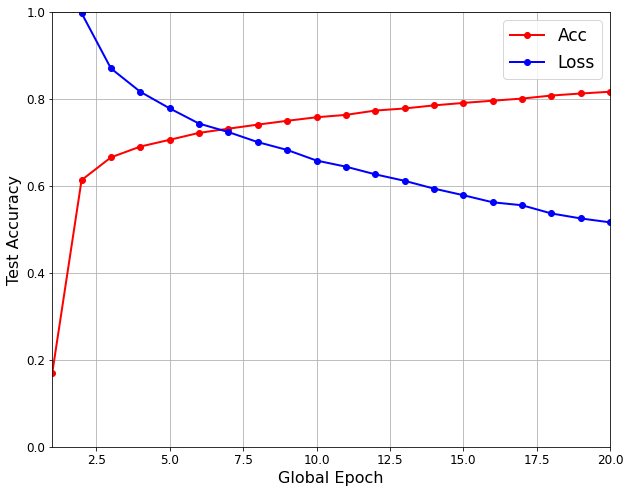

In [97]:
tests = 17

for i in range(tests):
    globals()['for_acc_try{}'.format(i)] = []
    globals()['for_loss_try{}'.format(i)] = []
    
    for g_epoch in range(21):
        globals()['for_acc_try{}'.format(i)].append(np.mean(globals()['t{}_ACC'.format(i)][g_epoch]))
        globals()['for_loss_try{}'.format(i)].append(np.mean(globals()['t{}_LOSS'.format(i)][g_epoch]))
        
final_acc, final_loss = 0, 0

for i in range(tests):
    globals()['for_acc_try{}'.format(i)] = np.array(globals()['for_acc_try{}'.format(i)])
    globals()['for_loss_try{}'.format(i)] = np.array(globals()['for_loss_try{}'.format(i)])
    
    final_acc = final_acc + globals()['for_acc_try{}'.format(i)]
    final_loss = final_loss + globals()['for_loss_try{}'.format(i)]

final_acc = final_acc/tests
final_loss = final_loss/tests

x = np.arange(1,21)

plt.figure(figsize=(10,8))
#plt.title("Accuracy", fontsize=18)
plt.xlabel('Global Epoch', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=16)
plt.xlim(1,20)
plt.ylim(0,1)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.plot(x, final_acc[1:], marker='o', c='r', linewidth=2, label='Acc')
plt.plot(x, final_loss[1:], marker='o', c='b', linewidth=2, label='Loss')

plt.legend(fontsize=17)
plt.grid(True)
plt.show()

In [102]:
#0.8674058823024524

0.8674058823024524-final_acc[-1]
final_loss[-1]-0.40408774623099

0.11197361875983347

In [51]:
#x축이 글로벌 에폭

A_W0, A_W1, A_W2, A_W3, A_W4 = 0, 0, 0, 0, 0
A_B0, A_B1, A_B2, A_B3, A_B4 = 0, 0, 0, 0, 0


for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_accumulated_weight'.format(i,j)] = np.array(globals()['t{}_L{}_accumulated_weight'.format(i,j)])
        globals()['t{}_L{}_accumulated_bias'.format(i,j)] = np.array(globals()['t{}_L{}_accumulated_bias'.format(i,j)])
    
for i in range(tests):
    for j in range(5):
        globals()['A_W{}'.format(j)] = globals()['A_W{}'.format(j)] + globals()['t{}_L{}_accumulated_weight'.format(i,j)] 
        globals()['A_B{}'.format(j)] = globals()['A_B{}'.format(j)] + globals()['t{}_L{}_accumulated_bias'.format(i,j)]
        
        
A_W0, A_W1, A_W2, A_W3, A_W4 = A_W0/tests, A_W1/tests, A_W2/tests, A_W3/tests, A_W4/tests
A_B0, A_B1, A_B2, A_B3, A_B4 = A_B0/tests, A_B1/tests, A_B2/tests, A_B3/tests, A_B4/tests


In [52]:
#x축이 글로벌 에폭
tests = 17

c_W0, c_W1, c_W2, c_W3, c_W4 = 0, 0, 0, 0, 0
c_B0, c_B1, c_B2, c_B3, c_B4 = 0, 0, 0, 0, 0


for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_changes_weight_2'.format(i,j)] = []
        for k in range(20):
            if k != 19:
                globals()['t{}_L{}_changes_weight_2'.format(i,j)].append(globals()['t{}_L{}_accumulated_weight'.format(i,j)][k] - globals()['t{}_L{}_accumulated_weight'.format(i,j)][k+1])
            else:
                break
        
for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_changes_bias'.format(i,j)] = np.array(globals()['t{}_L{}_changes_bias'.format(i,j)])
        globals()['t{}_L{}_changes_weight_2'.format(i,j)] = np.array(globals()['t{}_L{}_changes_weight_2'.format(i,j)])        
        
for i in range(tests):
    for j in range(5):
        globals()['c_W{}'.format(j)] = globals()['c_W{}'.format(j)] + globals()['t{}_L{}_changes_weight_2'.format(i,j)] 
        globals()['c_B{}'.format(j)] = globals()['c_B{}'.format(j)] + globals()['t{}_L{}_changes_bias'.format(i,j)]
        
        
c_W0, c_W1, c_W2, c_W3, c_W4 = c_W0/tests, c_W1/tests, c_W2/tests, c_W3/tests, c_W4/tests
c_B0, c_B1, c_B2, c_B3, c_B4 = c_B0/tests, c_B1/tests, c_B2/tests, c_B3/tests, c_B4/tests


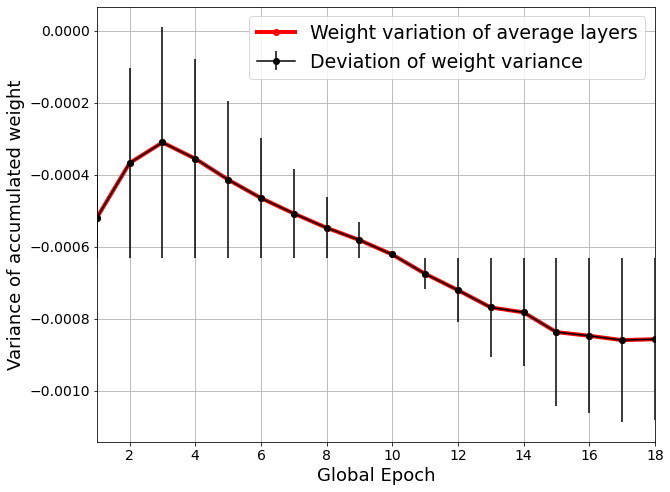

In [106]:
x = np.arange(1,20)

total_A_W = (A_W0 + A_W1 + A_W2 + A_W3 + A_W4)/5
yerr_total_A_W = []

total_c_W = (c_W0 + c_W1 + c_W2 + c_W3 + c_W4)/5
total_c_W[0] = -0.00052  #

yerr_total_c_W = []


for i in range(1,20):
    yerr_total_A_W.append(total_A_W[i]-np.mean(total_A_W[1:]))

for i in range(19):    
    yerr_total_c_W.append(total_c_W[i]-np.mean(total_c_W[1:]))
    
plt.figure(figsize=(10,8))
#plt.title("Weight Variance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=18)
plt.ylabel('Variance of accumulated weight', fontsize=18)
plt.xlim(1,18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(total_A_W[1:], marker='o', c='r', linewidth=4)
#plt.errorbar(x, total_A_W[1:], yerr=yerr_total_A_W, label='Average of layers', marker='o')

plt.plot(x, total_c_W, marker='o', c='r', label='Weight variation of average layers', linewidth=4)
plt.errorbar(x, total_c_W, yerr=yerr_total_c_W, label='Deviation of weight variance', marker='o', c='black')

plt.legend(fontsize=19)
plt.grid(True)
plt.show()

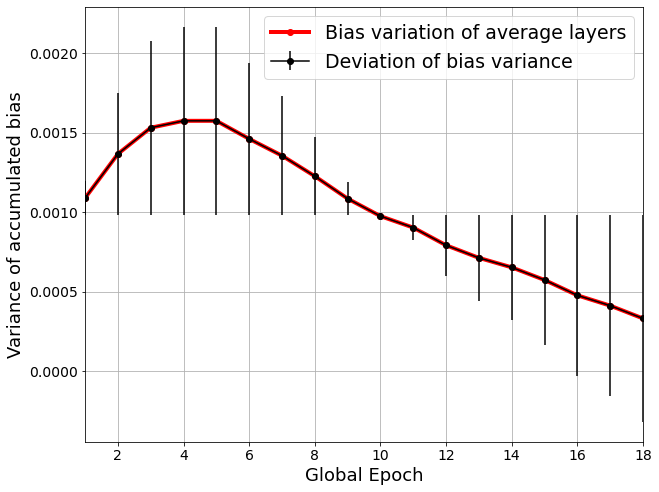

In [104]:
x = np.arange(1,20)

total_A_B = (A_B0 + A_B1 + A_B2 + A_B3 + A_B4)/5
yerr_total_A_B = []

total_c_B = (c_B0 + c_B1 + c_B2 + c_B3 + c_B4)/5
yerr_total_c_B = []

for i in range(1,20):
    yerr_total_A_B.append(total_A_B[i]-np.mean(total_A_B[1:]))
    yerr_total_c_B.append(total_c_B[i]-np.mean(total_c_B[1:]))

    
plt.figure(figsize=(10,8))
#plt.title("Bias Variance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=18)
plt.ylabel('Variance of accumulated bias', fontsize=18)
plt.xlim(1,18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.plot(x,total_A_B[1:], marker='o', c='r', linewidth=4)
#plt.errorbar(x, total_A_B[1:], yerr=yerr_total_A_B, label='Average of layers', marker='o')

plt.plot(x[:-1], total_c_B[2:], marker='o', c='r', linewidth=4, label='Bias variation of average layers')
plt.errorbar(x[:-1], total_c_B[2:], yerr=yerr_total_c_B[1:], label='Deviation of bias variance', marker='o', c='black')

plt.legend(fontsize=19)
plt.grid(True)
plt.show()

In [55]:
#x축이 글로벌 에폭
tests = 17

final_dist_L0, final_dist_L1, final_dist_L2, final_dist_L3, final_dist_L4 = [], [], [], [], []
L0, L1, L2, L3, L4 = 0, 0, 0, 0, 0


for i in range(tests):
    for j in range(5):
        globals()['t{}_L{}_dist'.format(i,j)] = np.array(globals()['t{}_L{}_dist'.format(i,j)])
    
for i in range(tests):
    L0 = L0 + globals()['t{}_L0_dist'.format(i)] 
    L1 = L1 + globals()['t{}_L1_dist'.format(i)] 
    L2 = L2 + globals()['t{}_L2_dist'.format(i)] 
    L3 = L3 + globals()['t{}_L3_dist'.format(i)] 
    L4 = L4 + globals()['t{}_L4_dist'.format(i)] 
L0, L1, L2, L3, L4 = L0/tests, L1/tests, L2/tests, L3/tests, L4/tests



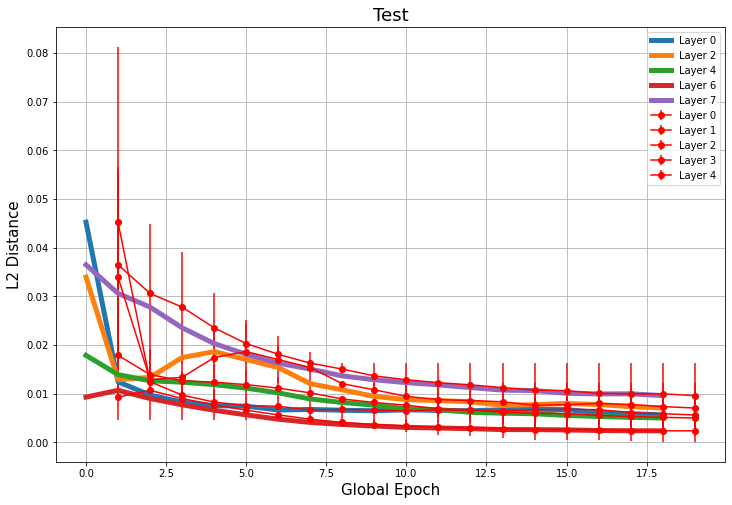

In [56]:
yerr0, yerr1, yerr2, yerr3, yerr4 = [], [], [], [], []

for i in range(1,20):
    yerr0.append(L0[i]-np.mean(L0[1:]))
    yerr1.append(L1[i]-np.mean(L1[1:]))
    yerr2.append(L2[i]-np.mean(L2[1:]))
    yerr3.append(L3[i]-np.mean(L3[1:]))
    yerr4.append(L4[i]-np.mean(L4[1:]))

plt.figure(figsize=(12,8))
plt.title("Test", fontsize=18)
plt.xlabel('Global Epoch', fontsize=15)
plt.ylabel('L2 Distance', fontsize=15)


#plt.plot(L0[1:], label='Layer 0', marker='o')
plt.errorbar(x, L0[1:], yerr=yerr0, label='Layer 0', marker='o', c='r')
plt.errorbar(x, L1[1:], yerr=yerr1, label='Layer 1', marker='o', c='r')
plt.errorbar(x, L2[1:], yerr=yerr2, label='Layer 2', marker='o', c='r')
plt.errorbar(x, L3[1:], yerr=yerr3, label='Layer 3', marker='o', c='r')
plt.errorbar(x, L4[1:], yerr=yerr4, label='Layer 4', marker='o', c='r')

plt.plot(L0[1:], label='Layer 0', linewidth=5)
plt.plot(L1[1:], label='Layer 2', linewidth=5)
plt.plot(L2[1:], label='Layer 4', linewidth=5)
plt.plot(L3[1:], label='Layer 6', linewidth=5)
plt.plot(L4[1:], label='Layer 7', linewidth=5)
plt.legend()
plt.grid(True)
plt.show()

In [62]:
len(c_B0)

20

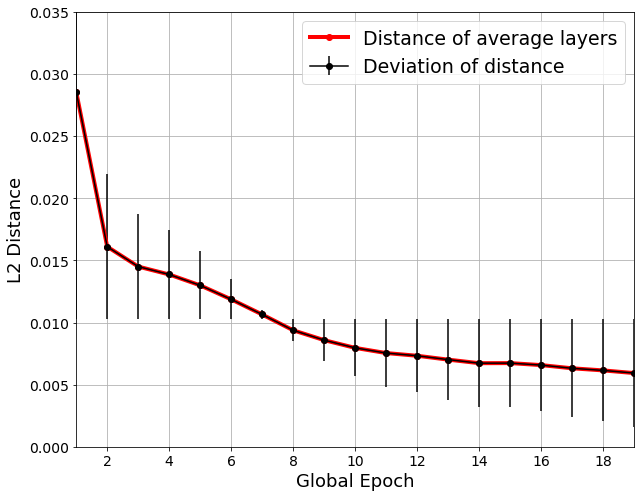

In [103]:
x = np.arange(1,20)

total_L = (L0 + L1 + L2 + L3 + L4)/5
yerr_total = []

for i in range(1,20):
    yerr_total.append(total_L[i]-np.mean(total_L[1:]))

#total_L.append(0.005)

plt.figure(figsize=(10,8))
#plt.title("Distance", fontsize=18)
plt.xlabel('Global Epoch', fontsize=18)
plt.ylabel('L2 Distance', fontsize=18)
plt.xlim(1,19)
plt.ylim(0,0.035)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.errorbar(x, total_L[1:], yerr=yerr_total, label='Deviation of distance', marker='o', c='black')
plt.plot(x, total_L[1:], marker='o', c='r', label='Distance of average layers', linewidth=4)

plt.legend(fontsize=19)
plt.grid(True)
plt.show()

In [95]:
for i in range(17):
    for layerss in range(5):
        globals()['t{}_L{}_dist_change'.format(i,layerss)] = []
        for j in range(20):
            if j < 19:
                 globals()['t{}_L{}_dist_change'.format(i,layerss)].append(globals()['t{}_L{}_dist'.format(i,layerss)][j+1] - globals()['t{}_L{}_dist'.format(i,layerss)][j])
                    

In [ ]:

for i in range(17):
    globals()['t{}_L{}_dist_change'.format(i,layerss)] = np.array(globals()['t{}_L{}_dist_change'.format(i,layerss)])
    for j in range():
        globals()['t{}_L{}_dist_change'.format(i,layerss)]